# Determination of Community Type                              (based on demographic data for Miami-Dade County, FL)

## Authored by Alexey D. Nechaev

In [1]:
# install of necessary
!pip install geopy
!pip install geopandas
!pip install pyshp
!pip install descartes
!pip install folium
!pip install osr
print('Installed.')

     |████████████████████████████████| 931kB 7.7MB/s eta 0:00:01
     |████████████████████████████████| 10.4MB 37.3MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 37.1MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 36.7MB/s eta 0:00:01
     |████████████████████████████████| 92kB 14.0MB/s eta 0:00:01
     |████████████████████████████████| 2.9MB 12.6MB/s eta 0:00:01
     |████████████████████████████████| 153kB 43.4MB/s eta 0:00:01


  Stored in directory: /home/dsxuser/.cache/pip/wheels/81/7c/d5/5d3301e013966e62b8ccf7f27cf36e818b8b255b07eae9a824
  Stored in directory: /home/dsxuser/.cache/pip/wheels/b4/a5/ff/25874bff8d4cae224fbd49e4bcb580e2bc106df77fe03367e2
Successfully built osr Pyglet
Installed.


In [2]:
#imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from bs4 import BeautifulSoup
from time import sleep
from time import time
from random import randint
import requests
from geopy.geocoders import Nominatim
import folium
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import matplotlib.colors as colors
import collections
from urllib.request import urlopen
from zipfile import ZipFile
from io import StringIO
from io import BytesIO
import shapefile
from shapely.geometry import shape
import geopandas as gpd  
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
print('Libraries imported.')

Libraries imported.


## 1. Visualization Miami-Dade County communities in Florida and in the US

In [3]:
url_states = 'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_5m.zip'
zip_states = ZipFile(BytesIO(urlopen(url_states).read()))

In [4]:
file_states = [y for y in sorted(zip_states.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
print(file_states)

['cb_2018_us_state_5m.dbf', 'cb_2018_us_state_5m.prj', 'cb_2018_us_state_5m.shp', 'cb_2018_us_state_5m.shx']


In [5]:
dbf_states, prj_states, shp_states, shx_states = [BytesIO(zip_states.read(
    filename)) for filename in file_states]
r_states = shapefile.Reader(shp=shp_states, shx=shx_states, dbf=dbf_states)
print(r_states.numRecords)

56


In [6]:
at_states, geo_states = [], []
field_states = [field[0] for field in r_states.fields[1:]]  
for row in r_states.shapeRecords():  
    geo_states.append(shape(row.shape.__geo_interface__))  
    at_states.append(dict(zip(field_states, row.record)))  

In [7]:
g_states = gpd.GeoDataFrame(data = at_states, geometry = geo_states)
g_states.head()

AFFGEOID         ALAND       AWATER GEOID LSAD          NAME STATEFP  \
0  0400000US31  198956658395   1371829134    31   00      Nebraska      31   
1  0400000US53  172112588220  12559278850    53   00    Washington      53   
2  0400000US35  314196306401    728776523    35   00    New Mexico      35   
3  0400000US46  196346981786   3382720225    46   00  South Dakota      46   
4  0400000US48  676653171537  19006305260    48   00         Texas      48   

    STATENS STUSPS                                           geometry  
0  01779792     NE  POLYGON ((-104.05351 41.15726, -104.05267 41.2...  
1  01779804     WA  MULTIPOLYGON (((-122.32834 48.02134, -122.3217...  
2  00897535     NM  POLYGON ((-109.05017 31.48000, -109.04984 31.4...  
3  01785534     SD  POLYGON ((-104.05770 44.99743, -104.05021 44.9...  
4  01779801     TX  POLYGON ((-106.64548 31.89867, -106.64084 31.9...

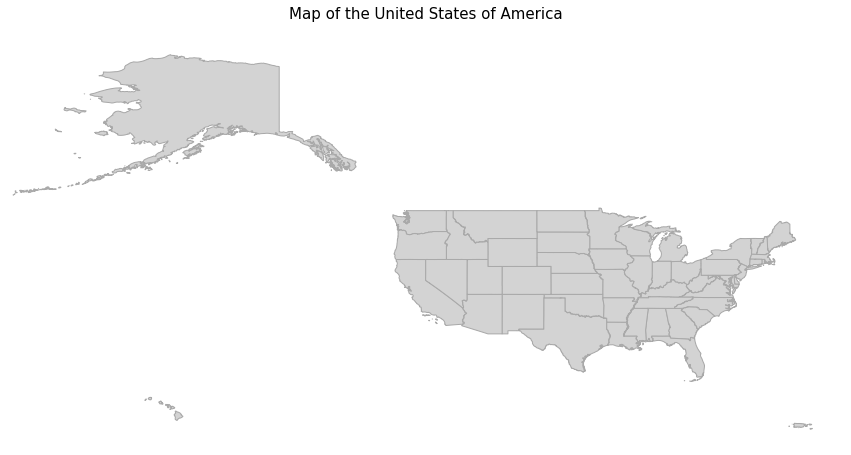

In [8]:
g_states.crs= 'epsg:3857'
g2_states=g_states.to_crs('epsg:3857')
map_states=g2_states.plot(figsize=(15,15), color='lightgray', 
                          edgecolor='darkgray', linewidth=1)
map_states.set(xticks=[], yticks=[])
plt.ylim(bottom=15)
plt.xlim(left=-180, right=-60)
plt.axis('off')
plt.title("Map of the United States of America", fontsize= 15)
plt.savefig("USA.png", bbox_inches='tight')

In [9]:
g_florida =g_states.query('STUSPS == "FL"')
g_florida

AFFGEOID         ALAND       AWATER GEOID LSAD     NAME STATEFP  \
38  0400000US12  138949136250  31361101223    12   00  Florida      12   

     STATENS STUSPS                                           geometry  
38  00294478     FL  MULTIPOLYGON (((-80.75164 24.85725, -80.72906 ...

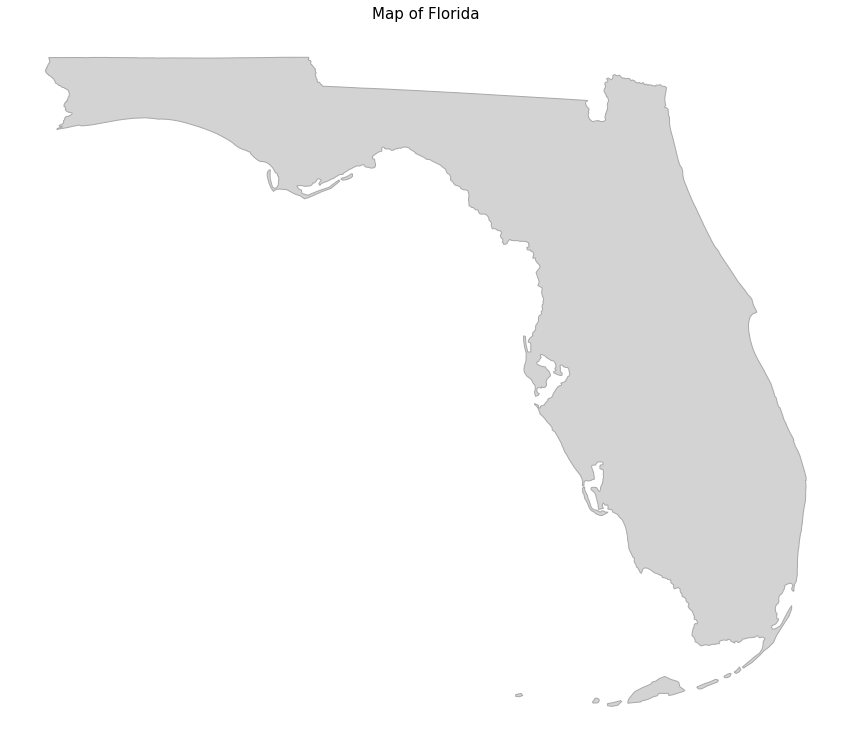

In [10]:
g_florida.crs= 'epsg:3857'
g2_florida=g_florida.to_crs('epsg:3857')
map_florida=g2_florida.plot(figsize=(15,15), color='lightgray', edgecolor='darkgray', linewidth=1)
map_florida.set(xticks=[], yticks=[])
plt.axis('off')
plt.title("Map of Florida", fontsize= 15)
plt.savefig("Florida.png", bbox_inches='tight')

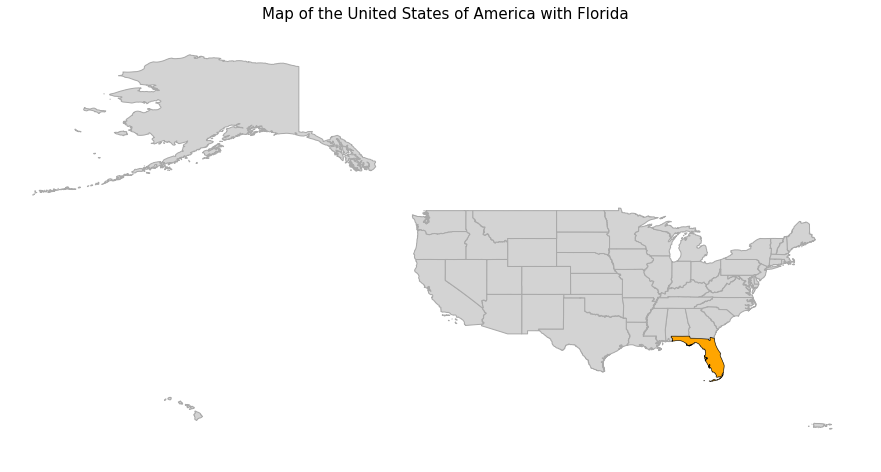

In [11]:
map_us_florida=g2_states.plot(figsize=(15,15), color='lightgray', 
               edgecolor='darkgray', linewidth=1)
plt.ylim(bottom=15)
plt.xlim(left=-180, right=-60)
plt.axis('off')
plt.title("Map of the United States of America with Florida", fontsize= 15)
plt.savefig("USA.png", bbox_inches='tight')
g2_florida.plot(ax= map_us_florida, figsize=(15,15), color='orange', 
               edgecolor='black', linewidth=0.5)


## 2. Visualization of Counties in Florida

In [12]:
url_counties = 'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_5m.zip'
zip_counties = ZipFile(BytesIO(urlopen(url_counties).read()))

In [13]:
file_counties = [y for y in sorted(zip_counties.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
print(file_counties)

['cb_2018_us_county_5m.dbf', 'cb_2018_us_county_5m.prj', 'cb_2018_us_county_5m.shp', 'cb_2018_us_county_5m.shx']


In [14]:
dbf_counties, prj_counties, shp_counties, shx_counties = [BytesIO(zip_counties.read(
    filename)) for filename in file_counties]
r_counties = shapefile.Reader(shp=shp_counties, shx=shx_counties, dbf=dbf_counties)
print(r_counties.numRecords)

3233


In [15]:
at_counties, geo_counties = [], []
field_counties = [field[0] for field in r_counties.fields[1:]]  
for row in r_counties.shapeRecords():  
    geo_counties.append(shape(row.shape.__geo_interface__))  
    at_counties.append(dict(zip(field_counties, row.record)))  

In [16]:
g_counties = gpd.GeoDataFrame(data = at_counties, geometry = geo_counties)
g_counties.head()

AFFGEOID       ALAND     AWATER COUNTYFP  COUNTYNS  GEOID LSAD  \
0  0500000US39071  1432479992   12194983      071  01074048  39071   06   
1  0500000US06003  1912292630   12557304      003  01675840  06003   06   
2  0500000US12033  1701544502  563927612      033  00295737  12033   06   
3  0500000US17101   963936864    5077783      101  00424252  17101   06   
4  0500000US28153  2099745573    7255476      153  00695797  28153   06   

       NAME STATEFP                                           geometry  
0  Highland      39  POLYGON ((-83.86976 39.05553, -83.86568 39.247...  
1    Alpine      06  POLYGON ((-120.07248 38.50987, -120.07239 38.7...  
2  Escambia      12  POLYGON ((-87.62999 30.87766, -87.62946 30.880...  
3  Lawrence      17  POLYGON ((-87.91028 38.57493, -87.90811 38.850...  
4     Wayne      28  POLYGON ((-88.94317 31.78421, -88.94335 31.824...

In [17]:
g_counties_florida =g_counties.query('STATEFP == "12"')
g_counties_florida.head()

AFFGEOID       ALAND     AWATER COUNTYFP  COUNTYNS  GEOID LSAD  \
2    0500000US12033  1701544502  563927612      033  00295737  12033   06   
203  0500000US12111  1480655751  300844500      111  00308372  12111   06   
308  0500000US12027  1649027555    6243548      027  00294452  12027   06   
597  0500000US12059  1240232909   26393537      059  00295735  12059   06   
599  0500000US12117   801344504   93079561      117  00303665  12117   06   

          NAME STATEFP                                           geometry  
2     Escambia      12  POLYGON ((-87.62999 30.87766, -87.62946 30.880...  
203  St. Lucie      12  POLYGON ((-80.67982 27.55847, -80.34842 27.557...  
308     DeSoto      12  POLYGON ((-82.05650 27.20777, -82.05575 27.338...  
597     Holmes      12  POLYGON ((-86.03504 30.99331, -85.99873 30.992...  
599   Seminole      12  POLYGON ((-81.45966 28.67274, -81.45938 28.713...

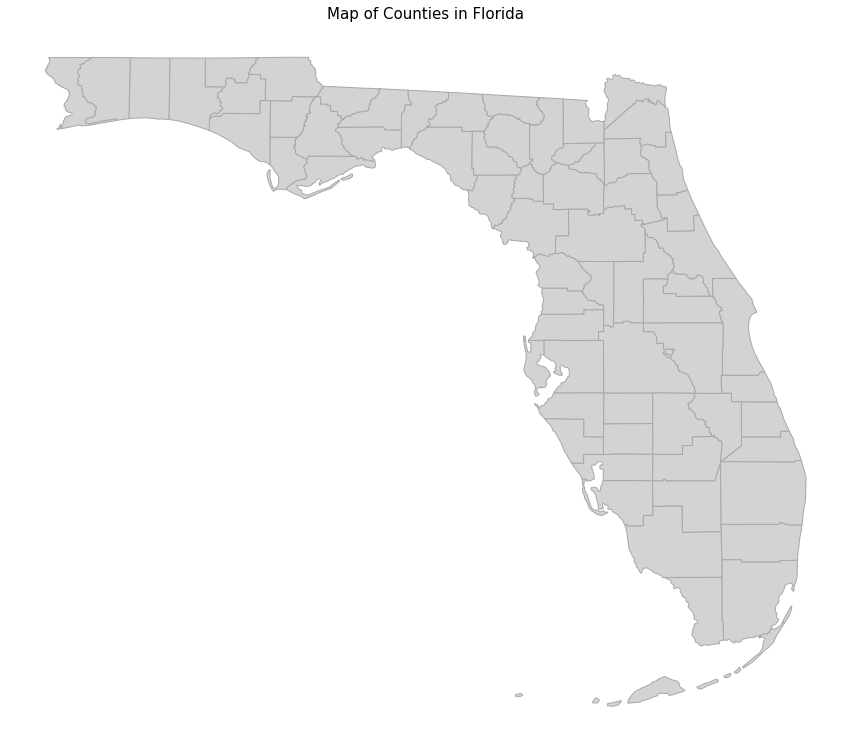

In [18]:
g_counties_florida.crs= 'epsg:3857'
g2_counties_florida=g_counties_florida.to_crs('epsg:3857')
map_counties_florida=g2_counties_florida.plot(figsize=(15,15), color='lightgray', 
                          edgecolor='darkgray', linewidth=1)
map_counties_florida.set(xticks=[], yticks=[])
plt.axis('off')
plt.title("Map of Counties in Florida", fontsize= 15)
plt.savefig("FloridaCounties.png", bbox_inches='tight')

In [19]:
g_dade =g_counties_florida.query('COUNTYFP == "086"')
g_dade

AFFGEOID       ALAND      AWATER COUNTYFP  COUNTYNS  GEOID LSAD  \
1893  0500000US12086  4917746437  1378974993      086  00295755  12086   06   

            NAME STATEFP                                           geometry  
1893  Miami-Dade      12  MULTIPOLYGON (((-80.26994 25.35232, -80.24958 ...

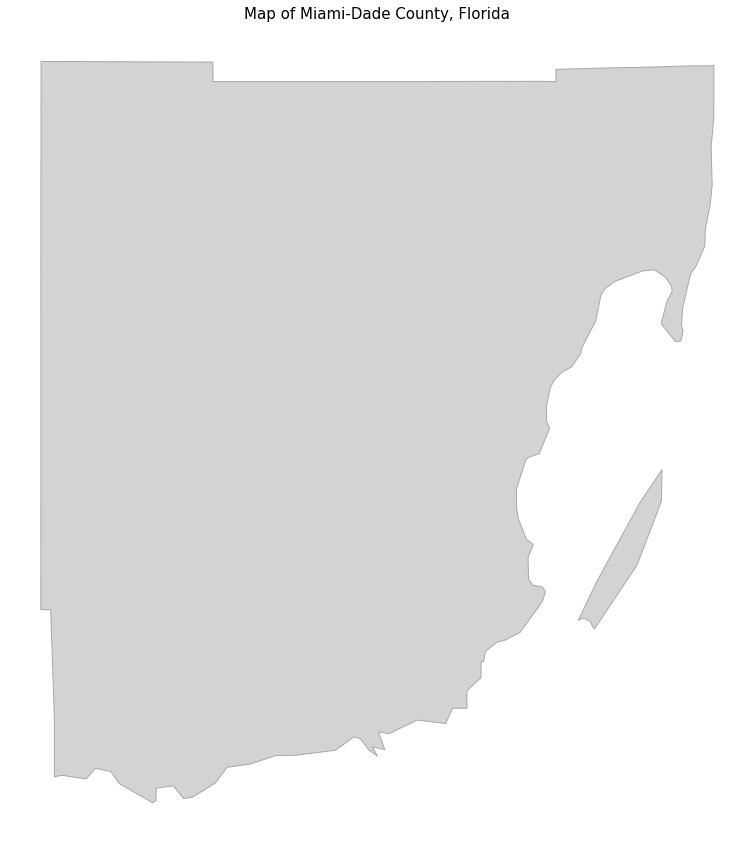

In [20]:
g_dade.crs
g2_dade=g_dade.to_crs('epsg:3857')
map_dade=g2_dade.plot(figsize=(15,15), color='lightgray', edgecolor='darkgray', linewidth=1)
map_dade.set(xticks=[], yticks=[])
plt.axis('off')
plt.title("Map of Miami-Dade County, Florida", fontsize= 15)
plt.savefig("MiamiDade.png", bbox_inches='tight')

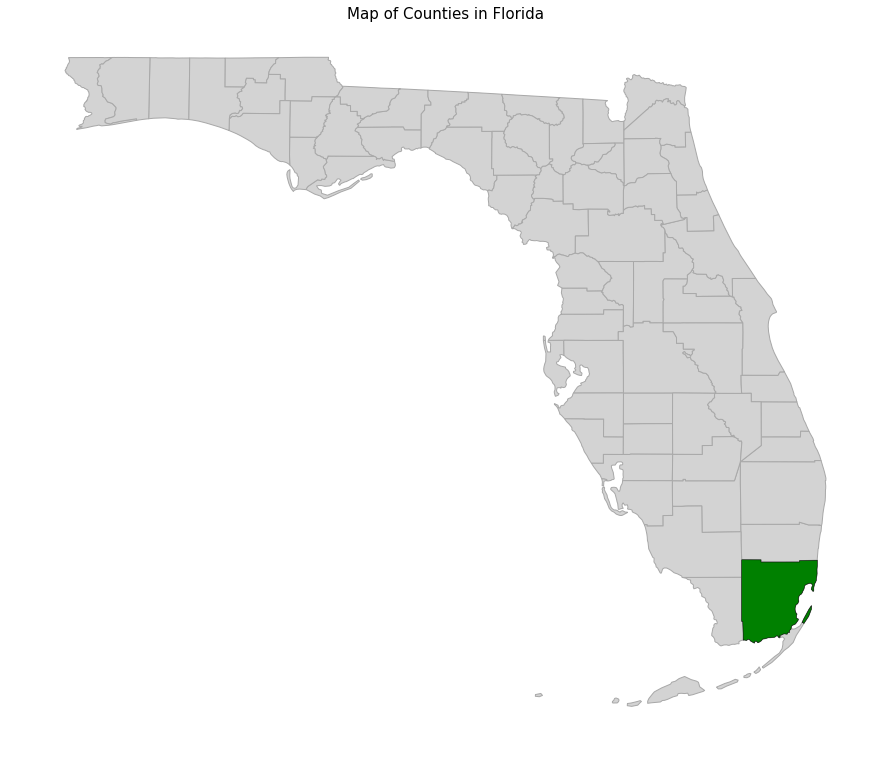

In [21]:
map_florida_dade=g2_counties_florida.plot(figsize=(15,15), color='lightgray', 
               edgecolor='darkgray', linewidth=1)
g2_dade.plot(ax= map_florida_dade, figsize=(15,15), color='green', 
               edgecolor='black', linewidth=0.5)
plt.axis('off')
plt.title("Map of Counties in Florida", fontsize= 15)
plt.savefig("FloridaCountiesDade.png", bbox_inches='tight')

## 3. Visualization of communities in Miami-Dade County

In [22]:
url_flplaces = 'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_12_place_500k.zip'
zip_flplaces = ZipFile(BytesIO(urlopen(url_flplaces).read()))

In [23]:
file_flplaces = [y for y in sorted(zip_flplaces.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
print(file_flplaces)

['cb_2018_12_place_500k.dbf', 'cb_2018_12_place_500k.prj', 'cb_2018_12_place_500k.shp', 'cb_2018_12_place_500k.shx']


In [24]:
dbf_flplaces, prj_flplaces, shp_flplaces, shx_flplaces = [BytesIO(zip_flplaces.read(
    filename)) for filename in file_flplaces]
r_flplaces = shapefile.Reader(shp=shp_flplaces, shx=shx_flplaces, dbf=dbf_flplaces)
print(r_flplaces.numRecords)

919


In [25]:
at_flplaces, geo_flplaces = [], []
field_flplaces = [field[0] for field in r_flplaces.fields[1:]]  
for row in r_flplaces.shapeRecords():  
    geo_flplaces.append(shape(row.shape.__geo_interface__))  
    at_flplaces.append(dict(zip(field_flplaces, row.record)))  

In [26]:
g_flplaces = gpd.GeoDataFrame(data = at_flplaces, geometry = geo_flplaces)
g_flplaces.head()

AFFGEOID      ALAND     AWATER    GEOID LSAD                  NAME  \
0  1600000US1224000   89577004    4436116  1224000   25       Fort Lauderdale   
1  1600000US1242650    7895501          0  1242650   43                Malone   
2  1600000US1239750      59557          0  1239750   47             Lazy Lake   
3  1600000US1235900     401131     137855  1235900   43  Jupiter Inlet Colony   
4  1600000US1263000  160184468  197307467  1263000   25        St. Petersburg   

  PLACEFP   PLACENS STATEFP                                           geometry  
0   24000  02403640      12  MULTIPOLYGON (((-80.14829 26.19879, -80.14740 ...  
1   42650  02406083      12  POLYGON ((-85.17643 30.97167, -85.16442 30.971...  
2   39750  02407489      12  POLYGON ((-80.14637 26.15752, -80.14412 26.157...  
3   35900  02405928      12  POLYGON ((-80.07881 26.95161, -80.07582 26.951...  
4   63000  02405401      12  MULTIPOLYGON (((-82.69547 27.66549, -82.69391 ...

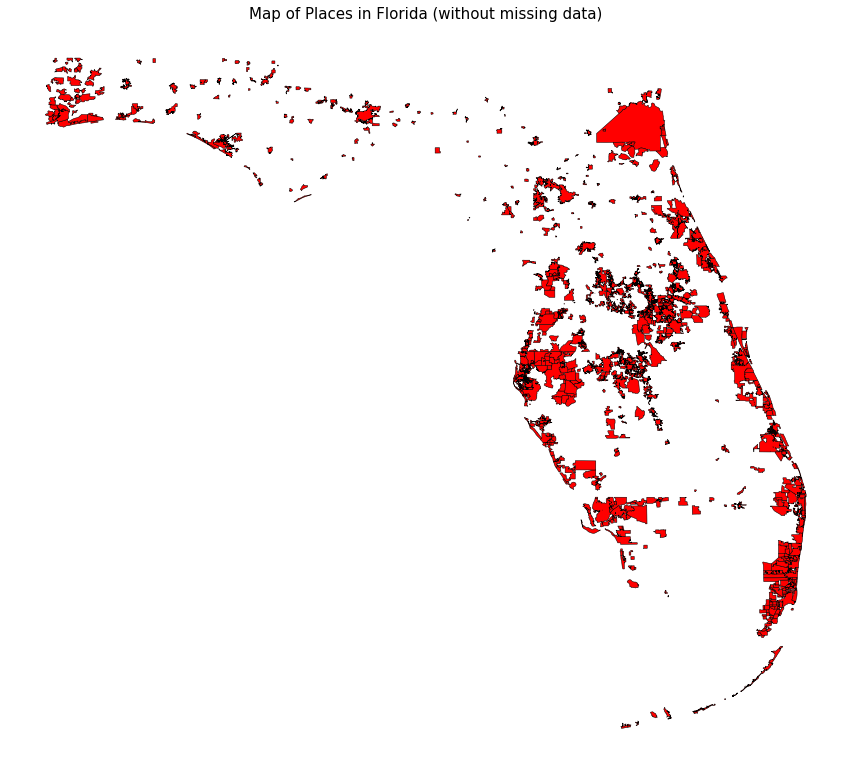

In [27]:
g_flplaces.crs= 'epsg:3857'
g2_flplaces=g_flplaces.to_crs('epsg:3857')
map_flplaces=g2_flplaces.plot(figsize=(15,15), color='red', 
                          edgecolor='black', linewidth=0.5)
map_flplaces.set(xticks=[], yticks=[])
plt.axis('off')
plt.title("Map of Places in Florida (without missing data)", fontsize= 15)
plt.savefig("FloridaPlaces.png", bbox_inches='tight')

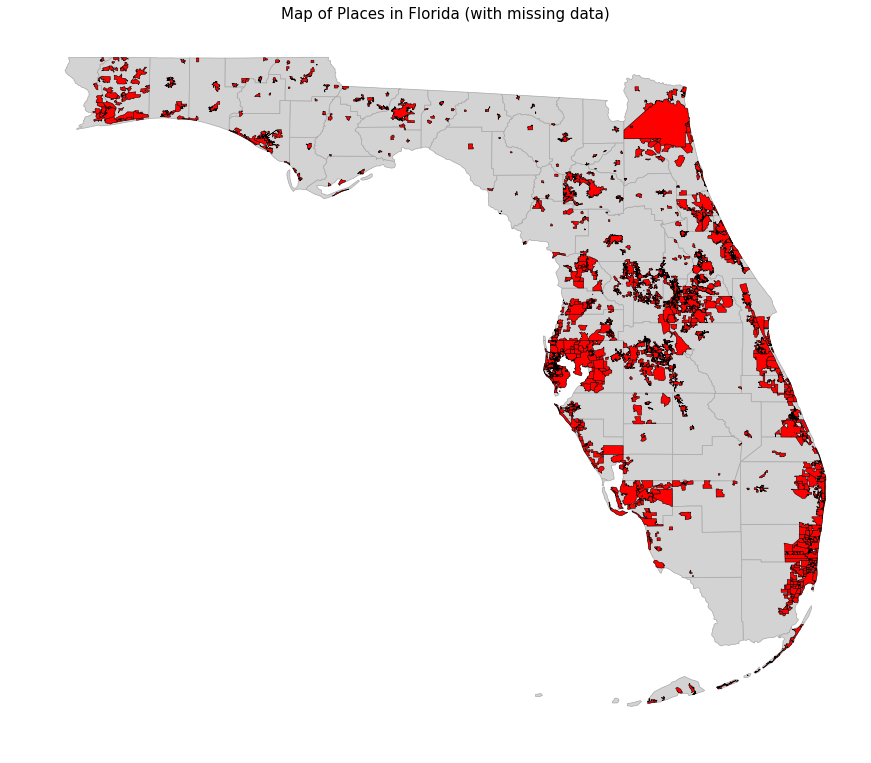

In [28]:
map_florida_places=g2_counties_florida.plot(figsize=(15,15), color='lightgray', 
               edgecolor='darkgray', linewidth=0.7)
g2_flplaces.plot(ax=map_florida_places, figsize=(15,15), color='red', 
               edgecolor='black', linewidth=0.5)
plt.axis('off')
plt.title("Map of Places in Florida (with missing data)", fontsize= 15)
plt.savefig("FloridaPlaces21.png", bbox_inches='tight')

In [29]:
url_flplaces2 = 'https://www2.census.gov/geo/tiger/GENZ2010/gz_2010_12_060_00_500k.zip'
zip_flplaces2 = ZipFile(BytesIO(urlopen(url_flplaces2).read()))

In [30]:
file_flplaces2 = [y for y in sorted(zip_flplaces2.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
print(file_flplaces2)

['gz_2010_12_060_00_500k.dbf', 'gz_2010_12_060_00_500k.prj', 'gz_2010_12_060_00_500k.shp', 'gz_2010_12_060_00_500k.shx']


In [31]:
dbf_flplaces2, prj_flplaces2, shp_flplaces2, shx_flplaces2 = [BytesIO(zip_flplaces2.read(
    filename)) for filename in file_flplaces2]
r_flplaces2 = shapefile.Reader(shp=shp_flplaces2, shx=shx_flplaces2, dbf=dbf_flplaces2)
print(r_flplaces2.numRecords)

316


In [32]:
at_flplaces2, geo_flplaces2 = [], []
field_flplaces2 = [field[0] for field in r_flplaces2.fields[1:]]  
for row in r_flplaces2.shapeRecords():  
    geo_flplaces2.append(shape(row.shape.__geo_interface__))  
    at_flplaces2.append(dict(zip(field_flplaces2, row.record)))  

In [33]:
g_flplaces2 = gpd.GeoDataFrame(data = at_flplaces2, geometry = geo_flplaces2)
g_flplaces2.head()

CENSUSAREA COUNTY COUSUB               GEO_ID LSAD                  NAME  \
0     206.942    055  93120  0600000US1205593120  CCD               Sebring   
1      77.339    057  91735  0600000US1205791735  CCD  Keystone-Citrus Park   
2     272.916    057  93367  0600000US1205793367  CCD                 Tampa   
3     386.438    061  91066  0600000US1206191066  CCD             Fellsmere   
4     337.115    065  93523  0600000US1206593523  CCD               Wacissa   

  STATE                                           geometry  
0    12  POLYGON ((-81.49176 27.52550, -81.49179 27.525...  
1    12  POLYGON ((-82.50232 28.10695, -82.50225 28.103...  
2    12  POLYGON ((-82.48146 27.88786, -82.48168 27.880...  
3    12  POLYGON ((-80.65759 27.82279, -80.64391 27.822...  
4    12  POLYGON ((-84.07604 30.09546, -84.07613 30.097...

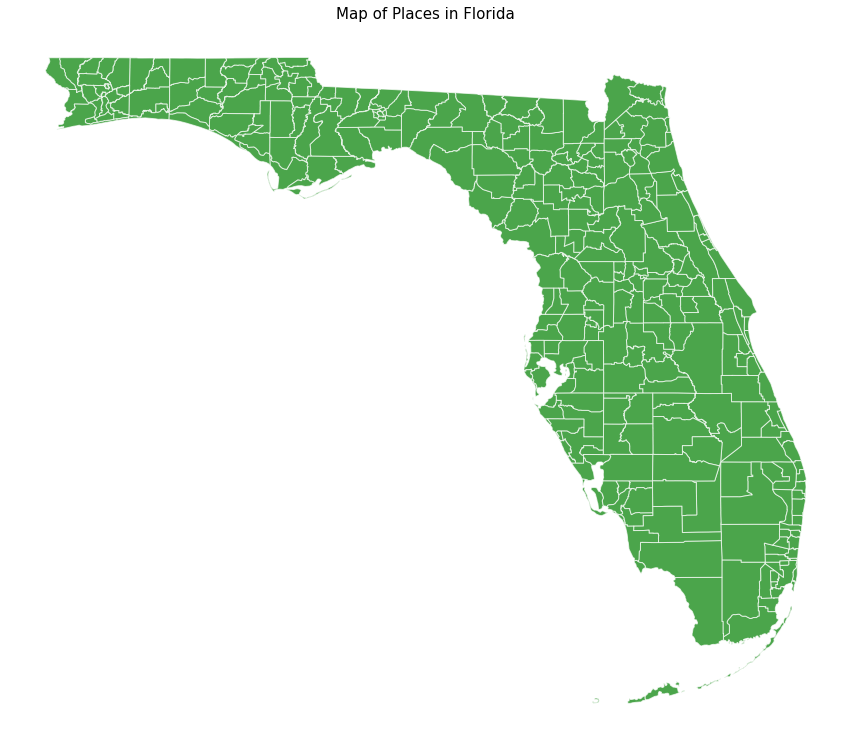

In [34]:
g_flplaces2.crs= 'epsg:3857'
g2_flplaces2=g_flplaces2.to_crs('epsg:3857')
map_flplaces2=g2_flplaces2.plot(figsize=(15,15), color='green', 
                          edgecolor='white', linewidth=1, alpha=0.7)
map_flplaces2.set(xticks=[], yticks=[])
plt.axis('off')
plt.title("Map of Places in Florida", fontsize= 15)
plt.savefig("FloridaPlaces2a.png", bbox_inches='tight')

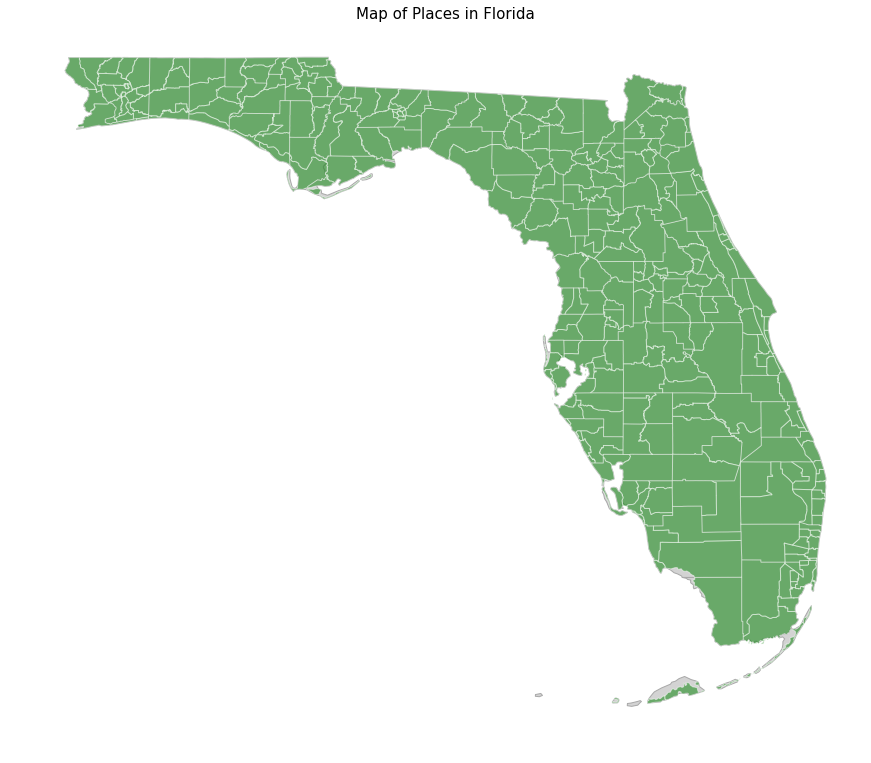

In [35]:
map_florida_places2=g2_counties_florida.plot(figsize=(15,15), color='lightgray', 
               edgecolor='darkgray', linewidth=1)
g2_flplaces2.plot(ax=map_florida_places2, figsize=(15,15), color='green', 
               edgecolor='white', linewidth=1, alpha=0.5)
plt.axis('off')
plt.title("Map of Places in Florida", fontsize= 15)
plt.savefig("FloridaPlaces2b.png", bbox_inches='tight')

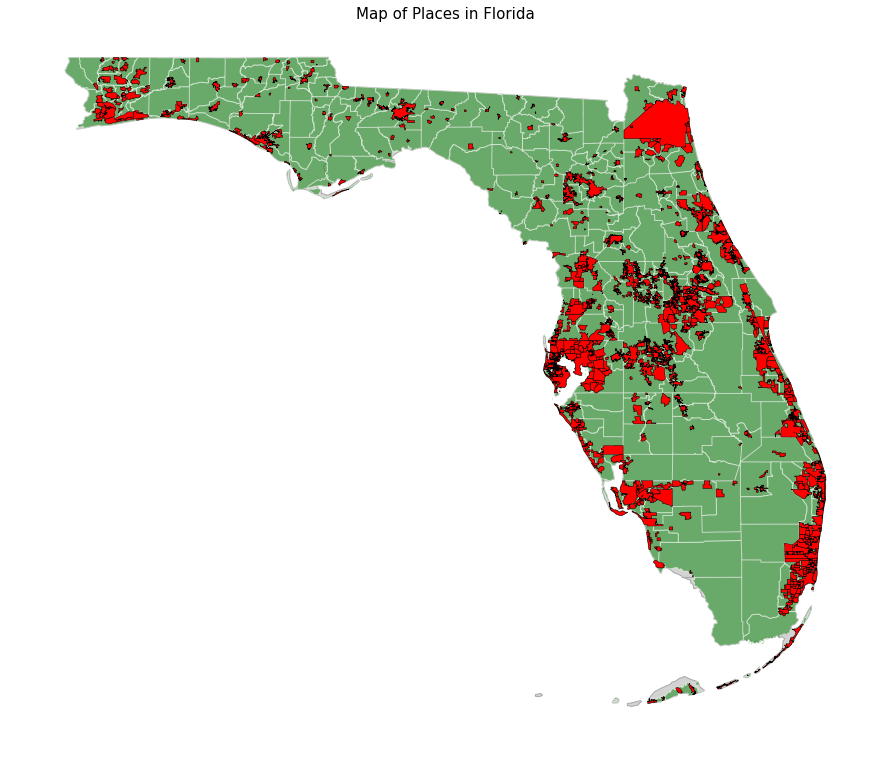

In [36]:
map_florida_places3=g2_counties_florida.plot(figsize=(15,15), color='lightgray', 
               edgecolor='darkgray', linewidth=1, zorder=1)
g2_flplaces2.plot(ax=map_florida_places3, figsize=(15,15), color='green', 
               edgecolor='white', linewidth=1,alpha=0.5, zorder=2)
g2_flplaces.plot(ax=map_florida_places3, figsize=(15,15), color='red', 
               edgecolor='black', linewidth=0.5, zorder=3)
plt.axis('off')
plt.title("Map of Places in Florida", fontsize= 15)
plt.savefig("FloridaPlaces3.png", bbox_inches='tight')

In [37]:
g_flplaces2_dade =g_flplaces2.query('COUNTY == "086"')
g_flplaces2_dade.head()

CENSUSAREA COUNTY COUSUB               GEO_ID LSAD            NAME STATE  \
16      450.569    086  91534  0600000US1208691534  CCD       Homestead    12   
17      123.176    086  92158  0600000US1208692158  CCD           Miami    12   
18       13.730    086  93211  0600000US1208693211  CCD  South Westside    12   
138     929.233    086  91040  0600000US1208691040  CCD      Everglades    12   
139      48.165    086  91482  0600000US1208691482  CCD         Hialeah    12   

                                              geometry  
16   MULTIPOLYGON (((-80.25411 25.38230, -80.25105 ...  
17   POLYGON ((-80.21945 25.73615, -80.22362 25.734...  
18   POLYGON ((-80.34775 25.76177, -80.34416 25.761...  
138  POLYGON ((-80.83582 25.97929, -80.78132 25.979...  
139  POLYGON ((-80.34125 25.95717, -80.34088 25.957...

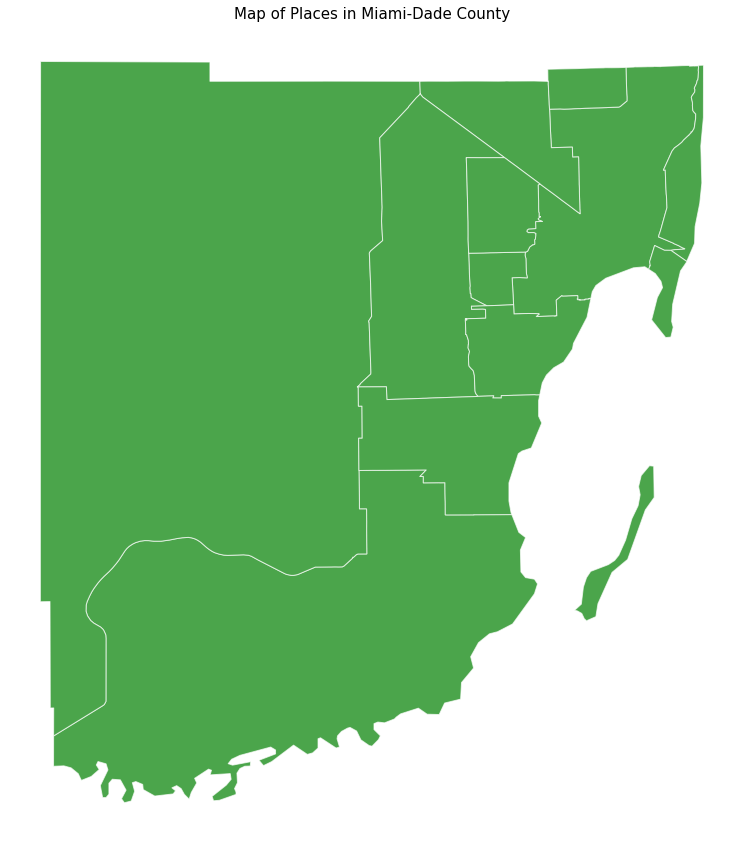

In [38]:
g_flplaces2_dade.crs= 'epsg:3857'
g2_flplaces2_dade=g_flplaces2_dade.to_crs('epsg:3857')
map_flplaces2_dade=g2_flplaces2_dade.plot(figsize=(15,15), color='green', 
                          edgecolor='white', alpha=0.7, linewidth=1)
map_flplaces2_dade.set(xticks=[], yticks=[])
plt.axis('off')
plt.title("Map of Places in Miami-Dade County", fontsize= 15)
plt.savefig("DadePlaces2.png", bbox_inches='tight')

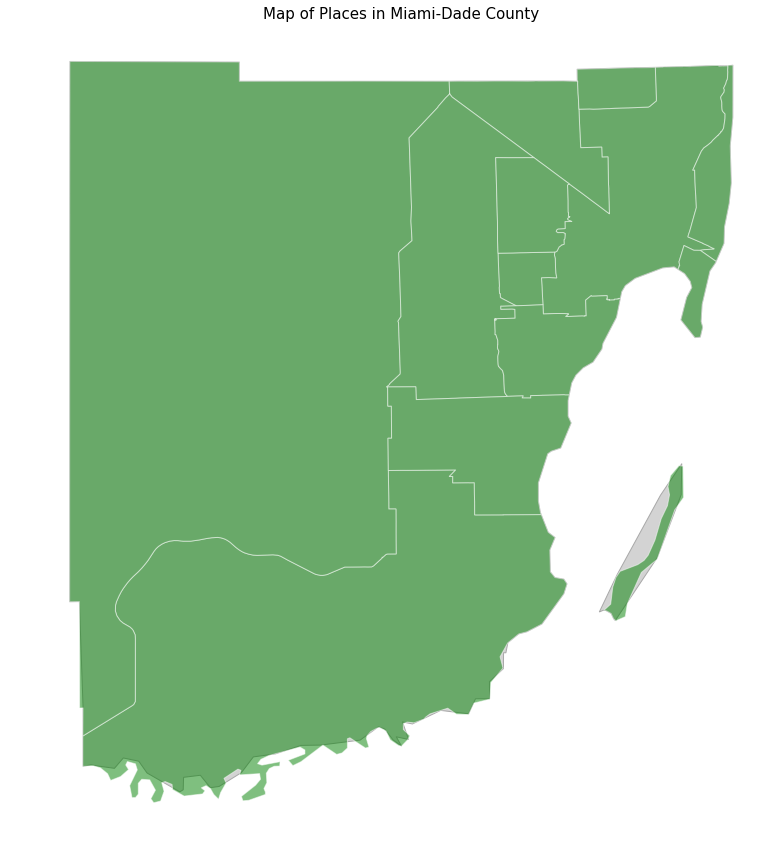

In [39]:
map_dade_fplaces2=g2_dade.plot(figsize=(15,15), color='lightgray', 
                               edgecolor='darkgray', linewidth=1)
g2_flplaces2_dade.plot(ax=map_dade_fplaces2, figsize=(15,15), color='green', 
                          edgecolor='white', alpha=0.5, linewidth=1)
plt.axis('off')
plt.title("Map of Places in Miami-Dade County", fontsize= 15)
plt.savefig("DadePlaces2b.png", bbox_inches='tight')

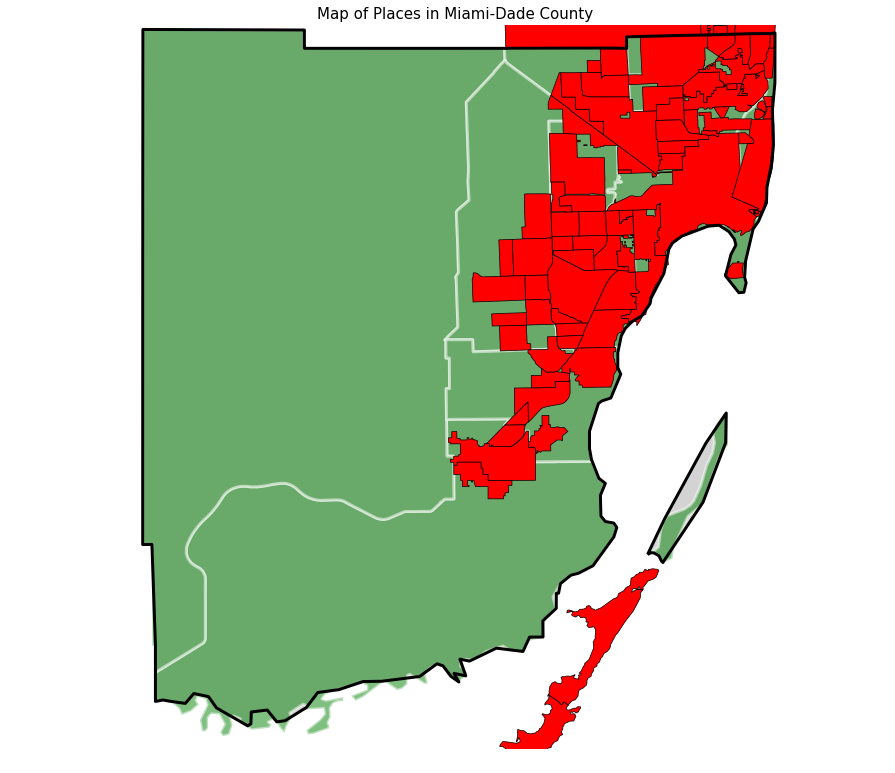

In [40]:
map_dade_fplaces1=g2_dade.plot(figsize=(15,15), color='lightgray', 
                               edgecolor='darkgray', linewidth=1, zorder=1)
g2_flplaces2_dade.plot(ax=map_dade_fplaces1, figsize=(15,15), 
                       color='green', alpha=0.5, edgecolor='white', linewidth=3,
                      zorder=1)
g2_flplaces.plot(ax=map_dade_fplaces1, figsize=(15,15), color='red', 
                          edgecolor='black', linewidth=0.7, zorder=3)
g2_dade.boundary.plot(ax=map_dade_fplaces1,edgecolor='black', 
                      linewidth=3, zorder=4)
plt.ylim(bottom=25.12, top=25.985)
plt.xlim(left=-81, right=-80)
plt.axis('off')
plt.title("Map of Places in Miami-Dade County", fontsize= 15)
plt.savefig("DadePlaces1b.png", bbox_inches='tight')

## 4. Population, Area and Housing Units

### 4.1. Data (reading and wrangling)

In [41]:
df_PAH =pd.read_csv('https://raw.githubusercontent.com/adnechaev/Miami-Dade-County-Capstone-Project/master/CENSUS%202010%20population%20and%20area.csv', index_col=0, error_bad_lines=False)
df_PAH.reset_index(inplace=True)
df_PAH.drop(columns=['Area in square miles - Water area', 
                                 'Area in square miles - Land area', 
                                 'Density per square mile of land area - Population', 
                                 'Density per square mile of land area - Housing units'], inplace=True)
df_PAH.columns = ['GEOID','CommunityName', 'Population', 'HousingUnits', 'Area']
df_PAH.head()

GEOID            CommunityName Population HousingUnits  Area
0  1590000US1208602681            Aventura city      35762        26120  3.51
1  1590000US1208603275      Bal Harbour village       2513         2780  0.65
2  1590000US1208603975  Bay Harbor Islands town       5628         3199  0.53
3  1590000US1208606600    Biscayne Park village       3055         1324  0.63
4  1590000US1208609000          Brownsville CDP      15313         5797  2.28

In [42]:
list_community=df_PAH['CommunityName'].tolist()
list_community2=[]
list_type=[]
for i in list_community:
    if "city" in i:
        i=i[:-5]
        j='City'
        list_community2.append(i)
        list_type.append(j)
    elif 'town' in i:
        i=i[:-5]
        j='Town'
        list_community2.append(i)
        list_type.append(j)
    elif 'village' in i:
        i=i[:-8]
        j='Village'
        list_community2.append(i)
        list_type.append(j)
    elif 'CDP' in i:
        i=i[:-4]
        j='CDP'
        list_community2.append(i)
        list_type.append(j)
    else:
        l=''
        list_community2.append(i)
        list_type.append(j) 
df_PAH.insert(loc=2, column='Community', value=list_community2)
df_PAH.insert(loc=3, column='Type', value=list_type)
df_PAH.drop(['CommunityName'], axis=1, inplace=True)
df_PAH.head()

GEOID           Community     Type Population HousingUnits  \
0  1590000US1208602681            Aventura     City      35762        26120   
1  1590000US1208603275         Bal Harbour  Village       2513         2780   
2  1590000US1208603975  Bay Harbor Islands     Town       5628         3199   
3  1590000US1208606600       Biscayne Park  Village       3055         1324   
4  1590000US1208609000         Brownsville      CDP      15313         5797   

   Area  
0  3.51  
1  0.65  
2  0.53  
3  0.63  
4  2.28

In [43]:
list_population=df_PAH['Population'].tolist()
list_population2=[]
for i in list_population: 
    if '(' in i:
        i = i[:(int(i.find('(')))]
        list_population2.append(i)
    else:
        list_population2.append(i)
df_PAH['Population']=list_population2
df_PAH['Population']=df_PAH['Population'].astype(int)
df_PAH.head()

GEOID           Community     Type  Population HousingUnits  \
0  1590000US1208602681            Aventura     City       35762        26120   
1  1590000US1208603275         Bal Harbour  Village        2513         2780   
2  1590000US1208603975  Bay Harbor Islands     Town        5628         3199   
3  1590000US1208606600       Biscayne Park  Village        3055         1324   
4  1590000US1208609000         Brownsville      CDP       15313         5797   

   Area  
0  3.51  
1  0.65  
2  0.53  
3  0.63  
4  2.28

In [44]:
list_hunits=df_PAH['HousingUnits'].tolist()
list_hunits2=[]
for i in list_hunits: 
    if '(' in i:
        i = i[:(int(i.find('(')))]
        list_hunits2.append(i)
    else:
        list_hunits2.append(i)
df_PAH['HousingUnits']=list_hunits2
df_PAH['HousingUnits']=df_PAH['HousingUnits'].astype(int)
df_PAH['Area']=df_PAH['Area'].astype(float)
df_PAH.head()

GEOID           Community     Type  Population  HousingUnits  \
0  1590000US1208602681            Aventura     City       35762         26120   
1  1590000US1208603275         Bal Harbour  Village        2513          2780   
2  1590000US1208603975  Bay Harbor Islands     Town        5628          3199   
3  1590000US1208606600       Biscayne Park  Village        3055          1324   
4  1590000US1208609000         Brownsville      CDP       15313          5797   

   Area  
0  3.51  
1  0.65  
2  0.53  
3  0.63  
4  2.28

Based on our knowledge that Islandia already isn't the city in Miami-Dade County (become uncorporated in 2011) we need to delete it.

In [45]:
df_PAH.drop(df_PAH.index[25], inplace=True)

### 4.2. Descriptive statistics

In [46]:
df_PAH['Type'].value_counts()

CDP        37
City       19
Village     9
Town        6
Name: Type, dtype: int64

In [47]:
df_PAH.describe()

Population   HousingUnits       Area
count      71.000000      71.000000  71.000000
mean    32230.788732   13017.450704   5.918592
std     54604.511066   24254.640352   8.519586
min        86.000000      33.000000   0.290000
25%      9876.500000    3650.500000   1.805000
50%     16898.000000    6629.000000   3.550000
75%     35729.000000   13468.500000   5.960000
max    399457.000000  183994.000000  56.060000

In [48]:
df_PAH['AreaNorm']=df_PAH['Area']/df_PAH['Area'].max()
df_PAH['PopulationNorm']=df_PAH['Population']/df_PAH['Population'].max()
df_PAH['HousingNorm']=df_PAH['HousingUnits']/df_PAH['HousingUnits'].max()

#### Box Plots

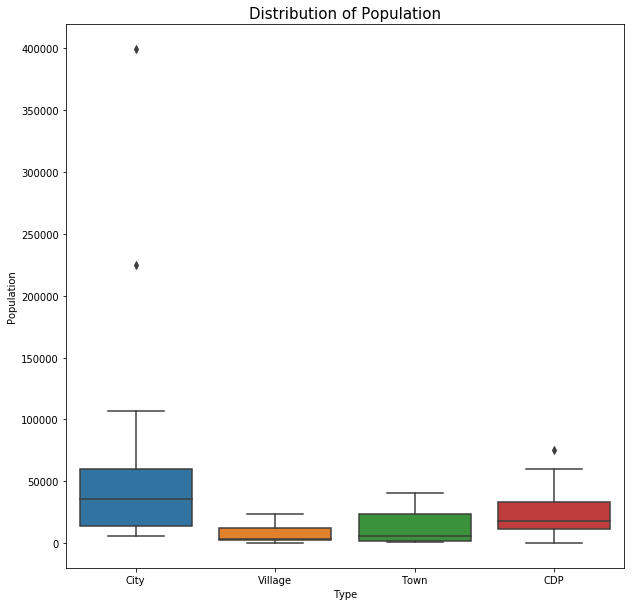

In [49]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Type', y='Population', data = df_PAH)
plt.title("Distribution of Population", fontsize= 15)
plt.savefig("BoxPlotPopulation.png", bbox_inches='tight')

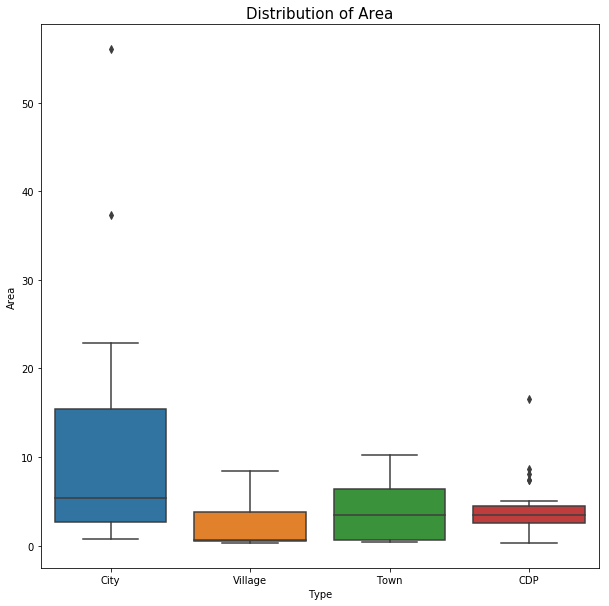

In [50]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Type', y='Area', data = df_PAH)
plt.title("Distribution of Area", fontsize= 15)
plt.savefig("BoxPlotArea.png", bbox_inches='tight')

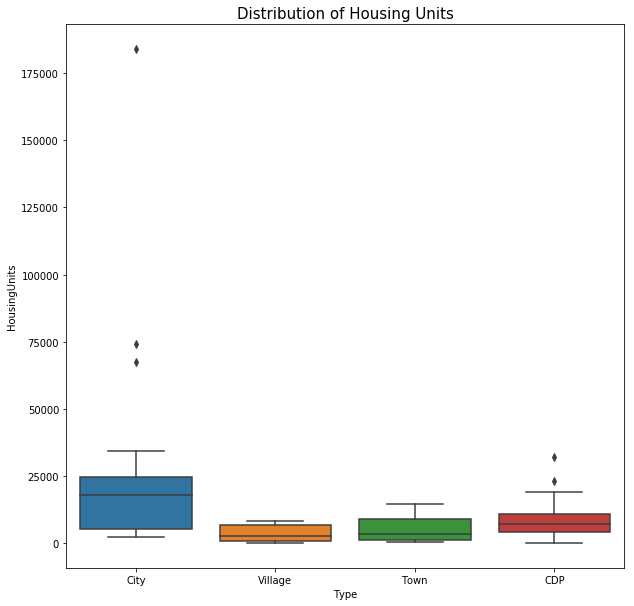

In [51]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Type', y='HousingUnits', data = df_PAH)
plt.title("Distribution of Housing Units", fontsize= 15)
plt.savefig("BoxPlotHousing.png", bbox_inches='tight')

#### Scatter Plots - Area vs Population

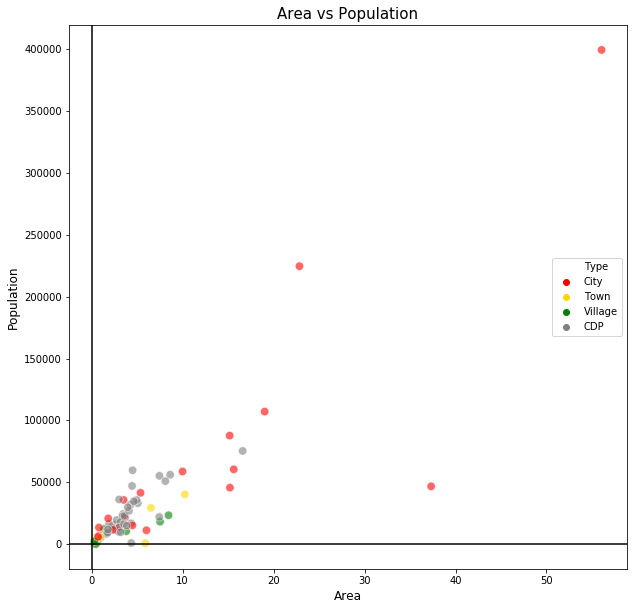

In [52]:
plt.figure(figsize=(10, 10))
AvP=sns.scatterplot(data=df_PAH, x="Area", y="Population", hue="Type", alpha=0.6,
                    hue_order=['City', 'Town', 'Village', 'CDP'],
                      palette=['red', 'gold', 'green', 'gray'], s=70)
AvP.axhline(y=0., c='k')
AvP.axvline(x=0, c='k')
plt.xlabel("Area", fontsize= 12)
plt.ylabel("Population", fontsize= 12)
plt.title("Area vs Population", fontsize= 15)
plt.savefig("ScatAvP.png", bbox_inches='tight')

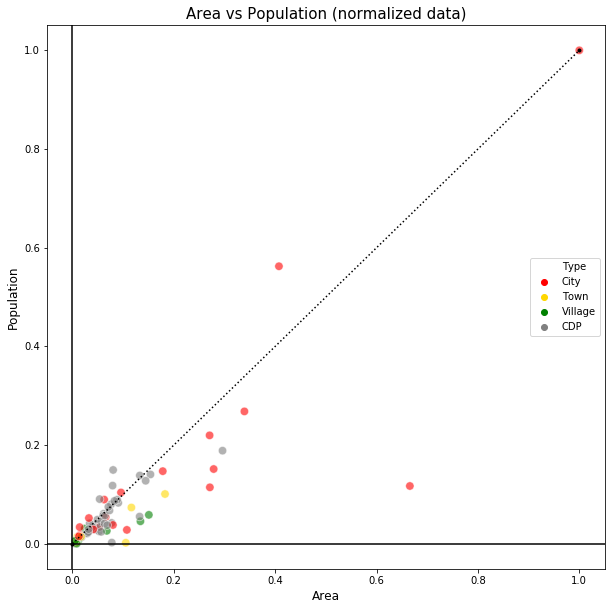

In [53]:
plt.figure(figsize=(10, 10))
xdataAvP = list(range(2))
ydataAvP = list(range(2))
AvPn=sns.scatterplot(data=df_PAH, x="AreaNorm", y="PopulationNorm", hue="Type", alpha=0.6,
                    hue_order=['City', 'Town', 'Village', 'CDP'],
                      palette=['red', 'gold', 'green', 'gray'], s=70)
AvPn.plot(xdataAvP, ydataAvP, ':.k')
AvPn.axhline(y=0., c='k')
AvPn.axvline(x=0, c='k')
plt.xlabel("Area", fontsize= 12)
plt.ylabel("Population", fontsize= 12)
plt.title("Area vs Population (normalized data)", fontsize= 15)
plt.savefig("ScatAvPn.png", bbox_inches='tight')

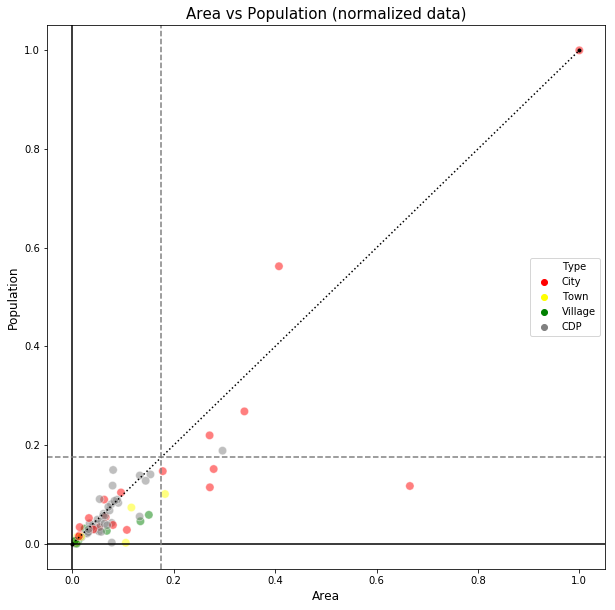

In [54]:
plt.figure(figsize=(10, 10))
AvPn2=sns.scatterplot(data=df_PAH, x="AreaNorm", y="PopulationNorm", hue="Type", alpha=0.5,
                      hue_order=['City', 'Town', 'Village', 'CDP'],
                      palette=['red', 'yellow', 'green', 'gray'], s=70)
AvPn2.plot(xdataAvP, ydataAvP, ':.k')
AvPn2.axhline(y=0., c='k')
AvPn2.axvline(x=0, c='k')
AvPn2.axhline(y=0.175, c='gray', linestyle='--')
AvPn2.axvline(x=0.175, c='gray', linestyle='--')
plt.xlabel("Area", fontsize= 12)
plt.ylabel("Population", fontsize= 12)
plt.title("Area vs Population (normalized data)", fontsize= 15)
plt.savefig("ScatAvPn2.png", bbox_inches='tight')

In [55]:
df_PAH.query('AreaNorm>0.175')

GEOID      Community  Type  Population  HousingUnits   Area  \
5   1590000US1208614250   Coral Gables  City       46780         20266  37.32   
9   1590000US1208615968     Cutler Bay  Town       40286         14620  10.24   
10  1590000US1208617935          Doral  City       45704         17785  15.20   
20  1590000US1208630000        Hialeah  City      224669         74067  22.84   
22  1590000US1208632275      Homestead  City       60512         23419  15.62   
28  1590000US1208636100        Kendall   CDP       75371         31899  16.60   
33  1590000US1208645000          Miami  City      399457        183994  56.06   
34  1590000US1208645025    Miami Beach  City       87779         67499  15.17   
35  1590000US1208645060  Miami Gardens  City      107167         34284  19.02   
41  1590000US1208649450    North Miami  City       58786         22110   9.99   

    AreaNorm  PopulationNorm  HousingNorm  
5   0.665715        0.117109     0.110145  
9   0.182661        0.100852     0.079459  
10  0.271138        0.114415     0.096661  
20  0.407421        0.562436     0.402551  
22  0.278630        0.151486     0.127281  
28  0.296111        0.188684     0.173370  
33  1.000000        1.000000     1.000000  
34  0.270603        0.219746     0.366854  
35  0.339279        0.268282     0.186332  
41  0.178202        0.147165     0.120167

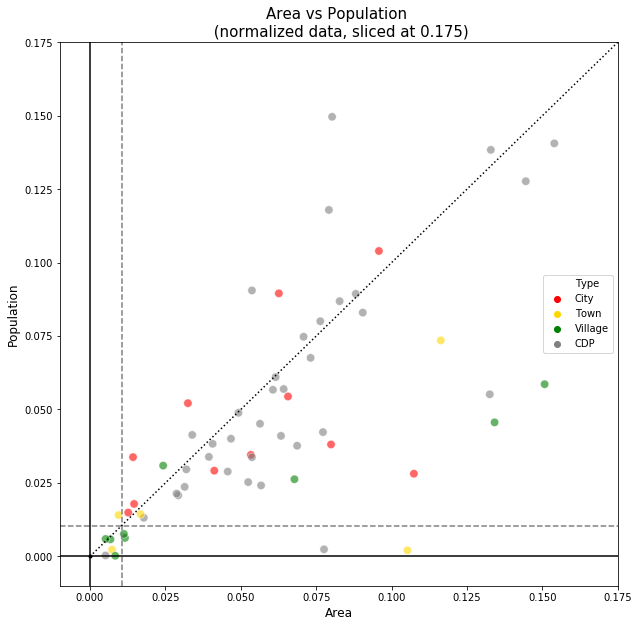

In [56]:
plt.figure(figsize=(10, 10), frameon=False)
AvPn3=sns.scatterplot(data=df_PAH, x="AreaNorm", y="PopulationNorm", hue="Type", alpha=0.6,
                    hue_order=['City', 'Town', 'Village', 'CDP'],
                      palette=['red', 'gold', 'green', 'gray'], s=70)
AvPn3.axhline(y=0.0105,  c='gray', linestyle='--')
AvPn3.axvline(x=0.0105, c='gray', linestyle='--')
AvPn3.axhline(y=0., c='k')
AvPn3.axvline(x=0, c='k')
AvPn3.plot(xdataAvP, ydataAvP, ':.k')
plt.xlabel("Area", fontsize= 12)
plt.ylabel("Population", fontsize= 12)
plt.ylim(bottom=-0.01, top=0.175)
plt.xlim(left=-0.01, right=0.175)
plt.title("Area vs Population \n (normalized data, sliced at 0.175)", fontsize= 15)
plt.savefig("ScatAvPn3.png", bbox_inches='tight')

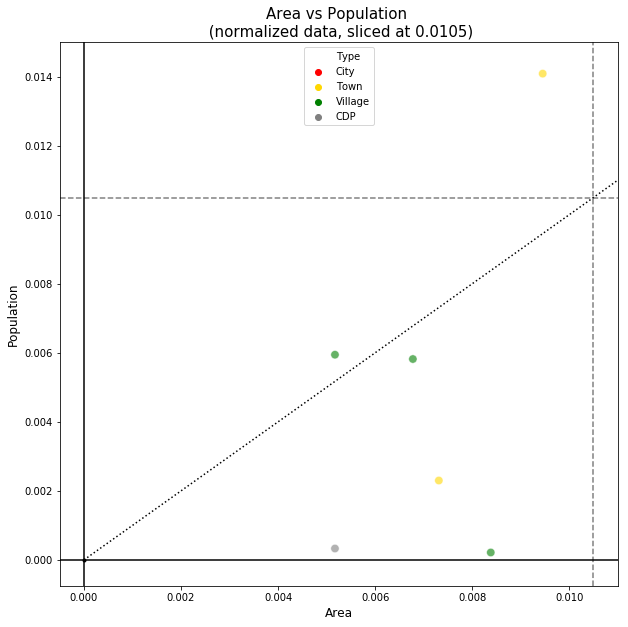

In [57]:
plt.figure(figsize=(10, 10), frameon=False)
AvPn4=sns.scatterplot(data=df_PAH, x="AreaNorm", y="PopulationNorm", hue="Type", alpha=0.6,
                    hue_order=['City', 'Town', 'Village', 'CDP'],
                      palette=['red', 'gold', 'green', 'gray'], s=70)
AvPn4.axhline(y=0.0105,  c='gray', linestyle='--')
AvPn4.axvline(x=0.0105, c='gray', linestyle='--')
AvPn4.plot(xdataAvP, ydataAvP, ':.k')
AvPn4.axhline(y=0., c='k')
AvPn4.axvline(x=0, c='k')
plt.xlabel("Area", fontsize= 12)
plt.ylabel("Population", fontsize= 12)
plt.ylim(bottom = -0.00075, top=0.015)
plt.xlim(left = -0.0005, right=0.011)
plt.title("Area vs Population \n (normalized data, sliced at 0.0105)", fontsize= 15)
plt.savefig("ScatAvPn4.png", bbox_inches='tight')

In [58]:
df_PAH.query('AreaNorm<0.0105')

GEOID           Community     Type  Population  \
2   1590000US1208603975  Bay Harbor Islands     Town        5628   
11  1590000US1208620650           El Portal  Village        2325   
12  1590000US1208622375       Fisher Island      CDP         132   
17  1590000US1208626250        Golden Beach     Town         919   
24  1590000US1208633425        Indian Creek  Village          86   
65  1590000US1208674575    Virginia Gardens  Village        2375   

    HousingUnits  Area  AreaNorm  PopulationNorm  HousingNorm  
2           3199  0.53  0.009454        0.014089     0.017386  
11           939  0.38  0.006778        0.005820     0.005103  
12           226  0.29  0.005173        0.000330     0.001228  
17           355  0.41  0.007314        0.002301     0.001929  
24            33  0.47  0.008384        0.000215     0.000179  
65           949  0.29  0.005173        0.005946     0.005158

#### Scatter Plots - Area vs Housing Units

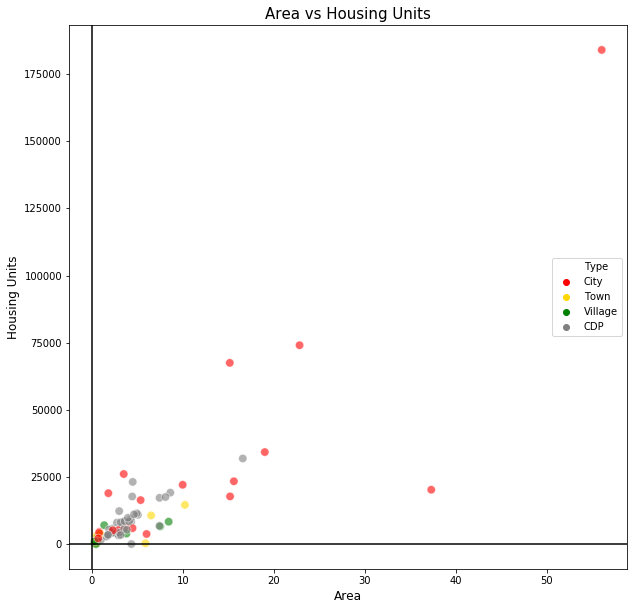

In [59]:
plt.figure(figsize=(10, 10))
AvH=sns.scatterplot(data=df_PAH, x="Area", y="HousingUnits", hue="Type", alpha=0.6,
                    hue_order=['City', 'Town', 'Village', 'CDP'],
                      palette=['red', 'gold', 'green', 'gray'], s=70)
AvH.axhline(y=0., c='k')
AvH.axvline(x=0, c='k')
plt.xlabel("Area", fontsize= 12)
plt.ylabel("Housing Units", fontsize= 12)
plt.title("Area vs Housing Units", fontsize= 15)
plt.savefig("ScatAvH.png", bbox_inches='tight')

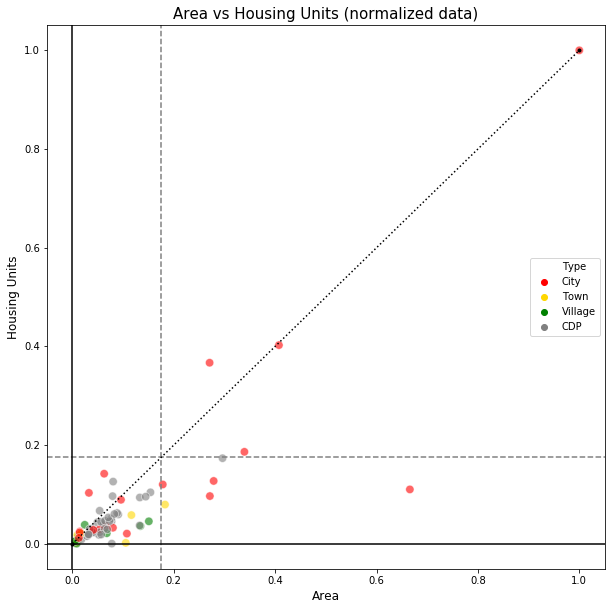

In [60]:
plt.figure(figsize=(10, 10))
xdataAvH = list(range(2))
ydataAvH = list(range(2))
AvHn=sns.scatterplot(data=df_PAH, x="AreaNorm", y="HousingNorm", hue="Type", alpha=0.6,
                    hue_order=['City', 'Town', 'Village', 'CDP'],
                      palette=['red', 'gold', 'green', 'gray'], s=70)
AvHn.axhline(y=0.175, c='gray', linestyle='--')
AvHn.axvline(x=0.175, c='gray', linestyle='--')
AvHn.axhline(y=0., c='k')
AvHn.axvline(x=0, c='k')
AvHn.plot(xdataAvH, ydataAvH, ':.k')
plt.xlabel("Area", fontsize= 12)
plt.ylabel("Housing Units", fontsize= 12)
plt.title("Area vs Housing Units (normalized data)", fontsize= 15)
plt.savefig("ScatAvHn.png", bbox_inches='tight')

In [61]:
df_PAH.query('AreaNorm>0.175')

GEOID      Community  Type  Population  HousingUnits   Area  \
5   1590000US1208614250   Coral Gables  City       46780         20266  37.32   
9   1590000US1208615968     Cutler Bay  Town       40286         14620  10.24   
10  1590000US1208617935          Doral  City       45704         17785  15.20   
20  1590000US1208630000        Hialeah  City      224669         74067  22.84   
22  1590000US1208632275      Homestead  City       60512         23419  15.62   
28  1590000US1208636100        Kendall   CDP       75371         31899  16.60   
33  1590000US1208645000          Miami  City      399457        183994  56.06   
34  1590000US1208645025    Miami Beach  City       87779         67499  15.17   
35  1590000US1208645060  Miami Gardens  City      107167         34284  19.02   
41  1590000US1208649450    North Miami  City       58786         22110   9.99   

    AreaNorm  PopulationNorm  HousingNorm  
5   0.665715        0.117109     0.110145  
9   0.182661        0.100852     0.079459  
10  0.271138        0.114415     0.096661  
20  0.407421        0.562436     0.402551  
22  0.278630        0.151486     0.127281  
28  0.296111        0.188684     0.173370  
33  1.000000        1.000000     1.000000  
34  0.270603        0.219746     0.366854  
35  0.339279        0.268282     0.186332  
41  0.178202        0.147165     0.120167

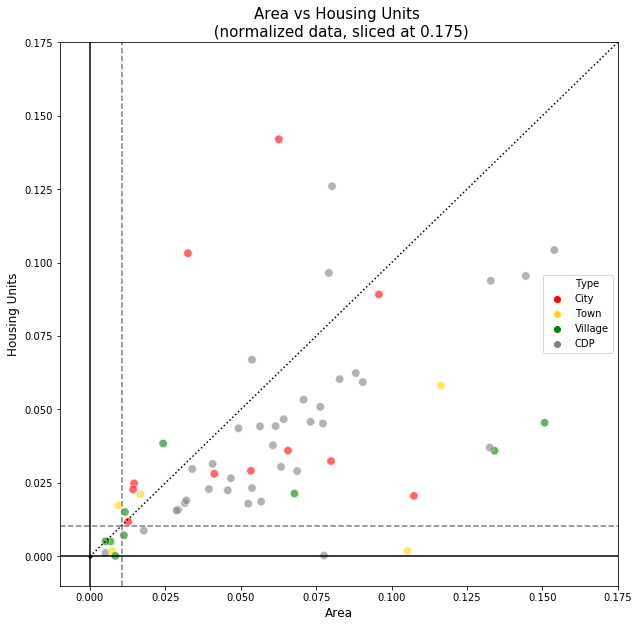

In [62]:
plt.figure(figsize=(10, 10), frameon=False)
AvHn2=sns.scatterplot(data=df_PAH, x="AreaNorm", y="HousingNorm", hue="Type", alpha=0.6,
                    hue_order=['City', 'Town', 'Village', 'CDP'],
                      palette=['red', 'gold', 'green', 'gray'], s=70)
AvHn2.axhline(y=0.0105,  c='gray', linestyle='--')
AvHn2.axvline(x=0.0105, c='gray', linestyle='--')
AvHn2.axhline(y=0., c='k')
AvHn2.axvline(x=0, c='k')
AvHn2.plot(xdataAvH, ydataAvH, ':.k')
plt.xlabel("Area", fontsize= 12)
plt.ylabel("Housing Units", fontsize= 12)
plt.ylim(bottom=-0.01, top=0.175)
plt.xlim(left=-0.01, right=0.175)
plt.title("Area vs Housing Units \n (normalized data, sliced at 0.175)", fontsize= 15)
plt.savefig("ScatAvHn2.png", bbox_inches='tight')

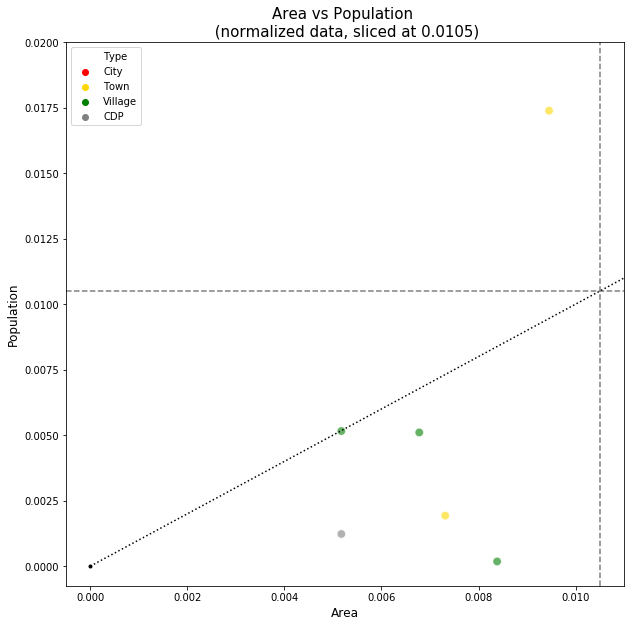

In [63]:
plt.figure(figsize=(10, 10), frameon=False)
AvHn3=sns.scatterplot(data=df_PAH, x="AreaNorm", y="HousingNorm", hue="Type", alpha=0.6,
                    hue_order=['City', 'Town', 'Village', 'CDP'],
                      palette=['red', 'gold', 'green', 'gray'], s=70)
AvHn3.axhline(y=0.0105,  c='gray', linestyle='--')
AvHn3.axvline(x=0.0105, c='gray', linestyle='--')
AvHn3.plot(xdataAvH, ydataAvH, ':.k')
plt.xlabel("Area", fontsize= 12)
plt.ylabel("Population", fontsize= 12)
plt.ylim(bottom = -0.00075, top=0.020)
plt.xlim(left = -0.0005, right=0.011)
plt.title("Area vs Population \n (normalized data, sliced at 0.0105)", fontsize= 15)
plt.savefig("ScatAvHn3.png", bbox_inches='tight')

In [64]:
df_PAH.query('AreaNorm<0.0105')

GEOID           Community     Type  Population  \
2   1590000US1208603975  Bay Harbor Islands     Town        5628   
11  1590000US1208620650           El Portal  Village        2325   
12  1590000US1208622375       Fisher Island      CDP         132   
17  1590000US1208626250        Golden Beach     Town         919   
24  1590000US1208633425        Indian Creek  Village          86   
65  1590000US1208674575    Virginia Gardens  Village        2375   

    HousingUnits  Area  AreaNorm  PopulationNorm  HousingNorm  
2           3199  0.53  0.009454        0.014089     0.017386  
11           939  0.38  0.006778        0.005820     0.005103  
12           226  0.29  0.005173        0.000330     0.001228  
17           355  0.41  0.007314        0.002301     0.001929  
24            33  0.47  0.008384        0.000215     0.000179  
65           949  0.29  0.005173        0.005946     0.005158

### 4.3. Pre-processing Geo-data for further Vizualization

In [65]:
list_community3=df_PAH['Community'].tolist()
g_dadeplaces=g_flplaces.loc[g_flplaces['NAME'].isin(
    np.array(list_community3))]
g_dadeplaces.head()

AFFGEOID    ALAND  AWATER    GEOID LSAD                NAME  \
5   1600000US1226250   841472  228894  1226250   43        Golden Beach   
14  1600000US1203975  1026599   64027  1203975   43  Bay Harbor Islands   
32  1600000US1271567  8946780  363604  1271567   57       The Crossings   
51  1600000US1234400  6593433  558276  1234400   57        Ives Estates   
52  1600000US1251475  6892453  911245  1251475   57     Olympia Heights   

   PLACEFP   PLACENS STATEFP  \
5    26250  02406583      12   
14   03975  02405217      12   
32   71567  02402922      12   
51   34400  02402627      12   
52   51475  02403376      12   

                                             geometry  
5   POLYGON ((-80.12427 25.95843, -80.12386 25.961...  
14  POLYGON ((-80.13920 25.88877, -80.13764 25.891...  
32  POLYGON ((-80.41655 25.68534, -80.41479 25.685...  
51  POLYGON ((-80.19767 25.95754, -80.19844 25.959...  
52  POLYGON ((-80.35976 25.73252, -80.35174 25.732...

In [66]:
print('Choosed: ' + str(len(g_dadeplaces)) +'. In list were ' + str(len(list_community3))) 

Choosed: 71. In list were 71


In [67]:
g_dadeplaces2=g_dadeplaces[['NAME', 'geometry']]
g_dadeplaces2.head()

NAME                                           geometry
5         Golden Beach  POLYGON ((-80.12427 25.95843, -80.12386 25.961...
14  Bay Harbor Islands  POLYGON ((-80.13920 25.88877, -80.13764 25.891...
32       The Crossings  POLYGON ((-80.41655 25.68534, -80.41479 25.685...
51        Ives Estates  POLYGON ((-80.19767 25.95754, -80.19844 25.959...
52     Olympia Heights  POLYGON ((-80.35976 25.73252, -80.35174 25.732...

In [68]:
df_PAH2=df_PAH.set_index('Community').join(g_dadeplaces2.set_index('NAME'))
df_PAH2.reset_index(inplace=True)
df_PAH2=df_PAH2[['GEOID','Community','Type', 'geometry',  'Population', 'HousingUnits', 'Area',
       'AreaNorm', 'PopulationNorm', 'HousingNorm']]
df_PAH2.head()

GEOID           Community     Type  \
0  1590000US1208602681            Aventura     City   
1  1590000US1208603275         Bal Harbour  Village   
2  1590000US1208603975  Bay Harbor Islands     Town   
3  1590000US1208606600       Biscayne Park  Village   
4  1590000US1208609000         Brownsville      CDP   

                                            geometry  Population  \
0  POLYGON ((-80.15060 25.93773, -80.14915 25.942...       35762   
1  POLYGON ((-80.13102 25.89913, -80.12457 25.899...        2513   
2  POLYGON ((-80.13920 25.88877, -80.13764 25.891...        5628   
3  POLYGON ((-80.19100 25.88651, -80.19024 25.886...        3055   
4  POLYGON ((-80.25737 25.83078, -80.24111 25.831...       15313   

   HousingUnits  Area  AreaNorm  PopulationNorm  HousingNorm  
0         26120  3.51  0.062611        0.089527     0.141961  
1          2780  0.65  0.011595        0.006291     0.015109  
2          3199  0.53  0.009454        0.014089     0.017386  
3          1324  0.63  0.011238        0.007648     0.007196  
4          5797  2.28  0.040671        0.038335     0.031506

In [69]:
gd_PAH = gpd.GeoDataFrame(df_PAH2)
gd_PAH.head()

GEOID           Community     Type  \
0  1590000US1208602681            Aventura     City   
1  1590000US1208603275         Bal Harbour  Village   
2  1590000US1208603975  Bay Harbor Islands     Town   
3  1590000US1208606600       Biscayne Park  Village   
4  1590000US1208609000         Brownsville      CDP   

                                            geometry  Population  \
0  POLYGON ((-80.15060 25.93773, -80.14915 25.942...       35762   
1  POLYGON ((-80.13102 25.89913, -80.12457 25.899...        2513   
2  POLYGON ((-80.13920 25.88877, -80.13764 25.891...        5628   
3  POLYGON ((-80.19100 25.88651, -80.19024 25.886...        3055   
4  POLYGON ((-80.25737 25.83078, -80.24111 25.831...       15313   

   HousingUnits  Area  AreaNorm  PopulationNorm  HousingNorm  
0         26120  3.51  0.062611        0.089527     0.141961  
1          2780  0.65  0.011595        0.006291     0.015109  
2          3199  0.53  0.009454        0.014089     0.017386  
3          1324  0.63  0.011238        0.007648     0.007196  
4          5797  2.28  0.040671        0.038335     0.031506

In [70]:
gd_PAH.crs= 'epsg:3857'
gd2_PAH=gd_PAH.to_crs('epsg:3857')

In [71]:
gd2_PAH['center'] = gd2_PAH['geometry'].centroid
gd2_PAH_points = gd2_PAH.copy()
gd2_PAH_points.set_geometry('center', inplace = True)

In [72]:
list_num_com=[]
count=0
for i in gd2_PAH_points['Community']:
    count=count+1
    list_num_com.append(count)
gd2_PAH_points['CommunityN']=list_num_com
gd2_PAH_points.head()

GEOID           Community     Type  \
0  1590000US1208602681            Aventura     City   
1  1590000US1208603275         Bal Harbour  Village   
2  1590000US1208603975  Bay Harbor Islands     Town   
3  1590000US1208606600       Biscayne Park  Village   
4  1590000US1208609000         Brownsville      CDP   

                                            geometry  Population  \
0  POLYGON ((-80.15060 25.93773, -80.14915 25.942...       35762   
1  POLYGON ((-80.13102 25.89913, -80.12457 25.899...        2513   
2  POLYGON ((-80.13920 25.88877, -80.13764 25.891...        5628   
3  POLYGON ((-80.19100 25.88651, -80.19024 25.886...        3055   
4  POLYGON ((-80.25737 25.83078, -80.24111 25.831...       15313   

   HousingUnits  Area  AreaNorm  PopulationNorm  HousingNorm  \
0         26120  3.51  0.062611        0.089527     0.141961   
1          2780  0.65  0.011595        0.006291     0.015109   
2          3199  0.53  0.009454        0.014089     0.017386   
3          1324  0.63  0.011238        0.007648     0.007196   
4          5797  2.28  0.040671        0.038335     0.031506   

                       center  CommunityN  
0  POINT (-80.13716 25.95645)           1  
1  POINT (-80.12580 25.89350)           2  
2  POINT (-80.13346 25.88777)           3  
3  POINT (-80.18134 25.88174)           4  
4  POINT (-80.24170 25.82162)           5

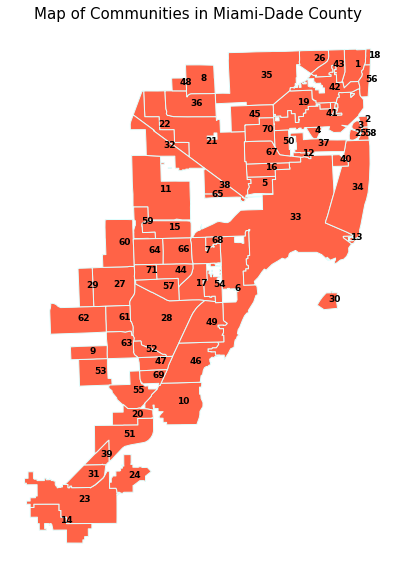

In [73]:
gd_PAH.crs= 'epsg:3857'
gd2_PAH=gd_PAH.to_crs('epsg:3857')
map_PAH=gd2_PAH.plot(figsize=(10,10), color='tomato', 
                          edgecolor='lightcyan', linewidth=1, zorder=1)
texts_g = []

for x, y, label in zip(gd2_PAH_points.geometry.x,
                       gd2_PAH_points.geometry.y, gd2_PAH_points['CommunityN']):
    texts_g.append(plt.text(x, y, label, fontsize = 9, fontweight='bold',
                            color='black', zorder=2))
map_PAH.set(xticks=[], yticks=[])
plt.axis('off')
plt.title("Map of Communities in Miami-Dade County", fontsize= 15)
plt.savefig("MiamiDadeCommunities.png", bbox_inches='tight')

In [74]:
list_count_com=[]
count=0
for c in gd_PAH['Community']:
    count=count+1
    l= str(count) +' - '+c
    list_count_com.append(l)
print('List of communities with numbers on the map:')
print(list_count_com)

List of communities with numbers on the map:
['1 - Aventura', '2 - Bal Harbour', '3 - Bay Harbor Islands', '4 - Biscayne Park', '5 - Brownsville', '6 - Coral Gables', '7 - Coral Terrace', '8 - Country Club', '9 - Country Walk', '10 - Cutler Bay', '11 - Doral', '12 - El Portal', '13 - Fisher Island', '14 - Florida City', '15 - Fountainebleau', '16 - Gladeview', '17 - Glenvar Heights', '18 - Golden Beach', '19 - Golden Glades', '20 - Goulds', '21 - Hialeah', '22 - Hialeah Gardens', '23 - Homestead', '24 - Homestead Base', '25 - Indian Creek', '26 - Ives Estates', '27 - Kendale Lakes', '28 - Kendall', '29 - Kendall West', '30 - Key Biscayne', '31 - Leisure City', '32 - Medley', '33 - Miami', '34 - Miami Beach', '35 - Miami Gardens', '36 - Miami Lakes', '37 - Miami Shores', '38 - Miami Springs', '39 - Naranja', '40 - North Bay Village', '41 - North Miami', '42 - North Miami Beach', '43 - Ojus', '44 - Olympia Heights', '45 - Opa-locka', '46 - Palmetto Bay', '47 - Palmetto Estates', '48 - Pa

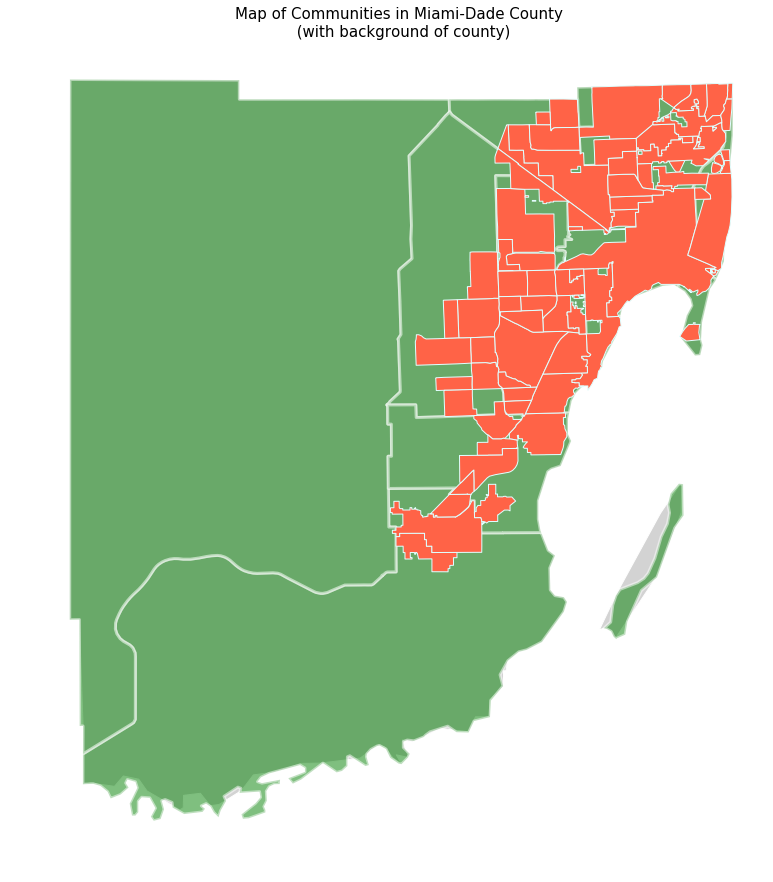

In [75]:
map_PAH2=g2_dade.plot(figsize=(15,15), color='lightgray', 
                               edgecolor='white', linewidth=1, zorder=1)
g2_flplaces2_dade.plot(ax=map_PAH2, figsize=(15,15), 
                       color='green', edgecolor='white', alpha=0.5, linewidth=3,
                      zorder=2)
gd2_PAH.plot(ax=map_PAH2, figsize=(15,15), color='tomato', 
                          edgecolor='lightcyan', linewidth=1, zorder=3)
plt.axis('off')
plt.title("Map of Communities in Miami-Dade County \n (with background of county)", fontsize= 15)
plt.savefig("MiamiDadeCommunities2.png", bbox_inches='tight')

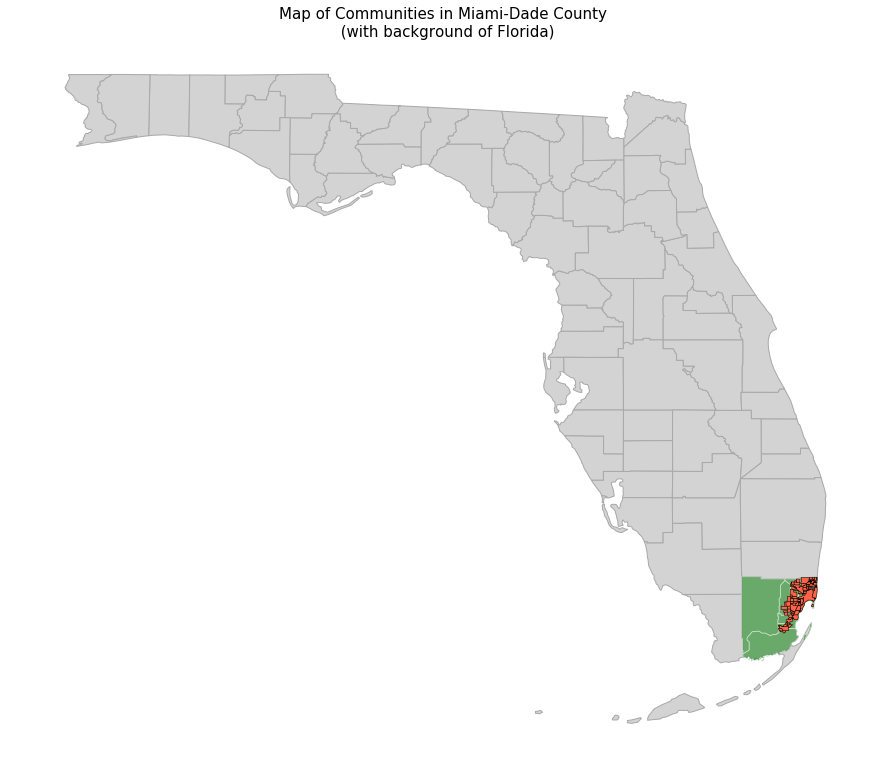

In [76]:
map_PAH3=g2_counties_florida.plot(figsize=(15,15), color='lightgray', 
                               edgecolor='darkgray', linewidth=1, zorder=1)
g2_flplaces2_dade.plot(ax=map_PAH3, figsize=(15,15), 
                       color='green', alpha=0.5, edgecolor='white', linewidth=0.8,
                      zorder=2)
gd2_PAH.plot(ax=map_PAH3, figsize=(15,15), color='tomato', 
                          edgecolor='black', linewidth=0.5, zorder=3)
plt.axis('off')
plt.title("Map of Communities in Miami-Dade County \n (with background of Florida)", fontsize= 15)
plt.savefig("MiamiDadeCommunities3.png", bbox_inches='tight')

### 4.4. Vizualization of Data on the Map

#### Type of community

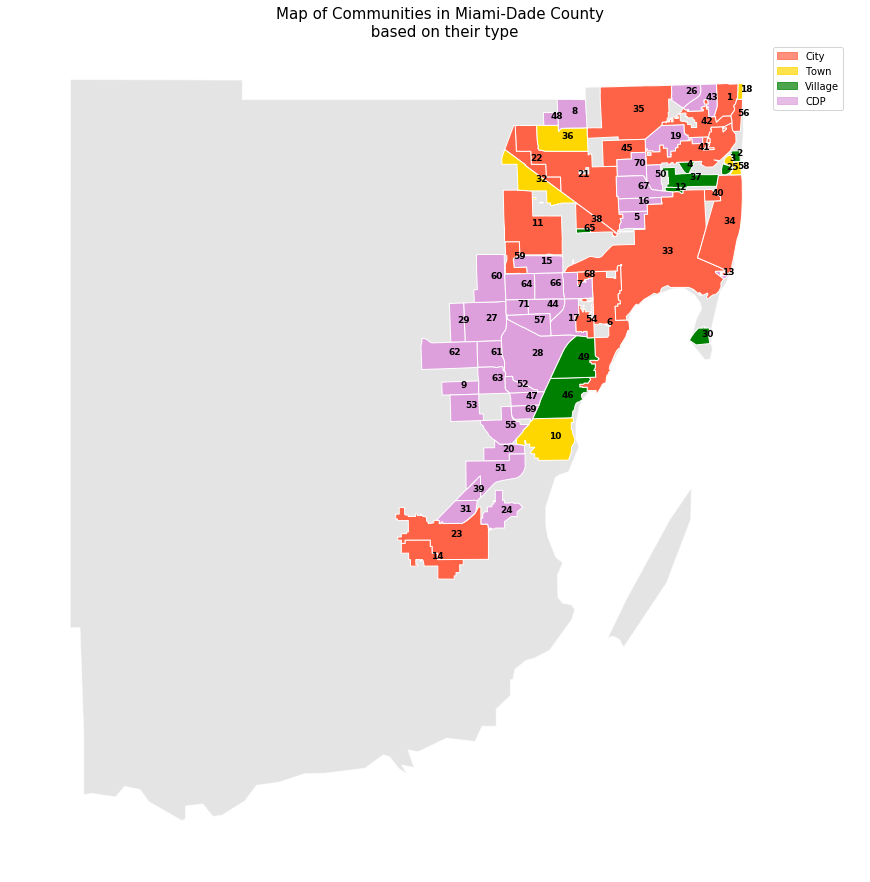

In [77]:
list_colors=[]
for i in gd2_PAH['Type']:
    if i=='City':
        c='tomato'
    elif i=='Town':
        c='gold'
    elif i == 'Village':
        c='green'
    elif i == 'CDP':
        c='plum'
    list_colors.append(c)
gd2_PAH['Colors']=list_colors

map_Type=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=1, zorder=1)
gd2_PAH.plot(ax=map_Type, linewidth=1, edgecolor='white', 
            color=gd2_PAH['Colors'], zorder=2)

texts_g = []
for x, y, label in zip(gd2_PAH_points.geometry.x,
                       gd2_PAH_points.geometry.y, gd2_PAH_points['CommunityN']):
    texts_g.append(plt.text(x, y, label, fontsize = 9, fontweight='bold',
                            color='black', zorder=3))

plt.axis('off')
plt.xlim(right=-80)
city_patch = mpatches.Patch(color='tomato', alpha= 0.7, label='City')
town_patch = mpatches.Patch(color='gold', alpha= 0.7, label='Town')
vill_patch = mpatches.Patch(color='green', alpha= 0.7,  label='Village')
cdp_patch = mpatches.Patch(color='plum', alpha= 0.7,  label='CDP')
plt.legend(handles=[city_patch, town_patch, vill_patch, cdp_patch])
plt.title("Map of Communities in Miami-Dade County \n based on their type", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesType.png", bbox_inches='tight')

#### Area

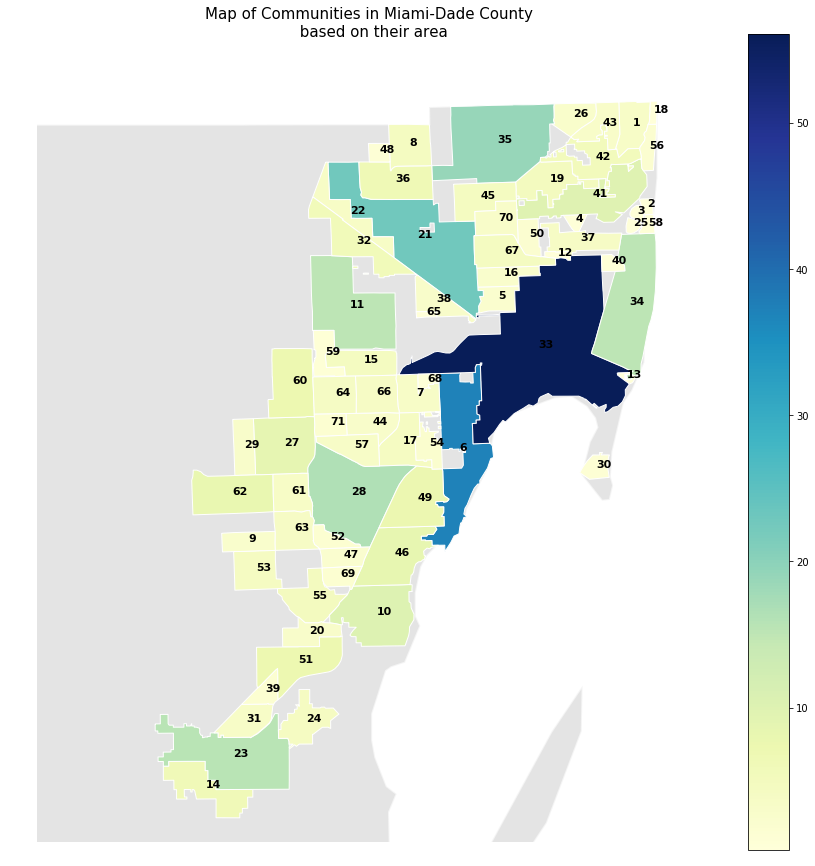

In [78]:
map_Area=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_PAH.plot(ax=map_Area, column = 'Area', linewidth=1, edgecolor='white', 
              cmap='YlGnBu', legend=True, zorder=2)
for x, y, label in zip(gd2_PAH_points.geometry.x,
                       gd2_PAH_points.geometry.y, gd2_PAH_points['CommunityN']):
    texts_g.append(plt.text(x, y, label, fontsize = 11, fontweight='bold',
                            color='black', zorder=2))
plt.axis('off')
plt.xlim(left=-80.6)
plt.ylim(bottom=25.4)
plt.title("Map of Communities in Miami-Dade County \n based on their area", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesArea.png", bbox_inches='tight')

#### Population

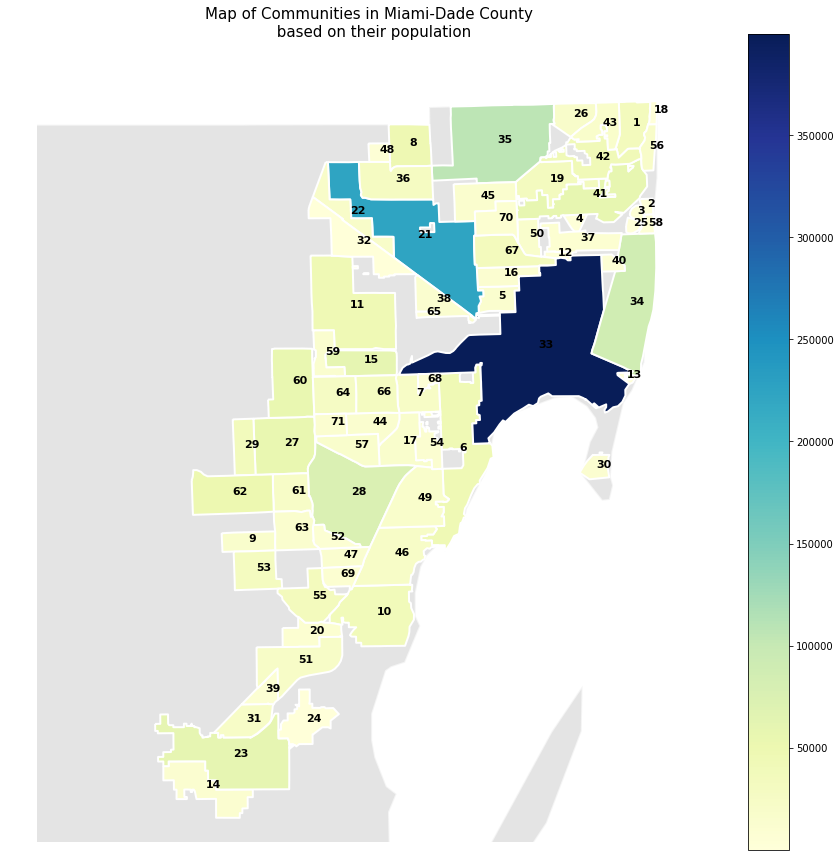

In [79]:
map_Population=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_PAH.plot(ax=map_Population, column = 'Population', linewidth=2, 
             edgecolor='white', cmap='YlGnBu', legend=True, zorder=2)
for x, y, label in zip(gd2_PAH_points.geometry.x,
                       gd2_PAH_points.geometry.y, gd2_PAH_points['CommunityN']):
    texts_g.append(plt.text(x, y, label, fontsize = 11, fontweight='bold',
                            color='black', zorder=2))
plt.axis('off')
plt.xlim(left=-80.6)
plt.ylim(bottom=25.4)
plt.title("Map of Communities in Miami-Dade County \n based on their population", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesPopulation.png", bbox_inches='tight')

#### Housing Units

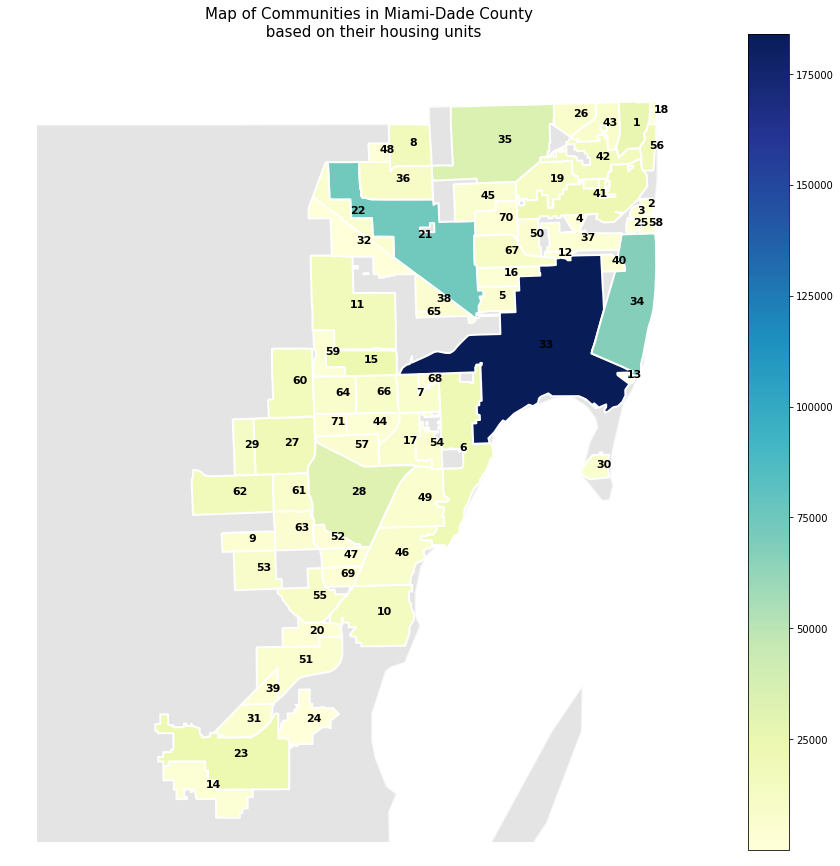

In [80]:
map_HUnits=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_PAH.plot(ax=map_HUnits, column = 'HousingUnits', linewidth=2, edgecolor='white', 
              cmap='YlGnBu', legend=True, zorder=2)
for x, y, label in zip(gd2_PAH_points.geometry.x,
                       gd2_PAH_points.geometry.y, gd2_PAH_points['CommunityN']):
    texts_g.append(plt.text(x, y, label, fontsize = 11, fontweight='bold',
                            color='black', zorder=2))
plt.axis('off')
plt.xlim(left=-80.6)
plt.ylim(bottom=25.4)
plt.title("Map of Communities in Miami-Dade County \n based on their housing units", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesHUnits.png", bbox_inches='tight')

## 5. Age and Sex

### 5.1. Data (reading and wrangling)

In [81]:
df_AS =pd.read_csv('https://raw.githubusercontent.com/adnechaev/Miami-Dade-County-Capstone-Project/master/CENSUS%202010%20age%20and%20sex.csv', index_col=0, error_bad_lines=False)
df_AS.reset_index(inplace=True)
df_AS.drop(columns=[ 'Geographic area', 'Total population',
                         'Males per 100 females - 18 years and over'], inplace=True)
df_AS.columns = ['GEOID', '<18%','18-24%','25-44%','45-64%','>=65%', 'MedianAge','M/100F']
df_AS.head()

GEOID  <18%  18-24%  25-44%  45-64%  >=65%  MedianAge  M/100F
0  1590000US1208602681  15.4     5.5    27.8    24.8   26.6       46.1    84.6
1  1590000US1208603275  15.5     4.2    21.7    26.5   32.1       51.0    79.5
2  1590000US1208603975  21.7     5.0    30.0    26.1   17.1       41.0    87.0
3  1590000US1208606600  21.5     6.4    31.6    29.6   10.9       40.4    94.8
4  1590000US1208609000  29.6    11.6    24.8    23.1   10.8       31.1    90.8

In [82]:
df_AS['Total']=df_AS['<18%']+df_AS['18-24%']+df_AS['25-44%']+df_AS['45-64%']+df_AS['>=65%']
list_18=[] 
list_24=[]
list_44=[]
list_64=[]
list_65=[]
for it, i18, i24, i44, i64, i65 in zip(df_AS['Total'], df_AS['<18%'], df_AS['18-24%'], 
                                       df_AS['25-44%'], df_AS['45-64%'], df_AS['>=65%']):
    if it>100:
        it2=it-100
        it3=it2/5
        i18=i18-it3
        i24=i24-it3
        i44=i44-it3
        i64=i64-it3
        i65=i65-it3
    elif it<100:
        it2=100-it
        it3=it2/5
        i18=i18+it3
        i24=i24+it3
        i44=i44+it3
        i64=i64+it3
        i65=i65+it3
    list_18.append(i18)
    list_24.append(i24)
    list_44.append(i44)
    list_64.append(i64)
    list_65.append(i65)
df_AS['<18%']=list_18
df_AS['18-24%']=list_24
df_AS['25-44%']=list_44
df_AS['45-64%']=list_64
df_AS['>=65%']=list_65
del df_AS['Total']
df_AS.head()

GEOID   <18%  18-24%  25-44%  45-64%  >=65%  MedianAge  \
0  1590000US1208602681  15.38    5.48   27.78   24.78  26.58       46.1   
1  1590000US1208603275  15.50    4.20   21.70   26.50  32.10       51.0   
2  1590000US1208603975  21.72    5.02   30.02   26.12  17.12       41.0   
3  1590000US1208606600  21.50    6.40   31.60   29.60  10.90       40.4   
4  1590000US1208609000  29.62   11.62   24.82   23.12  10.82       31.1   

   M/100F  
0    84.6  
1    79.5  
2    87.0  
3    94.8  
4    90.8

In [83]:
df_PAHAS=df_PAH.set_index('GEOID').join(df_AS.set_index('GEOID'))
del df_PAHAS['AreaNorm']
del df_PAHAS['PopulationNorm']
del df_PAHAS['HousingNorm']
df_PAHAS.reset_index(inplace=True)
df_PAHAS.head()

GEOID           Community     Type  Population  HousingUnits  \
0  1590000US1208602681            Aventura     City       35762         26120   
1  1590000US1208603275         Bal Harbour  Village        2513          2780   
2  1590000US1208603975  Bay Harbor Islands     Town        5628          3199   
3  1590000US1208606600       Biscayne Park  Village        3055          1324   
4  1590000US1208609000         Brownsville      CDP       15313          5797   

   Area   <18%  18-24%  25-44%  45-64%  >=65%  MedianAge  M/100F  
0  3.51  15.38    5.48   27.78   24.78  26.58       46.1    84.6  
1  0.65  15.50    4.20   21.70   26.50  32.10       51.0    79.5  
2  0.53  21.72    5.02   30.02   26.12  17.12       41.0    87.0  
3  0.63  21.50    6.40   31.60   29.60  10.90       40.4    94.8  
4  2.28  29.62   11.62   24.82   23.12  10.82       31.1    90.8

In [84]:
list_PG=df_PAHAS['Population'].tolist()
list_P18p=df_PAHAS['<18%'].tolist()
list_P24p=df_PAHAS['18-24%'].tolist()
list_P44p=df_PAHAS['25-44%'].tolist()
list_P64p=df_PAHAS['45-64%'].tolist()
list_P65p=df_PAHAS['>=65%'].tolist()
list_PSp=df_PAHAS['M/100F'].tolist()
array_PG=np.asarray(df_PAHAS['Population'], dtype='int64')
array_P18p=np.asarray(df_PAHAS['<18%'], dtype='int64')
array_P24p=np.asarray(df_PAHAS['18-24%'], dtype='int64')
array_P44p=np.asarray(df_PAHAS['25-44%'], dtype='int64')
array_P64p=np.asarray(df_PAHAS['45-64%'], dtype='int64')
array_P65p=np.asarray(df_PAHAS['>=65%'], dtype='int64')
array_PSp=np.asarray(df_PAHAS['M/100F'], dtype='int64')
array_P18=(array_PG * array_P18p)/100
array_P24=(array_PG * array_P24p)/100
array_P44=(array_PG * array_P44p)/100
array_P64=(array_PG * array_P64p)/100
array_P65=array_PG-array_P18-array_P24-array_P44-array_P64
array_PF=100 * array_PG / (100+ array_PSp)
array_PM=array_PG - array_PF
df_PAHAS.insert(loc=4, column='<18', value=array_P18.round(decimals=0).astype('int'))
df_PAHAS.insert(loc=5, column='18-24', value=array_P24.round(decimals=0).astype('int'))
df_PAHAS.insert(loc=6, column='25-44', value=array_P44.round(decimals=0).astype('int'))
df_PAHAS.insert(loc=7, column='45-64', value=array_P64.round(decimals=0).astype('int'))
df_PAHAS.insert(loc=8, column='>=65', value=array_P65.round(decimals=0).astype('int'))
df_PAHAS.insert(loc=9, column='M', value=array_PM.round(decimals=0).astype('int'))
df_PAHAS.insert(loc=10, column='F', value=array_PF.round(decimals=0).astype('int'))
df_PAHAS = df_PAHAS[['GEOID', 'Community','Type','Area','HousingUnits',
                     'Population','M', 'F','M/100F', 'MedianAge', 
                     '<18','18-24','25-44','45-64','>=65', 
                     '<18%','18-24%','25-44%','45-64%','>=65%']]
df_PAHAS.head()

GEOID           Community     Type  Area  HousingUnits  \
0  1590000US1208602681            Aventura     City  3.51         26120   
1  1590000US1208603275         Bal Harbour  Village  0.65          2780   
2  1590000US1208603975  Bay Harbor Islands     Town  0.53          3199   
3  1590000US1208606600       Biscayne Park  Village  0.63          1324   
4  1590000US1208609000         Brownsville      CDP  2.28          5797   

   Population      M      F  M/100F  MedianAge   <18  18-24  25-44  45-64  \
0       35762  16326  19436    84.6       46.1  5364   1788   9656   8583   
1        2513   1109   1404    79.5       51.0   377    101    528    653   
2        5628   2618   3010    87.0       41.0  1182    281   1688   1463   
3        3055   1480   1575    94.8       40.4   642    183    947    886   
4       15313   7254   8059    90.8       31.1  4441   1684   3675   3522   

    >=65   <18%  18-24%  25-44%  45-64%  >=65%  
0  10371  15.38    5.48   27.78   24.78  26.58  
1    854  15.50    4.20   21.70   26.50  32.10  
2   1013  21.72    5.02   30.02   26.12  17.12  
3    397  21.50    6.40   31.60   29.60  10.90  
4   1991  29.62   11.62   24.82   23.12  10.82

In [85]:
df_PAHAS_C=df_PAHAS.query('Type =="City"')
df_PAHAS_T=df_PAHAS.query('Type =="Town"')
df_PAHAS_V=df_PAHAS.query('Type =="Village"')
df_PAHAS_CDP=df_PAHAS.query('Type =="CDP"')

### 5.2. Descriptive statistics

In [86]:
df_PAHAS.describe()

Area   HousingUnits     Population              M              F  \
count  71.000000      71.000000      71.000000      71.000000      71.000000   
mean    5.918592   13017.450704   32230.788732   15503.070423   16727.732394   
std     8.519586   24254.640352   54604.511066   26915.098214   27710.483871   
min     0.290000      33.000000      86.000000      45.000000      41.000000   
25%     1.805000    3650.500000    9876.500000    4623.000000    5243.500000   
50%     3.550000    6629.000000   16898.000000    7960.000000    9036.000000   
75%     5.960000   13468.500000   35729.000000   17062.000000   18863.000000   
max    56.060000  183994.000000  399457.000000  198725.000000  200732.000000   

           M/100F  MedianAge           <18         18-24          25-44  \
count   71.000000  71.000000     71.000000     71.000000      71.000000   
mean    92.473239  38.570423   6839.295775   3036.422535    9031.000000   
std      5.771580   6.089344  10226.485888   4998.361339   16412.051368   
min     79.500000  19.700000     13.000000      2.000000      16.000000   
25%     88.350000  35.250000   2256.500000   1051.500000    2600.500000   
50%     91.800000  39.100000   4144.000000   1639.000000    4689.000000   
75%     94.700000  41.850000   8314.000000   3620.500000    9468.500000   
max    109.900000  61.300000  71902.000000  35951.000000  123832.000000   

              45-64          >=65       <18%     18-24%     25-44%     45-64%  \
count     71.000000     71.000000  71.000000  71.000000  71.000000  71.000000   
mean    8085.760563   5238.309859  22.950141   9.819155  26.775493  26.010704   
std    13397.736723  10042.207807   5.546783   3.787257   4.533850   3.587618   
min       23.000000     20.000000  10.620000   2.300000  13.620000  13.580000   
25%     2288.000000   1406.000000  18.760000   8.340000  24.910000  24.860000   
50%     4408.000000   2565.000000  23.020000   9.420000  26.500000  26.220000   
75%     8973.000000   5097.500000  26.850000  11.060000  28.750000  27.800000   
max    95870.000000  71902.000000  36.980000  31.980000  42.120000  34.820000   

           >=65%  
count  71.000000  
mean   14.444507  
std     6.432184  
min     2.080000  
25%    10.560000  
50%    13.100000  
75%    16.790000  
max    37.920000

#### Bar and Pie Plots  - Sex vs Population

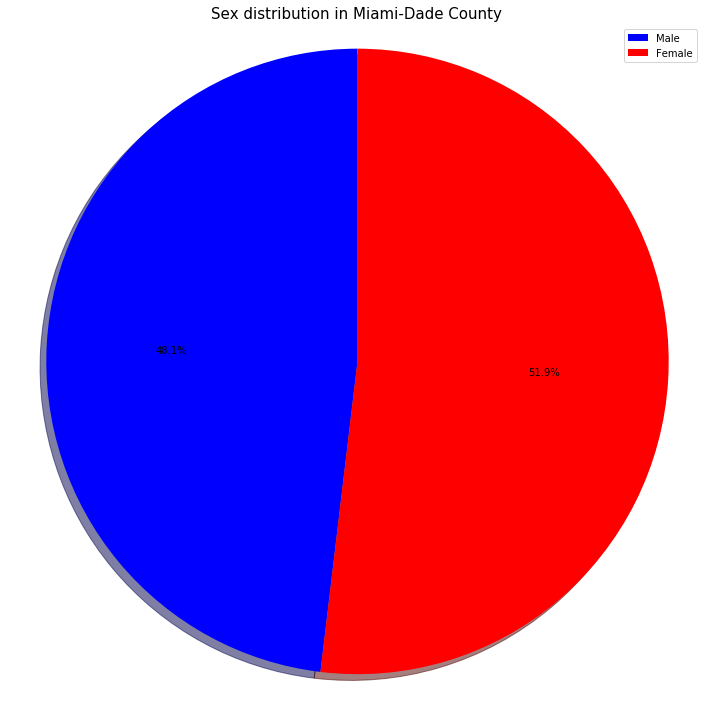

In [87]:
sum_PAHAS=df_PAHAS.sum(numeric_only=True)
plt.figure(figsize=(10, 10), frameon=False)
labels = ['Male', 'Female']
sizes = [sum_PAHAS['M'], sum_PAHAS['F']]
colors = ['blue', 'red']
patches, texts, junk = plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('Sex distribution in Miami-Dade County', fontsize= 15)
plt.tight_layout()
plt.savefig("SexPie.png", bbox_inches='tight')
plt.show()

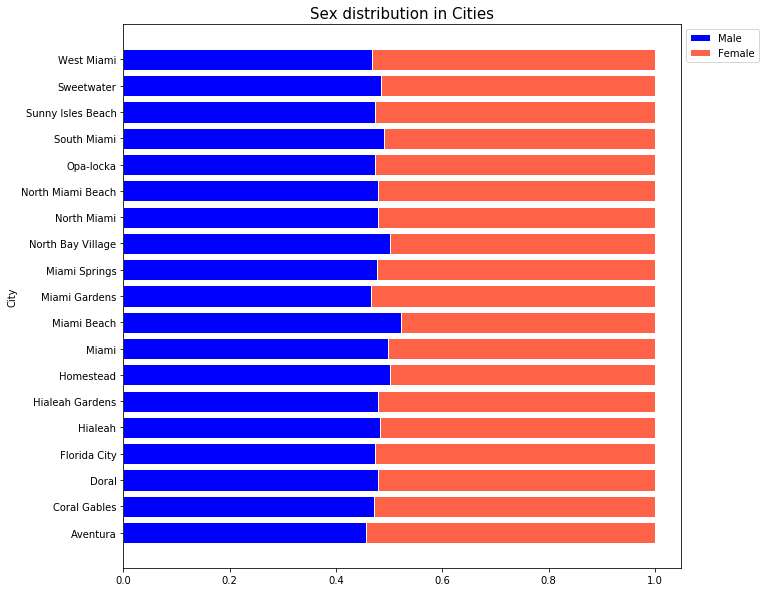

In [88]:
MenC=[]
WomenC=[]
for m,w,p in zip(df_PAHAS_C['M'], df_PAHAS_C['F'], df_PAHAS_C['Population']):
    im=m/p
    iw=w/p
    MenC.append(im)
    WomenC.append(iw)
namesC = df_PAHAS_C['Community'].tolist()
namesC=tuple(namesC)
sC=[]
count=0
for i in namesC:
    count=count+1
    l=count-1
    sC.append(l)
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(sC, MenC, color='blue', edgecolor='white', label="Male")
plt.barh(sC, WomenC, left=MenC, color='tomato', edgecolor='white', label="Female")

plt.yticks(sC, namesC)
plt.ylabel("City")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Sex distribution in Cities', fontsize= 15)
plt.savefig("SexCity.png", bbox_inches='tight')
plt.show()

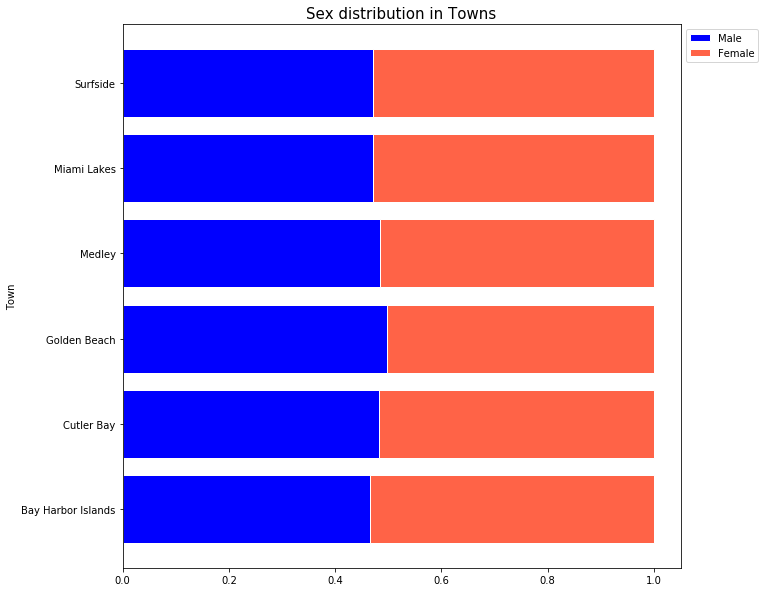

In [89]:
MenT=[]
WomenT=[]
for m,w,p in zip(df_PAHAS_T['M'], df_PAHAS_T['F'], df_PAHAS_T['Population']):
    im=m/p
    iw=w/p
    MenT.append(im)
    WomenT.append(iw)
namesT = df_PAHAS_T['Community'].tolist()
namesT=tuple(namesT)
sT=[]
count=0
for i in namesT:
    count=count+1
    l=count-1
    sT.append(l)
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(sT, MenT, color='blue', edgecolor='white', label="Male")
plt.barh(sT, WomenT, left=MenT, color='tomato', edgecolor='white', label="Female")
plt.yticks(sT, namesT)
plt.ylabel("Town")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Sex distribution in Towns', fontsize= 15)
plt.savefig("SexTown.png", bbox_inches='tight')
plt.show()

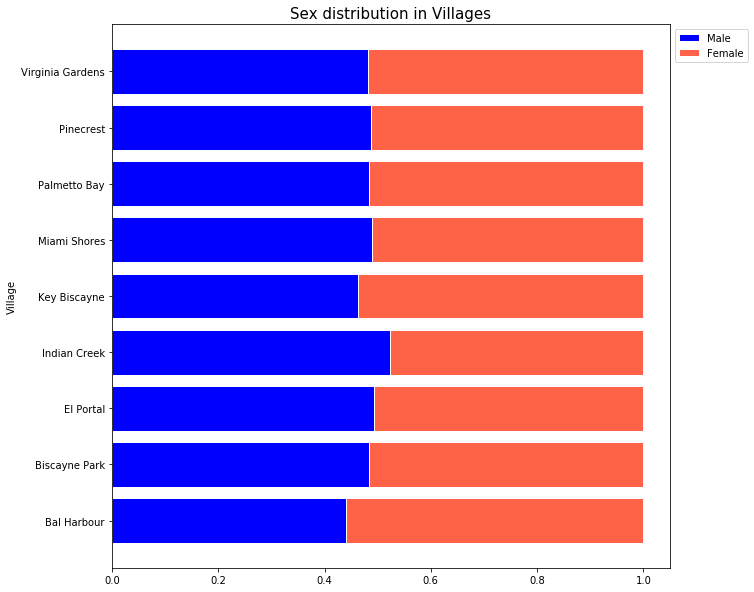

In [90]:
MenV=[]
WomenV=[]
for m,w,p in zip(df_PAHAS_V['M'], df_PAHAS_V['F'], df_PAHAS_V['Population']):
    im=m/p
    iw=w/p
    MenV.append(im)
    WomenV.append(iw)
namesV = df_PAHAS_V['Community'].tolist()
namesV=tuple(namesV)
sV=[]
count=0
for i in namesV:
    count=count+1
    l=count-1
    sV.append(l)
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(sV, MenV, color='blue', edgecolor='white', label="Male")
plt.barh(sV, WomenV, left=MenV, color='tomato', edgecolor='white', label="Female")
plt.yticks(sV, namesV)
plt.ylabel("Village")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Sex distribution in Villages', fontsize= 15)
plt.savefig("SexVillage.png", bbox_inches='tight')
plt.show()

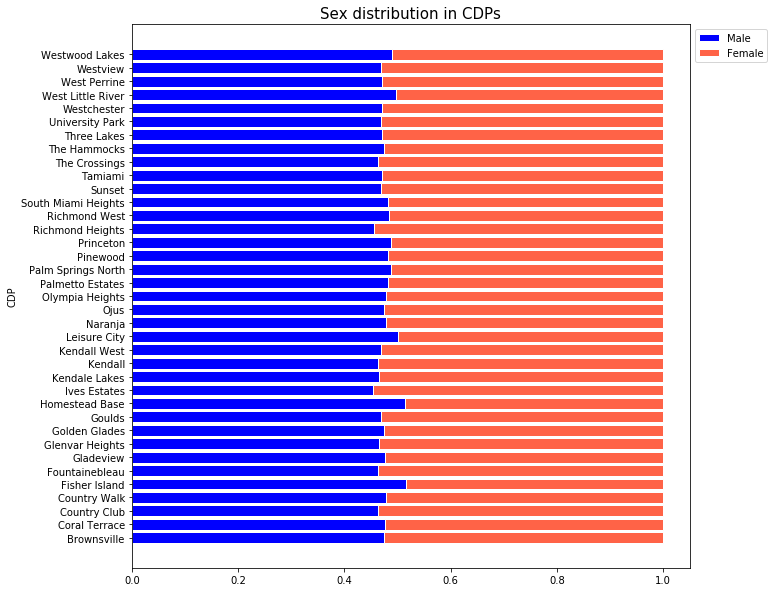

In [91]:
MenCDP=[]
WomenCDP=[]
for m,w,p in zip(df_PAHAS_CDP['M'], df_PAHAS_CDP['F'], df_PAHAS_CDP['Population']):
    im=m/p
    iw=w/p
    MenCDP.append(im)
    WomenCDP.append(iw)
namesCDP = df_PAHAS_CDP['Community'].tolist()
namesCDP=tuple(namesCDP)
sCDP=[]
count=0
for i in namesCDP:
    count=count+1
    l=count-1
    sCDP.append(l)
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(sCDP, MenCDP, color='blue', edgecolor='white', label='Male')
plt.barh(sCDP, WomenCDP, left=MenCDP, color='tomato', edgecolor='white', label="Female")
plt.yticks(sCDP, namesCDP)
plt.ylabel("CDP")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Sex distribution in CDPs', fontsize= 15)
plt.savefig("SexCDP.png", bbox_inches='tight')
plt.show()

#### Bar and Pie Plots  - Age vs Population

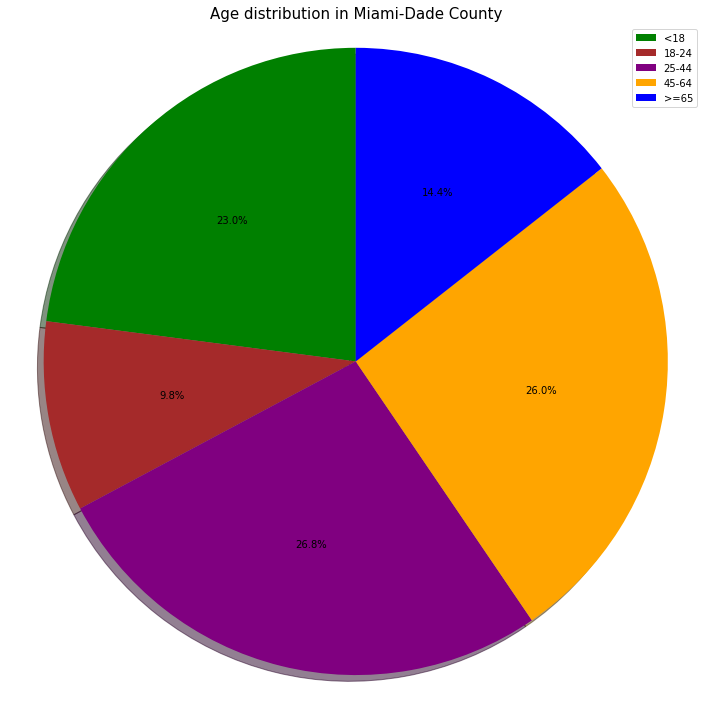

In [92]:
plt.figure(figsize=(10, 10), frameon=False)
labels = ['<18', '18-24', '25-44', '45-64', '>=65']
sizes = [sum_PAHAS['<18%'], sum_PAHAS['18-24%'], sum_PAHAS['25-44%'], 
         sum_PAHAS['45-64%'], sum_PAHAS['>=65%']]
colors = ['green', 'brown', 'purple', 'orange', 'blue']
patches, texts, junk = plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('Age distribution in Miami-Dade County', fontsize= 15)
plt.tight_layout()
plt.savefig("AgePie.png", bbox_inches='tight')
plt.show()

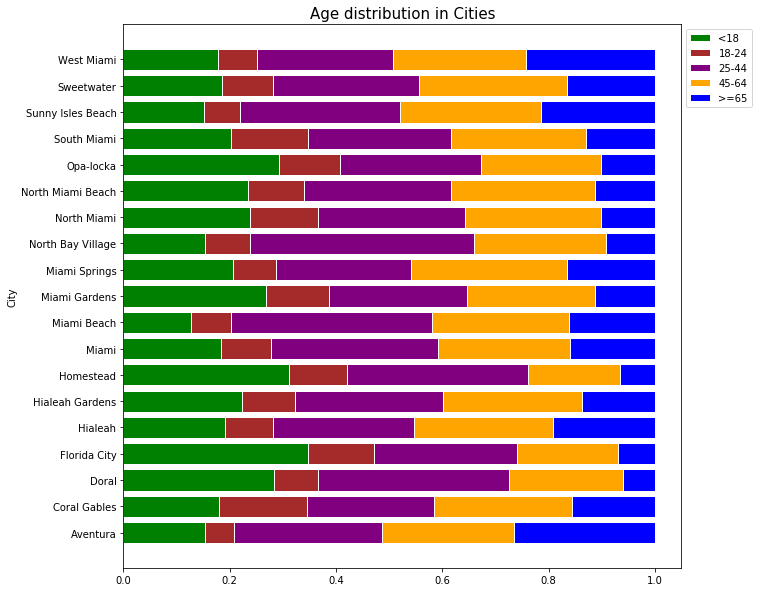

In [93]:
C18 = df_PAHAS_C['<18%'].tolist()
C18= [i/100 for i in C18] 
C24 = df_PAHAS_C['18-24%'].tolist()
C24= [i/100 for i in C24]
C44= df_PAHAS_C['25-44%'].tolist()
C44= [i/100 for i in C44]
C64 = df_PAHAS_C['45-64%'].tolist()
C64= [i/100 for i in C64]
C65=df_PAHAS_C['>=65%'].tolist()
C65= [i/100 for i in C65]
rC=[]
count=0
for i in namesC:
    count=count+1
    l=count-1
    rC.append(l)
rC
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rC, C18, color='green', edgecolor='white', label="<18")
plt.barh(rC, C24, left=C18, color='brown', edgecolor='white', label="18-24")
plt.barh(rC, C44, left=[w+b for w,b in zip(C18, C24)], color='purple', edgecolor='white', label="25-44")
plt.barh(rC, C64, left=[w+b+l for w,b,l in zip(C18, C24, C44)], color='orange', edgecolor='white', label="45-64")
plt.barh(rC, C65, left=[w+b+l+m for w,b,l,m in zip(C18, C24, C44, C64)], color='blue', edgecolor='white', label=">=65")
plt.yticks(rC, namesC)
plt.ylabel("City")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Age distribution in Cities', fontsize= 15)
plt.savefig("AgeCity.png", bbox_inches='tight')
plt.show()

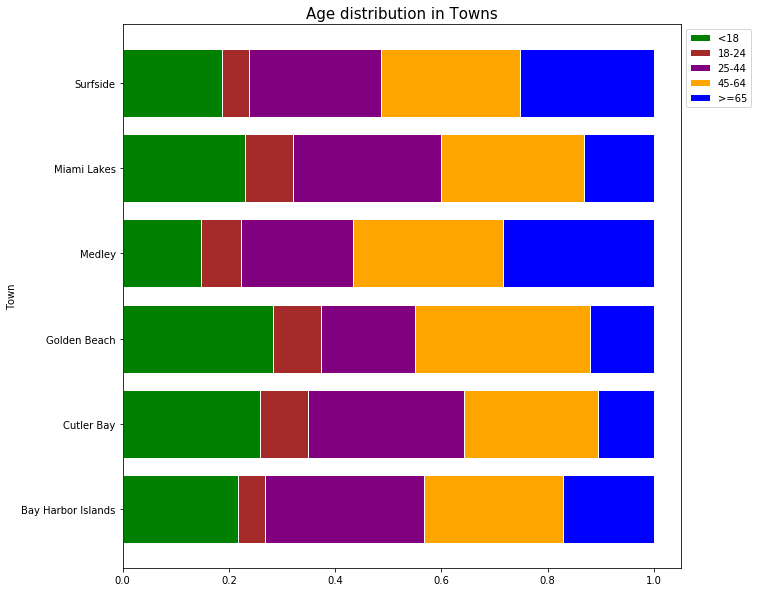

In [94]:
T18 = df_PAHAS_T['<18%'].tolist()
T18= [i/100 for i in T18] 
T24 = df_PAHAS_T['18-24%'].tolist()
T24= [i/100 for i in T24]
T44= df_PAHAS_T['25-44%'].tolist()
T44= [i/100 for i in T44]
T64 = df_PAHAS_T['45-64%'].tolist()
T64= [i/100 for i in T64]
T65= df_PAHAS_T['>=65%'].tolist()
T65= [i/100 for i in T65]
rT=[]
count=0
for i in namesT:
    count=count+1
    l=count-1
    rT.append(l)
rT
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rT, T18, color='green', edgecolor='white', label="<18")
plt.barh(rT, T24, left=T18, color='brown', edgecolor='white', label="18-24")
plt.barh(rT, T44, left=[w+b for w,b in zip(T18, T24)], color='purple', edgecolor='white', label="25-44")
plt.barh(rT, T64, left=[w+b+l for w,b,l in zip(T18, T24, T44)], color='orange', edgecolor='white', label="45-64")
plt.barh(rT, T65, left=[w+b+l+m for w,b,l,m in zip(T18, T24, T44, T64)], color='blue', edgecolor='white', label=">=65")
plt.yticks(rT, namesT)
plt.ylabel("Town")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Age distribution in Towns', fontsize= 15)
plt.savefig("AgeTown.png", bbox_inches='tight')
plt.show()

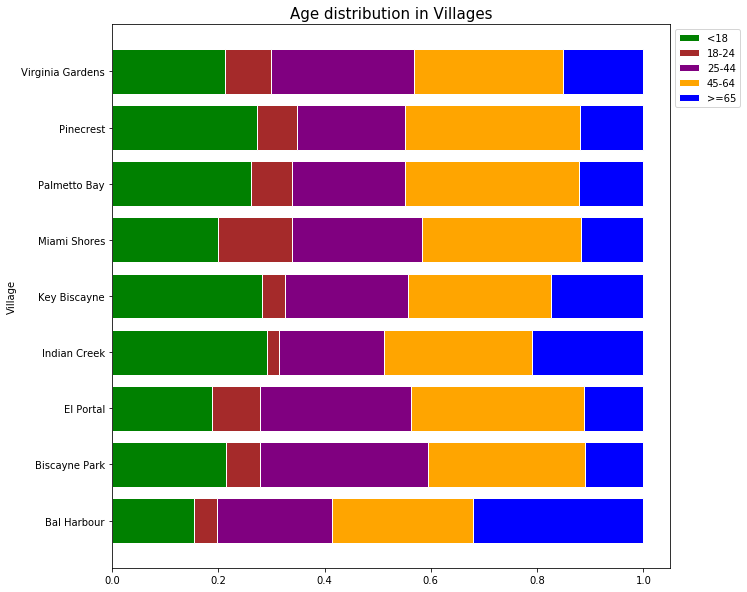

In [95]:
V18 = df_PAHAS_V['<18%'].tolist()
V18= [i/100 for i in V18] 
V24 = df_PAHAS_V['18-24%'].tolist()
V24= [i/100 for i in V24]
V44=df_PAHAS_V['25-44%'].tolist()
V44= [i/100 for i in V44]
V64 = df_PAHAS_V['45-64%'].tolist()
V64= [i/100 for i in V64]
V65=df_PAHAS_V['>=65%'].tolist()
V65= [i/100 for i in V65]
rV=[]
count=0
for i in namesV:
    count=count+1
    l=count-1
    rV.append(l)
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rV, V18, color='green', edgecolor='white', label="<18")
plt.barh(rV, V24, left=V18, color='brown', edgecolor='white', label="18-24")
plt.barh(rV, V44, left=[w+b for w,b in zip(V18, V24)], color='purple', edgecolor='white', label="25-44")
plt.barh(rV, V64, left=[w+b+l for w,b,l in zip(V18, V24, V44)], color='orange', edgecolor='white', label="45-64")
plt.barh(rV, V65, left=[w+b+l+m for w,b,l,m in zip(V18, V24, V44, V64)], color='blue', edgecolor='white', label=">=65")
plt.yticks(rV, namesV)
plt.ylabel("Village")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Age distribution in Villages', fontsize= 15)
plt.savefig("AgeVillage.png", bbox_inches='tight')
plt.show()

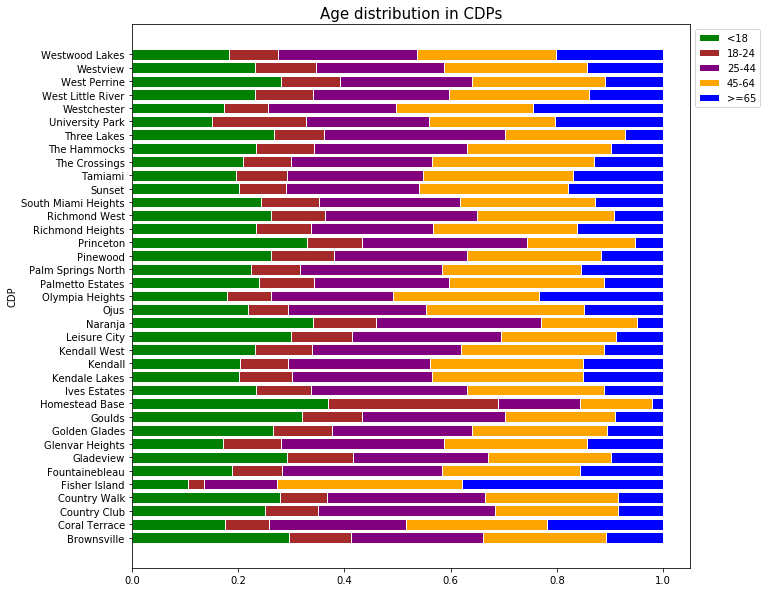

In [96]:
CDP18 = df_PAHAS_CDP['<18%'].tolist()
CDP18= [i/100 for i in CDP18] 
CDP24 = df_PAHAS_CDP['18-24%'].tolist()
CDP24= [i/100 for i in CDP24]
CDP44= df_PAHAS_CDP['25-44%'].tolist()
CDP44= [i/100 for i in CDP44]
CDP64 = df_PAHAS_CDP['45-64%'].tolist()
CDP64= [i/100 for i in CDP64]
CDP65=df_PAHAS_CDP['>=65%'].tolist()
CDP65= [i/100 for i in CDP65]
rCDP=[]
count=0
for i in namesCDP:
    count=count+1
    l=count-1
    rCDP.append(l)
rCDP
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rCDP, CDP18, color='green', edgecolor='white', label="<18")
plt.barh(rCDP, CDP24, left=CDP18, color='brown', edgecolor='white', label="18-24")
plt.barh(rCDP, CDP44, left=[w+b for w,b in zip(CDP18, CDP24)], color='purple', edgecolor='white', label="25-44")
plt.barh(rCDP, CDP64, left=[w+b+l for w,b,l in zip(CDP18, CDP24, CDP44)], color='orange', edgecolor='white', label="45-64")
plt.barh(rCDP, CDP65, left=[w+b+l+m for w,b,l,m in zip(CDP18, CDP24, CDP44, CDP64)], color='blue', edgecolor='white', label=">=65")
plt.yticks(rCDP, namesCDP)
plt.ylabel("CDP")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Age distribution in CDPs', fontsize= 15)
plt.savefig("AgeCDP.png", bbox_inches='tight')
plt.show()

### 5.3. Pre-processing Geo-data and Age-data for further Vizualization

In [97]:
list_age=[]
for i18,i24, i44, i64, i65 in zip(df_PAHAS['<18%'], df_PAHAS['18-24%'], df_PAHAS['25-44%'],
                                    df_PAHAS['45-64%'],df_PAHAS['>=65%']):
    if i18>i24 and i18>i44 and i18>i64 and i18>i65:
        i='Children Majority'
    elif i24>i18 and i24>i44 and i24>i64 and i24>i65:
        i='Young Majority'
    elif i44>i18 and i44>i24 and i44>i64 and i44>i65:
        i='Middle-Aged Majority (1st type)'
    elif i64>i18 and i64>i24 and i64>i44 and i64>i65:
        i='Middle-Aged Majority (2nd type)'
    elif i65>i18 and i65>i24 and i65>i44 and i65>i64:
        i='Elderly Majority'
    else:
        i='No Age Majority'
    list_age.append(i)
df_PAHAS['AgeType']=list_age
df_PAHAS.head()

GEOID           Community     Type  Area  HousingUnits  \
0  1590000US1208602681            Aventura     City  3.51         26120   
1  1590000US1208603275         Bal Harbour  Village  0.65          2780   
2  1590000US1208603975  Bay Harbor Islands     Town  0.53          3199   
3  1590000US1208606600       Biscayne Park  Village  0.63          1324   
4  1590000US1208609000         Brownsville      CDP  2.28          5797   

   Population      M      F  M/100F  MedianAge   <18  18-24  25-44  45-64  \
0       35762  16326  19436    84.6       46.1  5364   1788   9656   8583   
1        2513   1109   1404    79.5       51.0   377    101    528    653   
2        5628   2618   3010    87.0       41.0  1182    281   1688   1463   
3        3055   1480   1575    94.8       40.4   642    183    947    886   
4       15313   7254   8059    90.8       31.1  4441   1684   3675   3522   

    >=65   <18%  18-24%  25-44%  45-64%  >=65%  \
0  10371  15.38    5.48   27.78   24.78  26.58   
1    854  15.50    4.20   21.70   26.50  32.10   
2   1013  21.72    5.02   30.02   26.12  17.12   
3    397  21.50    6.40   31.60   29.60  10.90   
4   1991  29.62   11.62   24.82   23.12  10.82   

                           AgeType  
0  Middle-Aged Majority (1st type)  
1                 Elderly Majority  
2  Middle-Aged Majority (1st type)  
3  Middle-Aged Majority (1st type)  
4                Children Majority

In [98]:
df_PAHAS['AgeType'].value_counts()

Middle-Aged Majority (1st type)    28
Middle-Aged Majority (2nd type)    25
Children Majority                  15
Elderly Majority                    3
Name: AgeType, dtype: int64

In [99]:
df_PAHAS2=df_PAHAS.set_index('Community').join(g_dadeplaces2.set_index('NAME'))
df_PAHAS2.reset_index(inplace=True)
df_PAHAS2=df_PAHAS2[['GEOID','Community','Type', 'geometry','Area', 'HousingUnits', 'Population', 
                    'M/100F', 'M', 'F', 'AgeType', 'MedianAge', '<18', '18-24', '25-44', '45-64', '>=65',
                     '<18%', '18-24%', '25-44%', '45-64%', '>=65%']]
df_PAHAS2.head()

GEOID           Community     Type  \
0  1590000US1208602681            Aventura     City   
1  1590000US1208603275         Bal Harbour  Village   
2  1590000US1208603975  Bay Harbor Islands     Town   
3  1590000US1208606600       Biscayne Park  Village   
4  1590000US1208609000         Brownsville      CDP   

                                            geometry  Area  HousingUnits  \
0  POLYGON ((-80.15060 25.93773, -80.14915 25.942...  3.51         26120   
1  POLYGON ((-80.13102 25.89913, -80.12457 25.899...  0.65          2780   
2  POLYGON ((-80.13920 25.88877, -80.13764 25.891...  0.53          3199   
3  POLYGON ((-80.19100 25.88651, -80.19024 25.886...  0.63          1324   
4  POLYGON ((-80.25737 25.83078, -80.24111 25.831...  2.28          5797   

   Population  M/100F      M      F                          AgeType  \
0       35762    84.6  16326  19436  Middle-Aged Majority (1st type)   
1        2513    79.5   1109   1404                 Elderly Majority   
2        5628    87.0   2618   3010  Middle-Aged Majority (1st type)   
3        3055    94.8   1480   1575  Middle-Aged Majority (1st type)   
4       15313    90.8   7254   8059                Children Majority   

   MedianAge   <18  18-24  25-44  45-64   >=65   <18%  18-24%  25-44%  45-64%  \
0       46.1  5364   1788   9656   8583  10371  15.38    5.48   27.78   24.78   
1       51.0   377    101    528    653    854  15.50    4.20   21.70   26.50   
2       41.0  1182    281   1688   1463   1013  21.72    5.02   30.02   26.12   
3       40.4   642    183    947    886    397  21.50    6.40   31.60   29.60   
4       31.1  4441   1684   3675   3522   1991  29.62   11.62   24.82   23.12   

   >=65%  
0  26.58  
1  32.10  
2  17.12  
3  10.90  
4  10.82

In [100]:
gd_PAHAS = gpd.GeoDataFrame(df_PAHAS2)
gd_PAHAS.head()

GEOID           Community     Type  \
0  1590000US1208602681            Aventura     City   
1  1590000US1208603275         Bal Harbour  Village   
2  1590000US1208603975  Bay Harbor Islands     Town   
3  1590000US1208606600       Biscayne Park  Village   
4  1590000US1208609000         Brownsville      CDP   

                                            geometry  Area  HousingUnits  \
0  POLYGON ((-80.15060 25.93773, -80.14915 25.942...  3.51         26120   
1  POLYGON ((-80.13102 25.89913, -80.12457 25.899...  0.65          2780   
2  POLYGON ((-80.13920 25.88877, -80.13764 25.891...  0.53          3199   
3  POLYGON ((-80.19100 25.88651, -80.19024 25.886...  0.63          1324   
4  POLYGON ((-80.25737 25.83078, -80.24111 25.831...  2.28          5797   

   Population  M/100F      M      F                          AgeType  \
0       35762    84.6  16326  19436  Middle-Aged Majority (1st type)   
1        2513    79.5   1109   1404                 Elderly Majority   
2        5628    87.0   2618   3010  Middle-Aged Majority (1st type)   
3        3055    94.8   1480   1575  Middle-Aged Majority (1st type)   
4       15313    90.8   7254   8059                Children Majority   

   MedianAge   <18  18-24  25-44  45-64   >=65   <18%  18-24%  25-44%  45-64%  \
0       46.1  5364   1788   9656   8583  10371  15.38    5.48   27.78   24.78   
1       51.0   377    101    528    653    854  15.50    4.20   21.70   26.50   
2       41.0  1182    281   1688   1463   1013  21.72    5.02   30.02   26.12   
3       40.4   642    183    947    886    397  21.50    6.40   31.60   29.60   
4       31.1  4441   1684   3675   3522   1991  29.62   11.62   24.82   23.12   

   >=65%  
0  26.58  
1  32.10  
2  17.12  
3  10.90  
4  10.82

In [101]:
gd_PAHAS.crs= 'epsg:3857'
gd2_PAHAS=gd_PAHAS.to_crs('epsg:3857')

In [102]:
gd2_PAHAS['center'] = gd2_PAHAS['geometry'].centroid
gd2_PAHAS_points = gd2_PAHAS.copy()
gd2_PAHAS_points.set_geometry('center', inplace = True)

In [103]:
list_num_com2=[]
count=0
for i in gd2_PAHAS_points['Community']:
    count=count+1
    list_num_com2.append(count)
gd2_PAHAS_points['CommunityN']=list_num_com2
gd2_PAHAS_points.head()

GEOID           Community     Type  \
0  1590000US1208602681            Aventura     City   
1  1590000US1208603275         Bal Harbour  Village   
2  1590000US1208603975  Bay Harbor Islands     Town   
3  1590000US1208606600       Biscayne Park  Village   
4  1590000US1208609000         Brownsville      CDP   

                                            geometry  Area  HousingUnits  \
0  POLYGON ((-80.15060 25.93773, -80.14915 25.942...  3.51         26120   
1  POLYGON ((-80.13102 25.89913, -80.12457 25.899...  0.65          2780   
2  POLYGON ((-80.13920 25.88877, -80.13764 25.891...  0.53          3199   
3  POLYGON ((-80.19100 25.88651, -80.19024 25.886...  0.63          1324   
4  POLYGON ((-80.25737 25.83078, -80.24111 25.831...  2.28          5797   

   Population  M/100F      M      F                          AgeType  \
0       35762    84.6  16326  19436  Middle-Aged Majority (1st type)   
1        2513    79.5   1109   1404                 Elderly Majority   
2        5628    87.0   2618   3010  Middle-Aged Majority (1st type)   
3        3055    94.8   1480   1575  Middle-Aged Majority (1st type)   
4       15313    90.8   7254   8059                Children Majority   

   MedianAge   <18  18-24  25-44  45-64   >=65   <18%  18-24%  25-44%  45-64%  \
0       46.1  5364   1788   9656   8583  10371  15.38    5.48   27.78   24.78   
1       51.0   377    101    528    653    854  15.50    4.20   21.70   26.50   
2       41.0  1182    281   1688   1463   1013  21.72    5.02   30.02   26.12   
3       40.4   642    183    947    886    397  21.50    6.40   31.60   29.60   
4       31.1  4441   1684   3675   3522   1991  29.62   11.62   24.82   23.12   

   >=65%                      center  CommunityN  
0  26.58  POINT (-80.13716 25.95645)           1  
1  32.10  POINT (-80.12580 25.89350)           2  
2  17.12  POINT (-80.13346 25.88777)           3  
3  10.90  POINT (-80.18134 25.88174)           4  
4  10.82  POINT (-80.24170 25.82162)           5

### 5.4. Vizualization of Data on the Map

#### Type of age

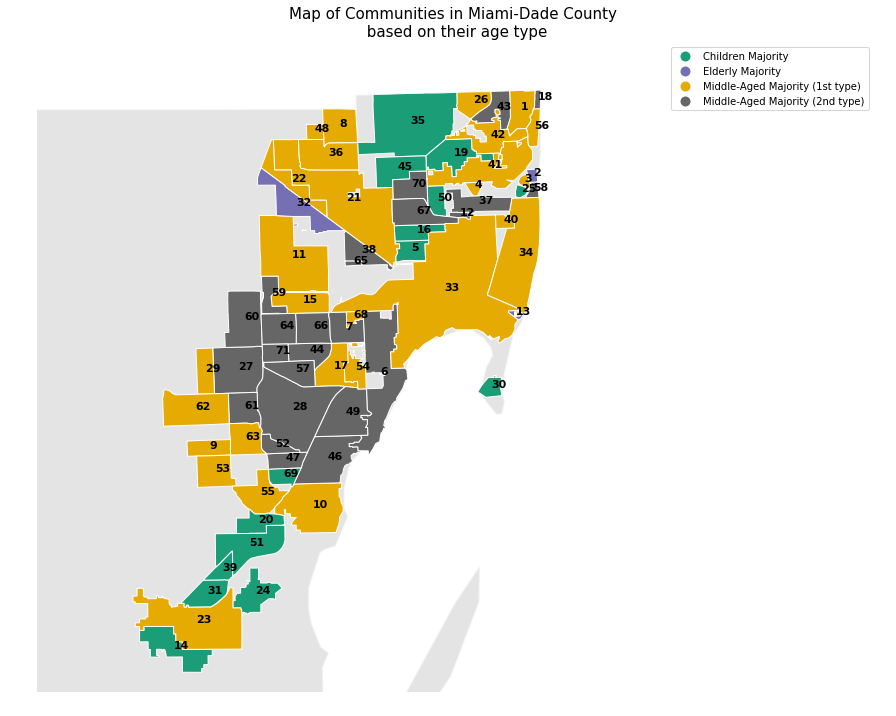

In [104]:
map_TypeAge=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_PAHAS.plot(ax=map_TypeAge, column = 'AgeType', linewidth=1, edgecolor='white', 
              cmap='Dark2', legend=True, zorder=2)
for x, y, label in zip(gd2_PAHAS_points.geometry.x,
                       gd2_PAHAS_points.geometry.y, gd2_PAHAS_points['CommunityN']):
    texts_g.append(plt.text(x, y, label, fontsize = 11, fontweight='bold',
                            color='black', zorder=2))
plt.axis('off')
plt.xlim(left=-80.6, right=-79.8)
plt.ylim(bottom=25.4)
plt.title("Map of Communities in Miami-Dade County \n based on their age type", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesAgeType.png", bbox_inches='tight')

#### Median Age

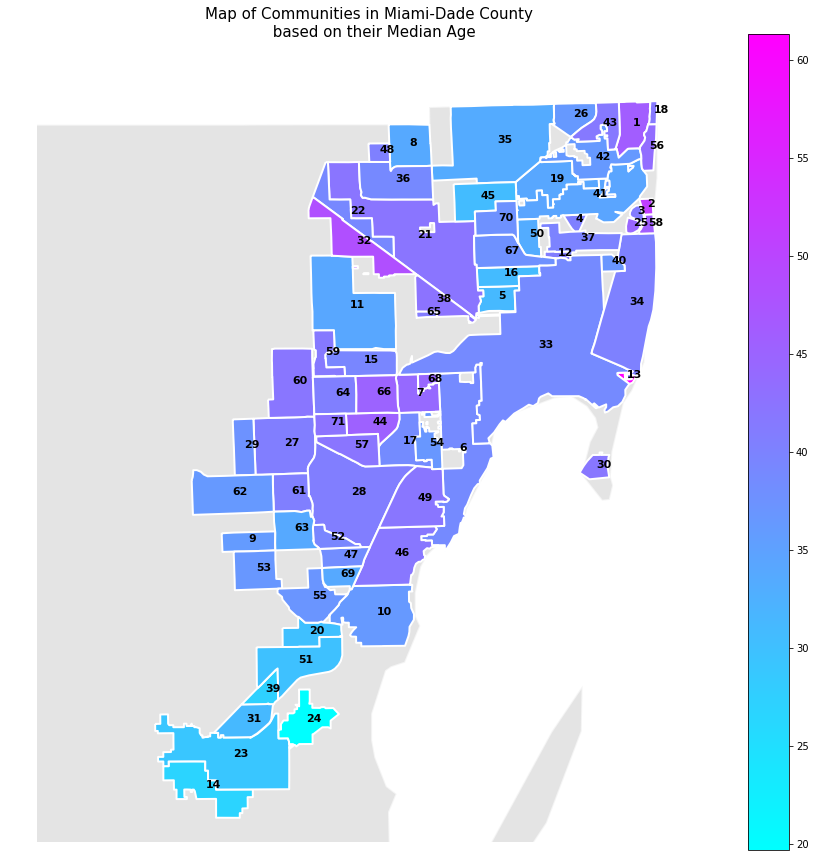

In [105]:
map_MedianAge=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_PAHAS.plot(ax=map_MedianAge, column = 'MedianAge', linewidth=2, edgecolor='white', 
              cmap='cool', legend=True, zorder=2)
for x, y, label in zip(gd2_PAHAS_points.geometry.x,
                       gd2_PAHAS_points.geometry.y, gd2_PAHAS_points['CommunityN']):
    texts_g.append(plt.text(x, y, label, fontsize = 11, fontweight='bold',
                            color='black', zorder=2))
plt.axis('off')
plt.xlim(left=-80.6)
plt.ylim(bottom=25.4)
plt.title("Map of Communities in Miami-Dade County \n based on their Median Age", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesMedianAge.png", bbox_inches='tight')

## 6. Race

### 6.1. Data (reading and wrangling)

In [106]:
df_R =pd.read_csv('https://raw.githubusercontent.com/adnechaev/Miami-Dade-County-Capstone-Project/master/CENSUS%202010%20race.csv', index_col=0, error_bad_lines=False)
df_R.reset_index(inplace=True)
df_R.drop(columns=['Target Geo Id2', 'Geographic area', 'Total population',
                                 'Percent of total population - Race - One Race - White', 
                                'Percent of total population - Race - Two or More Races'], inplace=True)
df_R.columns = ['GEOID', 'Black%', 'Indian%', 'Asian%', 'Hawaiian%','OtherRace%','Latino%','White%']
df_R.head()

GEOID  Black%  Indian%  Asian%  Hawaiian%  OtherRace%  \
0  1590000US1208602681     3.9      0.1     1.8        0.0         2.0   
1  1590000US1208603275     2.1      0.1     0.9        0.0         0.8   
2  1590000US1208603975     2.5      0.2     1.2        0.0         2.2   
3  1590000US1208606600    17.6      0.2     3.3        0.1         2.8   
4  1590000US1208609000    74.7      0.3     0.0        0.0         3.3   

   Latino%  White%  
0     35.8    57.9  
1     28.7    68.1  
2     46.3    49.1  
3     35.2    43.4  
4     25.7     1.2

In [107]:
df_R['Total']=df_R['Black%']+df_R['Indian%']+df_R['Asian%']+df_R['Hawaiian%']+df_R['OtherRace%']+df_R['Latino%']+df_R['White%']
list_l=[]
for il, it in zip(df_R['Latino%'], df_R['Total']):
    if it>100:
        it2=it-100
        il=il-it2
    elif it<100:
        it2=100-it
        il=il+it2
    list_l.append(il)
df_R['Latino%']=list_l
del df_R['Total']
df_R.head()

GEOID  Black%  Indian%  Asian%  Hawaiian%  OtherRace%  \
0  1590000US1208602681     3.9      0.1     1.8        0.0         2.0   
1  1590000US1208603275     2.1      0.1     0.9        0.0         0.8   
2  1590000US1208603975     2.5      0.2     1.2        0.0         2.2   
3  1590000US1208606600    17.6      0.2     3.3        0.1         2.8   
4  1590000US1208609000    74.7      0.3     0.0        0.0         3.3   

   Latino%  White%  
0     34.3    57.9  
1     28.0    68.1  
2     44.8    49.1  
3     32.6    43.4  
4     20.5     1.2

In [108]:
df_PAHASR=df_PAHAS2.set_index('GEOID').join(df_R.set_index('GEOID'))
df_PAHASR.reset_index(inplace=True)
df_PAHASR.head()

GEOID           Community     Type  \
0  1590000US1208602681            Aventura     City   
1  1590000US1208603275         Bal Harbour  Village   
2  1590000US1208603975  Bay Harbor Islands     Town   
3  1590000US1208606600       Biscayne Park  Village   
4  1590000US1208609000         Brownsville      CDP   

                                            geometry  Area  HousingUnits  \
0  POLYGON ((-80.15060 25.93773, -80.14915 25.942...  3.51         26120   
1  POLYGON ((-80.13102 25.89913, -80.12457 25.899...  0.65          2780   
2  POLYGON ((-80.13920 25.88877, -80.13764 25.891...  0.53          3199   
3  POLYGON ((-80.19100 25.88651, -80.19024 25.886...  0.63          1324   
4  POLYGON ((-80.25737 25.83078, -80.24111 25.831...  2.28          5797   

   Population  M/100F      M      F                          AgeType  \
0       35762    84.6  16326  19436  Middle-Aged Majority (1st type)   
1        2513    79.5   1109   1404                 Elderly Majority   
2        5628    87.0   2618   3010  Middle-Aged Majority (1st type)   
3        3055    94.8   1480   1575  Middle-Aged Majority (1st type)   
4       15313    90.8   7254   8059                Children Majority   

   MedianAge   <18  18-24  25-44  45-64   >=65   <18%  18-24%  25-44%  45-64%  \
0       46.1  5364   1788   9656   8583  10371  15.38    5.48   27.78   24.78   
1       51.0   377    101    528    653    854  15.50    4.20   21.70   26.50   
2       41.0  1182    281   1688   1463   1013  21.72    5.02   30.02   26.12   
3       40.4   642    183    947    886    397  21.50    6.40   31.60   29.60   
4       31.1  4441   1684   3675   3522   1991  29.62   11.62   24.82   23.12   

   >=65%  Black%  Indian%  Asian%  Hawaiian%  OtherRace%  Latino%  White%  
0  26.58     3.9      0.1     1.8        0.0         2.0     34.3    57.9  
1  32.10     2.1      0.1     0.9        0.0         0.8     28.0    68.1  
2  17.12     2.5      0.2     1.2        0.0         2.2     44.8    49.1  
3  10.90    17.6      0.2     3.3        0.1         2.8     32.6    43.4  
4  10.82    74.7      0.3     0.0        0.0         3.3     20.5     1.2

In [109]:
array_PGR=np.asarray(df_PAHASR['Population'], dtype='int64')
array_PWp=np.asarray(df_PAHASR['White%'], dtype='int64')
array_PLp=np.asarray(df_PAHASR['Latino%'], dtype='int64')
array_PBp=np.asarray(df_PAHASR['Black%'], dtype='int64')
array_PAp=np.asarray(df_PAHASR['Asian%'], dtype='int64')
array_PIp=np.asarray(df_PAHASR['Indian%'], dtype='int64')
array_PHp=np.asarray(df_PAHASR['Hawaiian%'], dtype='int64')
array_POp=np.asarray(df_PAHASR['OtherRace%'], dtype='int64')

array_PW=(array_PGR * array_PWp)/100
array_PL=(array_PGR * array_PLp)/100
array_PB=(array_PGR * array_PBp)/100
array_PA=(array_PGR * array_PAp)/100
array_PI=(array_PGR * array_PIp)/100
array_PH=(array_PGR * array_PHp)/100
array_PO=(array_PGR * array_POp)/100

df_PAHASR.insert(loc=22, column='White', value=array_PW.round(decimals=0).astype('int'))
df_PAHASR.insert(loc=23, column='Latino', value=array_PL.round(decimals=0).astype('int'))
df_PAHASR.insert(loc=24, column='Black', value=array_PB.round(decimals=0).astype('int'))
df_PAHASR.insert(loc=25, column='Asian', value=array_PA.round(decimals=0).astype('int'))
df_PAHASR.insert(loc=26, column='Indian', value=array_PI.round(decimals=0).astype('int'))
df_PAHASR.insert(loc=27, column='Hawaiian', value=array_PH.round(decimals=0).astype('int'))
df_PAHASR.insert(loc=28, column='OtherRace', value=array_PO.round(decimals=0).astype('int'))
df_PAHASR.head()

GEOID           Community     Type  \
0  1590000US1208602681            Aventura     City   
1  1590000US1208603275         Bal Harbour  Village   
2  1590000US1208603975  Bay Harbor Islands     Town   
3  1590000US1208606600       Biscayne Park  Village   
4  1590000US1208609000         Brownsville      CDP   

                                            geometry  Area  HousingUnits  \
0  POLYGON ((-80.15060 25.93773, -80.14915 25.942...  3.51         26120   
1  POLYGON ((-80.13102 25.89913, -80.12457 25.899...  0.65          2780   
2  POLYGON ((-80.13920 25.88877, -80.13764 25.891...  0.53          3199   
3  POLYGON ((-80.19100 25.88651, -80.19024 25.886...  0.63          1324   
4  POLYGON ((-80.25737 25.83078, -80.24111 25.831...  2.28          5797   

   Population  M/100F      M      F                          AgeType  \
0       35762    84.6  16326  19436  Middle-Aged Majority (1st type)   
1        2513    79.5   1109   1404                 Elderly Majority   
2        5628    87.0   2618   3010  Middle-Aged Majority (1st type)   
3        3055    94.8   1480   1575  Middle-Aged Majority (1st type)   
4       15313    90.8   7254   8059                Children Majority   

   MedianAge   <18  18-24  25-44  45-64   >=65   <18%  18-24%  25-44%  45-64%  \
0       46.1  5364   1788   9656   8583  10371  15.38    5.48   27.78   24.78   
1       51.0   377    101    528    653    854  15.50    4.20   21.70   26.50   
2       41.0  1182    281   1688   1463   1013  21.72    5.02   30.02   26.12   
3       40.4   642    183    947    886    397  21.50    6.40   31.60   29.60   
4       31.1  4441   1684   3675   3522   1991  29.62   11.62   24.82   23.12   

   >=65%  White  Latino  Black  Asian  Indian  Hawaiian  OtherRace  Black%  \
0  26.58  20384   12159   1073    358       0         0        715     3.9   
1  32.10   1709     704     50      0       0         0          0     2.1   
2  17.12   2758    2476    113     56       0         0        113     2.5   
3  10.90   1314     978    519     92       0         0         61    17.6   
4  10.82    153    3063  11332      0       0         0        459    74.7   

   Indian%  Asian%  Hawaiian%  OtherRace%  Latino%  White%  
0      0.1     1.8        0.0         2.0     34.3    57.9  
1      0.1     0.9        0.0         0.8     28.0    68.1  
2      0.2     1.2        0.0         2.2     44.8    49.1  
3      0.2     3.3        0.1         2.8     32.6    43.4  
4      0.3     0.0        0.0         3.3     20.5     1.2

In [110]:
df_PAHASR=df_PAHASR[['GEOID', 'Community', 'Type', 'geometry', 'Area', 'HousingUnits',
       'Population', 'M/100F', 'M', 'F', 'AgeType', 'MedianAge', '<18',
       '18-24', '25-44', '45-64', '>=65', '<18%', '18-24%', '25-44%', '45-64%',
       '>=65%', 'White', 'Latino', 'Black', 'Asian', 'Indian', 'Hawaiian',
       'OtherRace','White%', 'Latino%', 'Black%', 'Asian%','Indian%', 'Hawaiian%', 'OtherRace%']]

### 6.2. Descriptive statistics

In [111]:
df_PAHASR.describe()

Area   HousingUnits     Population      M/100F              M  \
count  71.000000      71.000000      71.000000   71.000000      71.000000   
mean    5.918592   13017.450704   32230.788732   92.473239   15503.070423   
std     8.519586   24254.640352   54604.511066    5.771580   26915.098214   
min     0.290000      33.000000      86.000000   79.500000      45.000000   
25%     1.805000    3650.500000    9876.500000   88.350000    4623.000000   
50%     3.550000    6629.000000   16898.000000   91.800000    7960.000000   
75%     5.960000   13468.500000   35729.000000   94.700000   17062.000000   
max    56.060000  183994.000000  399457.000000  109.900000  198725.000000   

                   F  MedianAge           <18         18-24          25-44  \
count      71.000000  71.000000     71.000000     71.000000      71.000000   
mean    16727.732394  38.570423   6839.295775   3036.422535    9031.000000   
std     27710.483871   6.089344  10226.485888   4998.361339   16412.051368   
min        41.000000  19.700000     13.000000      2.000000      16.000000   
25%      5243.500000  35.250000   2256.500000   1051.500000    2600.500000   
50%      9036.000000  39.100000   4144.000000   1639.000000    4689.000000   
75%     18863.000000  41.850000   8314.000000   3620.500000    9468.500000   
max    200732.000000  61.300000  71902.000000  35951.000000  123832.000000   

              45-64          >=65       <18%     18-24%     25-44%     45-64%  \
count     71.000000     71.000000  71.000000  71.000000  71.000000  71.000000   
mean    8085.760563   5238.309859  22.950141   9.819155  26.775493  26.010704   
std    13397.736723  10042.207807   5.546783   3.787257   4.533850   3.587618   
min       23.000000     20.000000  10.620000   2.300000  13.620000  13.580000   
25%     2288.000000   1406.000000  18.760000   8.340000  24.910000  24.860000   
50%     4408.000000   2565.000000  23.020000   9.420000  26.500000  26.220000   
75%     8973.000000   5097.500000  26.850000  11.060000  28.750000  27.800000   
max    95870.000000  71902.000000  36.980000  31.980000  42.120000  34.820000   

           >=65%         White         Latino         Black        Asian  \
count  71.000000     71.000000      71.000000     71.000000    71.000000   
mean   14.444507   4821.915493   19432.197183   6010.281690   364.380282   
std     6.432184   7501.555293   38208.380568  13810.845996   610.188738   
min     2.080000     59.000000      20.000000      0.000000     0.000000   
25%    10.560000    607.000000    3358.000000    331.500000     0.000000   
50%    13.100000   2499.000000    9390.000000   1403.000000   166.000000   
75%    16.790000   4784.500000   21542.500000   5856.000000   463.000000   
max    37.920000  43940.000000  251658.000000  81447.000000  3995.000000   

       Indian  Hawaiian     OtherRace     White%    Latino%     Black%  \
count    71.0      71.0     71.000000  71.000000  71.000000  71.000000   
mean      0.0       0.0    893.845070  21.105634  53.512676  20.767606   
std       0.0       0.0   2009.084267  19.519638  24.097640  25.498621   
min       0.0       0.0      0.000000   1.200000  15.400000   0.000000   
25%       0.0       0.0    129.000000   7.100000  30.650000   2.200000   
50%       0.0       0.0    417.000000  14.000000  52.700000   6.100000   
75%       0.0       0.0   1045.500000  29.750000  74.600000  41.350000   
max       0.0       0.0  15978.000000  77.300000  91.000000  76.300000   

         Asian%    Indian%  Hawaiian%  OtherRace%  
count  71.00000  71.000000  71.000000   71.000000  
mean    1.65493   0.170423   0.026761    2.761972  
std     1.28127   0.094709   0.063150    1.347311  
min     0.00000   0.000000   0.000000    0.000000  
25%     0.60000   0.100000   0.000000    1.850000  
50%     1.40000   0.200000   0.000000    2.700000  
75%     2.40000   0.200000   0.000000    3.450000  
max     5.30000   0.400000   0.400000    7.300000

#### Bar and Pie Plots  - Race vs Population

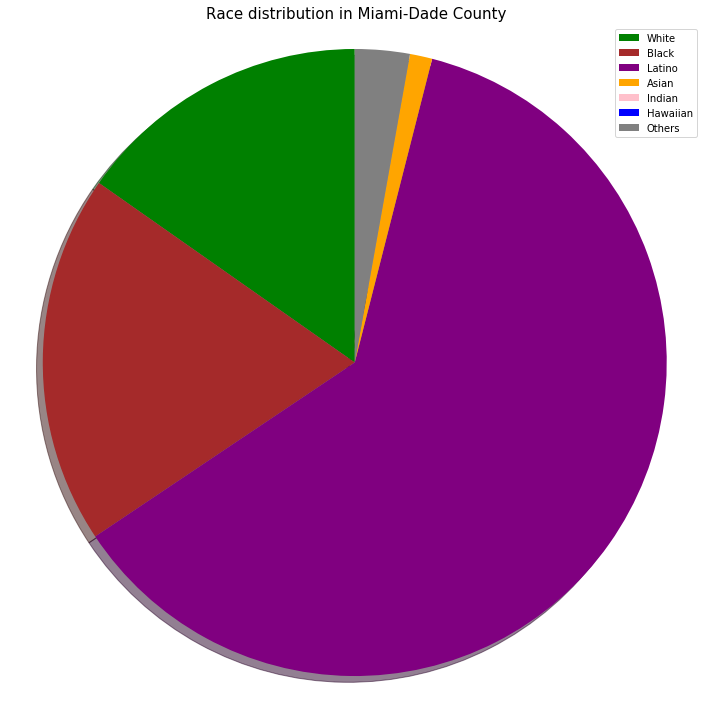

In [112]:
sum_PAHASR=df_PAHASR.sum(numeric_only=True)
plt.figure(figsize=(10, 10), frameon=False)
labels = ['White', 'Black', 'Latino', 'Asian', 'Indian', 'Hawaiian', 'Others']
sizes = [sum_PAHASR['White'], sum_PAHASR['Black'], sum_PAHASR['Latino'], 
         sum_PAHASR['Asian'], sum_PAHASR['Indian'], sum_PAHASR['Hawaiian'], 
         sum_PAHASR['OtherRace']]
colors = ['green', 'brown', 'purple', 'orange', 'pink', 'blue', 'gray']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('Race distribution in Miami-Dade County', fontsize= 15)
plt.tight_layout()
plt.savefig("RacePie.png", bbox_inches='tight')
plt.show()

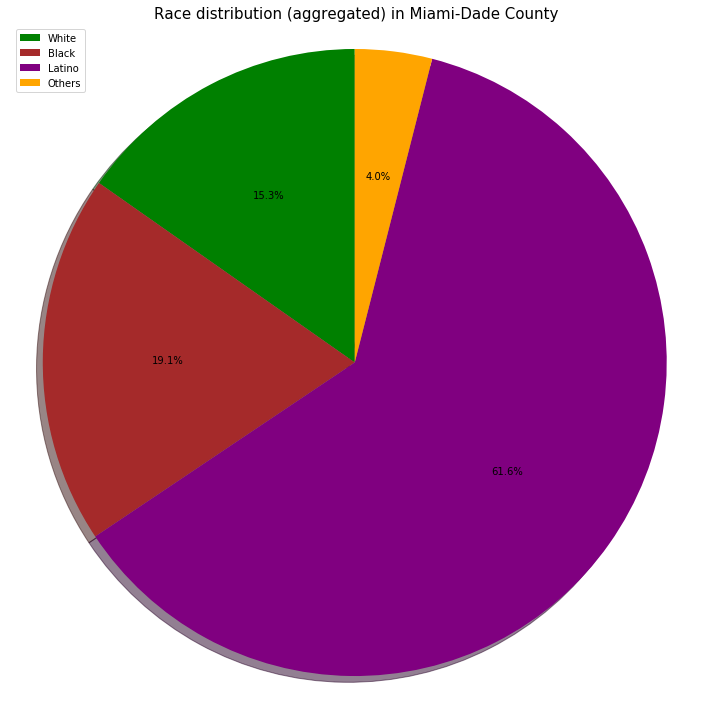

In [113]:
plt.figure(figsize=(10, 10), frameon=False)
labels = ['White', 'Black', 'Latino', 'Others']
sizes = [sum_PAHASR['White'], sum_PAHASR['Black'], sum_PAHASR['Latino'], 
         sum_PAHASR['Asian'] + sum_PAHASR['Indian']+sum_PAHASR['Hawaiian']+sum_PAHASR['OtherRace'] ]
colors = ['green', 'brown', 'purple', 'orange']
patches, texts, junk = plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('Race distribution (aggregated) in Miami-Dade County', fontsize= 15)
plt.tight_layout()
plt.savefig("RacePie2.png", bbox_inches='tight')
plt.show()

In [114]:
df_PAHASR['Others']=df_PAHASR['Population']-df_PAHASR['White']-df_PAHASR['Black']-df_PAHASR['Latino']
df_PAHASR['Others%']=100-df_PAHASR['White%']-df_PAHASR['Black%']-df_PAHASR['Latino%']
df_PAHASR.drop(columns=['Asian','Indian', 'Hawaiian', 'OtherRace',
                         'Asian%','Indian%', 'Hawaiian%', 'OtherRace%'], axis=1, inplace=True)
df_PAHASR=df_PAHASR[['GEOID', 'Community', 'Type', 'geometry', 'Area', 'HousingUnits', 'Population',
                      'M/100F', 'M', 'F', 'AgeType', 'MedianAge',
                      '<18', '18-24', '25-44', '45-64', '>=65', 
                      '<18%', '18-24%', '25-44%', '45-64%', '>=65%', 
                      'White', 'Latino', 'Black', 'Others', 
                      'White%', 'Latino%', 'Black%', 'Others%']]
df_PAHASR.head()

GEOID           Community     Type  \
0  1590000US1208602681            Aventura     City   
1  1590000US1208603275         Bal Harbour  Village   
2  1590000US1208603975  Bay Harbor Islands     Town   
3  1590000US1208606600       Biscayne Park  Village   
4  1590000US1208609000         Brownsville      CDP   

                                            geometry  Area  HousingUnits  \
0  POLYGON ((-80.15060 25.93773, -80.14915 25.942...  3.51         26120   
1  POLYGON ((-80.13102 25.89913, -80.12457 25.899...  0.65          2780   
2  POLYGON ((-80.13920 25.88877, -80.13764 25.891...  0.53          3199   
3  POLYGON ((-80.19100 25.88651, -80.19024 25.886...  0.63          1324   
4  POLYGON ((-80.25737 25.83078, -80.24111 25.831...  2.28          5797   

   Population  M/100F      M      F                          AgeType  \
0       35762    84.6  16326  19436  Middle-Aged Majority (1st type)   
1        2513    79.5   1109   1404                 Elderly Majority   
2        5628    87.0   2618   3010  Middle-Aged Majority (1st type)   
3        3055    94.8   1480   1575  Middle-Aged Majority (1st type)   
4       15313    90.8   7254   8059                Children Majority   

   MedianAge   <18  18-24  25-44  45-64   >=65   <18%  18-24%  25-44%  45-64%  \
0       46.1  5364   1788   9656   8583  10371  15.38    5.48   27.78   24.78   
1       51.0   377    101    528    653    854  15.50    4.20   21.70   26.50   
2       41.0  1182    281   1688   1463   1013  21.72    5.02   30.02   26.12   
3       40.4   642    183    947    886    397  21.50    6.40   31.60   29.60   
4       31.1  4441   1684   3675   3522   1991  29.62   11.62   24.82   23.12   

   >=65%  White  Latino  Black  Others  White%  Latino%  Black%  Others%  
0  26.58  20384   12159   1073    2146    57.9     34.3     3.9      3.9  
1  32.10   1709     704     50      50    68.1     28.0     2.1      1.8  
2  17.12   2758    2476    113     281    49.1     44.8     2.5      3.6  
3  10.90   1314     978    519     244    43.4     32.6    17.6      6.4  
4  10.82    153    3063  11332     765     1.2     20.5    74.7      3.6

In [115]:
df_PAHASR_C=df_PAHASR.query('Type =="City"')
df_PAHASR_T=df_PAHASR.query('Type =="Town"')
df_PAHASR_V=df_PAHASR.query('Type =="Village"')
df_PAHASR_CDP=df_PAHASR.query('Type =="CDP"')

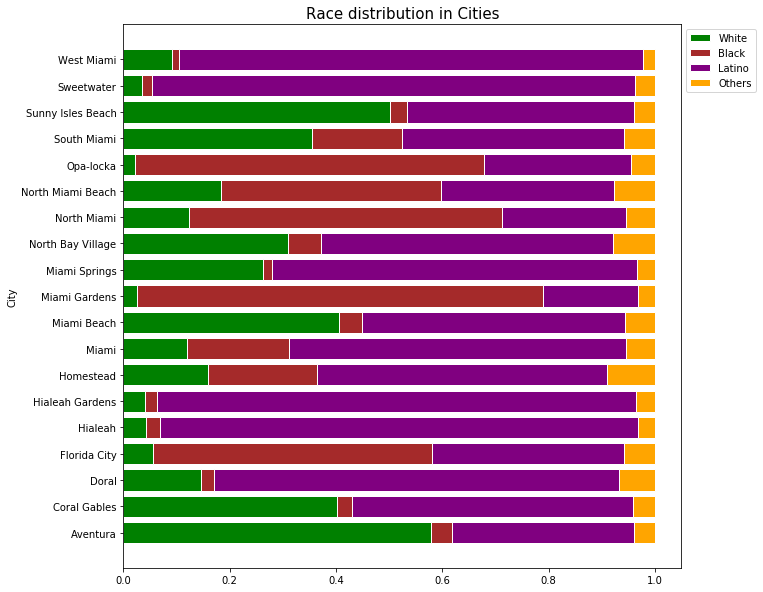

In [116]:
namesC = df_PAHASR_C['Community'].tolist()
namesC=tuple(namesC)
WhiteC = df_PAHASR_C['White%'].tolist()
WhiteC= [i/100 for i in WhiteC] 
BlackC = df_PAHASR_C['Black%'].tolist()
BlackC= [i/100 for i in BlackC]
LatinoC=df_PAHASR_C['Latino%'].tolist()
LatinoC= [i/100 for i in LatinoC]
OtherC= [1-w-b-l for w, b, l in zip(WhiteC, BlackC, LatinoC)]
rC=[]
count=0
for i in namesC:
    count=count+1
    l=count-1
    rC.append(l)
rC
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rC, WhiteC, color='green', edgecolor='white', label="White")
plt.barh(rC, BlackC, left=WhiteC, color='brown', edgecolor='white', label="Black")
plt.barh(rC, LatinoC, left=[w+b for w,b in zip(WhiteC, BlackC)], color='purple', edgecolor='white', label="Latino")
plt.barh(rC, OtherC, left=[w+b+l for w,b,l in zip(WhiteC, BlackC, LatinoC)], color='orange', edgecolor='white', label="Others")
plt.yticks(rC, namesC)
plt.ylabel("City")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Race distribution in Cities', fontsize= 15)
plt.savefig("RaceCity.png", bbox_inches='tight')
plt.show()

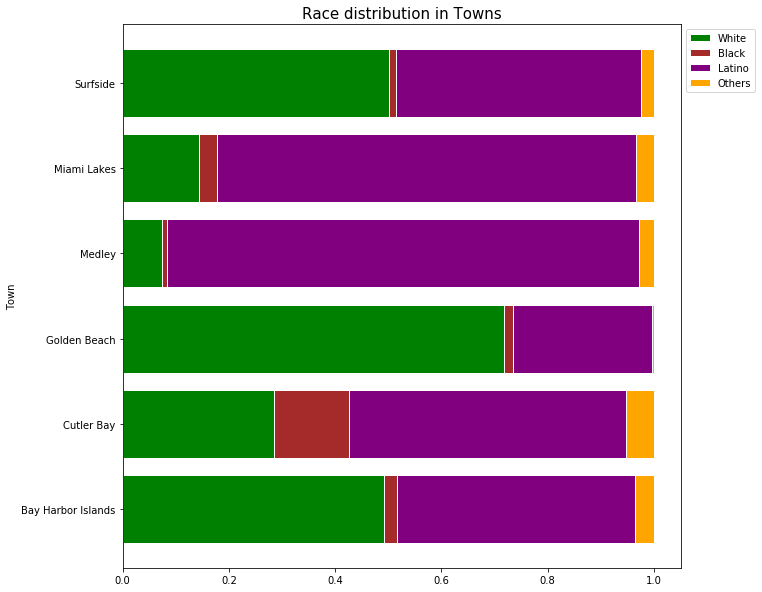

In [117]:
namesT = df_PAHASR_T['Community'].tolist()
namesT=tuple(namesT)
WhiteT = df_PAHASR_T['White%'].tolist()
WhiteT= [i/100 for i in WhiteT] 
BlackT = df_PAHASR_T['Black%'].tolist()
BlackT= [i/100 for i in BlackT]
LatinoT=df_PAHASR_T['Latino%'].tolist()
LatinoT= [i/100 for i in LatinoT]
OtherT= [1-w-b-l for w, b, l in zip(WhiteT, BlackT, LatinoT)]
rT=[]
count=0
for i in namesT:
    count=count+1
    l=count-1
    rT.append(l)
rT
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rT, WhiteT, color='green', edgecolor='white', label="White")
plt.barh(rT, BlackT, left=WhiteT, color='brown', edgecolor='white', label="Black")
plt.barh(rT, LatinoT, left=[w+b for w,b in zip(WhiteT, BlackT)], color='purple', edgecolor='white', label="Latino")
plt.barh(rT, OtherT, left=[w+b+l for w,b,l in zip(WhiteT, BlackT, LatinoT)], color='orange', edgecolor='white', label="Others")
plt.yticks(rT, namesT)
plt.ylabel("Town")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Race distribution in Towns', fontsize= 15)
plt.savefig("RaceTown.png", bbox_inches='tight')
plt.show()

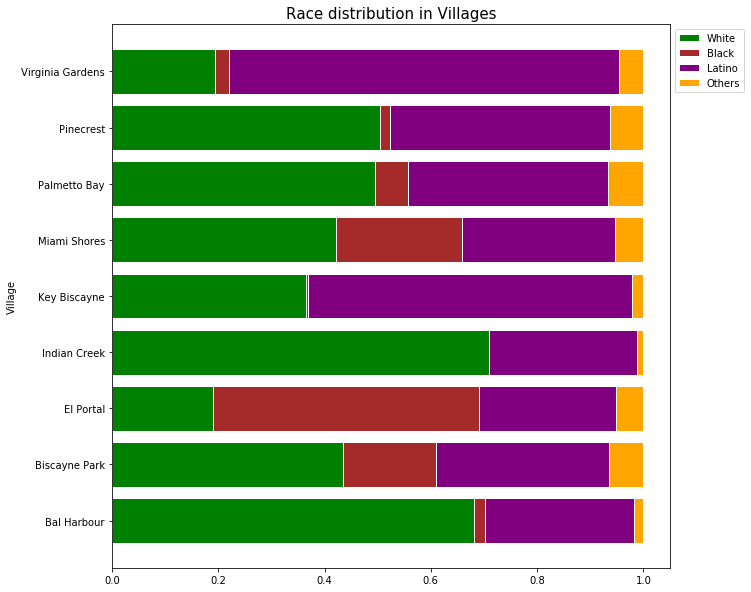

In [118]:
namesV = df_PAHASR_V['Community'].tolist()
namesV=tuple(namesV)
WhiteV = df_PAHASR_V['White%'].tolist()
WhiteV= [i/100 for i in WhiteV] 
BlackV = df_PAHASR_V['Black%'].tolist()
BlackV= [i/100 for i in BlackV]
LatinoV=df_PAHASR_V['Latino%'].tolist()
LatinoV= [i/100 for i in LatinoV]
OtherV= [1-w-b-l for w, b, l in zip(WhiteV, BlackV, LatinoV)]
rV=[]
count=0
for i in namesV:
    count=count+1
    l=count-1
    rV.append(l)
rV
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rV, WhiteV, color='green', edgecolor='white', label="White")
plt.barh(rV, BlackV, left=WhiteV, color='brown', edgecolor='white', label="Black")
plt.barh(rV, LatinoV, left=[w+b for w,b in zip(WhiteV, BlackV)], color='purple', edgecolor='white', label="Latino")
plt.barh(rV, OtherV, left=[w+b+l for w,b,l in zip(WhiteV, BlackV, LatinoV)], color='orange', edgecolor='white', label="Others")
plt.yticks(rV, namesV)
plt.ylabel("Village")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Race distribution in Villages', fontsize= 15)
plt.savefig("RaceVillage.png", bbox_inches='tight')
plt.show()

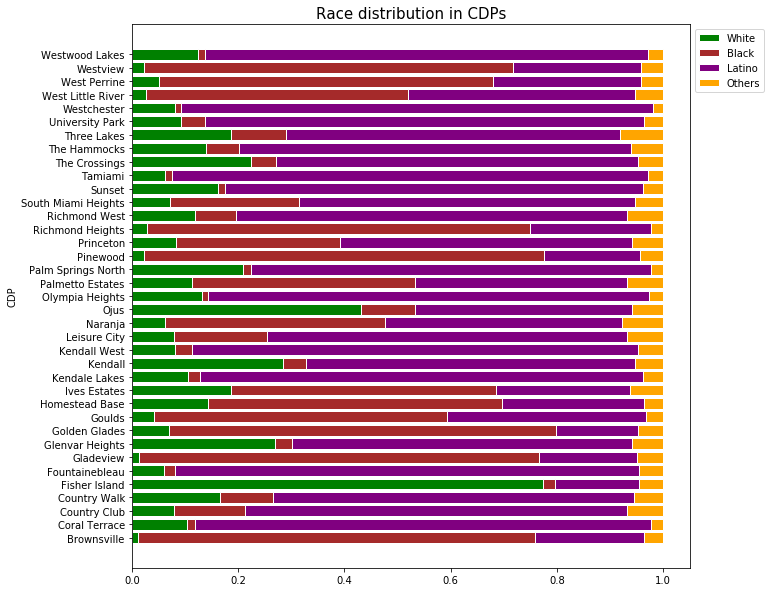

In [119]:
namesCDP = df_PAHASR_CDP['Community'].tolist()
namesCDP=tuple(namesCDP)
WhiteCDP = df_PAHASR_CDP['White%'].tolist()
WhiteCDP= [i/100 for i in WhiteCDP] 
BlackCDP = df_PAHASR_CDP['Black%'].tolist()
BlackCDP= [i/100 for i in BlackCDP]
LatinoCDP=df_PAHASR_CDP['Latino%'].tolist()
LatinoCDP= [i/100 for i in LatinoCDP]
OtherCDP= [1-w-b-l for w, b, l in zip(WhiteCDP, BlackCDP, LatinoCDP)]
rCDP=[]
count=0
for i in namesCDP:
    count=count+1
    l=count-1
    rCDP.append(l)
rCDP
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rCDP, WhiteCDP, color='green', edgecolor='white', label="White")
plt.barh(rCDP, BlackCDP, left=WhiteCDP, color='brown', edgecolor='white', label="Black")
plt.barh(rCDP, LatinoCDP, left=[w+b for w,b in zip(WhiteCDP, BlackCDP)], color='purple', edgecolor='white', label="Latino")
plt.barh(rCDP, OtherCDP, left=[w+b+l for w,b,l in zip(WhiteCDP, BlackCDP, LatinoCDP)], color='orange', edgecolor='white', label="Others")
plt.yticks(rCDP, namesCDP)
plt.ylabel("CDP")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Race distribution in CDPs', fontsize= 15)
plt.savefig("RaceCDP.png", bbox_inches='tight')
plt.show()

### 6.3. Pre-processing Geo-data and Race-data for further Vizualization

In [120]:
list_race=[]
for w, l, b, o in zip(df_PAHASR['White%'], df_PAHASR['Latino%'], 
                      df_PAHASR['Black%'], df_PAHASR['Others%']):
    blo=b+l+o
    wlo=w+l+o
    bwo=b+w+o
    if w>blo:
        i='White Majority (strong)'
    elif b>wlo:
        i='Black Majority (strong)'
    elif l>bwo:
        i='Latino Majority (strong)'    
    elif w>l and w>b and w>o:
        i='White Majority (weak)'
    elif l>w and l>b and l>o:
        i='Latino Majority (weak)'
    elif b>w and b>l and b>o:
        i='Black Majority (weak)'
    elif  o>w and o>l and o>b:
        i='Other Majority (weak)'
    else:
        i='No Race Majority'
    list_race.append(i)
df_PAHASR['RaceType']=list_race
df_PAHASR.head()

GEOID           Community     Type  \
0  1590000US1208602681            Aventura     City   
1  1590000US1208603275         Bal Harbour  Village   
2  1590000US1208603975  Bay Harbor Islands     Town   
3  1590000US1208606600       Biscayne Park  Village   
4  1590000US1208609000         Brownsville      CDP   

                                            geometry  Area  HousingUnits  \
0  POLYGON ((-80.15060 25.93773, -80.14915 25.942...  3.51         26120   
1  POLYGON ((-80.13102 25.89913, -80.12457 25.899...  0.65          2780   
2  POLYGON ((-80.13920 25.88877, -80.13764 25.891...  0.53          3199   
3  POLYGON ((-80.19100 25.88651, -80.19024 25.886...  0.63          1324   
4  POLYGON ((-80.25737 25.83078, -80.24111 25.831...  2.28          5797   

   Population  M/100F      M      F                          AgeType  \
0       35762    84.6  16326  19436  Middle-Aged Majority (1st type)   
1        2513    79.5   1109   1404                 Elderly Majority   
2        5628    87.0   2618   3010  Middle-Aged Majority (1st type)   
3        3055    94.8   1480   1575  Middle-Aged Majority (1st type)   
4       15313    90.8   7254   8059                Children Majority   

   MedianAge   <18  18-24  25-44  45-64   >=65   <18%  18-24%  25-44%  45-64%  \
0       46.1  5364   1788   9656   8583  10371  15.38    5.48   27.78   24.78   
1       51.0   377    101    528    653    854  15.50    4.20   21.70   26.50   
2       41.0  1182    281   1688   1463   1013  21.72    5.02   30.02   26.12   
3       40.4   642    183    947    886    397  21.50    6.40   31.60   29.60   
4       31.1  4441   1684   3675   3522   1991  29.62   11.62   24.82   23.12   

   >=65%  White  Latino  Black  Others  White%  Latino%  Black%  Others%  \
0  26.58  20384   12159   1073    2146    57.9     34.3     3.9      3.9   
1  32.10   1709     704     50      50    68.1     28.0     2.1      1.8   
2  17.12   2758    2476    113     281    49.1     44.8     2.5      3.6   
3  10.90   1314     978    519     244    43.4     32.6    17.6      6.4   
4  10.82    153    3063  11332     765     1.2     20.5    74.7      3.6   

                  RaceType  
0  White Majority (strong)  
1  White Majority (strong)  
2    White Majority (weak)  
3    White Majority (weak)  
4  Black Majority (strong)

In [121]:
df_PAHASR['RaceType'].value_counts()

Latino Majority (strong)    37
Black Majority (strong)     14
White Majority (strong)      8
White Majority (weak)        5
Black Majority (weak)        4
Latino Majority (weak)       3
Name: RaceType, dtype: int64

In [122]:
gd_PAHASR = gpd.GeoDataFrame(df_PAHASR)
gd_PAHASR.head()

GEOID           Community     Type  \
0  1590000US1208602681            Aventura     City   
1  1590000US1208603275         Bal Harbour  Village   
2  1590000US1208603975  Bay Harbor Islands     Town   
3  1590000US1208606600       Biscayne Park  Village   
4  1590000US1208609000         Brownsville      CDP   

                                            geometry  Area  HousingUnits  \
0  POLYGON ((-80.15060 25.93773, -80.14915 25.942...  3.51         26120   
1  POLYGON ((-80.13102 25.89913, -80.12457 25.899...  0.65          2780   
2  POLYGON ((-80.13920 25.88877, -80.13764 25.891...  0.53          3199   
3  POLYGON ((-80.19100 25.88651, -80.19024 25.886...  0.63          1324   
4  POLYGON ((-80.25737 25.83078, -80.24111 25.831...  2.28          5797   

   Population  M/100F      M      F                          AgeType  \
0       35762    84.6  16326  19436  Middle-Aged Majority (1st type)   
1        2513    79.5   1109   1404                 Elderly Majority   
2        5628    87.0   2618   3010  Middle-Aged Majority (1st type)   
3        3055    94.8   1480   1575  Middle-Aged Majority (1st type)   
4       15313    90.8   7254   8059                Children Majority   

   MedianAge   <18  18-24  25-44  45-64   >=65   <18%  18-24%  25-44%  45-64%  \
0       46.1  5364   1788   9656   8583  10371  15.38    5.48   27.78   24.78   
1       51.0   377    101    528    653    854  15.50    4.20   21.70   26.50   
2       41.0  1182    281   1688   1463   1013  21.72    5.02   30.02   26.12   
3       40.4   642    183    947    886    397  21.50    6.40   31.60   29.60   
4       31.1  4441   1684   3675   3522   1991  29.62   11.62   24.82   23.12   

   >=65%  White  Latino  Black  Others  White%  Latino%  Black%  Others%  \
0  26.58  20384   12159   1073    2146    57.9     34.3     3.9      3.9   
1  32.10   1709     704     50      50    68.1     28.0     2.1      1.8   
2  17.12   2758    2476    113     281    49.1     44.8     2.5      3.6   
3  10.90   1314     978    519     244    43.4     32.6    17.6      6.4   
4  10.82    153    3063  11332     765     1.2     20.5    74.7      3.6   

                  RaceType  
0  White Majority (strong)  
1  White Majority (strong)  
2    White Majority (weak)  
3    White Majority (weak)  
4  Black Majority (strong)

In [123]:
gd_PAHASR.crs= 'epsg:3857'
gd2_PAHASR=gd_PAHASR.to_crs('epsg:3857')

In [124]:
gd2_PAHASR['center'] = gd2_PAHASR['geometry'].centroid
gd2_PAHASR_points = gd2_PAHASR.copy()
gd2_PAHASR_points.set_geometry('center', inplace = True)

In [125]:
list_num_com3=[]
count=0
for i in gd2_PAHASR_points['Community']:
    count=count+1
    list_num_com3.append(count)
gd2_PAHASR_points['CommunityN']=list_num_com3
gd2_PAHASR_points.head()

GEOID           Community     Type  \
0  1590000US1208602681            Aventura     City   
1  1590000US1208603275         Bal Harbour  Village   
2  1590000US1208603975  Bay Harbor Islands     Town   
3  1590000US1208606600       Biscayne Park  Village   
4  1590000US1208609000         Brownsville      CDP   

                                            geometry  Area  HousingUnits  \
0  POLYGON ((-80.15060 25.93773, -80.14915 25.942...  3.51         26120   
1  POLYGON ((-80.13102 25.89913, -80.12457 25.899...  0.65          2780   
2  POLYGON ((-80.13920 25.88877, -80.13764 25.891...  0.53          3199   
3  POLYGON ((-80.19100 25.88651, -80.19024 25.886...  0.63          1324   
4  POLYGON ((-80.25737 25.83078, -80.24111 25.831...  2.28          5797   

   Population  M/100F      M      F                          AgeType  \
0       35762    84.6  16326  19436  Middle-Aged Majority (1st type)   
1        2513    79.5   1109   1404                 Elderly Majority   
2        5628    87.0   2618   3010  Middle-Aged Majority (1st type)   
3        3055    94.8   1480   1575  Middle-Aged Majority (1st type)   
4       15313    90.8   7254   8059                Children Majority   

   MedianAge   <18  18-24  25-44  45-64   >=65   <18%  18-24%  25-44%  45-64%  \
0       46.1  5364   1788   9656   8583  10371  15.38    5.48   27.78   24.78   
1       51.0   377    101    528    653    854  15.50    4.20   21.70   26.50   
2       41.0  1182    281   1688   1463   1013  21.72    5.02   30.02   26.12   
3       40.4   642    183    947    886    397  21.50    6.40   31.60   29.60   
4       31.1  4441   1684   3675   3522   1991  29.62   11.62   24.82   23.12   

   >=65%  White  Latino  Black  Others  White%  Latino%  Black%  Others%  \
0  26.58  20384   12159   1073    2146    57.9     34.3     3.9      3.9   
1  32.10   1709     704     50      50    68.1     28.0     2.1      1.8   
2  17.12   2758    2476    113     281    49.1     44.8     2.5      3.6   
3  10.90   1314     978    519     244    43.4     32.6    17.6      6.4   
4  10.82    153    3063  11332     765     1.2     20.5    74.7      3.6   

                  RaceType                      center  CommunityN  
0  White Majority (strong)  POINT (-80.13716 25.95645)           1  
1  White Majority (strong)  POINT (-80.12580 25.89350)           2  
2    White Majority (weak)  POINT (-80.13346 25.88777)           3  
3    White Majority (weak)  POINT (-80.18134 25.88174)           4  
4  Black Majority (strong)  POINT (-80.24170 25.82162)           5

### 6.4. Vizualization of Data on the Map

#### Race Majority

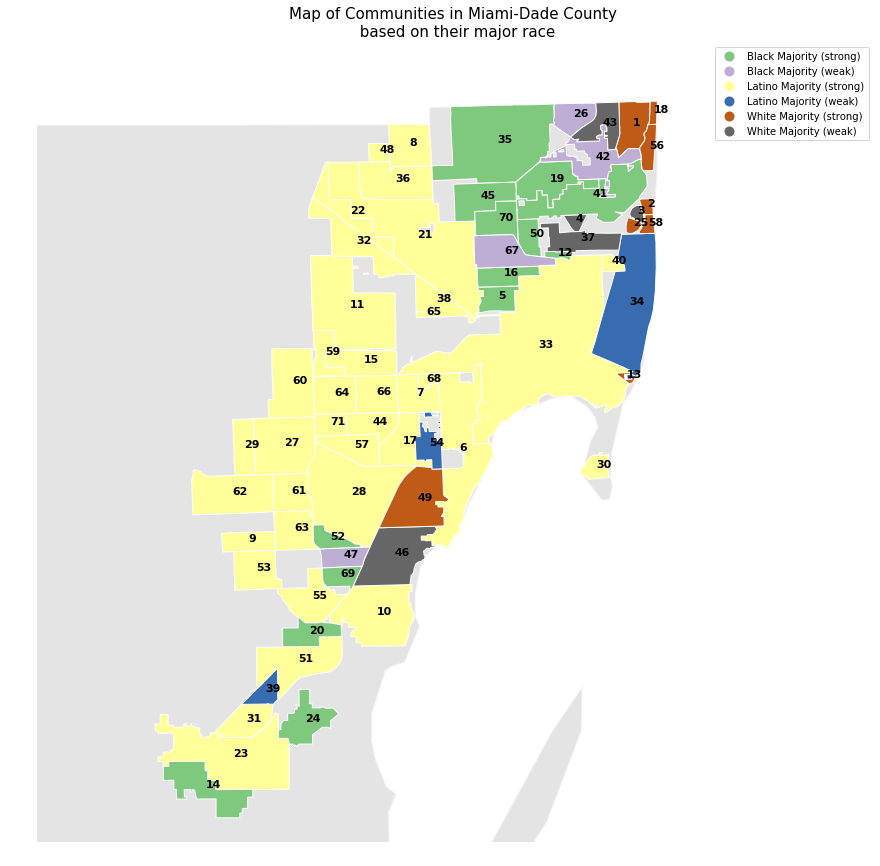

In [126]:
map_TypeRace=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_PAHASR.plot(ax=map_TypeRace, column = 'RaceType', linewidth=1, edgecolor='white', 
              cmap='Accent', legend=True, zorder=2)
for x, y, label in zip(gd2_PAHASR_points.geometry.x,
                       gd2_PAHASR_points.geometry.y, gd2_PAHASR_points['CommunityN']):
    texts_g.append(plt.text(x, y, label, fontsize = 11, fontweight='bold',
                            color='black', zorder=2))
plt.axis('off')
plt.xlim(left=-80.6, right=-79.95)
plt.ylim(bottom=25.4)
plt.title("Map of Communities in Miami-Dade County \n based on their major race", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesRaceType.png", bbox_inches='tight')

#### White


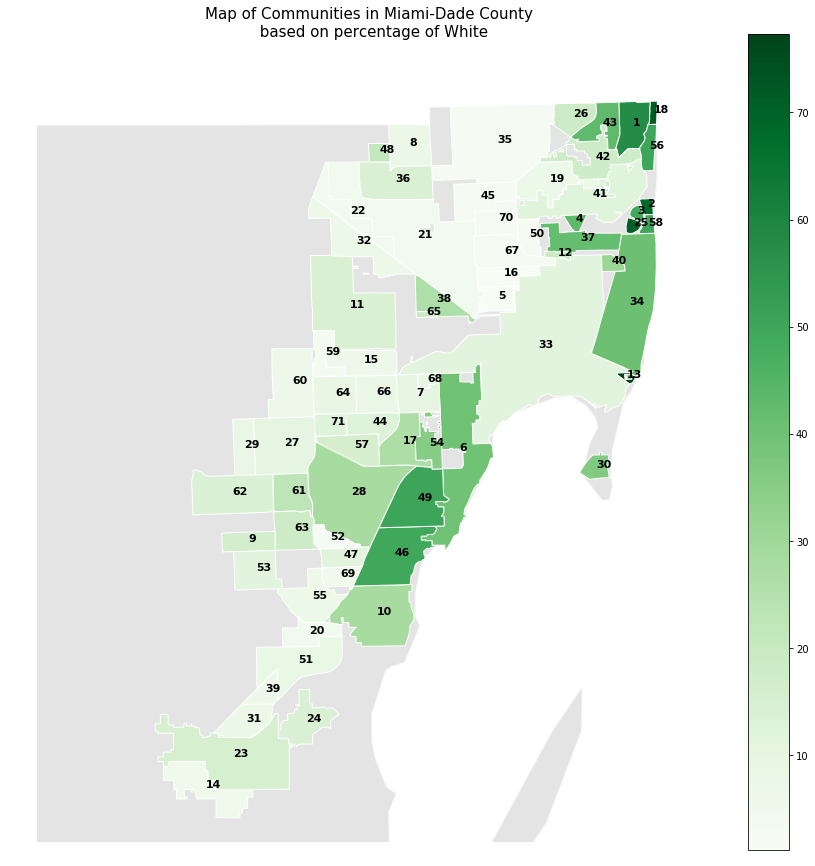

In [127]:
map_White=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_PAHASR.plot(ax=map_White, column = 'White%', linewidth=1, edgecolor='white', 
              cmap='Greens', legend=True, zorder=2)
for x, y, label in zip(gd2_PAHASR_points.geometry.x,
                       gd2_PAHASR_points.geometry.y, gd2_PAHASR_points['CommunityN']):
    texts_g.append(plt.text(x, y, label, fontsize = 11, fontweight='bold',
                            color='black', zorder=2))
plt.axis('off')
plt.xlim(left=-80.6)
plt.ylim(bottom=25.4)
plt.title("Map of Communities in Miami-Dade County \n based on percentage of White", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesWhiteP.png", bbox_inches='tight')

#### Latino


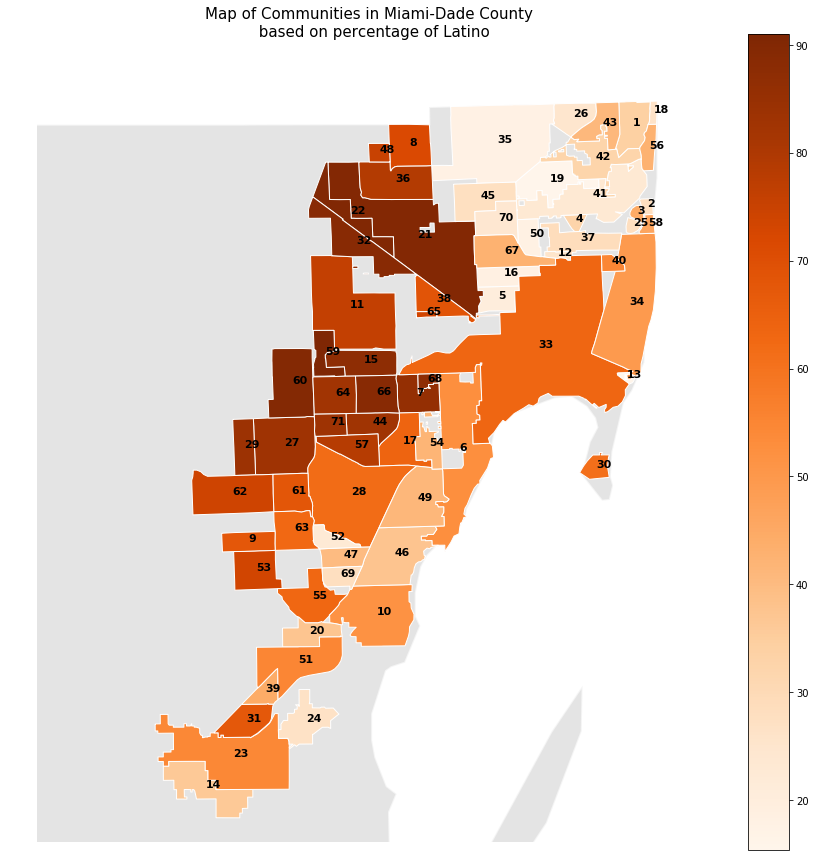

In [128]:
map_Latino=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_PAHASR.plot(ax=map_Latino, column = 'Latino%', linewidth=1, edgecolor='white', 
              cmap='Oranges', legend=True, zorder=2)
for x, y, label in zip(gd2_PAHASR_points.geometry.x,
                       gd2_PAHASR_points.geometry.y, gd2_PAHASR_points['CommunityN']):
    texts_g.append(plt.text(x, y, label, fontsize = 11, fontweight='bold',
                            color='black', zorder=2))
plt.axis('off')
plt.xlim(left=-80.6)
plt.ylim(bottom=25.4)
plt.title("Map of Communities in Miami-Dade County \n based on percentage of Latino", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesLatinoP.png", bbox_inches='tight')

#### Black


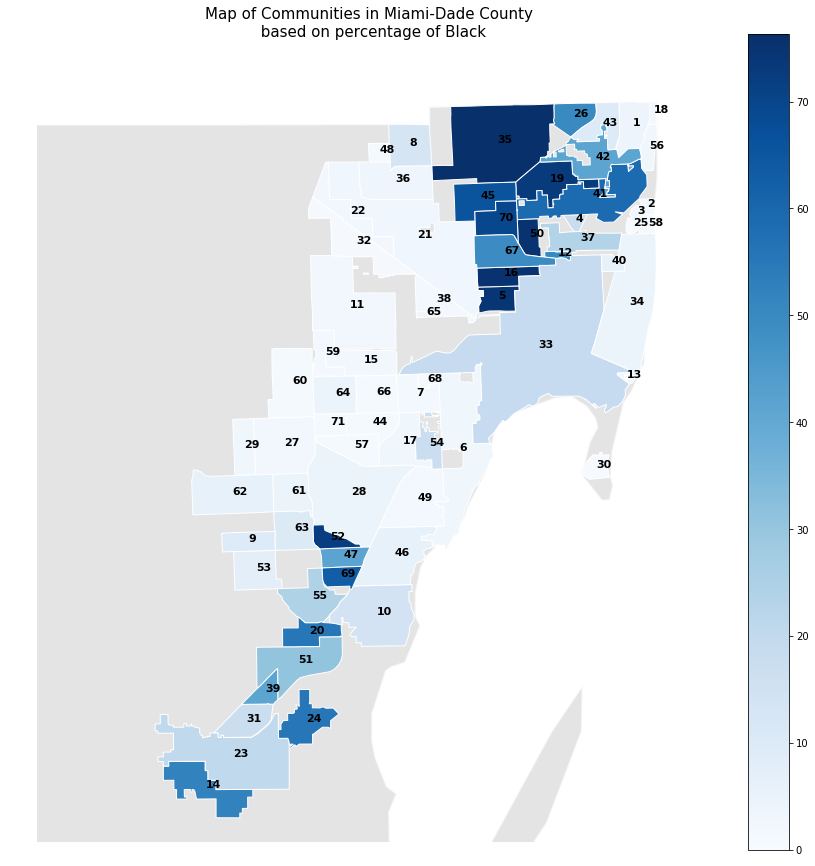

In [129]:
map_Black=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_PAHASR.plot(ax=map_Black, column = 'Black%', linewidth=1, edgecolor='white', 
              cmap='Blues', legend=True, zorder=2)
for x, y, label in zip(gd2_PAHASR_points.geometry.x,
                       gd2_PAHASR_points.geometry.y, gd2_PAHASR_points['CommunityN']):
    texts_g.append(plt.text(x, y, label, fontsize = 11, fontweight='bold',
                            color='black', zorder=2))
plt.axis('off')
plt.xlim(left=-80.6)
plt.ylim(bottom=25.4)
plt.title("Map of Communities in Miami-Dade County \n based on percentage of Black", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesBlackP.png", bbox_inches='tight')

## 7. Type of Community based on demographics (K-means clustering)

In [130]:
df_Dade=df_PAHASR.query('Area<30 & Population<150000')
df_Dade=df_Dade[['Community', 'Type', 'Area', 'Population','HousingUnits',
                 '<18%', '18-24%', '25-44%', '45-64%', '>=65%', 
                 'White%', 'Black%', 'Latino%']]
df_Dade.reset_index(inplace=True, drop=True)
df_Dade=df_Dade.copy()
df_Dade.head()

Community     Type  Area  Population  HousingUnits   <18%  18-24%  \
0            Aventura     City  3.51       35762         26120  15.38    5.48   
1         Bal Harbour  Village  0.65        2513          2780  15.50    4.20   
2  Bay Harbor Islands     Town  0.53        5628          3199  21.72    5.02   
3       Biscayne Park  Village  0.63        3055          1324  21.50    6.40   
4         Brownsville      CDP  2.28       15313          5797  29.62   11.62   

   25-44%  45-64%  >=65%  White%  Black%  Latino%  
0   27.78   24.78  26.58    57.9     3.9     34.3  
1   21.70   26.50  32.10    68.1     2.1     28.0  
2   30.02   26.12  17.12    49.1     2.5     44.8  
3   31.60   29.60  10.90    43.4    17.6     32.6  
4   24.82   23.12  10.82     1.2    74.7     20.5

In [131]:
list_k_com=df_Dade['Community'].tolist()
list_k_typ=df_Dade['Type'].tolist()
df_Dade.drop(columns=['Community', 'Type'], inplace=True)
df_Dade.head()

Area  Population  HousingUnits   <18%  18-24%  25-44%  45-64%  >=65%  \
0  3.51       35762         26120  15.38    5.48   27.78   24.78  26.58   
1  0.65        2513          2780  15.50    4.20   21.70   26.50  32.10   
2  0.53        5628          3199  21.72    5.02   30.02   26.12  17.12   
3  0.63        3055          1324  21.50    6.40   31.60   29.60  10.90   
4  2.28       15313          5797  29.62   11.62   24.82   23.12  10.82   

   White%  Black%  Latino%  
0    57.9     3.9     34.3  
1    68.1     2.1     28.0  
2    49.1     2.5     44.8  
3    43.4    17.6     32.6  
4     1.2    74.7     20.5

In [132]:
Xk = df_Dade.values
Xk = np.nan_to_num(Xk)
Cl = StandardScaler().fit_transform(Xk)

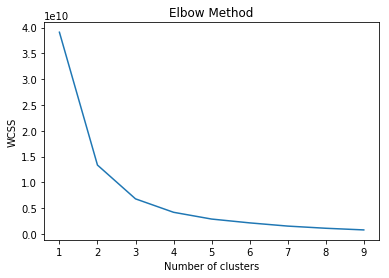

In [133]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=10, n_init=3, random_state=0)
    kmeans.fit(Xk)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [134]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 3)
k_means.fit(Xk)
labels = k_means.labels_
print(labels)

[0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 2 0 1 1 1 2 2 0 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1]


In [135]:
#labels[25]
Krange=[]
Kname=[]
count=0
for i in labels:
    count=count+1
    if count==1:
        j=i
        m='Town'
        Kname.append(m)
        Krange.append(j)
    elif count==2:
        j=i
        n='Village'
        Kname.append(n)
        Krange.append(j)
    elif 2<count<26:
            if i==Krange[0]:
                m='Town'
                Kname.append(m)
            else:
                n='Village'
                Kname.append(n)
    elif count==26:
        j=i
        k='City'
        Kname.append(k)
        Krange.append(j)       
    elif count >26:
        if i==Krange[0]:
                m='Town'
                Kname.append(m)
        elif i==Krange[1]:
                n='Village'
                Kname.append(n)
        elif i==Krange[2]:
            k='City'
            Kname.append(k)
        else:
            z='Error'
            Kname.append(z)
N_labels=collections.Counter(labels)
N_Kname=collections.Counter(Kname)
print('In the beggining we had:', N_labels)
print('In the end we have:', N_Kname)

In the beggining we had: Counter({1: 47, 0: 18, 2: 3})
In the end we have: Counter({'Village': 47, 'Town': 18, 'City': 3})


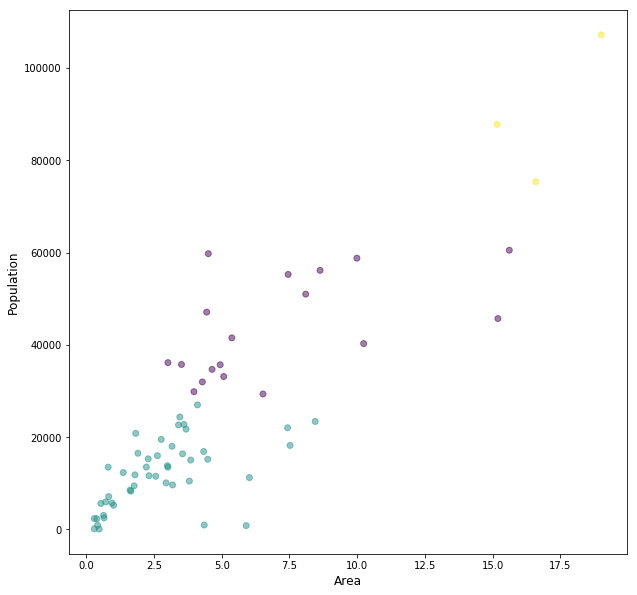

In [136]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=600, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(Xk)
plt.figure(figsize=(10, 10))
plt.scatter(Xk[:,0], Xk[:,1], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.show()

In [137]:
list_k_com2=df_PAHASR['Community'].tolist()
list_k_com3=[i for i in list_k_com2 if i not in list_k_com]
list_k_com3

['Coral Gables', 'Hialeah', 'Miami']

In [138]:
list_k_com.extend(list_k_com3) 
Kname2=['City', 'City', 'City']
Kname.extend(Kname2)

In [139]:
df_cluster=pd.DataFrame(list_k_com, Kname)
df_cluster.reset_index(inplace=True)
df_cluster.columns =['ClusterType', 'Community']
df_cluster.head()

ClusterType           Community
0        Town            Aventura
1     Village         Bal Harbour
2     Village  Bay Harbor Islands
3     Village       Biscayne Park
4     Village         Brownsville

In [140]:
df_PAHASR.columns

Index(['GEOID', 'Community', 'Type', 'geometry', 'Area', 'HousingUnits',
       'Population', 'M/100F', 'M', 'F', 'AgeType', 'MedianAge', '<18',
       '18-24', '25-44', '45-64', '>=65', '<18%', '18-24%', '25-44%', '45-64%',
       '>=65%', 'White', 'Latino', 'Black', 'Others', 'White%', 'Latino%',
       'Black%', 'Others%', 'RaceType'],
      dtype='object')

In [141]:
df_Dade2=df_PAHASR.set_index('Community').join(df_cluster.set_index('Community'))
df_Dade2.reset_index(inplace=True)
df_Dade2=df_Dade2[['GEOID', 'Community', 'geometry', 'Type', 'ClusterType',  'Area', 'HousingUnits',
       'Population', 'M/100F', 'M', 'F', 'AgeType', 'MedianAge', '<18',
       '18-24', '25-44', '45-64', '>=65', '<18%', '18-24%', '25-44%', '45-64%',
       '>=65%', 'RaceType', 'White', 'Latino', 'Black', 'Others', 'White%', 'Latino%',
       'Black%', 'Others%']]
df_Dade2.head()

GEOID           Community  \
0  1590000US1208602681            Aventura   
1  1590000US1208603275         Bal Harbour   
2  1590000US1208603975  Bay Harbor Islands   
3  1590000US1208606600       Biscayne Park   
4  1590000US1208609000         Brownsville   

                                            geometry     Type ClusterType  \
0  POLYGON ((-80.15060 25.93773, -80.14915 25.942...     City        Town   
1  POLYGON ((-80.13102 25.89913, -80.12457 25.899...  Village     Village   
2  POLYGON ((-80.13920 25.88877, -80.13764 25.891...     Town     Village   
3  POLYGON ((-80.19100 25.88651, -80.19024 25.886...  Village     Village   
4  POLYGON ((-80.25737 25.83078, -80.24111 25.831...      CDP     Village   

   Area  HousingUnits  Population  M/100F      M      F  \
0  3.51         26120       35762    84.6  16326  19436   
1  0.65          2780        2513    79.5   1109   1404   
2  0.53          3199        5628    87.0   2618   3010   
3  0.63          1324        3055    94.8   1480   1575   
4  2.28          5797       15313    90.8   7254   8059   

                           AgeType  MedianAge   <18  18-24  25-44  45-64  \
0  Middle-Aged Majority (1st type)       46.1  5364   1788   9656   8583   
1                 Elderly Majority       51.0   377    101    528    653   
2  Middle-Aged Majority (1st type)       41.0  1182    281   1688   1463   
3  Middle-Aged Majority (1st type)       40.4   642    183    947    886   
4                Children Majority       31.1  4441   1684   3675   3522   

    >=65   <18%  18-24%  25-44%  45-64%  >=65%                 RaceType  \
0  10371  15.38    5.48   27.78   24.78  26.58  White Majority (strong)   
1    854  15.50    4.20   21.70   26.50  32.10  White Majority (strong)   
2   1013  21.72    5.02   30.02   26.12  17.12    White Majority (weak)   
3    397  21.50    6.40   31.60   29.60  10.90    White Majority (weak)   
4   1991  29.62   11.62   24.82   23.12  10.82  Black Majority (strong)   

   White  Latino  Black  Others  White%  Latino%  Black%  Others%  
0  20384   12159   1073    2146    57.9     34.3     3.9      3.9  
1   1709     704     50      50    68.1     28.0     2.1      1.8  
2   2758    2476    113     281    49.1     44.8     2.5      3.6  
3   1314     978    519     244    43.4     32.6    17.6      6.4  
4    153    3063  11332     765     1.2     20.5    74.7      3.6

In [142]:
gd_Dade = gpd.GeoDataFrame(df_Dade2)
gd_Dade.head()

GEOID           Community  \
0  1590000US1208602681            Aventura   
1  1590000US1208603275         Bal Harbour   
2  1590000US1208603975  Bay Harbor Islands   
3  1590000US1208606600       Biscayne Park   
4  1590000US1208609000         Brownsville   

                                            geometry     Type ClusterType  \
0  POLYGON ((-80.15060 25.93773, -80.14915 25.942...     City        Town   
1  POLYGON ((-80.13102 25.89913, -80.12457 25.899...  Village     Village   
2  POLYGON ((-80.13920 25.88877, -80.13764 25.891...     Town     Village   
3  POLYGON ((-80.19100 25.88651, -80.19024 25.886...  Village     Village   
4  POLYGON ((-80.25737 25.83078, -80.24111 25.831...      CDP     Village   

   Area  HousingUnits  Population  M/100F      M      F  \
0  3.51         26120       35762    84.6  16326  19436   
1  0.65          2780        2513    79.5   1109   1404   
2  0.53          3199        5628    87.0   2618   3010   
3  0.63          1324        3055    94.8   1480   1575   
4  2.28          5797       15313    90.8   7254   8059   

                           AgeType  MedianAge   <18  18-24  25-44  45-64  \
0  Middle-Aged Majority (1st type)       46.1  5364   1788   9656   8583   
1                 Elderly Majority       51.0   377    101    528    653   
2  Middle-Aged Majority (1st type)       41.0  1182    281   1688   1463   
3  Middle-Aged Majority (1st type)       40.4   642    183    947    886   
4                Children Majority       31.1  4441   1684   3675   3522   

    >=65   <18%  18-24%  25-44%  45-64%  >=65%                 RaceType  \
0  10371  15.38    5.48   27.78   24.78  26.58  White Majority (strong)   
1    854  15.50    4.20   21.70   26.50  32.10  White Majority (strong)   
2   1013  21.72    5.02   30.02   26.12  17.12    White Majority (weak)   
3    397  21.50    6.40   31.60   29.60  10.90    White Majority (weak)   
4   1991  29.62   11.62   24.82   23.12  10.82  Black Majority (strong)   

   White  Latino  Black  Others  White%  Latino%  Black%  Others%  
0  20384   12159   1073    2146    57.9     34.3     3.9      3.9  
1   1709     704     50      50    68.1     28.0     2.1      1.8  
2   2758    2476    113     281    49.1     44.8     2.5      3.6  
3   1314     978    519     244    43.4     32.6    17.6      6.4  
4    153    3063  11332     765     1.2     20.5    74.7      3.6

In [143]:
gd_Dade.crs= 'epsg:3857'
gd2_Dade=gd_Dade.to_crs('epsg:3857')

In [144]:
gd2_Dade['center'] = gd2_Dade['geometry'].centroid
gd2_Dade_points = gd2_Dade.copy()
gd2_Dade_points.set_geometry('center', inplace = True)

In [145]:
list_num_com=[]
count=0
for i in gd2_Dade_points['Community']:
    count=count+1
    list_num_com.append(count)
gd2_Dade_points['CommunityN']=list_num_com
gd2_Dade_points.head()

GEOID           Community  \
0  1590000US1208602681            Aventura   
1  1590000US1208603275         Bal Harbour   
2  1590000US1208603975  Bay Harbor Islands   
3  1590000US1208606600       Biscayne Park   
4  1590000US1208609000         Brownsville   

                                            geometry     Type ClusterType  \
0  POLYGON ((-80.15060 25.93773, -80.14915 25.942...     City        Town   
1  POLYGON ((-80.13102 25.89913, -80.12457 25.899...  Village     Village   
2  POLYGON ((-80.13920 25.88877, -80.13764 25.891...     Town     Village   
3  POLYGON ((-80.19100 25.88651, -80.19024 25.886...  Village     Village   
4  POLYGON ((-80.25737 25.83078, -80.24111 25.831...      CDP     Village   

   Area  HousingUnits  Population  M/100F      M      F  \
0  3.51         26120       35762    84.6  16326  19436   
1  0.65          2780        2513    79.5   1109   1404   
2  0.53          3199        5628    87.0   2618   3010   
3  0.63          1324        3055    94.8   1480   1575   
4  2.28          5797       15313    90.8   7254   8059   

                           AgeType  MedianAge   <18  18-24  25-44  45-64  \
0  Middle-Aged Majority (1st type)       46.1  5364   1788   9656   8583   
1                 Elderly Majority       51.0   377    101    528    653   
2  Middle-Aged Majority (1st type)       41.0  1182    281   1688   1463   
3  Middle-Aged Majority (1st type)       40.4   642    183    947    886   
4                Children Majority       31.1  4441   1684   3675   3522   

    >=65   <18%  18-24%  25-44%  45-64%  >=65%                 RaceType  \
0  10371  15.38    5.48   27.78   24.78  26.58  White Majority (strong)   
1    854  15.50    4.20   21.70   26.50  32.10  White Majority (strong)   
2   1013  21.72    5.02   30.02   26.12  17.12    White Majority (weak)   
3    397  21.50    6.40   31.60   29.60  10.90    White Majority (weak)   
4   1991  29.62   11.62   24.82   23.12  10.82  Black Majority (strong)   

   White  Latino  Black  Others  White%  Latino%  Black%  Others%  \
0  20384   12159   1073    2146    57.9     34.3     3.9      3.9   
1   1709     704     50      50    68.1     28.0     2.1      1.8   
2   2758    2476    113     281    49.1     44.8     2.5      3.6   
3   1314     978    519     244    43.4     32.6    17.6      6.4   
4    153    3063  11332     765     1.2     20.5    74.7      3.6   

                       center  CommunityN  
0  POINT (-80.13716 25.95645)           1  
1  POINT (-80.12580 25.89350)           2  
2  POINT (-80.13346 25.88777)           3  
3  POINT (-80.18134 25.88174)           4  
4  POINT (-80.24170 25.82162)           5

In [146]:
list_col=[]
list_col2=[]
for i in gd2_Dade['Type']:
    if i=='City':
        c='tomato'
    elif i=='Town':
        c='gold'
    elif i == 'Village':
        c='green'
    elif i == 'CDP':
        c='plum'
    list_col.append(c)
for i in gd2_Dade['ClusterType']:
    if i=='City':
        c='tomato'
    elif i=='Town':
        c='gold'
    elif i == 'Village':
        c='green'
    list_col2.append(c)
gd2_Dade['ColorT']=list_col
gd2_Dade['ColorCT']=list_col2

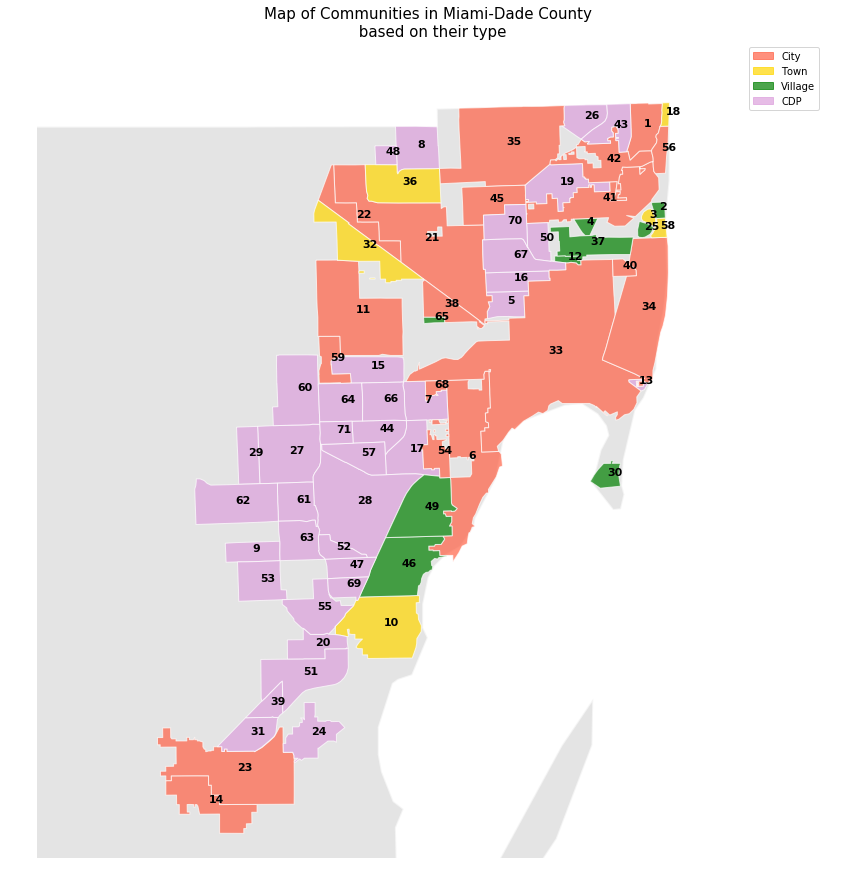

In [147]:
map_Type2=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_Dade.plot(ax=map_Type2, linewidth=1, edgecolor='white', alpha=0.7,
              color=gd2_Dade['ColorT'], zorder=2)
texts_g = []

for x, y, label in zip(gd2_Dade_points.geometry.x,
                       gd2_Dade_points.geometry.y, gd2_Dade_points['CommunityN']):
    texts_g.append(plt.text(x, y, label, fontsize = 11, fontweight='bold',
                            color='black', zorder=3))
plt.axis('off')
plt.xlim(left=-80.6, right=-80)
plt.ylim(bottom=25.4)
plt.xlim(right=-80)
city_patch = mpatches.Patch(color='tomato', alpha= 0.7, label='City')
town_patch = mpatches.Patch(color='gold', alpha= 0.7, label='Town')
vill_patch = mpatches.Patch(color='green', alpha= 0.7,  label='Village')
CDP_patch =  mpatches.Patch(color='plum', alpha= 0.7,  label='CDP')
plt.legend(handles=[city_patch, town_patch, vill_patch, CDP_patch])
plt.title("Map of Communities in Miami-Dade County \n based on their type", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesType2.png", bbox_inches='tight')

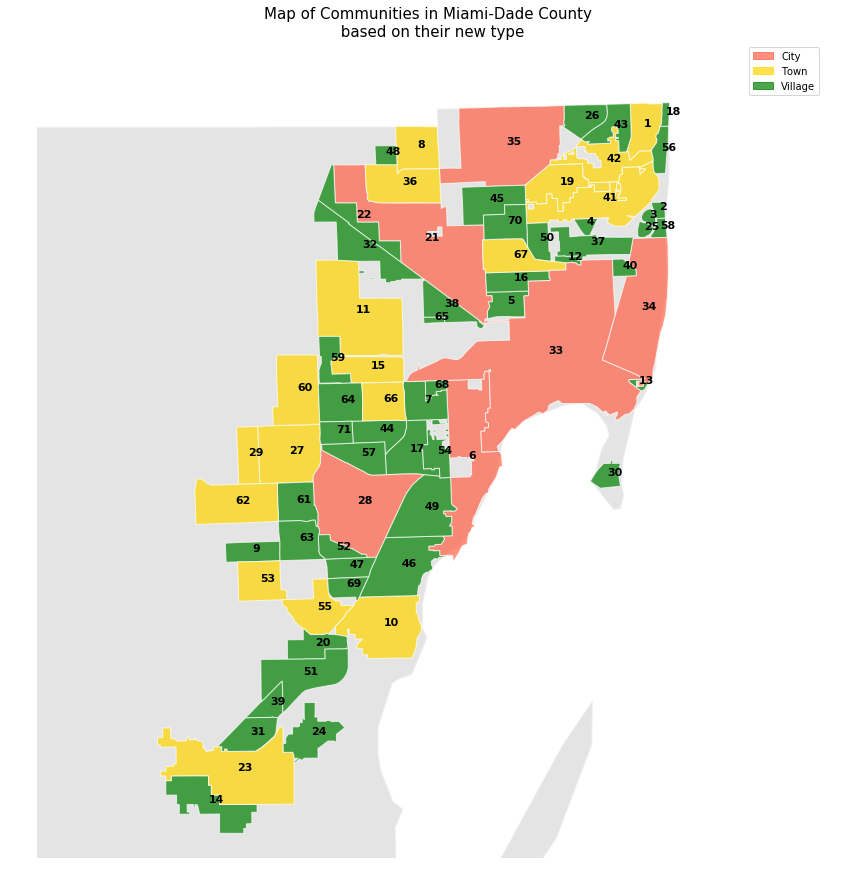

In [148]:
map_TypeCluster=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_Dade.plot(ax=map_TypeCluster, linewidth=1, edgecolor='white', alpha=0.7,
              color=gd2_Dade['ColorCT'], legend=True, zorder=2)
texts_g = []

for x, y, label in zip(gd2_Dade_points.geometry.x,
                       gd2_Dade_points.geometry.y, gd2_Dade_points['CommunityN']):
    texts_g.append(plt.text(x, y, label, fontsize = 11, fontweight='bold',
                            color='black', zorder=3))
plt.axis('off')
plt.xlim(left=-80.6, right=-80)
plt.ylim(bottom=25.4)
city_patch = mpatches.Patch(color='tomato', alpha= 0.7, label='City')
town_patch = mpatches.Patch(color='gold', alpha= 0.7, label='Town')
vill_patch = mpatches.Patch(color='green', alpha= 0.7,  label='Village')
plt.legend(handles=[city_patch, town_patch, vill_patch])
plt.title("Map of Communities in Miami-Dade County \n based on their new type", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesTypeCluster.png", bbox_inches='tight')

In [149]:
df_Dade2['ClusterType'].value_counts()

Village    47
Town       18
City        6
Name: ClusterType, dtype: int64

In [150]:
list_CtoC=[]
list_CtoT=[]
list_CtoV=[]
list_TtoC=[]
list_TtoT=[]
list_TtoV=[]
list_VtoC=[]
list_VtoT=[]
list_VtoV=[]
list_CDPtoC=[]
list_CDPtoT=[]
list_CDPtoV=[]
count=0
for i, j, c in zip(df_Dade2['Type'], df_Dade2['ClusterType'], df_Dade2['Community']):
    count=count+1
    if i =='City':
        if j== 'City':
            l= str(count) +' - '+c
            list_CtoC.append(l)
        if j== 'Town':
            l= str(count) +' - '+c
            list_CtoT.append(l)
        if j== 'Village':
            l= str(count) +' - '+c
            list_CtoV.append(l)
    elif i =='Town':
        if j== 'City':
            l= str(count) +' - '+c
            list_TtoC.append(l)
        if j== 'Town':
            l= str(count) +' - '+c
            list_TtoT.append(l) 
        if j== 'Village':
            l= str(count) +' - '+c
            list_TtoV.append(l)
    elif i =='Village':
        if j== 'City':
            l= str(count) +' - '+c
            list_VtoC.append(l)
        if j== 'Town':
            l= str(count) +' - '+c
            list_VtoT.append(l)
        if j== 'Village':
            l= str(count) +' - '+c
            list_VtoV.append(l)
    elif i =='CDP':
        if j== 'City':
            l= str(count) +' - '+c
            list_CDPtoC.append(l)
        if j== 'Town':
            l= str(count) +' - '+c
            list_CDPtoT.append(l)
        if j== 'Village':
            l= str(count) +' - '+c
            list_CDPtoV.append(l)
print('City to City:')
print(list_CtoC)

print('\n City to Town:')
print(list_CtoT)

print('\n City to Village:')
print(list_CtoV)

print('\n Town to City:')
print(list_TtoC)

print('\n Town to Town:')
print(list_TtoT)

print('\n Town to Village:')
print(list_TtoV)

print('\n Village to City:')
print(list_VtoC)

print('\n Village to Town:')
print(list_VtoT)

print('\n Village to Village:')
print(list_VtoV)

print('\n CDP to City:')
print(list_CDPtoC)

print('\n CDP to Town:')
print(list_CDPtoT)

print('\n CDP to Village:')
print(list_CDPtoV)

City to City:
['6 - Coral Gables', '21 - Hialeah', '33 - Miami', '34 - Miami Beach', '35 - Miami Gardens']

 City to Town:
['1 - Aventura', '11 - Doral', '23 - Homestead', '41 - North Miami', '42 - North Miami Beach']

 City to Village:
['14 - Florida City', '22 - Hialeah Gardens', '38 - Miami Springs', '40 - North Bay Village', '45 - Opa-locka', '54 - South Miami', '56 - Sunny Isles Beach', '59 - Sweetwater', '68 - West Miami']

 Town to City:
[]

 Town to Town:
['10 - Cutler Bay', '36 - Miami Lakes']

 Town to Village:
['3 - Bay Harbor Islands', '18 - Golden Beach', '32 - Medley', '58 - Surfside']

 Village to City:
[]

 Village to Town:
[]

 Village to Village:
['2 - Bal Harbour', '4 - Biscayne Park', '12 - El Portal', '25 - Indian Creek', '30 - Key Biscayne', '37 - Miami Shores', '46 - Palmetto Bay', '49 - Pinecrest', '65 - Virginia Gardens']

 CDP to City:
['28 - Kendall']

 CDP to Town:
['8 - Country Club', '15 - Fountainebleau', '19 - Golden Glades', '27 - Kendale Lakes', '29 - 

In [151]:
df_Dade2_C=df_Dade2.query('ClusterType =="City"')
namesCc = df_Dade2_C['Community'].tolist()
df_Dade2_T=df_Dade2.query('ClusterType =="Town"')
namesTc = df_Dade2_T['Community'].tolist()
df_Dade2_V=df_Dade2.query('ClusterType =="Village"')
namesVc = df_Dade2_V['Community'].tolist()

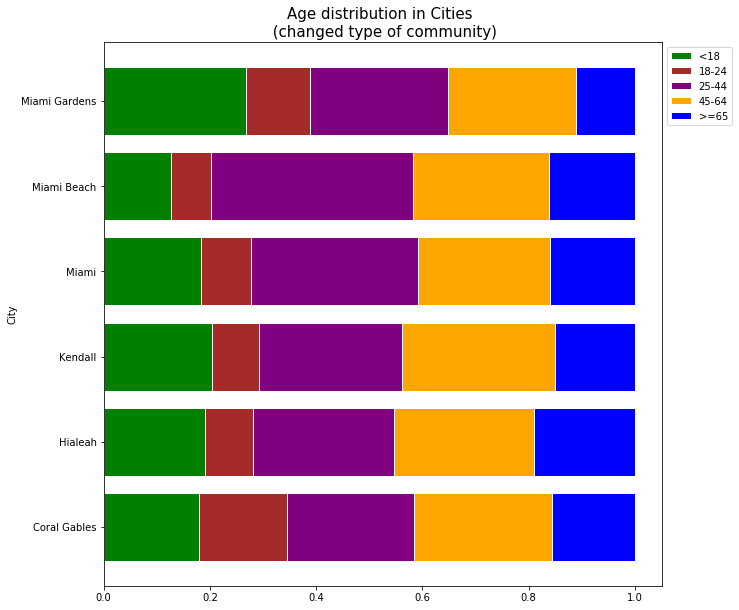

In [152]:
C18c = df_Dade2_C['<18%'].tolist()
C18c= [i/100 for i in C18c] 
C24c = df_Dade2_C['18-24%'].tolist()
C24c= [i/100 for i in C24c]
C44c= df_Dade2_C['25-44%'].tolist()
C44c= [i/100 for i in C44c]
C64c= df_Dade2_C['45-64%'].tolist()
C64c= [i/100 for i in C64c]
C65c= df_Dade2_C['>=65%'].tolist()
C65c= [i/100 for i in C65c]
rCc=[]
count=0
for i in namesCc:
    count=count+1
    l=count-1
    rCc.append(l)
rCc
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rCc, C18c, color='green', edgecolor='white', label="<18")
plt.barh(rCc, C24c, left=C18c, color='brown', edgecolor='white', label="18-24")
plt.barh(rCc, C44c, left=[w+b for w,b in zip(C18c, C24c)], color='purple', edgecolor='white', label="25-44")
plt.barh(rCc, C64c, left=[w+b+l for w,b,l in zip(C18c, C24c, C44c)], color='orange', edgecolor='white', label="45-64")
plt.barh(rCc, C65c, left=[w+b+l+m for w,b,l,m in zip(C18c, C24c, C44c, C64c)], color='blue', edgecolor='white', label=">=65")
plt.yticks(rCc, namesCc)
plt.ylabel("City")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Age distribution in Cities \n (changed type of community)', fontsize= 15)
plt.savefig("AgeCityc.png", bbox_inches='tight')
plt.show()

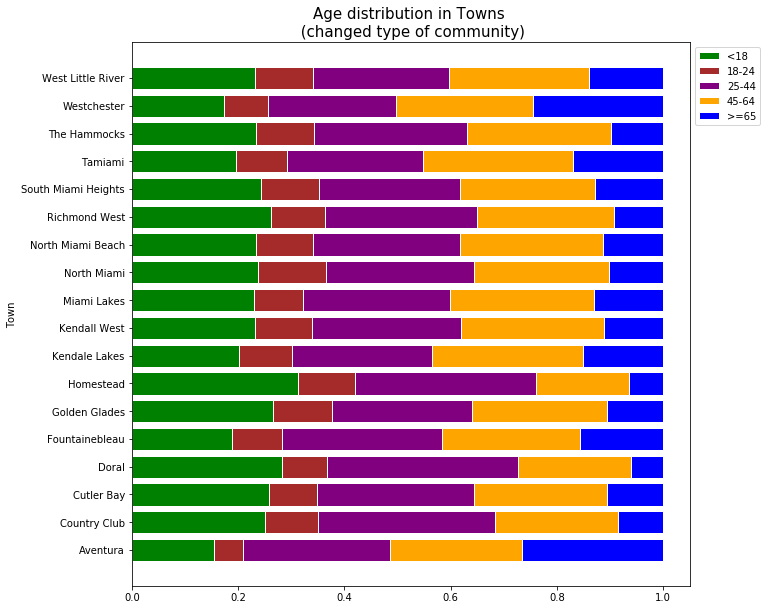

In [153]:
T18c = df_Dade2_T['<18%'].tolist()
T18c= [i/100 for i in T18c] 
T24c = df_Dade2_T['18-24%'].tolist()
T24c= [i/100 for i in T24c]
T44c= df_Dade2_T['25-44%'].tolist()
T44c= [i/100 for i in T44c]
T64c= df_Dade2_T['45-64%'].tolist()
T64c= [i/100 for i in T64c]
T65c= df_Dade2_T['>=65%'].tolist()
T65c= [i/100 for i in T65c]
rTc=[]
count=0
for i in namesTc:
    count=count+1
    l=count-1
    rTc.append(l)
rTc
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rTc, T18c, color='green', edgecolor='white', label="<18")
plt.barh(rTc, T24c, left=T18c, color='brown', edgecolor='white', label="18-24")
plt.barh(rTc, T44c, left=[w+b for w,b in zip(T18c, T24c)], color='purple', edgecolor='white', label="25-44")
plt.barh(rTc, T64c, left=[w+b+l for w,b,l in zip(T18c, T24c, T44c)], color='orange', edgecolor='white', label="45-64")
plt.barh(rTc, T65c, left=[w+b+l+m for w,b,l,m in zip(T18c, T24c, T44c, T64c)], color='blue', edgecolor='white', label=">=65")
plt.yticks(rTc, namesTc)
plt.ylabel("Town")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Age distribution in Towns \n (changed type of community)', fontsize= 15)
plt.savefig("AgeTownc.png", bbox_inches='tight')
plt.show()

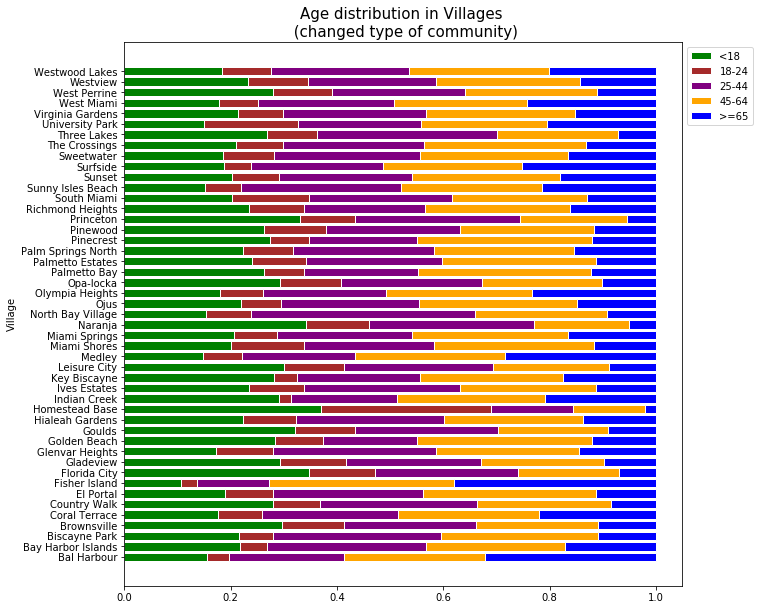

In [154]:
V18c = df_Dade2_V['<18%'].tolist()
V18c= [i/100 for i in V18c] 
V24c = df_Dade2_V['18-24%'].tolist()
V24c= [i/100 for i in V24c]
V44c=df_Dade2_V['25-44%'].tolist()
V44c= [i/100 for i in V44c]
V64c= df_Dade2_V['45-64%'].tolist()
V64c= [i/100 for i in V64c]
V65c=df_Dade2_V['>=65%'].tolist()
V65c= [i/100 for i in V65c]
rVc=[]
count=0
for i in namesVc:
    count=count+1
    l=count-1
    rVc.append(l)
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rVc, V18c, color='green', edgecolor='white', label="<18")
plt.barh(rVc, V24c, left=V18c, color='brown', edgecolor='white', label="18-24")
plt.barh(rVc, V44c, left=[w+b for w,b in zip(V18c, V24c)], color='purple', edgecolor='white', label="25-44")
plt.barh(rVc, V64c, left=[w+b+l for w,b,l in zip(V18c, V24c, V44c)], color='orange', edgecolor='white', label="45-64")
plt.barh(rVc, V65c, left=[w+b+l+m for w,b,l,m in zip(V18c, V24c, V44c, V64c)], color='blue', edgecolor='white', label=">=65")
plt.yticks(rVc, namesVc)
plt.ylabel("Village")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Age distribution in Villages \n (changed type of community)', fontsize= 15)
plt.savefig("AgeVillagec.png", bbox_inches='tight')
plt.show()

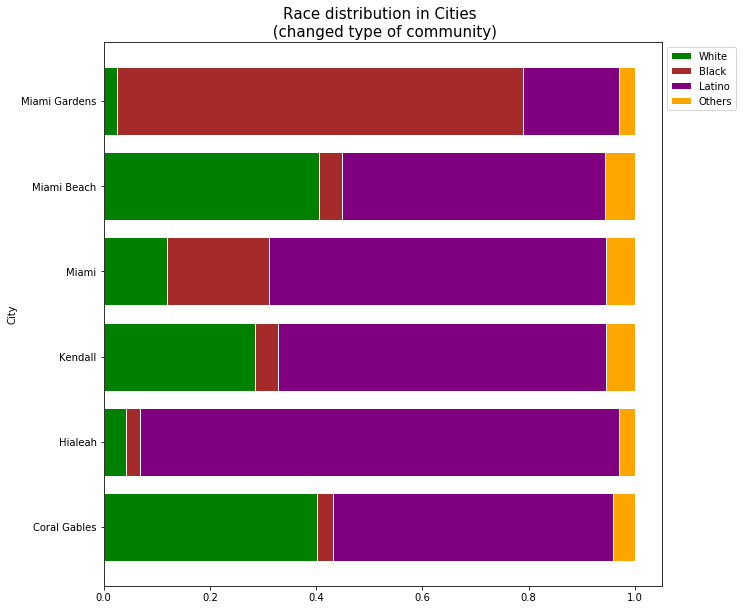

In [155]:
WhiteCc = df_Dade2_C['White%'].tolist()
WhiteCc= [i/100 for i in WhiteCc] 
BlackCc = df_Dade2_C['Black%'].tolist()
BlackCc= [i/100 for i in BlackCc]
LatinoCc=df_Dade2_C['Latino%'].tolist()
LatinoCc= [i/100 for i in LatinoCc]
OtherCc= [1-w-b-l for w, b, l in zip(WhiteCc, BlackCc, LatinoCc)]
rCc=[]
count=0
for i in namesCc:
    count=count+1
    l=count-1
    rCc.append(l)
rCc
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rCc, WhiteCc, color='green', edgecolor='white', label="White")
plt.barh(rCc, BlackCc, left=WhiteCc, color='brown', edgecolor='white', label="Black")
plt.barh(rCc, LatinoCc, left=[w+b for w,b in zip(WhiteCc, BlackCc)], color='purple', edgecolor='white', label="Latino")
plt.barh(rCc, OtherCc, left=[w+b+l for w,b,l in zip(WhiteCc, BlackCc, LatinoCc)], color='orange', edgecolor='white', label="Others")
plt.yticks(rCc, namesCc)
plt.ylabel("City")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Race distribution in Cities \n (changed type of community)', fontsize= 15)
plt.savefig("RaceCityc.png", bbox_inches='tight')
plt.show()

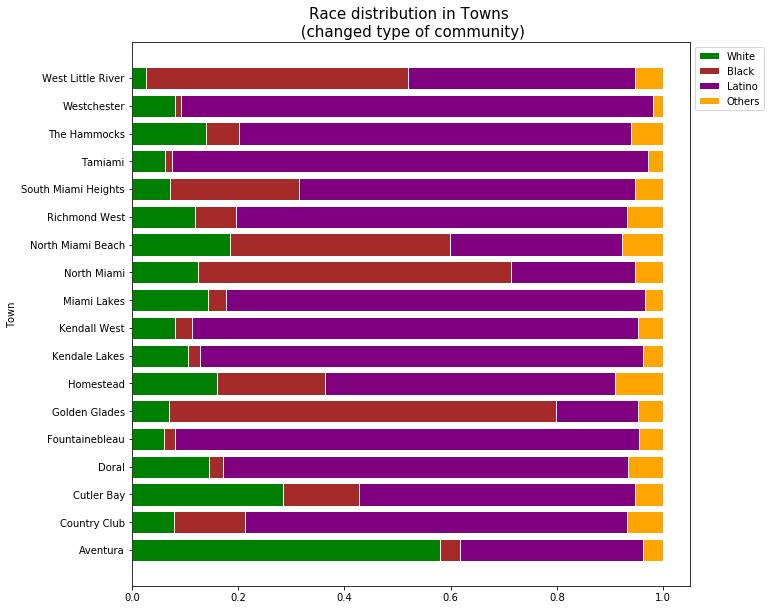

In [156]:
WhiteTc = df_Dade2_T['White%'].tolist()
WhiteTc= [i/100 for i in WhiteTc] 
BlackTc= df_Dade2_T['Black%'].tolist()
BlackTc= [i/100 for i in BlackTc]
LatinoTc=df_Dade2_T['Latino%'].tolist()
LatinoTc= [i/100 for i in LatinoTc]
OtherTc= [1-w-b-l for w, b, l in zip(WhiteTc, BlackTc, LatinoTc)]
rTc=[]
count=0
for i in namesTc:
    count=count+1
    l=count-1
    rTc.append(l)
rTc
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rTc, WhiteTc, color='green', edgecolor='white', label="White")
plt.barh(rTc, BlackTc, left=WhiteTc, color='brown', edgecolor='white', label="Black")
plt.barh(rTc, LatinoTc, left=[w+b for w,b in zip(WhiteTc, BlackTc)], color='purple', edgecolor='white', label="Latino")
plt.barh(rTc, OtherTc, left=[w+b+l for w,b,l in zip(WhiteTc, BlackTc, LatinoTc)], color='orange', edgecolor='white', label="Others")
plt.yticks(rTc, namesTc)
plt.ylabel("Town")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Race distribution in Towns \n (changed type of community)', fontsize= 15)
plt.savefig("RaceTownc.png", bbox_inches='tight')
plt.show()

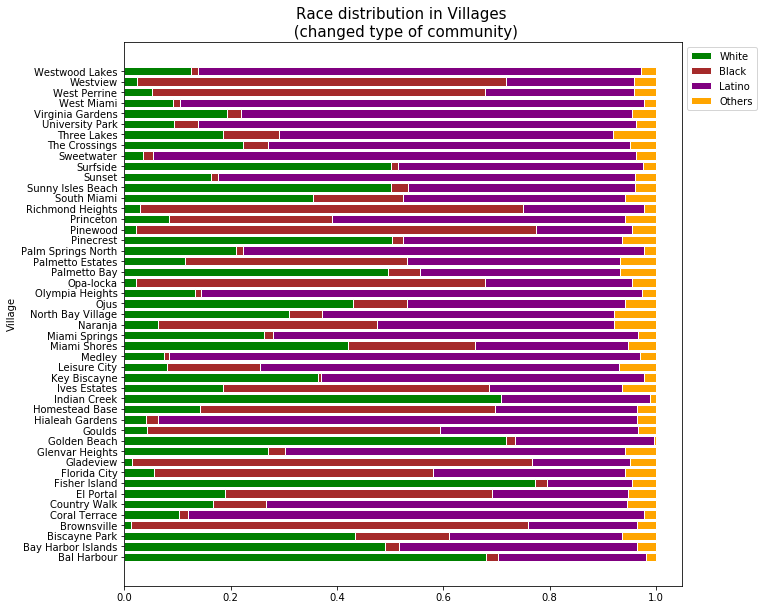

In [157]:
WhiteVc = df_Dade2_V['White%'].tolist()
WhiteVc= [i/100 for i in WhiteVc] 
BlackVc= df_Dade2_V['Black%'].tolist()
BlackVc= [i/100 for i in BlackVc]
LatinoVc=df_Dade2_V['Latino%'].tolist()
LatinoVc= [i/100 for i in LatinoVc]
OtherVc= [1-w-b-l for w, b, l in zip(WhiteVc, BlackVc, LatinoVc)]
rVc=[]
count=0
for i in namesVc:
    count=count+1
    l=count-1
    rVc.append(l)
rVc
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rVc, WhiteVc, color='green', edgecolor='white', label="White")
plt.barh(rVc, BlackVc, left=WhiteVc, color='brown', edgecolor='white', label="Black")
plt.barh(rVc, LatinoVc, left=[w+b for w,b in zip(WhiteVc, BlackVc)], color='purple', edgecolor='white', label="Latino")
plt.barh(rVc, OtherVc, left=[w+b+l for w,b,l in zip(WhiteVc, BlackVc, LatinoVc)], color='orange', edgecolor='white', label="Others")
plt.yticks(rVc, namesVc)
plt.ylabel("Village")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Race distribution in Villages \n (changed type of community)', fontsize= 15)
plt.savefig("RaceVillagec.png", bbox_inches='tight')
plt.show()

## 8. Merging Communities based on geodistace (Hierarchical clustering)

In [158]:
location_dade=[]
address_dade='Miami-Dade County, Florida, USA'
geolocator=Nominatim(user_agent='dade_explorer')
location_dade=geolocator.geocode(address_dade)
latitude_dade=location_dade.latitude
longitude_dade=location_dade.longitude
map_dade=folium.Map(location=[latitude_dade, longitude_dade], zoom_start=9)
map_dade

In [159]:
list_h_com=df_Dade2['Community'].tolist()
list_h_com=[str(i)+', Florida, USA' for i in list_h_com]
geolocator = Nominatim(user_agent="dade-explorer")
list_lat=[]
list_lon=[]
for i in list_h_com:
    location = geolocator.geocode(i)
    lat = location.latitude
    lon = location.longitude
    list_lat.append(lat)
    list_lon.append(lon)
#Cheking the results showed that the location of Bal Harbour difined incorrectly. 
#Let's change it.
list_lat[1]=25.893650
list_lon[1]=-80.126442
df_Dade2.insert(loc=3, column='Latitude', value=list_lat)
df_Dade2.insert(loc=4, column='Longitude', value=list_lon)
df_Dade2.head()

GEOID           Community  \
0  1590000US1208602681            Aventura   
1  1590000US1208603275         Bal Harbour   
2  1590000US1208603975  Bay Harbor Islands   
3  1590000US1208606600       Biscayne Park   
4  1590000US1208609000         Brownsville   

                                            geometry   Latitude  Longitude  \
0  POLYGON ((-80.15060 25.93773, -80.14915 25.942...  25.953257 -80.136646   
1  POLYGON ((-80.13102 25.89913, -80.12457 25.899...  25.893650 -80.126442   
2  POLYGON ((-80.13920 25.88877, -80.13764 25.891...  25.887595 -80.131156   
3  POLYGON ((-80.19100 25.88651, -80.19024 25.886...  25.882595 -80.180603   
4  POLYGON ((-80.25737 25.83078, -80.24111 25.831...  25.821764 -80.241160   

      Type ClusterType  Area  HousingUnits  Population  M/100F      M      F  \
0     City        Town  3.51         26120       35762    84.6  16326  19436   
1  Village     Village  0.65          2780        2513    79.5   1109   1404   
2     Town     Village  0.53          3199        5628    87.0   2618   3010   
3  Village     Village  0.63          1324        3055    94.8   1480   1575   
4      CDP     Village  2.28          5797       15313    90.8   7254   8059   

                           AgeType  MedianAge   <18  18-24  25-44  45-64  \
0  Middle-Aged Majority (1st type)       46.1  5364   1788   9656   8583   
1                 Elderly Majority       51.0   377    101    528    653   
2  Middle-Aged Majority (1st type)       41.0  1182    281   1688   1463   
3  Middle-Aged Majority (1st type)       40.4   642    183    947    886   
4                Children Majority       31.1  4441   1684   3675   3522   

    >=65   <18%  18-24%  25-44%  45-64%  >=65%                 RaceType  \
0  10371  15.38    5.48   27.78   24.78  26.58  White Majority (strong)   
1    854  15.50    4.20   21.70   26.50  32.10  White Majority (strong)   
2   1013  21.72    5.02   30.02   26.12  17.12    White Majority (weak)   
3    397  21.50    6.40   31.60   29.60  10.90    White Majority (weak)   
4   1991  29.62   11.62   24.82   23.12  10.82  Black Majority (strong)   

   White  Latino  Black  Others  White%  Latino%  Black%  Others%  
0  20384   12159   1073    2146    57.9     34.3     3.9      3.9  
1   1709     704     50      50    68.1     28.0     2.1      1.8  
2   2758    2476    113     281    49.1     44.8     2.5      3.6  
3   1314     978    519     244    43.4     32.6    17.6      6.4  
4    153    3063  11332     765     1.2     20.5    74.7      3.6

In [160]:
df_X = df_Dade2[['Community','Latitude', 'Longitude']]
df_X.set_index('Community', inplace=True)
Z = linkage(df_X, method='average', metric='euclidean')      

In [161]:
len(df_Dade2)

71

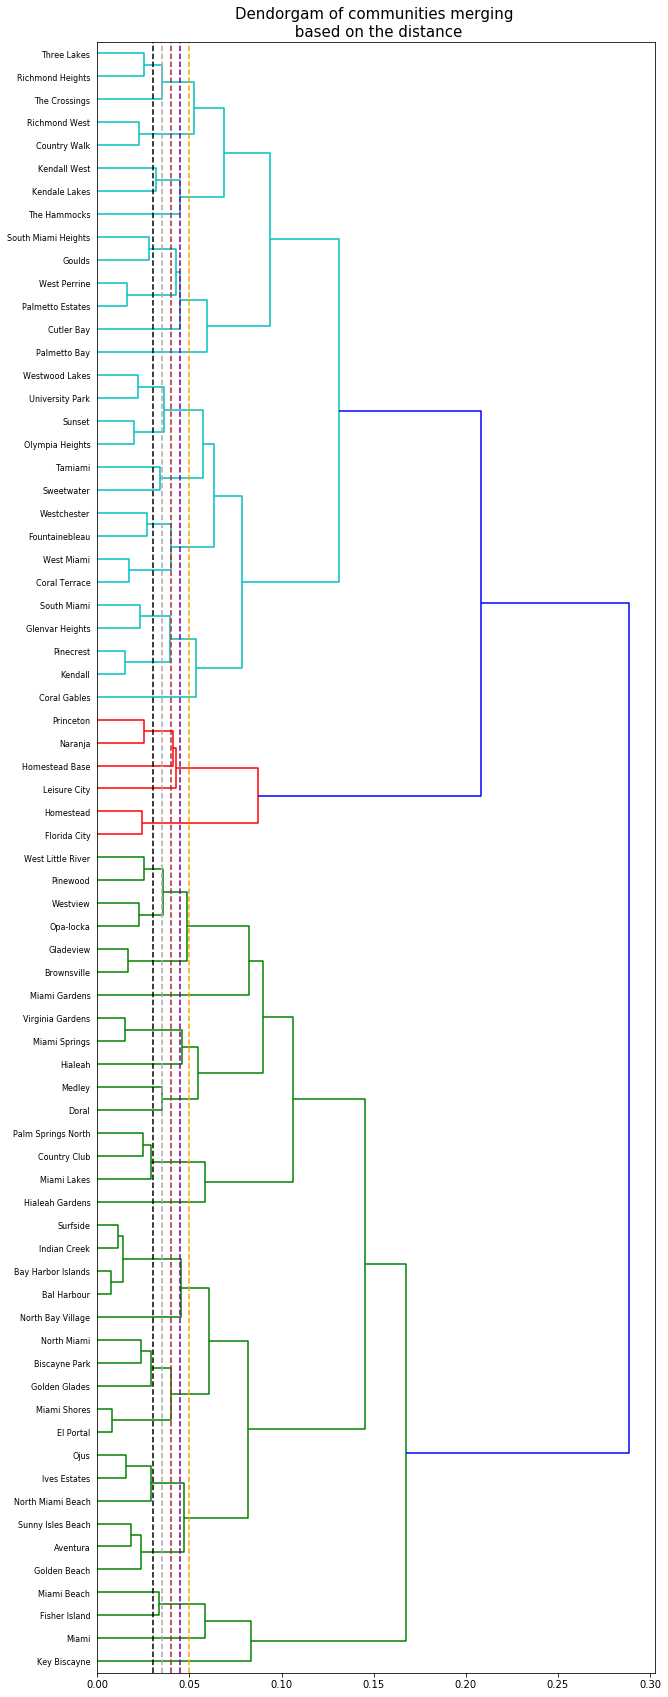

In [162]:
plt.figure(figsize=(10, 30), frameon=False)
dendrogram(Z, leaf_font_size=8, orientation='right', labels=df_X.index, show_contracted=True)
plt.axvline(linestyle='--', x=0.05, color='orange') 
plt.axvline(linestyle='--', x=0.045, color='purple') 
plt.axvline(linestyle='--', x=0.04, color='brown')
plt.axvline(linestyle='--', x=0.035, color='darkgray') 
plt.axvline(linestyle='--', x=0.03, color='black')
plt.title('Dendorgam of communities merging \n based on the distance', fontsize= 15)
plt.savefig("Dendogram.png", bbox_inches='tight')
plt.show()

In [163]:
max_d = 0.045       
cluster_merge = fcluster(Z, max_d, criterion='distance')

In [164]:
cluster_merge

array([ 4,  7,  7,  6, 14, 20, 21,  9, 27, 24, 11,  6,  1, 17, 21, 14, 19,
        4,  6, 24, 13, 10, 17, 18,  7,  5, 26, 19, 26,  3, 18, 11,  2,  1,
       16,  9,  6, 12, 18,  8,  6,  5,  5, 23, 15, 25, 24,  9, 19, 15, 18,
       28, 27, 19, 24,  4, 23,  7, 22, 22, 28, 26, 28, 23, 12, 21, 15, 21,
       24, 15, 23], dtype=int32)

In [165]:
num_clusters = len(set(cluster_merge))
num_clusters

28

In [166]:
df_Dade2['MergeCluster']=cluster_merge
df_Dade2['MergeCluster'].astype(str)
df_Dade2.head()

GEOID           Community  \
0  1590000US1208602681            Aventura   
1  1590000US1208603275         Bal Harbour   
2  1590000US1208603975  Bay Harbor Islands   
3  1590000US1208606600       Biscayne Park   
4  1590000US1208609000         Brownsville   

                                            geometry   Latitude  Longitude  \
0  POLYGON ((-80.15060 25.93773, -80.14915 25.942...  25.953257 -80.136646   
1  POLYGON ((-80.13102 25.89913, -80.12457 25.899...  25.893650 -80.126442   
2  POLYGON ((-80.13920 25.88877, -80.13764 25.891...  25.887595 -80.131156   
3  POLYGON ((-80.19100 25.88651, -80.19024 25.886...  25.882595 -80.180603   
4  POLYGON ((-80.25737 25.83078, -80.24111 25.831...  25.821764 -80.241160   

      Type ClusterType  Area  HousingUnits  Population  M/100F      M      F  \
0     City        Town  3.51         26120       35762    84.6  16326  19436   
1  Village     Village  0.65          2780        2513    79.5   1109   1404   
2     Town     Village  0.53          3199        5628    87.0   2618   3010   
3  Village     Village  0.63          1324        3055    94.8   1480   1575   
4      CDP     Village  2.28          5797       15313    90.8   7254   8059   

                           AgeType  MedianAge   <18  18-24  25-44  45-64  \
0  Middle-Aged Majority (1st type)       46.1  5364   1788   9656   8583   
1                 Elderly Majority       51.0   377    101    528    653   
2  Middle-Aged Majority (1st type)       41.0  1182    281   1688   1463   
3  Middle-Aged Majority (1st type)       40.4   642    183    947    886   
4                Children Majority       31.1  4441   1684   3675   3522   

    >=65   <18%  18-24%  25-44%  45-64%  >=65%                 RaceType  \
0  10371  15.38    5.48   27.78   24.78  26.58  White Majority (strong)   
1    854  15.50    4.20   21.70   26.50  32.10  White Majority (strong)   
2   1013  21.72    5.02   30.02   26.12  17.12    White Majority (weak)   
3    397  21.50    6.40   31.60   29.60  10.90    White Majority (weak)   
4   1991  29.62   11.62   24.82   23.12  10.82  Black Majority (strong)   

   White  Latino  Black  Others  White%  Latino%  Black%  Others%  \
0  20384   12159   1073    2146    57.9     34.3     3.9      3.9   
1   1709     704     50      50    68.1     28.0     2.1      1.8   
2   2758    2476    113     281    49.1     44.8     2.5      3.6   
3   1314     978    519     244    43.4     32.6    17.6      6.4   
4    153    3063  11332     765     1.2     20.5    74.7      3.6   

   MergeCluster  
0             4  
1             7  
2             7  
3             6  
4            14

In [167]:
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude_dade, longitude_dade], zoom_start=10)

x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, com, typ, cluster in zip(df_Dade2['Latitude'], df_Dade2['Longitude'], 
                                        df_Dade2['Community'], df_Dade2['Type'], 
                                         df_Dade2['MergeCluster']):
    label = folium.Popup(str(com) +', ' + str(typ) + '. Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        popup=label,
        radius=3,
        color=rainbow[cluster-1]).add_to(map_clusters)
       
map_clusters

In [168]:
df_Dade2.columns

Index(['GEOID', 'Community', 'geometry', 'Latitude', 'Longitude', 'Type',
       'ClusterType', 'Area', 'HousingUnits', 'Population', 'M/100F', 'M', 'F',
       'AgeType', 'MedianAge', '<18', '18-24', '25-44', '45-64', '>=65',
       '<18%', '18-24%', '25-44%', '45-64%', '>=65%', 'RaceType', 'White',
       'Latino', 'Black', 'Others', 'White%', 'Latino%', 'Black%', 'Others%',
       'MergeCluster'],
      dtype='object')

In [169]:
df_Dade3=df_Dade2[['MergeCluster', 'Community', 'Type', 'ClusterType',
                   'Area', 'HousingUnits', 'Population', 
                   'M/100F', 'M', 'F','<18', '18-24', '25-44', '45-64', '>=65',
                   'White', 'Latino', 'Black', 'Others']]
df_Dade3=df_Dade3.copy()
df_Dade3.head()

MergeCluster           Community     Type ClusterType  Area  HousingUnits  \
0             4            Aventura     City        Town  3.51         26120   
1             7         Bal Harbour  Village     Village  0.65          2780   
2             7  Bay Harbor Islands     Town     Village  0.53          3199   
3             6       Biscayne Park  Village     Village  0.63          1324   
4            14         Brownsville      CDP     Village  2.28          5797   

   Population  M/100F      M      F   <18  18-24  25-44  45-64   >=65  White  \
0       35762    84.6  16326  19436  5364   1788   9656   8583  10371  20384   
1        2513    79.5   1109   1404   377    101    528    653    854   1709   
2        5628    87.0   2618   3010  1182    281   1688   1463   1013   2758   
3        3055    94.8   1480   1575   642    183    947    886    397   1314   
4       15313    90.8   7254   8059  4441   1684   3675   3522   1991    153   

   Latino  Black  Others  
0   12159   1073    2146  
1     704     50      50  
2    2476    113     281  
3     978    519     244  
4    3063  11332     765

In [170]:
list_h_clust=[str(i)+ str(' - ') for i in df_Dade3['MergeCluster']]
list_h_com2=[i+ str(' - ') for i in df_Dade3['Community']]
list_h_typ=[i+ str(' - ') for i in df_Dade3['Type']]
list_h_ctyp=[i+ str(' - ') for i in df_Dade3['ClusterType']]
df_Dade3['MergeCluster']=list_h_clust
df_Dade3['Community']=list_h_com2
df_Dade3['Type']=list_h_typ
df_Dade3['ClusterType']=list_h_ctyp
df_Dade3.head()

MergeCluster              Community        Type ClusterType  Area  \
0         4 -             Aventura -      City -      Town -   3.51   
1         7 -          Bal Harbour -   Village -   Village -   0.65   
2         7 -   Bay Harbor Islands -      Town -   Village -   0.53   
3         6 -        Biscayne Park -   Village -   Village -   0.63   
4        14 -          Brownsville -       CDP -   Village -   2.28   

   HousingUnits  Population  M/100F      M      F   <18  18-24  25-44  45-64  \
0         26120       35762    84.6  16326  19436  5364   1788   9656   8583   
1          2780        2513    79.5   1109   1404   377    101    528    653   
2          3199        5628    87.0   2618   3010  1182    281   1688   1463   
3          1324        3055    94.8   1480   1575   642    183    947    886   
4          5797       15313    90.8   7254   8059  4441   1684   3675   3522   

    >=65  White  Latino  Black  Others  
0  10371  20384   12159   1073    2146  
1    854   1709     704     50      50  
2   1013   2758    2476    113     281  
3    397   1314     978    519     244  
4   1991    153    3063  11332     765

In [171]:
list_merge=[]
list_counting=[]
list_m=[]
count=0
for i in df_Dade3['MergeCluster']:
    count=count+1
    if count == 1:
        m=i
        df=df_Dade3.loc[df_Dade3['MergeCluster'] == m]
        df=df.values.sum(axis=0)
        l=df.tolist()
        list_merge.append(l)
        list_counting.append(count)
        list_m.append(m)
    elif count>1:
        if i in list_m:
            m=i
        else:
            m=i
            df=df_Dade3.loc[df_Dade3['MergeCluster'] == m]
            df=df.values.sum(axis=0)
            l=df.tolist()
            list_merge.append(l)
            list_counting.append(count)
            list_m.append(m)

In [172]:
df_Dade4=pd.DataFrame(list_merge)

In [173]:
df_Dade4.columns=['MergeCluster', 'Community', 'Type', 'ClusterType',
                   'Area', 'HousingUnits', 'Population', 
                   'M/100F', 'M', 'F','<18', '18-24', '25-44', '45-64', '>=65',
                   'White', 'Latino', 'Black', 'Others']
df_Dade4.head()

MergeCluster                                          Community  \
0          4 - 4 - 4 -      Aventura - Golden Beach - Sunny Isles Beach -    
1      7 - 7 - 7 - 7 -   Bal Harbour - Bay Harbor Islands - Indian Cree...   
2  6 - 6 - 6 - 6 - 6 -   Biscayne Park - El Portal - Golden Glades - Mi...   
3            14 - 14 -                          Brownsville - Gladeview -    
4                 20 -                                     Coral Gables -    

                                          Type  \
0                        City - Town - City -    
1           Village - Town - Village - Town -    
2  Village - Village - CDP - Village - City -    
3                                 CDP - CDP -    
4                                      City -    

                                    ClusterType   Area  HousingUnits  \
0                   Town - Village - Village -    5.74         45459   
1      Village - Village - Village - Village -    2.59          9902   
2  Village - Village - Town - Village - Town -   19.87         39223   
3                          Village - Village -    4.84          9938   
4                                       City -   37.32         20266   

   Population  M/100F      M      F    <18  18-24  25-44  45-64   >=65  White  \
0       57513   274.8  26651  30862   8746   3121  16062  14293  15291  31452   
1       13971   365.3   6477   7494   2618    671   3611   3632   3438   7399   
2      107804   471.6  51632  56172  25298  12456  28606  27760  13682  15537   
3       26848   181.8  12750  14098   7786   3068   6559   6175   3260    268   
4       46780    89.7  22029  24751   7953   7485  10759  12163   8420  18712   

   Latino  Black  Others  
0   21147   1707    3207  
1    5845    220     507  
2   22990  62054    7223  
3    5139  19983    1458  
4   24326   1403    2339

In [174]:
list_h_clust2=[i[:2] for i in df_Dade4['MergeCluster']]
list_h_com3=[i[:-3] for i in df_Dade4['Community']]
list_h_typ2=[i[:-3] for i in df_Dade4['Type']]
list_h_ctyp2=[i[:-3] for i in df_Dade4['ClusterType']]
df_Dade4['MergeCluster']=list_h_clust2
df_Dade4['Community']=list_h_com3
df_Dade4['Type']=list_h_typ2
df_Dade4['ClusterType']=list_h_ctyp2
df_Dade4.head()

MergeCluster                                          Community  \
0           4         Aventura - Golden Beach - Sunny Isles Beach   
1           7   Bal Harbour - Bay Harbor Islands - Indian Cree...   
2           6   Biscayne Park - El Portal - Golden Glades - Mi...   
3           14                            Brownsville - Gladeview   
4           20                                       Coral Gables   

                                       Type  \
0                        City - Town - City   
1           Village - Town - Village - Town   
2  Village - Village - CDP - Village - City   
3                                 CDP - CDP   
4                                      City   

                                 ClusterType   Area  HousingUnits  Population  \
0                   Town - Village - Village   5.74         45459       57513   
1      Village - Village - Village - Village   2.59          9902       13971   
2  Village - Village - Town - Village - Town  19.87         39223      107804   
3                          Village - Village   4.84          9938       26848   
4                                       City  37.32         20266       46780   

   M/100F      M      F    <18  18-24  25-44  45-64   >=65  White  Latino  \
0   274.8  26651  30862   8746   3121  16062  14293  15291  31452   21147   
1   365.3   6477   7494   2618    671   3611   3632   3438   7399    5845   
2   471.6  51632  56172  25298  12456  28606  27760  13682  15537   22990   
3   181.8  12750  14098   7786   3068   6559   6175   3260    268    5139   
4    89.7  22029  24751   7953   7485  10759  12163   8420  18712   24326   

   Black  Others  
0   1707    3207  
1    220     507  
2  62054    7223  
3  19983    1458  
4   1403    2339

In [175]:
df_Dade4['MergeCluster']=df_Dade4['MergeCluster'].astype(int)

In [176]:
df_Dade5=df_Dade2[['MergeCluster', 'geometry']].copy()
df_Dade5.head()

MergeCluster                                           geometry
0             4  POLYGON ((-80.15060 25.93773, -80.14915 25.942...
1             7  POLYGON ((-80.13102 25.89913, -80.12457 25.899...
2             7  POLYGON ((-80.13920 25.88877, -80.13764 25.891...
3             6  POLYGON ((-80.19100 25.88651, -80.19024 25.886...
4            14  POLYGON ((-80.25737 25.83078, -80.24111 25.831...

In [177]:
gd_Dade5 = gpd.GeoDataFrame(df_Dade5)
gd_Dade5.head()

MergeCluster                                           geometry
0             4  POLYGON ((-80.15060 25.93773, -80.14915 25.942...
1             7  POLYGON ((-80.13102 25.89913, -80.12457 25.899...
2             7  POLYGON ((-80.13920 25.88877, -80.13764 25.891...
3             6  POLYGON ((-80.19100 25.88651, -80.19024 25.886...
4            14  POLYGON ((-80.25737 25.83078, -80.24111 25.831...

In [178]:
gd_Dade6=gd_Dade5.dissolve(by='MergeCluster')
gd_Dade6.head()

geometry
MergeCluster                                                   
1             POLYGON ((-80.14909 25.76390, -80.14848 25.764...
2             POLYGON ((-80.31861 25.76288, -80.31577 25.768...
3             POLYGON ((-80.17532 25.69169, -80.17235 25.695...
4             POLYGON ((-80.11857 25.95714, -80.11868 25.953...
5             MULTIPOLYGON (((-80.14057 25.92474, -80.13650 ...

In [179]:
gd_Dade6.reset_index(inplace=True)
gd_Dade6['MergeCluster']=gd_Dade6['MergeCluster'].astype(int)

In [180]:
df_Dade4=df_Dade4.set_index('MergeCluster').join(gd_Dade6.set_index('MergeCluster'))
df_Dade4.reset_index(inplace=True)
df_Dade4.head()

MergeCluster                                          Community  \
0             4        Aventura - Golden Beach - Sunny Isles Beach   
1             7  Bal Harbour - Bay Harbor Islands - Indian Cree...   
2             6  Biscayne Park - El Portal - Golden Glades - Mi...   
3            14                            Brownsville - Gladeview   
4            20                                       Coral Gables   

                                       Type  \
0                        City - Town - City   
1           Village - Town - Village - Town   
2  Village - Village - CDP - Village - City   
3                                 CDP - CDP   
4                                      City   

                                 ClusterType   Area  HousingUnits  Population  \
0                   Town - Village - Village   5.74         45459       57513   
1      Village - Village - Village - Village   2.59          9902       13971   
2  Village - Village - Town - Village - Town  19.87         39223      107804   
3                          Village - Village   4.84          9938       26848   
4                                       City  37.32         20266       46780   

   M/100F      M      F    <18  18-24  25-44  45-64   >=65  White  Latino  \
0   274.8  26651  30862   8746   3121  16062  14293  15291  31452   21147   
1   365.3   6477   7494   2618    671   3611   3632   3438   7399    5845   
2   471.6  51632  56172  25298  12456  28606  27760  13682  15537   22990   
3   181.8  12750  14098   7786   3068   6559   6175   3260    268    5139   
4    89.7  22029  24751   7953   7485  10759  12163   8420  18712   24326   

   Black  Others                                           geometry  
0   1707    3207  POLYGON ((-80.11857 25.95714, -80.11868 25.953...  
1    220     507  MULTIPOLYGON (((-80.14225 25.87822, -80.14088 ...  
2  62054    7223  POLYGON ((-80.20709 25.85450, -80.20533 25.854...  
3  19983    1458  POLYGON ((-80.22530 25.83170, -80.22514 25.828...  
4   1403    2339  POLYGON ((-80.30130 25.63736, -80.29698 25.637...

In [181]:
df_Dade4['<18%']=df_Dade4['<18']*100/df_Dade4['Population']
df_Dade4['18-24%']=df_Dade4['18-24']*100/df_Dade4['Population']
df_Dade4['25-44%']=df_Dade4['25-44']*100/df_Dade4['Population']
df_Dade4['45-64%']=df_Dade4['45-64']*100/df_Dade4['Population']
df_Dade4['>=65%']=df_Dade4['>=65']*100/df_Dade4['Population']
df_Dade4['White%']=df_Dade4['White']*100/df_Dade4['Population']
df_Dade4['Latino%']=df_Dade4['Latino']*100/df_Dade4['Population']
df_Dade4['Black%']=df_Dade4['Black']*100/df_Dade4['Population']
df_Dade4['Others']=df_Dade4['Population']-df_Dade4['Black']-df_Dade4['Latino']-df_Dade4['White']
df_Dade4['Others%']=df_Dade4['Others']*100/df_Dade4['Population']

df_Dade4.head()

MergeCluster                                          Community  \
0             4        Aventura - Golden Beach - Sunny Isles Beach   
1             7  Bal Harbour - Bay Harbor Islands - Indian Cree...   
2             6  Biscayne Park - El Portal - Golden Glades - Mi...   
3            14                            Brownsville - Gladeview   
4            20                                       Coral Gables   

                                       Type  \
0                        City - Town - City   
1           Village - Town - Village - Town   
2  Village - Village - CDP - Village - City   
3                                 CDP - CDP   
4                                      City   

                                 ClusterType   Area  HousingUnits  Population  \
0                   Town - Village - Village   5.74         45459       57513   
1      Village - Village - Village - Village   2.59          9902       13971   
2  Village - Village - Town - Village - Town  19.87         39223      107804   
3                          Village - Village   4.84          9938       26848   
4                                       City  37.32         20266       46780   

   M/100F      M      F    <18  18-24  25-44  45-64   >=65  White  Latino  \
0   274.8  26651  30862   8746   3121  16062  14293  15291  31452   21147   
1   365.3   6477   7494   2618    671   3611   3632   3438   7399    5845   
2   471.6  51632  56172  25298  12456  28606  27760  13682  15537   22990   
3   181.8  12750  14098   7786   3068   6559   6175   3260    268    5139   
4    89.7  22029  24751   7953   7485  10759  12163   8420  18712   24326   

   Black  Others                                           geometry  \
0   1707    3207  POLYGON ((-80.11857 25.95714, -80.11868 25.953...   
1    220     507  MULTIPOLYGON (((-80.14225 25.87822, -80.14088 ...   
2  62054    7223  POLYGON ((-80.20709 25.85450, -80.20533 25.854...   
3  19983    1458  POLYGON ((-80.22530 25.83170, -80.22514 25.828...   
4   1403    2339  POLYGON ((-80.30130 25.63736, -80.29698 25.637...   

        <18%     18-24%     25-44%     45-64%      >=65%     White%  \
0  15.206997   5.426599  27.927599  24.851773  26.587032  54.686766   
1  18.738816   4.802806  25.846396  25.996707  24.608117  52.959702   
2  23.466662  11.554302  26.535193  25.750436  12.691551  14.412267   
3  29.000298  11.427294  24.430125  22.999851  12.142431   0.998212   
4  17.000855  16.000428  22.999145  26.000428  17.999145  40.000000   

     Latino%     Black%   Others%  
0  36.769078   2.968025  5.576131  
1  41.836662   1.574690  3.628946  
2  21.325739  57.561872  6.700122  
3  19.141091  74.430125  5.430572  
4  52.000855   2.999145  5.000000

## 9. Type of Aggregated Community based on demographics (K-means clustering)

In [182]:
df_Dade4.query('Area>=35 or Population>=150000')

MergeCluster     Community  Type ClusterType   Area  HousingUnits  \
4             20  Coral Gables  City        City  37.32         20266   
13            13       Hialeah  City        City  22.84         74067   
19             2         Miami  City        City  56.06        183994   

    Population  M/100F       M       F    <18  18-24   25-44  45-64   >=65  \
4        46780    89.7   22029   24751   7953   7485   10759  12163   8420   
13      224669    93.2  108260  116409  42687  20220   58414  58414  44934   
19      399457    99.2  198725  200732  71902  35951  123832  95870  71902   

    White  Latino  Black  Others  \
4   18712   24326   1403    2339   
13   8987  202202   4493    8987   
19  43940  251658  75897   27962   

                                             geometry       <18%     18-24%  \
4   POLYGON ((-80.30130 25.63736, -80.29698 25.637...  17.000855  16.000428   
13  POLYGON ((-80.37374 25.92777, -80.35766 25.927...  18.999951   8.999907   
19  POLYGON ((-80.31861 25.76288, -80.31577 25.768...  17.999935   8.999967   

       25-44%     45-64%      >=65%     White%    Latino%     Black%   Others%  
4   22.999145  26.000428  17.999145  40.000000  52.000855   2.999145  5.000000  
13  26.000027  26.000027  20.000089   4.000107  89.999955   1.999831  4.000107  
19  31.000083  24.000080  17.999935  10.999932  63.000023  19.000043  7.000003

In [183]:
df_CDade=df_Dade4.query('Area<35 & Population<150000')
df_CDade=df_CDade[['Community', 'MergeCluster', 'Area', 'Population','HousingUnits',
                 '<18%', '18-24%', '25-44%', '45-64%', '>=65%', 
                 'White%', 'Black%', 'Latino%']]
df_CDade.reset_index(inplace=True, drop=True)
df_CDade=df_CDade.copy()
df_CDade.head()

Community  MergeCluster   Area  \
0        Aventura - Golden Beach - Sunny Isles Beach             4   5.74   
1  Bal Harbour - Bay Harbor Islands - Indian Cree...             7   2.59   
2  Biscayne Park - El Portal - Golden Glades - Mi...             6  19.87   
3                            Brownsville - Gladeview            14   4.84   
4  Coral Terrace - Fountainebleau - Westchester -...            21  12.63   

   Population  HousingUnits       <18%     18-24%     25-44%     45-64%  \
0       57513         45459  15.206997   5.426599  27.927599  24.851773   
1       13971          9902  18.738816   4.802806  25.846396  25.996707   
2      107804         39223  23.466662  11.554302  26.535193  25.750436   
3       26848          9938  29.000298  11.427294  24.430125  22.999851   
4      119967         43335  17.498979   8.448990  27.241658  25.652888   

       >=65%     White%     Black%    Latino%  
0  26.587032  54.686766   2.968025  36.769078  
1  24.608117  52.959702   1.574690  41.836662  
2  12.691551  14.412267  57.561872  21.325739  
3  12.142431   0.998212  74.430125  19.141091  
4  21.159986   7.460385   1.498745  86.843882

In [184]:
list_k_ccom=df_CDade['Community'].tolist()
list_k_ctyp=df_CDade['MergeCluster'].tolist()
df_CDade.drop(columns=['Community', 'MergeCluster'], inplace=True)
df_CDade.head()

Area  Population  HousingUnits       <18%     18-24%     25-44%  \
0   5.74       57513         45459  15.206997   5.426599  27.927599   
1   2.59       13971          9902  18.738816   4.802806  25.846396   
2  19.87      107804         39223  23.466662  11.554302  26.535193   
3   4.84       26848          9938  29.000298  11.427294  24.430125   
4  12.63      119967         43335  17.498979   8.448990  27.241658   

      45-64%      >=65%     White%     Black%    Latino%  
0  24.851773  26.587032  54.686766   2.968025  36.769078  
1  25.996707  24.608117  52.959702   1.574690  41.836662  
2  25.750436  12.691551  14.412267  57.561872  21.325739  
3  22.999851  12.142431   0.998212  74.430125  19.141091  
4  25.652888  21.159986   7.460385   1.498745  86.843882

In [185]:
Xkc = df_CDade.values
Xkc = np.nan_to_num(Xkc)
Clc = StandardScaler().fit_transform(Xkc)

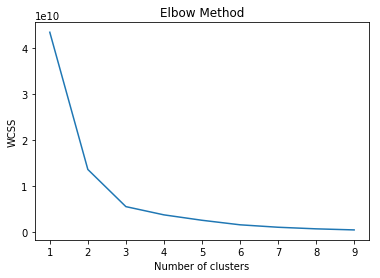

In [186]:
Cwcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=10, n_init=3, random_state=0)
    kmeans.fit(Xkc)
    Cwcss.append(kmeans.inertia_)
plt.plot(range(1, 10), Cwcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [187]:
clusterNumC = 3
k_meansC = KMeans(init = "k-means++", n_clusters = clusterNumC, n_init = 3)
k_means.fit(Xkc)
labelsC = k_means.labels_
print(labelsC)

[0 2 1 2 1 0 0 1 0 1 0 1 2 0 0 1 2 1 2 2 0 0 2 0 0]


In [188]:
#labels[25]
KCrange=[]
KCname=[]
count=0
for i in labelsC:
    count=count+1
    if count==1:
        j=i
        m='Town'
        KCname.append(m)
        KCrange.append(j)
    elif count==2:
        j=i
        n='Village'
        KCname.append(n)
        KCrange.append(j)
    elif count==3:
        j=i
        k='City'
        KCname.append(k)
        KCrange.append(j)      
    elif count >3:
        if i==KCrange[0]:
            m='Town'
            KCname.append(m)
        elif i==KCrange[1]:
            n='Village'
            KCname.append(n)
        elif i==KCrange[2]:
            k='City'
            KCname.append(k)
        else:
            z='Error'
            KCname.append(z)
N_labelsC=collections.Counter(labelsC)
N_KCname=collections.Counter(KCname)
print('In the beggining we had:', N_labelsC)
print('In the end we have:', N_KCname)

In the beggining we had: Counter({0: 11, 2: 7, 1: 7})
In the end we have: Counter({'Town': 11, 'Village': 7, 'City': 7})


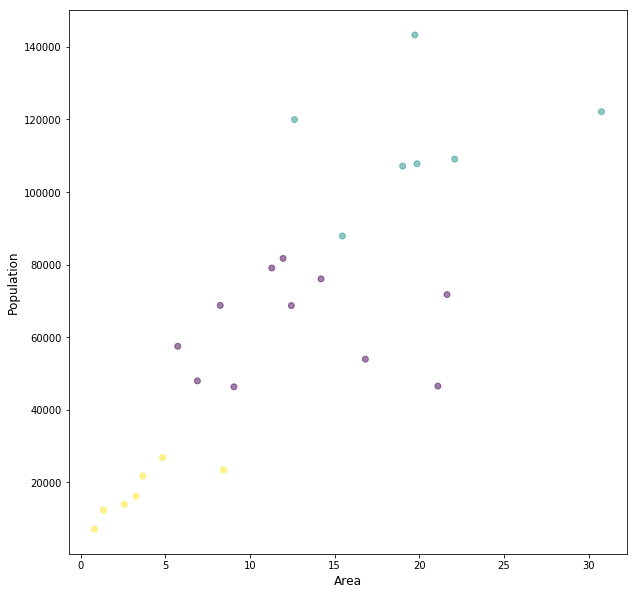

In [189]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=600, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(Xkc)
plt.figure(figsize=(10, 10))
plt.scatter(Xkc[:,0], Xkc[:,1], c=labelsC.astype(np.float), alpha=0.5)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.show()

In [190]:
list_k_ccom2=df_Dade4['Community'].tolist()
list_k_ccom3=[i for i in list_k_ccom2 if i not in list_k_ccom]
list_k_ccom3

['Coral Gables', 'Hialeah', 'Miami']

In [191]:
list_k_ctyp2=df_Dade4['MergeCluster'].tolist()
list_k_ctyp3=[i for i in list_k_ctyp2 if i not in list_k_ctyp]
list_k_ctyp3

[20, 13, 2]

In [192]:
list_k_ccom.extend(list_k_ccom3)
list_k_ctyp.extend(list_k_ctyp3)
KCname2=['City', 'City', 'City']
KCname.extend(Kname2)

In [193]:
df_Ccluster=pd.DataFrame(list_k_ctyp, KCname)
df_Ccluster.reset_index(inplace=True)
df_Ccluster.columns =['MergeClusterType', 'MergeCluster']
df_Ccluster.head()

MergeClusterType  MergeCluster
0             Town             4
1          Village             7
2             City             6
3          Village            14
4             City            21

In [194]:
df_Dade4.columns

Index(['MergeCluster', 'Community', 'Type', 'ClusterType', 'Area',
       'HousingUnits', 'Population', 'M/100F', 'M', 'F', '<18', '18-24',
       '25-44', '45-64', '>=65', 'White', 'Latino', 'Black', 'Others',
       'geometry', '<18%', '18-24%', '25-44%', '45-64%', '>=65%', 'White%',
       'Latino%', 'Black%', 'Others%'],
      dtype='object')

In [195]:
df_CDade2=df_Dade4.set_index('MergeCluster').join(df_Ccluster.set_index('MergeCluster'))
df_CDade2.reset_index(inplace=True)
df_CDade2=df_CDade2[['Community', 'MergeCluster', 'MergeClusterType', 'Type', 'ClusterType',
                    'geometry',
                     'Area', 'HousingUnits', 'Population', 'M', 'F', 
                    '<18', '18-24', '25-44', '45-64', '>=65', 
                    '<18%', '18-24%', '25-44%', '45-64%', '>=65%',
                    'White', 'Latino', 'Black', 'Others',
                    'White%', 'Latino%', 'Black%', 'Others%']]
df_CDade2.head()

Community  MergeCluster  \
0        Aventura - Golden Beach - Sunny Isles Beach             4   
1  Bal Harbour - Bay Harbor Islands - Indian Cree...             7   
2  Biscayne Park - El Portal - Golden Glades - Mi...             6   
3                            Brownsville - Gladeview            14   
4                                       Coral Gables            20   

  MergeClusterType                                      Type  \
0             Town                        City - Town - City   
1          Village           Village - Town - Village - Town   
2             City  Village - Village - CDP - Village - City   
3          Village                                 CDP - CDP   
4             City                                      City   

                                 ClusterType  \
0                   Town - Village - Village   
1      Village - Village - Village - Village   
2  Village - Village - Town - Village - Town   
3                          Village - Village   
4                                       City   

                                            geometry   Area  HousingUnits  \
0  POLYGON ((-80.11857 25.95714, -80.11868 25.953...   5.74         45459   
1  MULTIPOLYGON (((-80.14225 25.87822, -80.14088 ...   2.59          9902   
2  POLYGON ((-80.20709 25.85450, -80.20533 25.854...  19.87         39223   
3  POLYGON ((-80.22530 25.83170, -80.22514 25.828...   4.84          9938   
4  POLYGON ((-80.30130 25.63736, -80.29698 25.637...  37.32         20266   

   Population      M      F    <18  18-24  25-44  45-64   >=65       <18%  \
0       57513  26651  30862   8746   3121  16062  14293  15291  15.206997   
1       13971   6477   7494   2618    671   3611   3632   3438  18.738816   
2      107804  51632  56172  25298  12456  28606  27760  13682  23.466662   
3       26848  12750  14098   7786   3068   6559   6175   3260  29.000298   
4       46780  22029  24751   7953   7485  10759  12163   8420  17.000855   

      18-24%     25-44%     45-64%      >=65%  White  Latino  Black  Others  \
0   5.426599  27.927599  24.851773  26.587032  31452   21147   1707    3207   
1   4.802806  25.846396  25.996707  24.608117   7399    5845    220     507   
2  11.554302  26.535193  25.750436  12.691551  15537   22990  62054    7223   
3  11.427294  24.430125  22.999851  12.142431    268    5139  19983    1458   
4  16.000428  22.999145  26.000428  17.999145  18712   24326   1403    2339   

      White%    Latino%     Black%   Others%  
0  54.686766  36.769078   2.968025  5.576131  
1  52.959702  41.836662   1.574690  3.628946  
2  14.412267  21.325739  57.561872  6.700122  
3   0.998212  19.141091  74.430125  5.430572  
4  40.000000  52.000855   2.999145  5.000000

In [196]:
df_CDade2

Community  MergeCluster  \
0         Aventura - Golden Beach - Sunny Isles Beach             4   
1   Bal Harbour - Bay Harbor Islands - Indian Cree...             7   
2   Biscayne Park - El Portal - Golden Glades - Mi...             6   
3                             Brownsville - Gladeview            14   
4                                        Coral Gables            20   
5   Coral Terrace - Fountainebleau - Westchester -...            21   
6     Country Club - Miami Lakes - Palm Springs North             9   
7                        Country Walk - Richmond West            27   
8   Cutler Bay - Goulds - Palmetto Estates - South...            24   
9                                      Doral - Medley            11   
10                        Fisher Island - Miami Beach             1   
11                           Florida City - Homestead            17   
12  Glenvar Heights - Kendall - Pinecrest - South ...            19   
13                                            Hialeah            13   
14                                    Hialeah Gardens            10   
15  Homestead Base - Leisure City - Naranja - Prin...            18   
16            Ives Estates - North Miami Beach - Ojus             5   
17        Kendale Lakes - Kendall West - The Hammocks            26   
18                                       Key Biscayne             3   
19                                              Miami             2   
20                                      Miami Gardens            16   
21                   Miami Springs - Virginia Gardens            12   
22                                  North Bay Village             8   
23  Olympia Heights - Sunset - University Park - W...            23   
24  Opa-locka - Pinewood - West Little River - Wes...            15   
25                                       Palmetto Bay            25   
26     Richmond Heights - The Crossings - Three Lakes            28   
27                               Sweetwater - Tamiami            22   

   MergeClusterType                                      Type  \
0              Town                        City - Town - City   
1           Village           Village - Town - Village - Town   
2              City  Village - Village - CDP - Village - City   
3           Village                                 CDP - CDP   
4              City                                      City   
5              City                    CDP - CDP - CDP - City   
6              Town                          CDP - Town - CDP   
7              Town                                 CDP - CDP   
8              City              Town - CDP - CDP - CDP - CDP   
9              Town                               City - Town   
10             City                                CDP - City   
11             Town                               City - City   
12             City                CDP - CDP - Village - City   
13             City                                      City   
14          Village                                      City   
15             Town                     CDP - CDP - CDP - CDP   
16             Town                          CDP - City - CDP   
17             City                           CDP - CDP - CDP   
18          Village                                   Village   
19             City                                      City   
20             City                                      City   
21          Village                            City - Village   
22          Village                                      City   
23             Town                     CDP - CDP - CDP - CDP   
24             Town                    City - CDP - CDP - CDP   
25          Village                                   Village   
26             Town                           CDP - CDP - CDP   
27             Town                                City - CDP   

                                  ClusterType  \
0                    Town - Village - Village   


In [197]:
gd_CDade = gpd.GeoDataFrame(df_CDade2)
gd_CDade.head()

Community  MergeCluster  \
0        Aventura - Golden Beach - Sunny Isles Beach             4   
1  Bal Harbour - Bay Harbor Islands - Indian Cree...             7   
2  Biscayne Park - El Portal - Golden Glades - Mi...             6   
3                            Brownsville - Gladeview            14   
4                                       Coral Gables            20   

  MergeClusterType                                      Type  \
0             Town                        City - Town - City   
1          Village           Village - Town - Village - Town   
2             City  Village - Village - CDP - Village - City   
3          Village                                 CDP - CDP   
4             City                                      City   

                                 ClusterType  \
0                   Town - Village - Village   
1      Village - Village - Village - Village   
2  Village - Village - Town - Village - Town   
3                          Village - Village   
4                                       City   

                                            geometry   Area  HousingUnits  \
0  POLYGON ((-80.11857 25.95714, -80.11868 25.953...   5.74         45459   
1  MULTIPOLYGON (((-80.14225 25.87822, -80.14088 ...   2.59          9902   
2  POLYGON ((-80.20709 25.85450, -80.20533 25.854...  19.87         39223   
3  POLYGON ((-80.22530 25.83170, -80.22514 25.828...   4.84          9938   
4  POLYGON ((-80.30130 25.63736, -80.29698 25.637...  37.32         20266   

   Population      M      F    <18  18-24  25-44  45-64   >=65       <18%  \
0       57513  26651  30862   8746   3121  16062  14293  15291  15.206997   
1       13971   6477   7494   2618    671   3611   3632   3438  18.738816   
2      107804  51632  56172  25298  12456  28606  27760  13682  23.466662   
3       26848  12750  14098   7786   3068   6559   6175   3260  29.000298   
4       46780  22029  24751   7953   7485  10759  12163   8420  17.000855   

      18-24%     25-44%     45-64%      >=65%  White  Latino  Black  Others  \
0   5.426599  27.927599  24.851773  26.587032  31452   21147   1707    3207   
1   4.802806  25.846396  25.996707  24.608117   7399    5845    220     507   
2  11.554302  26.535193  25.750436  12.691551  15537   22990  62054    7223   
3  11.427294  24.430125  22.999851  12.142431    268    5139  19983    1458   
4  16.000428  22.999145  26.000428  17.999145  18712   24326   1403    2339   

      White%    Latino%     Black%   Others%  
0  54.686766  36.769078   2.968025  5.576131  
1  52.959702  41.836662   1.574690  3.628946  
2  14.412267  21.325739  57.561872  6.700122  
3   0.998212  19.141091  74.430125  5.430572  
4  40.000000  52.000855   2.999145  5.000000

In [198]:
gd_CDade.crs= 'epsg:3857'
gd2_CDade=gd_CDade.to_crs('epsg:3857')

In [199]:
gd2_CDade['center'] = gd2_CDade['geometry'].centroid
gd2_CDade_points = gd2_CDade.copy()
gd2_CDade_points.set_geometry('center', inplace = True)

In [200]:
list_Ccol=[]
for i in gd2_CDade['MergeClusterType']:
    if i=='City':
        c='tomato'
    elif i=='Town':
        c='gold'
    elif i == 'Village':
        c='green'
    list_Ccol.append(c)
gd2_CDade['ColorMT']=list_Ccol

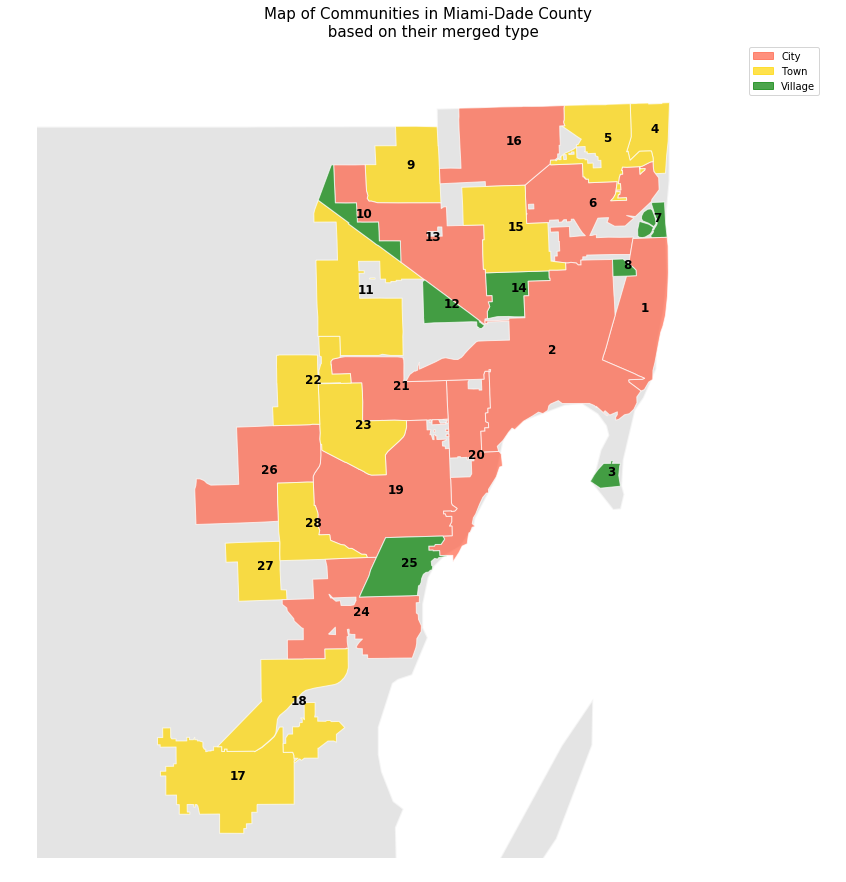

In [201]:
map_MergeType=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_CDade.plot(ax=map_MergeType, linewidth=1, edgecolor='white', alpha=0.7,
              color=gd2_CDade['ColorMT'], zorder=2)
texts_g = []

for x, y, label in zip(gd2_CDade_points.geometry.x,
                       gd2_CDade_points.geometry.y, gd2_CDade_points['MergeCluster']):
    texts_g.append(plt.text(x, y, label, fontsize = 12, fontweight='bold',
                            color='black', zorder=3))
plt.axis('off')
plt.xlim(left=-80.6, right=-80)
plt.ylim(bottom=25.4)
city_patch = mpatches.Patch(color='tomato', alpha= 0.7, label='City')
town_patch = mpatches.Patch(color='gold', alpha= 0.7, label='Town')
vill_patch = mpatches.Patch(color='green', alpha= 0.7,  label='Village')
plt.legend(handles=[city_patch, town_patch, vill_patch])
plt.title("Map of Communities in Miami-Dade County \n based on their merged type", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesMergeType.png", bbox_inches='tight')

In [202]:
list_count_com2=[]
for i, c  in zip(gd_CDade['MergeCluster'], gd_CDade['Community']):
    l= str(i) +' - '+c
    list_count_com2.append(l)
list_count_com2.sort()
print('List of merged communities with numbers on the map:')
print(list_count_com2)

List of merged communities with numbers on the map:
['1 - Fisher Island - Miami Beach', '10 - Hialeah Gardens', '11 - Doral - Medley', '12 - Miami Springs - Virginia Gardens', '13 - Hialeah', '14 - Brownsville - Gladeview', '15 - Opa-locka - Pinewood - West Little River - Westview', '16 - Miami Gardens', '17 - Florida City - Homestead', '18 - Homestead Base - Leisure City - Naranja - Princeton', '19 - Glenvar Heights - Kendall - Pinecrest - South Miami', '2 - Miami', '20 - Coral Gables', '21 - Coral Terrace - Fountainebleau - Westchester - West Miami', '22 - Sweetwater - Tamiami', '23 - Olympia Heights - Sunset - University Park - Westwood Lakes', '24 - Cutler Bay - Goulds - Palmetto Estates - South Miami Heights - West Perrine', '25 - Palmetto Bay', '26 - Kendale Lakes - Kendall West - The Hammocks', '27 - Country Walk - Richmond West', '28 - Richmond Heights - The Crossings - Three Lakes', '3 - Key Biscayne', '4 - Aventura - Golden Beach - Sunny Isles Beach', '5 - Ives Estates - Nort

## 10. Analysis of data in Miami-Dade County Aggregated Communities

### Descriptive statistics

In [203]:
df_CDade2['MergeClusterType'].value_counts()

Town       11
City       10
Village     7
Name: MergeClusterType, dtype: int64

In [204]:
df_CDade2.describe()

MergeCluster       Area   HousingUnits     Population              M  \
count     28.000000  28.000000      28.000000      28.000000      28.000000   
mean      14.500000  15.007857   33008.535714   81728.071429   39311.357143   
std        8.225975  12.037152   34853.979490   78491.545850   38697.737742   
min        1.000000   0.820000    4572.000000    7137.000000    3586.000000   
25%        7.750000   6.610000   13181.750000   41471.500000   19318.500000   
50%       14.500000  12.540000   23900.500000   68740.000000   32568.000000   
75%       21.250000  20.177500   40251.000000  107326.250000   50301.500000   
max       28.000000  56.060000  183994.000000  399457.000000  198725.000000   

                  F           <18         18-24          25-44         45-64  \
count      28.00000     28.000000     28.000000      28.000000     28.000000   
mean    42416.75000  17342.500000   7699.500000   22900.035714  20503.178571   
std     39841.18993  14651.295578   7237.863418   23600.966605  19430.316160   
min      3551.00000   1071.000000    494.000000    2839.000000   1713.000000   
25%     21701.50000   7911.250000   3107.750000    9709.000000   9247.500000   
50%     36082.50000  12922.500000   6778.000000   16974.500000  15823.500000   
75%     56319.25000  23236.000000  10259.000000   28789.500000  26093.000000   
max    200732.00000  71902.000000  35951.000000  123832.000000  95870.000000   

               >=65       <18%     18-24%     25-44%     45-64%      >=65%  \
count     28.000000  28.000000  28.000000  28.000000  28.000000  28.000000   
mean   13282.857143  22.204871   9.126689  27.716906  25.247030  15.704830   
std    14722.941027   5.050201   2.351007   4.463341   2.747633   4.687495   
min      785.000000  11.996223   4.001944  20.999573  17.313990   8.156696   
25%     3800.000000  18.554096   8.001438  25.129621  24.203653  12.580375   
50%    10491.000000  22.272927   9.000076  26.949121  25.454882  14.211210   
75%    15129.000000  26.000133  10.370529  28.405908  26.212335  18.997704   
max    71902.000000  31.528910  16.000428  42.006445  31.999146  26.587032   

              White        Latino         Black        Others     White%  \
count     28.000000      28.00000     28.000000     28.000000  28.000000   
mean   12227.000000   49274.50000  15240.357143   4986.214286  19.634914   
std    11791.124823   57596.92134  23425.872626   5176.037497  16.129307   
min      268.000000    3925.00000      0.000000    494.000000   0.998212   
25%     4166.250000   19500.00000   1282.750000   2222.250000   7.713873   
50%     8588.000000   28833.50000   4165.500000   4142.000000  14.075799   
75%    15771.500000   57026.75000  18457.500000   6294.500000  31.198053   
max    43940.000000  251658.00000  81447.000000  27962.000000  54.686766   

         Latino%     Black%    Others%  
count  28.000000  28.000000  28.000000  
mean   57.032459  17.240889   6.091737  
std    21.893536  23.110646   1.660796  
min    17.999944   0.000000   3.628946  
25%    40.627817   2.000372   4.375182  
50%    56.971132   5.400443   6.088049  
75%    74.383914  25.429946   7.206150  
max    90.001840  76.000075   9.532171

### 10.1. Area, population, housing units

#### Box Plots

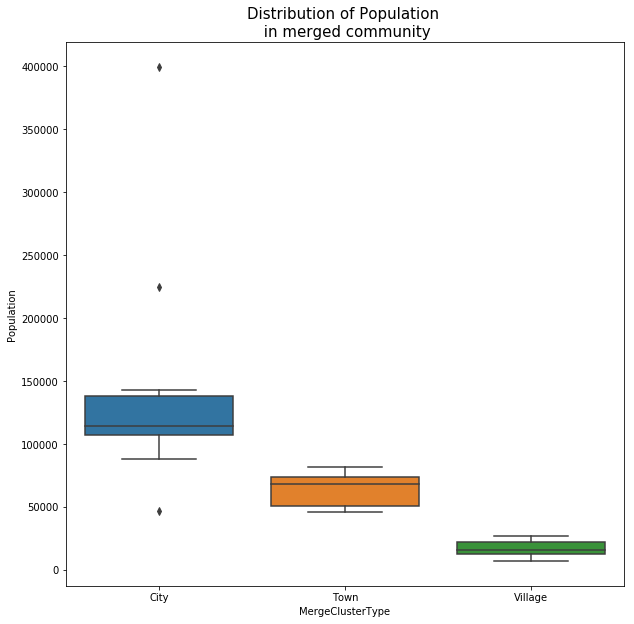

In [205]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='MergeClusterType', y='Population', data = df_CDade2, order=['City', 'Town', 'Village'])
plt.title("Distribution of Population \n in merged community", fontsize= 15)
plt.savefig("BoxPlotPopulationH.png", bbox_inches='tight')

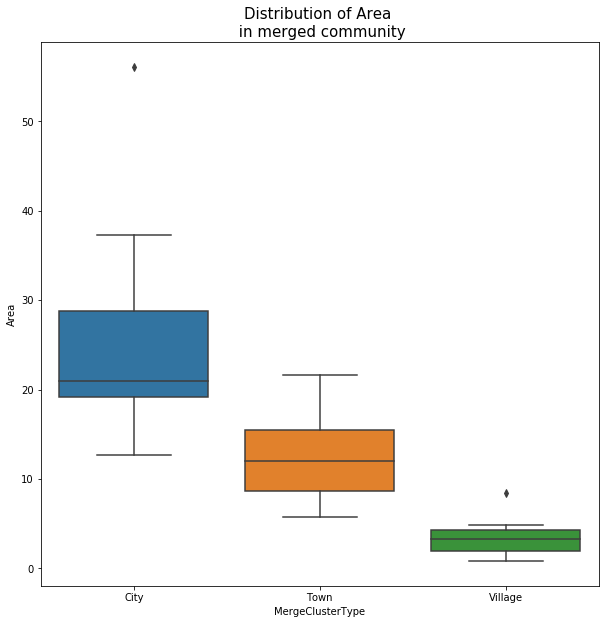

In [206]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='MergeClusterType', y='Area', data = df_CDade2, order=['City', 'Town', 'Village'])
plt.title("Distribution of Area \n in merged community", fontsize= 15)
plt.savefig("BoxPlotAreaH.png", bbox_inches='tight')

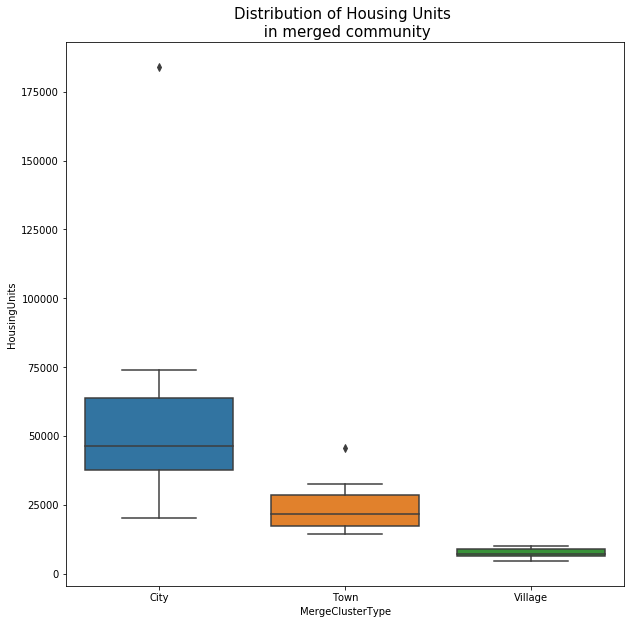

In [207]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='MergeClusterType', y='HousingUnits', data = df_CDade2, order=['City', 'Town', 'Village'])
plt.title("Distribution of Housing Units \n in merged community", fontsize= 15)
plt.savefig("BoxPlotHousingH.png", bbox_inches='tight')

#### Scatter Plots - Area vs Population

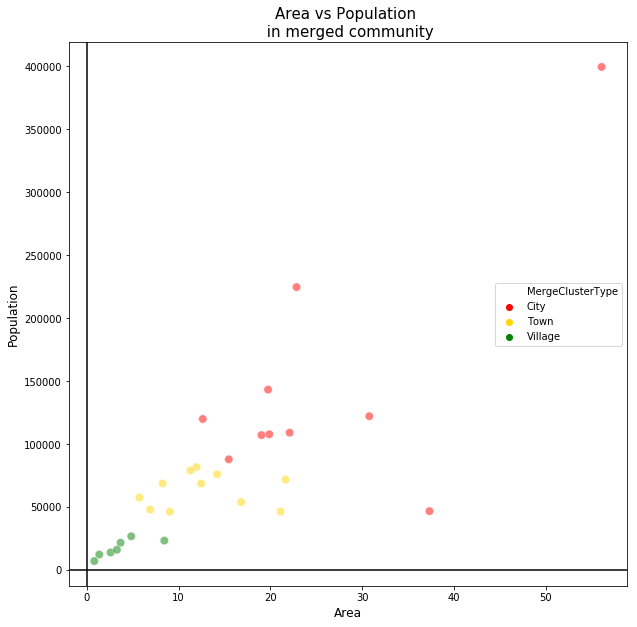

In [208]:
plt.figure(figsize=(10, 10))
AvPH=sns.scatterplot(data=df_CDade2, x="Area", y="Population", hue="MergeClusterType", 
                     hue_order=['City', 'Town', 'Village'], alpha=0.5, 
                      palette=['red', 'gold', 'green'], s=70)
AvPH.axhline(y=0., c='k')
AvPH.axvline(x=0, c='k')
plt.xlabel("Area", fontsize= 12)
plt.ylabel("Population", fontsize= 12)
plt.title("Area vs Population \n in merged community", fontsize= 15)
plt.savefig("ScatAvP_H.png", bbox_inches='tight')

#### Scatter Plots - Area vs Housing Units

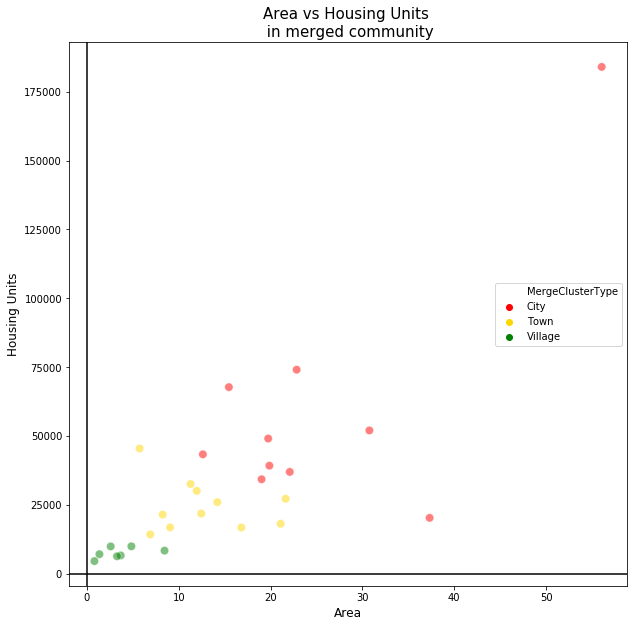

In [209]:
plt.figure(figsize=(10, 10))
AvHH=sns.scatterplot(data=df_CDade2, x="Area", y="HousingUnits", 
                     hue="MergeClusterType", 
                     hue_order=['City', 'Town', 'Village'], alpha=0.5, 
                     palette=['red', 'gold', 'green'], s=70)
AvHH.axhline(y=0., c='k')
AvHH.axvline(x=0, c='k')
plt.xlabel("Area", fontsize= 12)
plt.ylabel("Housing Units", fontsize= 12)
plt.title("Area vs Housing Units \n in merged community", fontsize= 15)
plt.savefig("ScatAvH_H.png", bbox_inches='tight')

#### Pre-processing GEO-data and PAH-data for further Vizualization

In [210]:
gd_CDade2_PAH = gpd.GeoDataFrame(df_CDade2)
gd_CDade2_PAH.crs= 'epsg:3857'
gd2_CDade2_PAH=gd_CDade2_PAH.to_crs('epsg:3857')

In [211]:
gd2_CDade2_PAH['center'] = gd2_CDade2_PAH['geometry'].centroid
gd2_CDade2_PAH_points = gd2_CDade2_PAH.copy()
gd2_CDade2_PAH_points.set_geometry('center', inplace = True)

#### Area

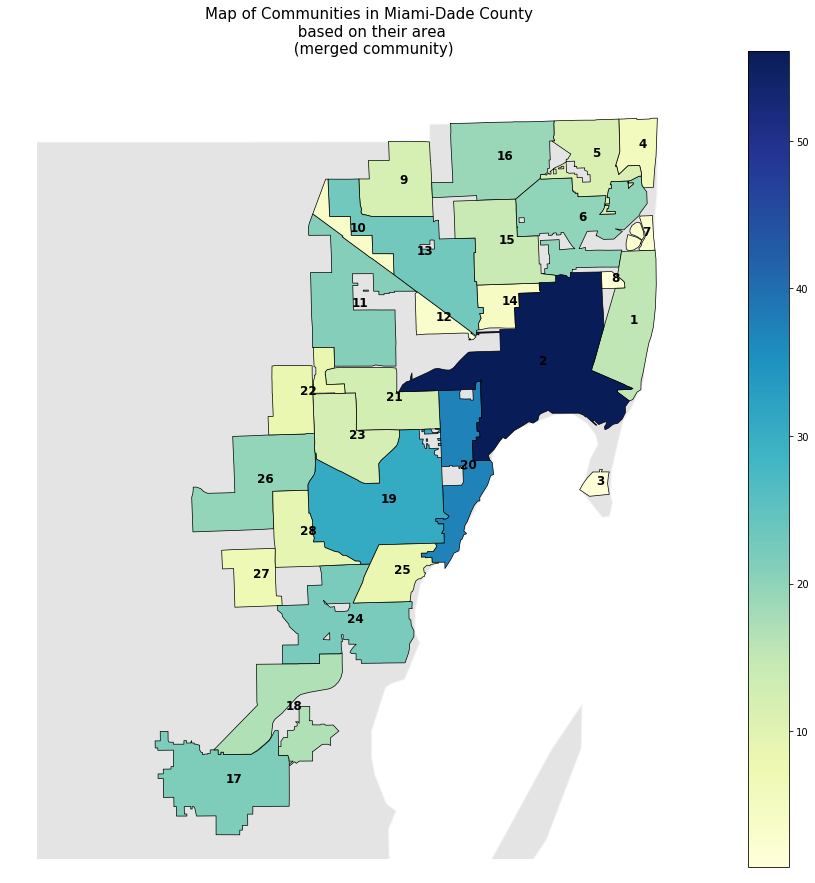

In [212]:
map_AreaH=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_CDade2_PAH.plot(ax=map_AreaH, column = 'Area', linewidth=0.7, edgecolor='black', 
              cmap='YlGnBu', legend=True, zorder=2)
texts_g = []

for x, y, label in zip(gd2_CDade_points.geometry.x,
                       gd2_CDade_points.geometry.y, gd2_CDade_points['MergeCluster']):
    texts_g.append(plt.text(x, y, label, fontsize = 12, fontweight='bold',
                            color='black', zorder=3))
plt.axis('off')
plt.xlim(left=-80.6)
plt.ylim(bottom=25.4)
plt.title("Map of Communities in Miami-Dade County \n based on their area \n (merged community)", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesAreaH.png", bbox_inches='tight')

#### Population

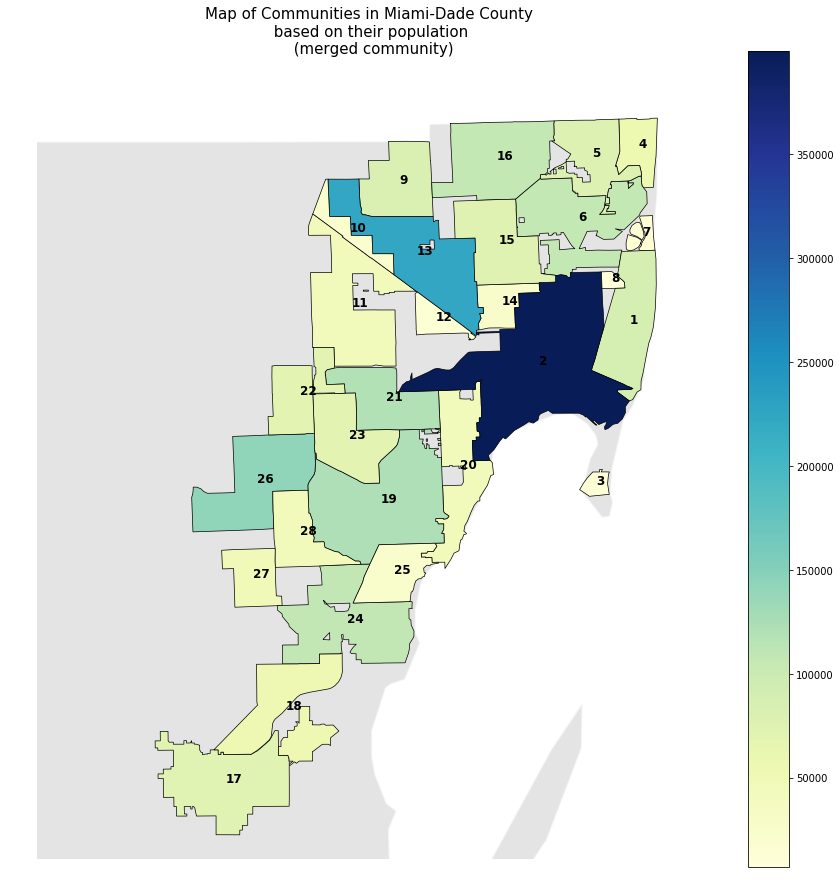

In [213]:
map_PopulationH=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_CDade2_PAH.plot(ax=map_PopulationH, column = 'Population', linewidth=0.7, 
             edgecolor='black', cmap='YlGnBu', legend=True, zorder=2)
texts_g = []

for x, y, label in zip(gd2_CDade_points.geometry.x,
                       gd2_CDade_points.geometry.y, gd2_CDade_points['MergeCluster']):
    texts_g.append(plt.text(x, y, label, fontsize = 12, fontweight='bold',
                            color='black', zorder=3))
plt.axis('off')
plt.xlim(left=-80.6)
plt.ylim(bottom=25.4)
plt.title("Map of Communities in Miami-Dade County \n based on their population \n (merged community)", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesPopulationH.png", bbox_inches='tight')

#### Housing Units

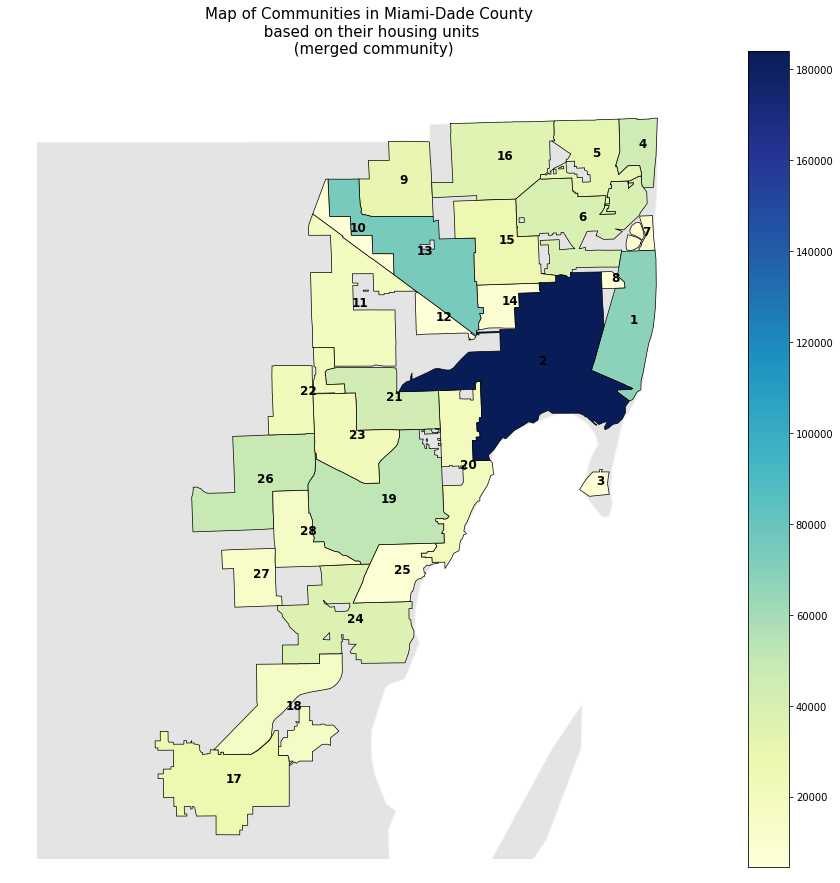

In [214]:
map_HUnitsH=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_CDade2_PAH.plot(ax=map_HUnitsH, column = 'HousingUnits', linewidth=0.7, edgecolor='black', 
              cmap='YlGnBu', legend=True, zorder=2)
texts_g = []

for x, y, label in zip(gd2_CDade_points.geometry.x,
                       gd2_CDade_points.geometry.y, gd2_CDade_points['MergeCluster']):
    texts_g.append(plt.text(x, y, label, fontsize = 12, fontweight='bold',
                            color='black', zorder=3))
plt.axis('off')
plt.xlim(left=-80.6)
plt.ylim(bottom=25.4)
plt.title("Map of Communities in Miami-Dade County \n based on their housing units \n (merged community)", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesHUnitsH.png", bbox_inches='tight')

### 10.2. Age

#### Bar Plots  - Age vs Population

In [215]:
df_CDade2_C=df_CDade2.query('MergeClusterType =="City"')
namesCH = df_CDade2_C['Community'].tolist()
df_CDade2_T=df_CDade2.query('MergeClusterType =="Town"')
namesTH = df_CDade2_T['Community'].tolist()
df_CDade2_V=df_CDade2.query('MergeClusterType =="Village"')
namesVH = df_CDade2_V['Community'].tolist()

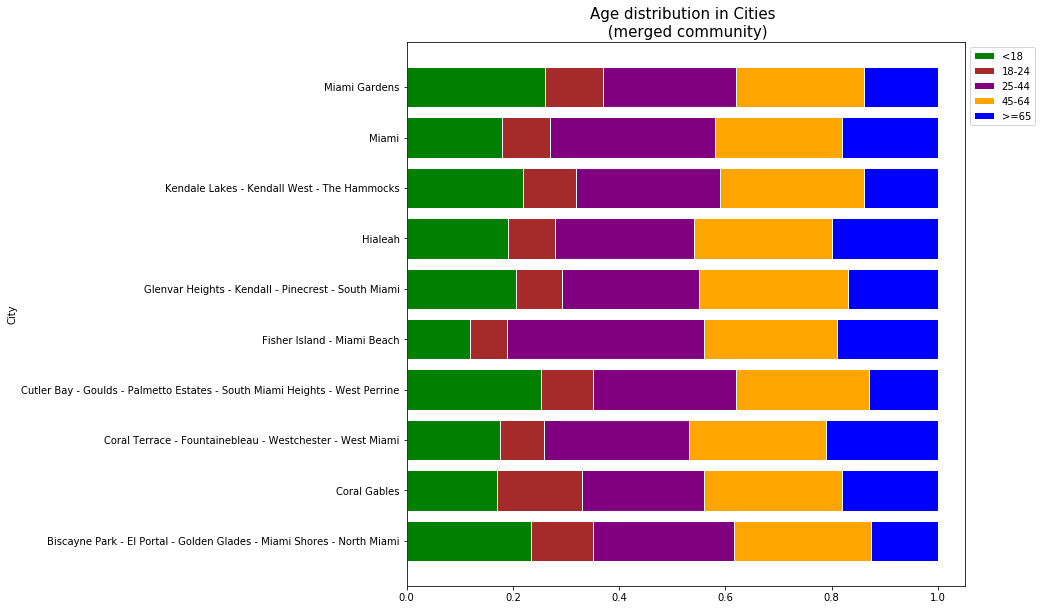

In [216]:
C18h = df_CDade2_C['<18%'].tolist()
C18h= [i/100 for i in C18h] 
C24h = df_CDade2_C['18-24%'].tolist()
C24h= [i/100 for i in C24h]
C44h= df_CDade2_C['25-44%'].tolist()
C44h= [i/100 for i in C44h]
C64h= df_CDade2_C['45-64%'].tolist()
C64h= [i/100 for i in C64h]
C65h= df_CDade2_C['>=65%'].tolist()
C65h= [i/100 for i in C65h]
rCh=[]
count=0
for i in namesCH:
    count=count+1
    l=count-1
    rCh.append(l)
rCh
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rCh, C18h, color='green', edgecolor='white', label="<18")
plt.barh(rCh, C24h, left=C18h, color='brown', edgecolor='white', label="18-24")
plt.barh(rCh, C44h, left=[w+b for w,b in zip(C18h, C24h)], color='purple', edgecolor='white', label="25-44")
plt.barh(rCh, C64h, left=[w+b+l for w,b,l in zip(C18h, C24h, C44h)], color='orange', edgecolor='white', label="45-64")
plt.barh(rCh, C65h, left=[w+b+l+m for w,b,l,m in zip(C18h, C24h, C44h, C64h)], color='blue', edgecolor='white', label=">=65")
plt.yticks(rCh, namesCH)
plt.ylabel("City")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Age distribution in Cities \n (merged community)', fontsize= 15)
plt.savefig("AgeCityh.png", bbox_inches='tight')
plt.show()

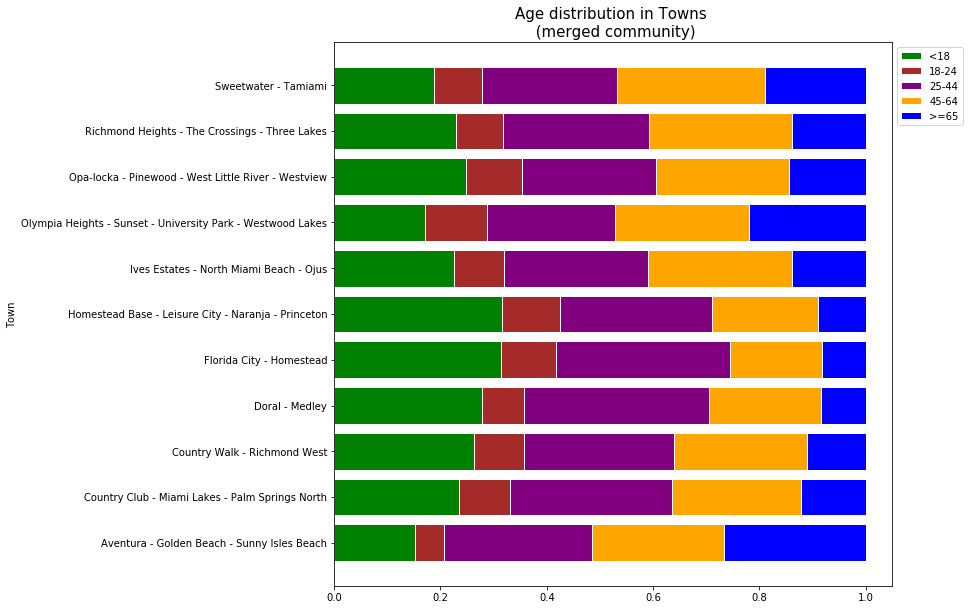

In [217]:
T18h = df_CDade2_T['<18%'].tolist()
T18h= [i/100 for i in T18h] 
T24h = df_CDade2_T['18-24%'].tolist()
T24h= [i/100 for i in T24h]
T44h= df_CDade2_T['25-44%'].tolist()
T44h= [i/100 for i in T44h]
T64h= df_CDade2_T['45-64%'].tolist()
T64h= [i/100 for i in T64h]
T65h= df_CDade2_T['>=65%'].tolist()
T65h= [i/100 for i in T65h]
rTh=[]
count=0
for i in namesTH:
    count=count+1
    l=count-1
    rTh.append(l)
rTh
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rTh, T18h, color='green', edgecolor='white', label="<18")
plt.barh(rTh, T24h, left=T18h, color='brown', edgecolor='white', label="18-24")
plt.barh(rTh, T44h, left=[w+b for w,b in zip(T18h, T24h)], color='purple', edgecolor='white', label="25-44")
plt.barh(rTh, T64h, left=[w+b+l for w,b,l in zip(T18h, T24h, T44h)], color='orange', edgecolor='white', label="45-64")
plt.barh(rTh, T65h, left=[w+b+l+m for w,b,l,m in zip(T18h, T24h, T44h, T64h)], color='blue', edgecolor='white', label=">=65")
plt.yticks(rTh, namesTH)
plt.ylabel("Town")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Age distribution in Towns \n (merged community)', fontsize= 15)
plt.savefig("AgeTownh.png", bbox_inches='tight')
plt.show()

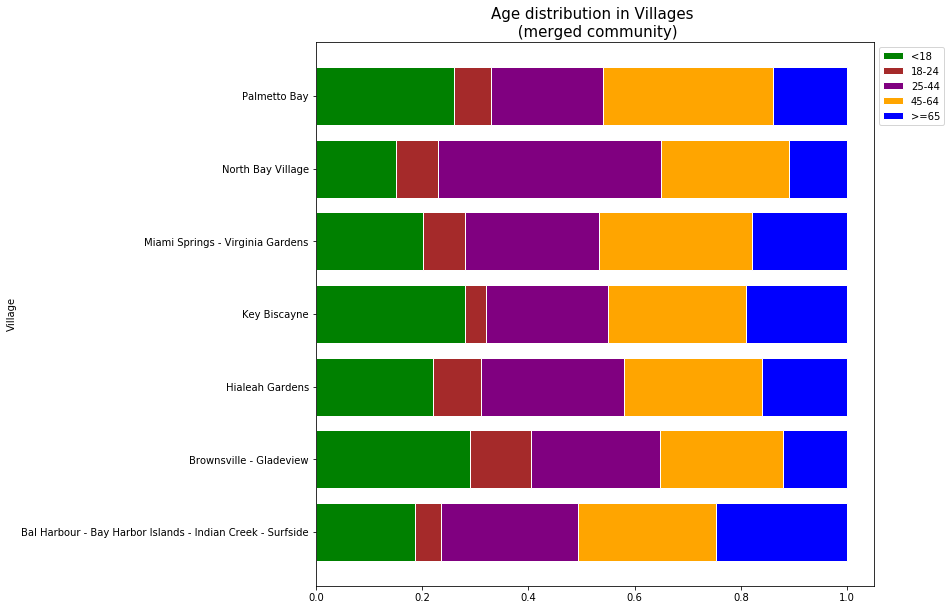

In [218]:
V18h = df_CDade2_V['<18%'].tolist()
V18h= [i/100 for i in V18h] 
V24h = df_CDade2_V['18-24%'].tolist()
V24h= [i/100 for i in V24h]
V44h=df_CDade2_V['25-44%'].tolist()
V44h= [i/100 for i in V44h]
V64h= df_CDade2_V['45-64%'].tolist()
V64h= [i/100 for i in V64h]
V65h=df_CDade2_V['>=65%'].tolist()
V65h= [i/100 for i in V65h]
rVh=[]
count=0
for i in namesVH:
    count=count+1
    l=count-1
    rVh.append(l)
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rVh, V18h, color='green', edgecolor='white', label="<18")
plt.barh(rVh, V24h, left=V18h, color='brown', edgecolor='white', label="18-24")
plt.barh(rVh, V44h, left=[w+b for w,b in zip(V18h, V24h)], color='purple', edgecolor='white', label="25-44")
plt.barh(rVh, V64h, left=[w+b+l for w,b,l in zip(V18h, V24h, V44h)], color='orange', edgecolor='white', label="45-64")
plt.barh(rVh, V65h, left=[w+b+l+m for w,b,l,m in zip(V18h, V24h, V44h, V64h)], color='blue', edgecolor='white', label=">=65")
plt.yticks(rVh, namesVH)
plt.ylabel("Village")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Age distribution in Villages \n (merged community)', fontsize= 15)
plt.savefig("AgeVillageh.png", bbox_inches='tight')
plt.show()

#### Pre-processing GEO-data and AGE-data for further Vizualization

In [219]:
list_ageH=[]
for i18,i24, i44, i64, i65 in zip(df_CDade2['<18%'], df_CDade2['18-24%'], df_CDade2['25-44%'],
                                    df_CDade2['45-64%'],df_CDade2['>=65%']):
    if i18>i24 and i18>i44 and i18>i64 and i18>i65:
        i='Children Majority'
    elif i24>i18 and i24>i44 and i24>i64 and i24>i65:
        i='Young Majority'
    elif i44>i18 and i44>i24 and i44>i64 and i44>i65:
        i='Middle-Aged Majority (1st type)'
    elif i64>i18 and i64>i24 and i64>i44 and i64>i65:
        i='Middle-Aged Majority (2nd type)'
    elif i65>i18 and i65>i24 and i65>i44 and i65>i64:
        i='Elderly Majority'
    else:
        i='No Age Majority'
    list_ageH.append(i)
df_CDade2['AgeType']=list_ageH
df_CDade2.head()

Community  MergeCluster  \
0        Aventura - Golden Beach - Sunny Isles Beach             4   
1  Bal Harbour - Bay Harbor Islands - Indian Cree...             7   
2  Biscayne Park - El Portal - Golden Glades - Mi...             6   
3                            Brownsville - Gladeview            14   
4                                       Coral Gables            20   

  MergeClusterType                                      Type  \
0             Town                        City - Town - City   
1          Village           Village - Town - Village - Town   
2             City  Village - Village - CDP - Village - City   
3          Village                                 CDP - CDP   
4             City                                      City   

                                 ClusterType  \
0                   Town - Village - Village   
1      Village - Village - Village - Village   
2  Village - Village - Town - Village - Town   
3                          Village - Village   
4                                       City   

                                            geometry   Area  HousingUnits  \
0  POLYGON ((-80.11857 25.95714, -80.11868 25.953...   5.74         45459   
1  MULTIPOLYGON (((-80.14225 25.87822, -80.14088 ...   2.59          9902   
2  POLYGON ((-80.20709 25.85450, -80.20533 25.854...  19.87         39223   
3  POLYGON ((-80.22530 25.83170, -80.22514 25.828...   4.84          9938   
4  POLYGON ((-80.30130 25.63736, -80.29698 25.637...  37.32         20266   

   Population      M      F    <18  18-24  25-44  45-64   >=65       <18%  \
0       57513  26651  30862   8746   3121  16062  14293  15291  15.206997   
1       13971   6477   7494   2618    671   3611   3632   3438  18.738816   
2      107804  51632  56172  25298  12456  28606  27760  13682  23.466662   
3       26848  12750  14098   7786   3068   6559   6175   3260  29.000298   
4       46780  22029  24751   7953   7485  10759  12163   8420  17.000855   

      18-24%     25-44%     45-64%      >=65%  White  Latino  Black  Others  \
0   5.426599  27.927599  24.851773  26.587032  31452   21147   1707    3207   
1   4.802806  25.846396  25.996707  24.608117   7399    5845    220     507   
2  11.554302  26.535193  25.750436  12.691551  15537   22990  62054    7223   
3  11.427294  24.430125  22.999851  12.142431    268    5139  19983    1458   
4  16.000428  22.999145  26.000428  17.999145  18712   24326   1403    2339   

      White%    Latino%     Black%   Others%                          AgeType  
0  54.686766  36.769078   2.968025  5.576131  Middle-Aged Majority (1st type)  
1  52.959702  41.836662   1.574690  3.628946  Middle-Aged Majority (2nd type)  
2  14.412267  21.325739  57.561872  6.700122  Middle-Aged Majority (1st type)  
3   0.998212  19.141091  74.430125  5.430572                Children Majority  
4  40.000000  52.000855   2.999145  5.000000  Middle-Aged Majority (2nd type)

In [220]:
df_CDade2['AgeType'].value_counts()

Middle-Aged Majority (1st type)    15
Middle-Aged Majority (2nd type)     8
Children Majority                   4
No Age Majority                     1
Name: AgeType, dtype: int64

In [221]:
gd_CDade2_AS = gpd.GeoDataFrame(df_CDade2)
gd_CDade2_AS.crs= 'epsg:3857'
gd2_CDade2_AS=gd_CDade2_AS.to_crs('epsg:3857')

#### Type of age

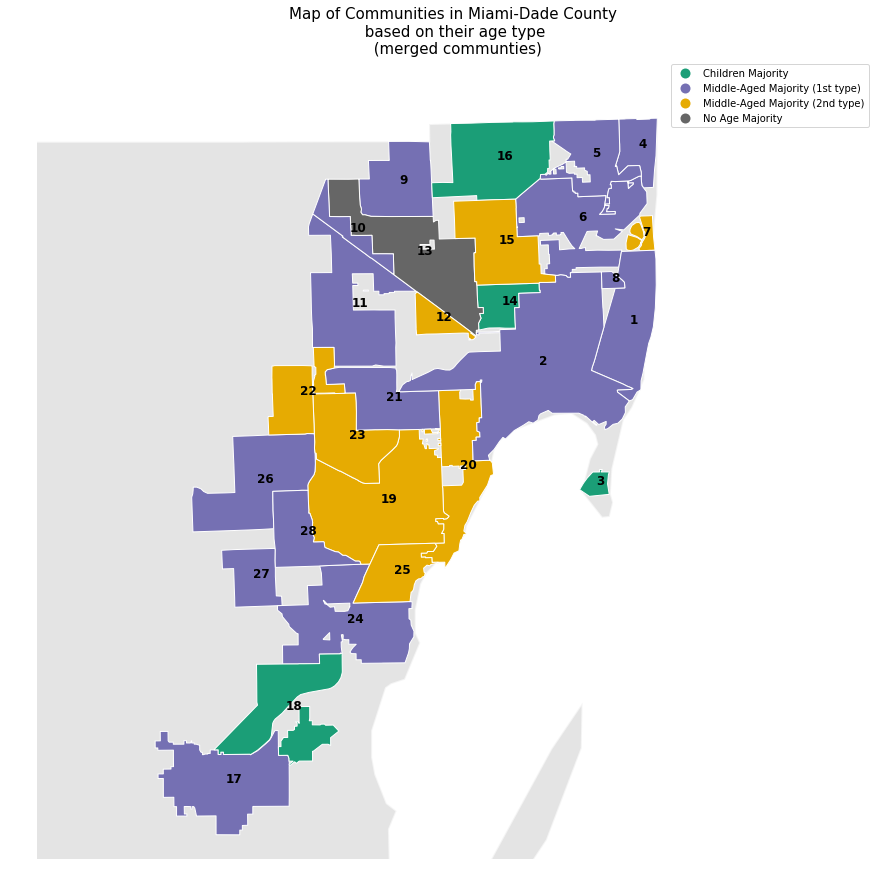

In [222]:
map_TypeAgeH=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_CDade2_AS.plot(ax=map_TypeAgeH, column = 'AgeType', linewidth=1, edgecolor='white', 
              cmap='Dark2', legend=True, zorder=2)
texts_g = []

for x, y, label in zip(gd2_CDade_points.geometry.x,
                       gd2_CDade_points.geometry.y, gd2_CDade_points['MergeCluster']):
    texts_g.append(plt.text(x, y, label, fontsize = 12, fontweight='bold',
                            color='black', zorder=3))
plt.axis('off')
plt.xlim(left=-80.6, right=-79.95)
plt.ylim(bottom=25.4)
plt.title("Map of Communities in Miami-Dade County \n based on their age type \n (merged communties)", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesAgeTypeH.png", bbox_inches='tight')

### 10.3. Race

#### Bar Plots  - Race vs Population

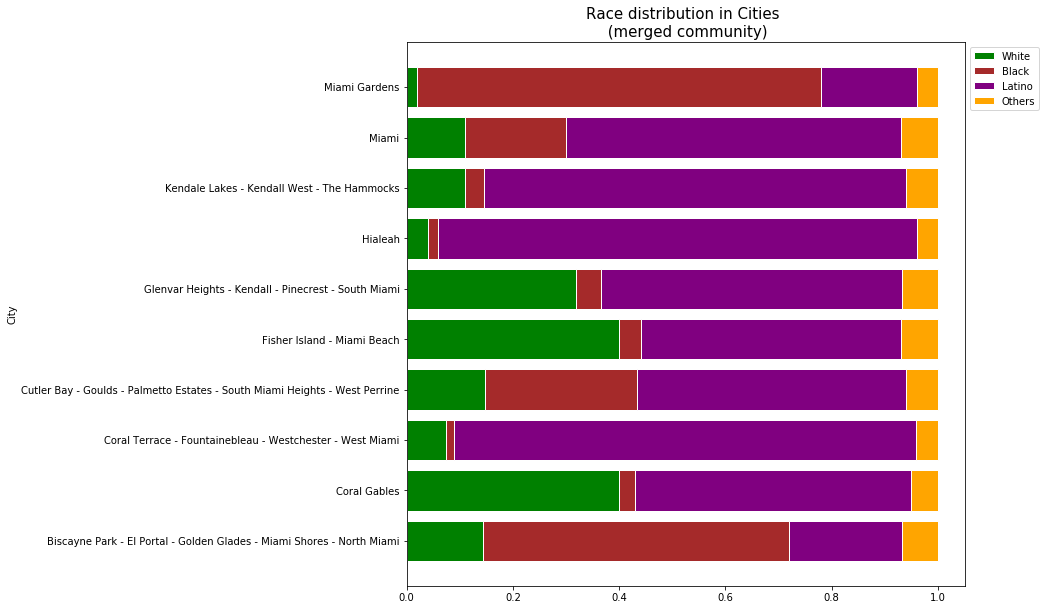

In [223]:
WhiteCh = df_CDade2_C['White%'].tolist()
WhiteCh= [i/100 for i in WhiteCh] 
BlackCh = df_CDade2_C['Black%'].tolist()
BlackCh= [i/100 for i in BlackCh]
LatinoCh=df_CDade2_C['Latino%'].tolist()
LatinoCh= [i/100 for i in LatinoCh]
OtherCh= [1-w-b-l for w, b, l in zip(WhiteCh, BlackCh, LatinoCh)]
rCh=[]
count=0
for i in namesCH:
    count=count+1
    l=count-1
    rCh.append(l)
rCh
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rCh, WhiteCh, color='green', edgecolor='white', label="White")
plt.barh(rCh, BlackCh, left=WhiteCh, color='brown', edgecolor='white', label="Black")
plt.barh(rCh, LatinoCh, left=[w+b for w,b in zip(WhiteCh, BlackCh)], color='purple', edgecolor='white', label="Latino")
plt.barh(rCh, OtherCh, left=[w+b+l for w,b,l in zip(WhiteCh, BlackCh, LatinoCh)], color='orange', edgecolor='white', label="Others")
plt.yticks(rCh, namesCH)
plt.ylabel("City")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Race distribution in Cities \n (merged community)', fontsize= 15)
plt.savefig("RaceCityh.png", bbox_inches='tight')
plt.show()

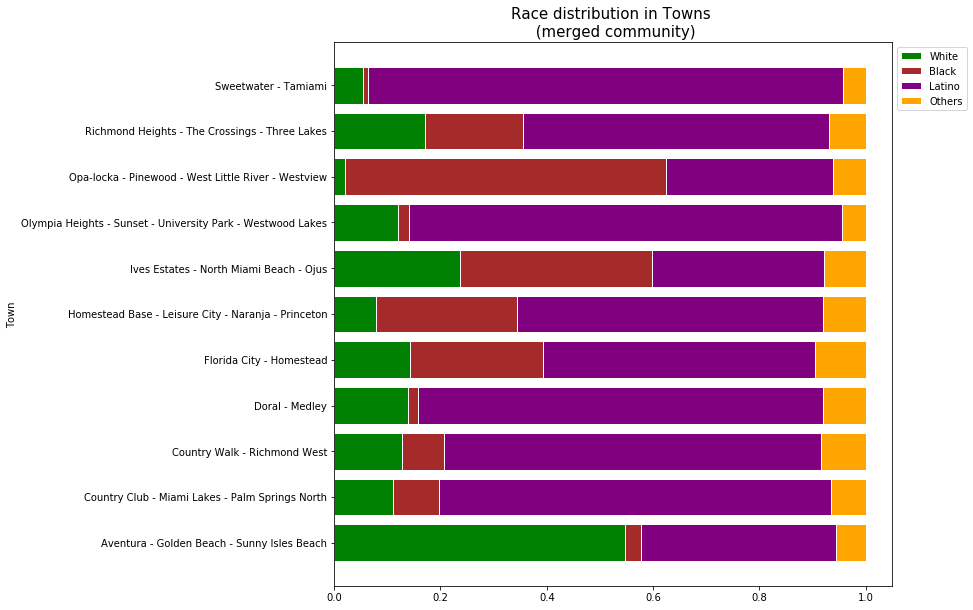

In [224]:
WhiteTh = df_CDade2_T['White%'].tolist()
WhiteTh= [i/100 for i in WhiteTh] 
BlackTh= df_CDade2_T['Black%'].tolist()
BlackTh= [i/100 for i in BlackTh]
LatinoTh=df_CDade2_T['Latino%'].tolist()
LatinoTh= [i/100 for i in LatinoTh]
OtherTh= [1-w-b-l for w, b, l in zip(WhiteTh, BlackTh, LatinoTh)]
rTh=[]
count=0
for i in namesTH:
    count=count+1
    l=count-1
    rTh.append(l)
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rTh, WhiteTh, color='green', edgecolor='white', label="White")
plt.barh(rTh, BlackTh, left=WhiteTh, color='brown', edgecolor='white', label="Black")
plt.barh(rTh, LatinoTh, left=[w+b for w,b in zip(WhiteTh, BlackTh)], color='purple', edgecolor='white', label="Latino")
plt.barh(rTh, OtherTh, left=[w+b+l for w,b,l in zip(WhiteTh, BlackTh, LatinoTh)], color='orange', edgecolor='white', label="Others")
plt.yticks(rTh, namesTH)
plt.ylabel("Town")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Race distribution in Towns \n (merged community)', fontsize= 15)
plt.savefig("RaceTownh.png", bbox_inches='tight')
plt.show()

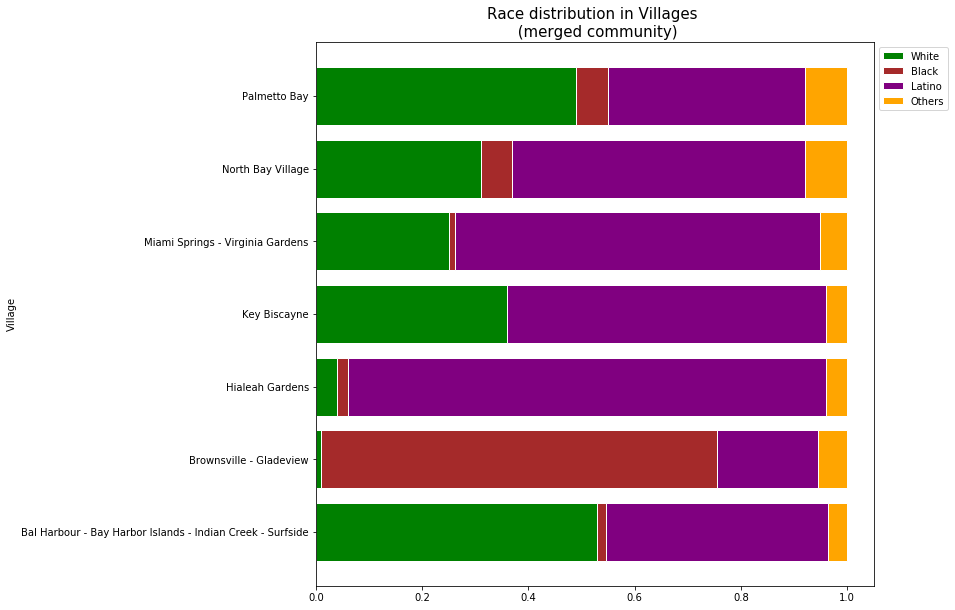

In [225]:
WhiteVh = df_CDade2_V['White%'].tolist()
WhiteVh= [i/100 for i in WhiteVh] 
BlackVh= df_CDade2_V['Black%'].tolist()
BlackVh= [i/100 for i in BlackVh]
LatinoVh=df_CDade2_V['Latino%'].tolist()
LatinoVh= [i/100 for i in LatinoVh]
OtherVh= [1-w-b-l for w, b, l in zip(WhiteVh, BlackVh, LatinoVh)]
rVh=[]
count=0
for i in namesVH:
    count=count+1
    l=count-1
    rVh.append(l)
plt.figure(figsize=(10, 10), frameon=False)
plt.barh(rVh, WhiteVh, color='green', edgecolor='white', label="White")
plt.barh(rVh, BlackVh, left=WhiteVh, color='brown', edgecolor='white', label="Black")
plt.barh(rVh, LatinoVh, left=[w+b for w,b in zip(WhiteVh, BlackVh)], color='purple', edgecolor='white', label="Latino")
plt.barh(rVh, OtherVh, left=[w+b+l for w,b,l in zip(WhiteVh, BlackVh, LatinoVh)], color='orange', edgecolor='white', label="Others")
plt.yticks(rVh, namesVH)
plt.ylabel("Village")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Race distribution in Villages \n (merged community)', fontsize= 15)
plt.savefig("RaceVillageh.png", bbox_inches='tight')
plt.show()

#### Pre-processing GEO-data and RACE-data for further Vizualization

In [226]:
list_raceH=[]
for w, l, b, o in zip(df_CDade2['White%'], df_CDade2['Latino%'], 
                      df_CDade2['Black%'], df_CDade2['Others%']):
    blo=b+l+o
    wlo=w+l+o
    bwo=b+w+o
    if w>blo:
        i='White Majority (strong)'
    elif b>wlo:
        i='Black Majority (strong)'
    elif l>bwo:
        i='Latino Majority (strong)'    
    elif w>l and w>b and w>o:
        i='White Majority (weak)'
    elif l>w and l>b and l>o:
        i='Latino Majority (weak)'
    elif b>w and b>l and b>o:
        i='Black Majority (weak)'
    elif  o>w and o>l and o>b:
        i='Other Majority (weak)'
    else:
        i='No Race Majority'
    list_raceH.append(i)
df_CDade2['RaceType']=list_raceH
df_CDade2.head()

Community  MergeCluster  \
0        Aventura - Golden Beach - Sunny Isles Beach             4   
1  Bal Harbour - Bay Harbor Islands - Indian Cree...             7   
2  Biscayne Park - El Portal - Golden Glades - Mi...             6   
3                            Brownsville - Gladeview            14   
4                                       Coral Gables            20   

  MergeClusterType                                      Type  \
0             Town                        City - Town - City   
1          Village           Village - Town - Village - Town   
2             City  Village - Village - CDP - Village - City   
3          Village                                 CDP - CDP   
4             City                                      City   

                                 ClusterType  \
0                   Town - Village - Village   
1      Village - Village - Village - Village   
2  Village - Village - Town - Village - Town   
3                          Village - Village   
4                                       City   

                                            geometry   Area  HousingUnits  \
0  POLYGON ((-80.11857 25.95714, -80.11868 25.953...   5.74         45459   
1  MULTIPOLYGON (((-80.14225 25.87822, -80.14088 ...   2.59          9902   
2  POLYGON ((-80.20709 25.85450, -80.20533 25.854...  19.87         39223   
3  POLYGON ((-80.22530 25.83170, -80.22514 25.828...   4.84          9938   
4  POLYGON ((-80.30130 25.63736, -80.29698 25.637...  37.32         20266   

   Population      M      F    <18  18-24  25-44  45-64   >=65       <18%  \
0       57513  26651  30862   8746   3121  16062  14293  15291  15.206997   
1       13971   6477   7494   2618    671   3611   3632   3438  18.738816   
2      107804  51632  56172  25298  12456  28606  27760  13682  23.466662   
3       26848  12750  14098   7786   3068   6559   6175   3260  29.000298   
4       46780  22029  24751   7953   7485  10759  12163   8420  17.000855   

      18-24%     25-44%     45-64%      >=65%  White  Latino  Black  Others  \
0   5.426599  27.927599  24.851773  26.587032  31452   21147   1707    3207   
1   4.802806  25.846396  25.996707  24.608117   7399    5845    220     507   
2  11.554302  26.535193  25.750436  12.691551  15537   22990  62054    7223   
3  11.427294  24.430125  22.999851  12.142431    268    5139  19983    1458   
4  16.000428  22.999145  26.000428  17.999145  18712   24326   1403    2339   

      White%    Latino%     Black%   Others%                          AgeType  \
0  54.686766  36.769078   2.968025  5.576131  Middle-Aged Majority (1st type)   
1  52.959702  41.836662   1.574690  3.628946  Middle-Aged Majority (2nd type)   
2  14.412267  21.325739  57.561872  6.700122  Middle-Aged Majority (1st type)   
3   0.998212  19.141091  74.430125  5.430572                Children Majority   
4  40.000000  52.000855   2.999145  5.000000  Middle-Aged Majority (2nd type)   

                   RaceType  
0   White Majority (strong)  
1   White Majority (strong)  
2   Black Majority (strong)  
3   Black Majority (strong)  
4  Latino Majority (strong)

In [227]:
df_CDade2['RaceType'].value_counts()

Latino Majority (strong)    19
Black Majority (strong)      4
White Majority (strong)      2
White Majority (weak)        1
Latino Majority (weak)       1
Black Majority (weak)        1
Name: RaceType, dtype: int64

In [228]:
gd_CDade2_R = gpd.GeoDataFrame(df_CDade2)
gd_CDade2_R.crs= 'epsg:3857'
gd2_CDade2_R=gd_CDade2_R.to_crs('epsg:3857')

#### Race Supremacy

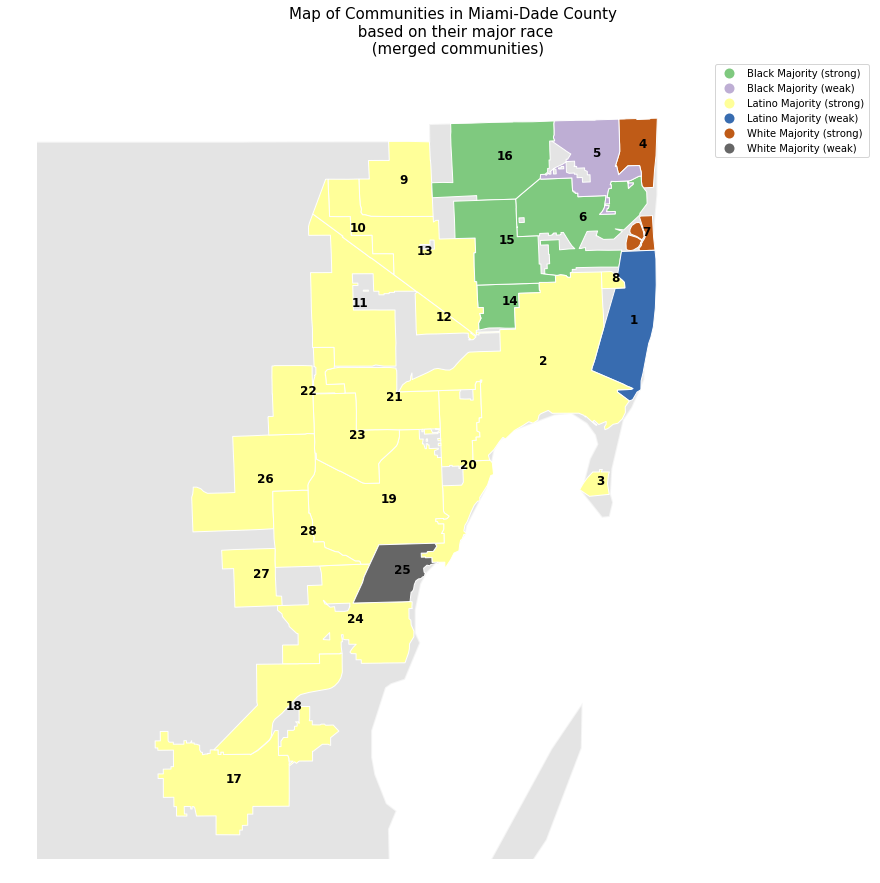

In [229]:
map_TypeRaceH=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_CDade2_R.plot(ax=map_TypeRaceH, column = 'RaceType', linewidth=1, edgecolor='white', 
              cmap='Accent', legend=True, zorder=2)
texts_g = []

for x, y, label in zip(gd2_CDade_points.geometry.x,
                       gd2_CDade_points.geometry.y, gd2_CDade_points['MergeCluster']):
    texts_g.append(plt.text(x, y, label, fontsize = 12, fontweight='bold',
                            color='black', zorder=3))
plt.axis('off')
plt.xlim(left=-80.6, right=-79.95)
plt.ylim(bottom=25.4)
plt.title("Map of Communities in Miami-Dade County \n based on their major race \n (merged communities)", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesRaceTypeh.png", bbox_inches='tight')

#### White


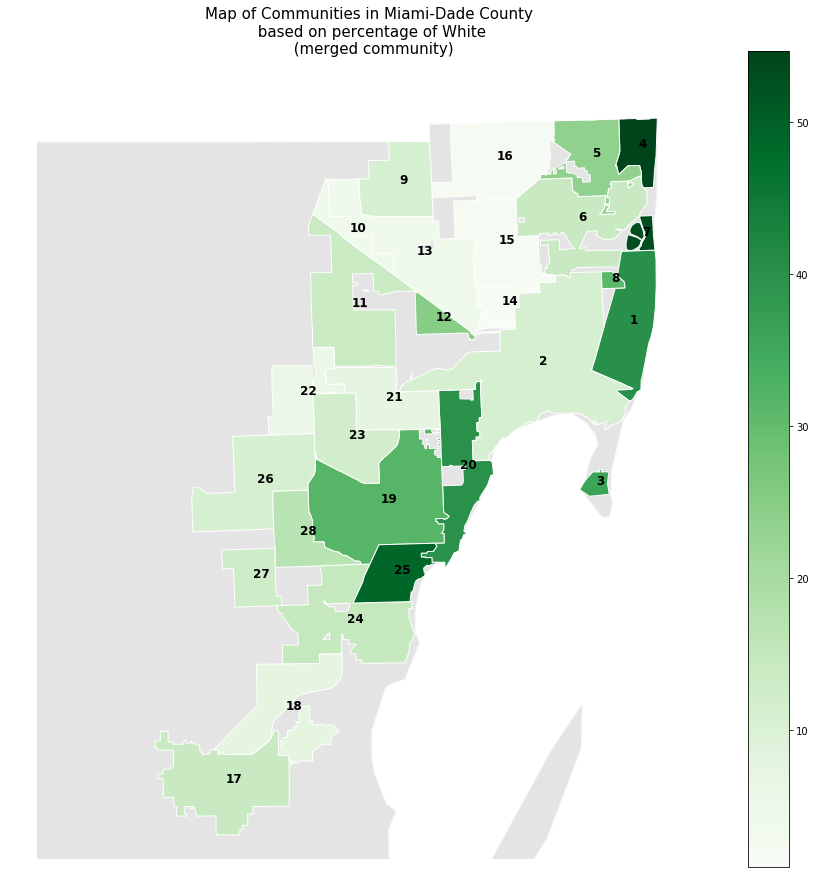

In [230]:
map_WhiteH=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_CDade2_R.plot(ax=map_WhiteH, column = 'White%', linewidth=1, edgecolor='white', 
              cmap='Greens', legend=True, zorder=2)
texts_g = []

for x, y, label in zip(gd2_CDade_points.geometry.x,
                       gd2_CDade_points.geometry.y, gd2_CDade_points['MergeCluster']):
    texts_g.append(plt.text(x, y, label, fontsize = 12, fontweight='bold',
                            color='black', zorder=3))
plt.axis('off')
plt.xlim(left=-80.6)
plt.ylim(bottom=25.4)
plt.title("Map of Communities in Miami-Dade County \n based on percentage of White \n (merged community)", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesWhitePH.png", bbox_inches='tight')

#### Latino


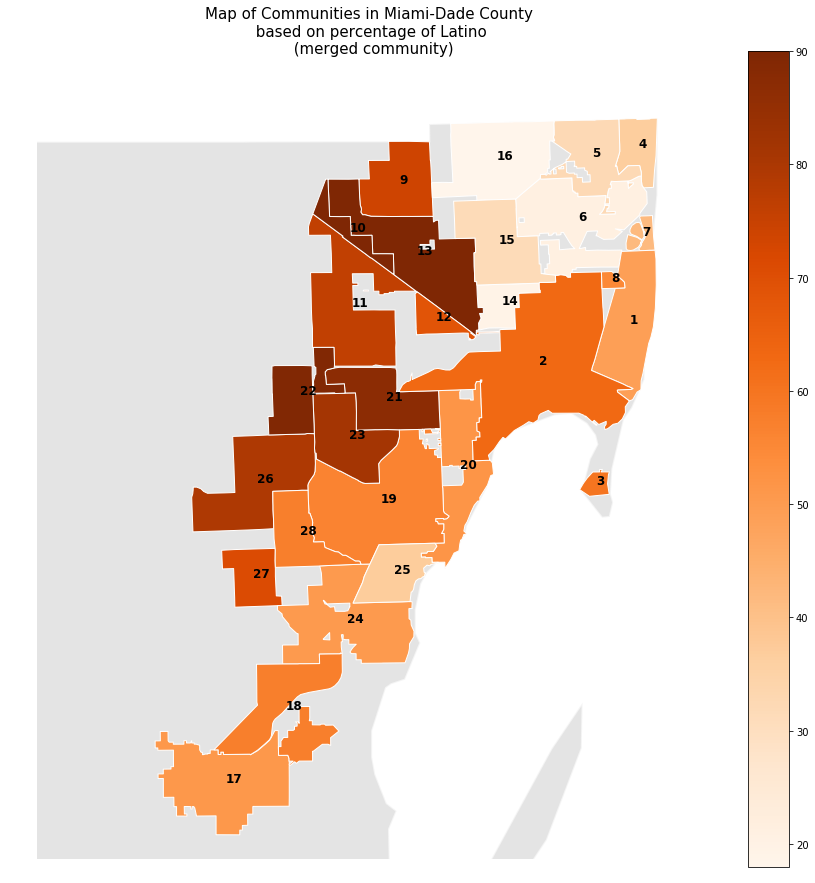

In [231]:
map_LatinoH=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_CDade2_R.plot(ax=map_LatinoH, column = 'Latino%', linewidth=1, edgecolor='white', 
              cmap='Oranges', legend=True, zorder=2)
texts_g = []

for x, y, label in zip(gd2_CDade_points.geometry.x,
                       gd2_CDade_points.geometry.y, gd2_CDade_points['MergeCluster']):
    texts_g.append(plt.text(x, y, label, fontsize = 12, fontweight='bold',
                            color='black', zorder=3))
plt.axis('off')
plt.xlim(left=-80.6)
plt.ylim(bottom=25.4)
plt.title("Map of Communities in Miami-Dade County \n based on percentage of Latino \n (merged community)", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesLatinoPH.png", bbox_inches='tight')

#### Black


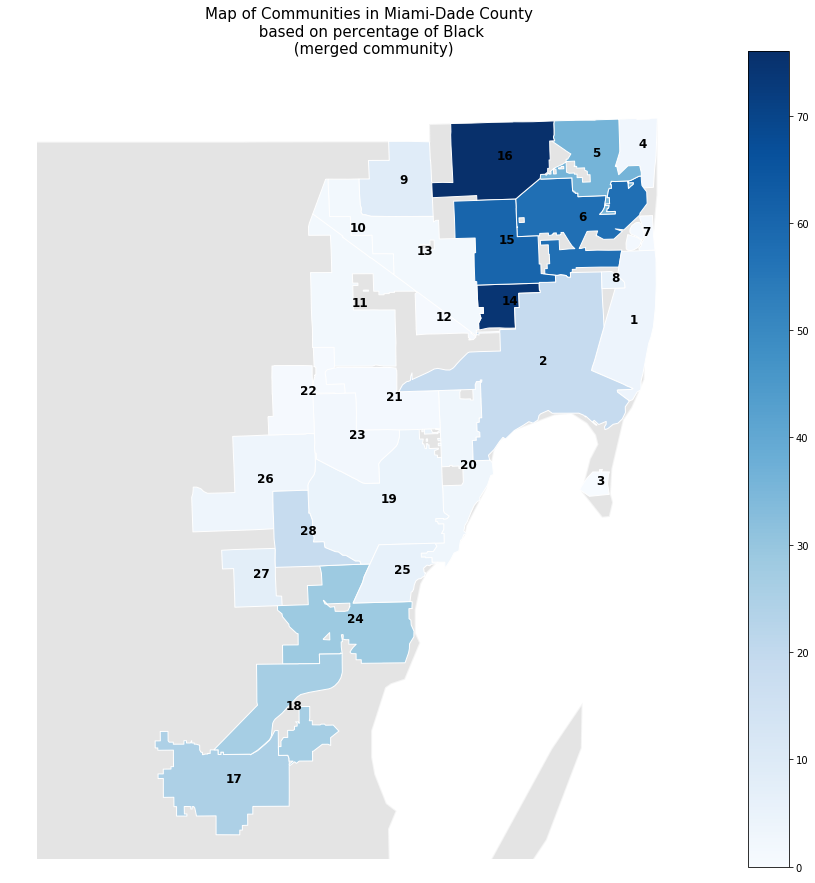

In [232]:
map_BlackH=g2_dade.plot(figsize=(15,15), color='lightgray', alpha=0.6,
                               edgecolor='white', linewidth=2, zorder=1)
gd2_CDade2_R.plot(ax=map_BlackH, column = 'Black%', linewidth=1, edgecolor='white', 
              cmap='Blues', legend=True, zorder=2)
texts_g = []

for x, y, label in zip(gd2_CDade_points.geometry.x,
                       gd2_CDade_points.geometry.y, gd2_CDade_points['MergeCluster']):
    texts_g.append(plt.text(x, y, label, fontsize = 12, fontweight='bold',
                            color='black', zorder=3))
plt.axis('off')
plt.xlim(left=-80.6)
plt.ylim(bottom=25.4)
plt.title("Map of Communities in Miami-Dade County \n based on percentage of Black \n (merged community)", fontsize= 15)
plt.savefig("MiamiDadeCommunitiesBlackPH.png", bbox_inches='tight')

## 11. List of Groceries Stores and Pharmacies in Each Community

In [233]:
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
print('Libraries imported.')

Libraries imported.


In [234]:
CLIENT_ID = 'F44FGVFKQLF3CVGMP2TJ52HCGMDR4JMMP5JGVFTR3VXIIP1G' # your Foursquare ID
CLIENT_SECRET = 'ZSLDQFFBM02GVKDOVVINZFGLT1ZMXDGD5DXH52I3A0HRFDVX' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 5000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: F44FGVFKQLF3CVGMP2TJ52HCGMDR4JMMP5JGVFTR3VXIIP1G
CLIENT_SECRET:ZSLDQFFBM02GVKDOVVINZFGLT1ZMXDGD5DXH52I3A0HRFDVX


In [235]:
df_Dade_viz=df_Dade2.copy()
list_lat=df_Dade_viz['Latitude'].tolist()
list_lon=df_Dade_viz['Longitude'].tolist()

In [236]:
search_query = 'Publix'                               #search data
radius = 7000
#df_publix_CTV=pd.DataFrame()
list_geo_search= []                                   #search
count=0
for (i,j) in zip(list_lat, list_lon):         #finding all 
    count=count+1
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, i, j, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()   
    item= results['response']['venues']
    df=json_normalize(item)
    if count==1:
        df_publix=df
    else:
        df_publix=df_publix.append(df)              
df_publix.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


categories  hasPerk  \
0  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
1  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
2  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
3  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
4  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   

                         id              location.address location.cc  \
0  4b96ddc9f964a520f3e934e3            2952 Aventura Blvd          US   
1  4b104d07f964a520586d23e3           18995 Biscayne Blvd          US   
2  4b8348a0f964a520ab0031e3             18330 Collins Ave          US   
3  4b4fa82ff964a5207a0f27e3  1400 E Hallandale Beach Blvd          US   
4  4b930be5f964a520453134e3      1700 NE Miami Gardens Dr          US   

       location.city location.country              location.crossStreet  \
0           Aventura    United States                               NaN   
1           Aventura    United States                         NE 187 St   
2  Sunny Isles Beach    United States                               NaN   
3         Hallandale    United States  Hallandale Place Shopping Center   
4  North Miami Beach    United States                               NaN   

   location.distance                          location.formattedAddress  \
0                950  [2952 Aventura Blvd, Aventura, FL 33180, Unite...   
1                734  [18995 Biscayne Blvd (NE 187 St), Aventura, FL...   
2               1649  [18330 Collins Ave, Sunny Isles Beach, FL 3316...   
3               3552  [1400 E Hallandale Beach Blvd (Hallandale Plac...   
4               3075  [1700 NE Miami Gardens Dr, North Miami Beach, ...   

                             location.labeledLatLngs  location.lat  \
0  [{'label': 'display', 'lat': 25.96052840246757...     25.960528   
1  [{'label': 'display', 'lat': 25.95076895967842...     25.950769   
2  [{'label': 'display', 'lat': 25.94623665290805...     25.946237   
3  [{'label': 'display', 'lat': 25.985055, 'lng':...     25.985055   
4  [{'label': 'display', 'lat': 25.94508328588015...     25.945083   

   location.lng location.neighborhood location.postalCode location.state  \
0    -80.141621                   NaN               33180             FL   
1    -80.143445                   NaN               33180             FL   
2    -80.122131                   NaN               33160             FL   
3    -80.133673                   NaN               33009             FL   
4    -80.165991                   NaN               33179             FL   

     name    referralId venuePage.id  
0  Publix  v-1586328090          NaN  
1  Publix  v-1586328090          NaN  
2  Publix  v-1586328090          NaN  
3  Publix  v-1586328090          NaN  
4  Publix  v-1586328090          NaN

In [237]:
df_publix.drop_duplicates(subset='id', keep="last", inplace=True)   #deleting duplicates
df_publix.drop_duplicates(subset= ['location.lat', 
                                   'location.lng'], keep="last", inplace=True)
df_publix.reset_index(inplace=True, drop=True)
df_publix=df_publix.copy()
#df_publix

array_publix = ['Publix', 'publix']                   #choosing correct venues
df_publix_s=df_publix.loc[df_publix['name'].isin(array_publix)]
df_publix_s['name']='Publix'

list_Dade_l=df_Dade_viz['Community'].tolist()             #choosing correct areas
df_publix_s=df_publix_s.loc[df_publix['location.city'].isin(list_Dade_l)]
df_publix_s.reset_index(drop=True, inplace=True)
#df_publix_s.head()

df_publix_s=df_publix_s[['name', 'location.city', 'location.lat', 'location.lng']]
df_publix_s=df_publix_s.copy()
df_publix_s.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


name location.city  location.lat  location.lng
0  Publix     Homestead     25.469875    -80.476042
1  Publix   Miami Beach     25.775639    -80.139944
2  Publix         Miami     25.761256    -80.196525
3  Publix         Miami     25.765272    -80.195137
4  Publix         Miami     25.767510    -80.199521

In [238]:
search_query = 'Wholefoods'                               #search data
radius = 7000
#df_wholefoods_CTV=pd.DataFrame()
list_geo_search= []                                   #search
count=0
for (i,j) in zip(list_lat, list_lon):         #finding all from CTV names
    count=count+1
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, i, j, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()   
    item= results['response']['venues']
    df=json_normalize(item)
    if count==1:
        df_wholefoods=df
    else:
        df_wholefoods=df_wholefoods.append(df)                #merging all from CTV names
for (i,j) in zip(list_lat, list_lon):         #finding all from CDP names
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, i, j, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()   
    item= results['response']['venues']
    df=json_normalize(item)
    df_wholefoods=df_wholefoods.append(df)                    #mergimg all from CDP with CTV names
df_wholefoods.head()

categories  hasPerk  \
0  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
1  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
2  [{'id': '50be8ee891d4fa8dcc7199a7', 'name': 'M...    False   
3  [{'id': '4bf58dd8d48988d112941735', 'name': 'J...    False   
0  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   

                         id     location.address location.cc location.city  \
0  4ad2285af964a520bedf20e3  21105 Biscayne Blvd          US      Aventura   
1  5159846fe4b03caa2b36b8c7  12150 Biscayne Blvd          US   North Miami   
2  5226705e11d28e35f6eb2777                  NaN          US      Aventura   
3  51140199e4b0fd405069a6cb                  NaN          US         Miami   
0  5159846fe4b03caa2b36b8c7  12150 Biscayne Blvd          US   North Miami   

  location.country location.crossStreet  location.distance  \
0    United States       at NE 213th St               2059   
1    United States                  NaN               7804   
2    United States                  NaN               1989   
3    United States                  NaN               2066   
0    United States                  NaN               3917   

                           location.formattedAddress  \
0  [21105 Biscayne Blvd (at NE 213th St), Aventur...   
1  [12150 Biscayne Blvd, North Miami, FL 33181, U...   
2                [Aventura, FL 33081, United States]   
3                   [Miami, FL 33180, United States]   
0  [12150 Biscayne Blvd, North Miami, FL 33181, U...   

                             location.labeledLatLngs  location.lat  \
0  [{'label': 'display', 'lat': 25.97129633556335...     25.971296   
1  [{'label': 'display', 'lat': 25.88796257515642...     25.887963   
2  [{'label': 'display', 'lat': 25.96985, 'lng': ...     25.969850   
3  [{'label': 'display', 'lat': 25.97174175150442...     25.971742   
0  [{'label': 'display', 'lat': 25.88796257515642...     25.887963   

   location.lng location.neighborhood location.postalCode location.state  \
0    -80.141222                   NaN               33180             FL   
1    -80.165049                   NaN               33181             FL   
2    -80.144040                   NaN               33081             FL   
3    -80.138502                   NaN               33180             FL   
0    -80.165049                   NaN               33181             FL   

                    name    referralId  
0     Whole Foods Market  v-1586328104  
1     Whole Foods Market  v-1586328104  
2     Whole Foods Market  v-1586328104  
3  Whole Foods Juice Bar  v-1586328104  
0     Whole Foods Market  v-1586328105

In [239]:
df_wholefoods.drop_duplicates(subset='id', keep="last", inplace=True)   #deleting duplicates
df_wholefoods.drop_duplicates(subset= ['location.lat', 
                                   'location.lng'], keep="last", inplace=True)
df_wholefoods.reset_index(inplace=True, drop=True)
#df_wholefoods

array_wholefoods = ['Whole Foods Market']                   #choosing correct venues
df_wholefoods_s=df_wholefoods.loc[df_wholefoods['name'].isin(array_wholefoods)]
df_wholefoods_s['name']='Whole Foods'

list_Dade_l=df_Dade_viz['Community'].tolist()             #choosing correct areas
df_wholefoods_s=df_wholefoods_s.loc[df_wholefoods['location.city'].isin(list_Dade_l)]
df_wholefoods_s.reset_index(drop=True, inplace=True)
#df_wholefoods_s.head()

df_wholefoods_s=df_wholefoods_s[['name', 'location.city', 'location.lat', 'location.lng']]
df_wholefoods_s.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


name location.city  location.lat  location.lng
0  Whole Foods         Miami     25.772000    -80.189146
1  Whole Foods   Miami Beach     25.780996    -80.141278
2  Whole Foods      Aventura     25.971296    -80.141222
3  Whole Foods      Aventura     25.969850    -80.144040
4  Whole Foods   North Miami     25.887963    -80.165049

In [240]:
search_query = 'Aldi'                               #search data
radius = 7000
#df_aldi_CTV=pd.DataFrame()
list_geo_search= []                                   #search
count=0
for (i,j) in zip(list_lat, list_lon):         #finding all from CTV names
    count=count+1
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, i, j, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()   
    item= results['response']['venues']
    df=json_normalize(item)
    if count==1:
        df_aldi=df
    else:
        df_aldi=df_aldi.append(df)                #merging all from CTV names
df_aldi.head()

categories  hasPerk  \
0  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
0  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
1  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
0  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
1  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   

                         id  location.address location.cc      location.city  \
0  57375e60498eba786daeb4b6   735 NE 167th St          US  North Miami Beach   
0  55b118bc498ef435e7836c45  1290 NE 108th St          US              Miami   
1  57375e60498eba786daeb4b6   735 NE 167th St          US  North Miami Beach   
0  55b118bc498ef435e7836c45  1290 NE 108th St          US              Miami   
1  57375e60498eba786daeb4b6   735 NE 167th St          US  North Miami Beach   

  location.country                            location.crossStreet  \
0    United States                                             NaN   
0    United States  Biscayne Blvd. & 108th St. - Behind Chase Bank   
1    United States                                             NaN   
0    United States  Biscayne Blvd. & 108th St. - Behind Chase Bank   
1    United States                                             NaN   

   location.distance                          location.formattedAddress  \
0               5590  [735 NE 167th St, North Miami Beach, FL 33162,...   
0               5052  [1290 NE 108th St (Biscayne Blvd. & 108th St. ...   
1               7153  [735 NE 167th St, North Miami Beach, FL 33162,...   
0               4358  [1290 NE 108th St (Biscayne Blvd. & 108th St. ...   
1               7184  [735 NE 167th St, North Miami Beach, FL 33162,...   

                             location.labeledLatLngs  location.lat  \
0  [{'label': 'display', 'lat': 25.9294145, 'lng'...     25.929415   
0  [{'label': 'display', 'lat': 25.8743839, 'lng'...     25.874384   
1  [{'label': 'display', 'lat': 25.9294145, 'lng'...     25.929415   
0  [{'label': 'display', 'lat': 25.8743839, 'lng'...     25.874384   
1  [{'label': 'display', 'lat': 25.9294145, 'lng'...     25.929415   

   location.lng location.postalCode location.state  name    referralId  \
0    -80.185801               33162             FL  ALDI  v-1586328137   
0    -80.172119               33161             FL  ALDI  v-1586328137   
1    -80.185801               33162             FL  ALDI  v-1586328137   
0    -80.172119               33161             FL  ALDI  v-1586328138   
1    -80.185801               33162             FL  ALDI  v-1586328138   

  venuePage.id  
0          NaN  
0          NaN  
1          NaN  
0          NaN  
1          NaN

In [241]:
df_aldi.drop_duplicates(subset='id', keep="last", inplace=True)   #deleting duplicates
df_aldi.drop_duplicates(subset= ['location.lat', 
                                   'location.lng'], keep="last", inplace=True)
df_aldi.reset_index(inplace=True, drop=True)
#df_aldi

array_aldi = ['ALDI']                   #choosing correct venues
df_aldi_s=df_aldi.loc[df_aldi['name'].isin(array_aldi)]
df_aldi_s['name']='ALDI'

list_Dade_l=df_Dade_viz['Community'].tolist()             #choosing correct areas
df_aldi_s=df_aldi_s.loc[df_aldi['location.city'].isin(list_Dade_l)]
df_aldi_s.reset_index(drop=True, inplace=True)
#df_aldi_s.head()

df_aldi_s=df_aldi_s[['name', 'location.city', 'location.lat', 'location.lng']]
df_aldi_s.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


name      location.city  location.lat  location.lng
0  ALDI       Florida City     25.458606    -80.475806
1  ALDI      Miami Gardens     25.948743    -80.246555
2  ALDI            Hialeah     25.894627    -80.349830
3  ALDI  North Miami Beach     25.929415    -80.185801
4  ALDI              Miami     25.682721    -80.459691

In [242]:
search_query = "Trader Joe"                               #search data
radius = 7000
#df_traderJ_CTV=pd.DataFrame()
list_geo_search= []                                   #search
count=0
for (i,j) in zip(list_lat, list_lon):         #finding all from CTV names
    count=count+1
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, i, j, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()   
    item= results['response']['venues']
    df=json_normalize(item)
    if count==1:
        df_traderJ=df
    else:
        df_traderJ=df_traderJ.append(df)                #merging all from CTV names
df_traderJ.head()

categories delivery.id  \
0  [{'id': '4bf58dd8d48988d112941735', 'name': 'J...         NaN   
1  [{'id': '4bf58dd8d48988d12d951735', 'name': 'B...         NaN   
2  [{'id': '4bf58dd8d48988d112941735', 'name': 'J...         NaN   
3  [{'id': '4bf58dd8d48988d103951735', 'name': 'C...         NaN   
4  [{'id': '4bf58dd8d48988d121941735', 'name': 'L...         NaN   

  delivery.provider.icon.name delivery.provider.icon.prefix  \
0                         NaN                           NaN   
1                         NaN                           NaN   
2                         NaN                           NaN   
3                         NaN                           NaN   
4                         NaN                           NaN   

  delivery.provider.icon.sizes delivery.provider.name delivery.url  hasPerk  \
0                          NaN                    NaN          NaN    False   
1                          NaN                    NaN          NaN    False   
2                          NaN                    NaN          NaN    False   
3                          NaN                    NaN          NaN    False   
4                          NaN                    NaN          NaN    False   

                         id          location.address location.cc  \
0  5b6ad7477564f7002c7ee63d  19501 Biscayne Boulevard          US   
1  4c30cfa27cc0c9b659e0ed9a           North Miami, FL          US   
2  5c6a6d2259c423002bc1b9d4      17700 Collins Avenue          US   
3  4f909d75e4b0277c9809d25a                       NaN          US   
4  52c37b5111d248c1c1978bc0                       NaN          US   

  location.city location.country location.crossStreet  location.distance  \
0         Miami    United States                  NaN                808   
1   North Miami    United States                  NaN               2118   
2         Miami    United States                  NaN               2090   
3         Miami    United States                  NaN                654   
4          Ojus    United States                  NaN               2605   

                           location.formattedAddress location.isFuzzed  \
0  [19501 Biscayne Boulevard, Miami, FL 33180, Un...               NaN   
1  [North Miami, FL, North Miami, FL, United States]               NaN   
2  [17700 Collins Avenue, Miami, FL 33160, United...               NaN   
3                   [Miami, FL 33180, United States]               NaN   
4                          [Ojus, FL, United States]               NaN   

  location.isServiceAreaBusiness  \
0                            NaN   
1                            NaN   
2                            NaN   
3                            NaN   
4                            NaN   

                             location.labeledLatLngs  location.lat  \
0  [{'label': 'display', 'lat': 25.958277, 'lng':...     25.958277   
1  [{'label': 'display', 'lat': 25.97123, 'lng': ...     25.971230   
2  [{'label': 'display', 'lat': 25.9398335, 'lng'...     25.939833   
3  [{'label': 'display', 'lat': 25.95622588303178...     25.956226   
4  [{'label': 'display', 'lat': 25.957782, 'lng':...     25.957782   

   location.lng location.neighborhood location.postalCode location.state  \
0    -80.142479                   NaN               33180             FL   
1    -80.129672                   NaN                 NaN             FL   
2    -80.122038                   NaN               33160             FL   
3    -80.142289                   NaN               33180             FL   
4    -80.162187                   NaN                 NaN             FL   

                               name    referralId venuePage.id  
0                   JOE & THE JUICE  v-1586328150          NaN  
1                 Joe And Bens Boat  v-1586328150          NaN  
2                   JOE & THE JUICE  v-1586328150          NaN  
3                       Joe's Jeans  v-1586328150          NaN  
4  Joe & Jen's Lounge - Mazel Mazel  v-158

In [243]:
df_traderJ.drop_duplicates(subset='id', keep="last", inplace=True)   #deleting duplicates
df_traderJ.drop_duplicates(subset= ['location.lat', 
                                   'location.lng'], keep="last", inplace=True)
df_traderJ.reset_index(inplace=True, drop=True)
#df_traderJ

array_traderJ = ["Trader Joe's"]                   #choosing correct venues
df_traderJ_s=df_traderJ.loc[df_traderJ['name'].isin(array_traderJ)]
df_traderJ_s['name']='Trader Joe\'s'

list_Dade_l=df_Dade_viz['Community'].tolist()             #choosing correct areas
df_traderJ_s=df_traderJ_s.loc[df_traderJ['location.city'].isin(list_Dade_l)]
df_traderJ_s.reset_index(drop=True, inplace=True)
#df_traderJ_s.head()

df_traderJ_s=df_traderJ_s[['name', 'location.city', 'location.lat', 'location.lng']]
df_traderJ_s.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


name location.city  location.lat  location.lng
0  Trader Joe's   Miami Beach     25.791662    -80.142542
1  Trader Joe's         Miami     25.684436    -80.312659

In [244]:
search_query = 'Winn-Dixie'                               #search data
radius = 7000
#df_winn_CTV=pd.DataFrame()
list_geo_search= []                                   #search
count=0
for (i,j) in zip(list_lat, list_lon):         #finding all from CTV names
    count=count+1
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, i, j, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()   
    item= results['response']['venues']
    df=json_normalize(item)
    if count==1:
        df_winn=df
    else:
        df_winn=df_winn.append(df)                #merging all from CTV names
df_winn.head()

categories delivery.id  \
0  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...         NaN   
1  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...         NaN   
2  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...         NaN   
3  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...         NaN   
4  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...         NaN   

  delivery.provider.icon.name delivery.provider.icon.prefix  \
0                         NaN                           NaN   
1                         NaN                           NaN   
2                         NaN                           NaN   
3                         NaN                           NaN   
4                         NaN                           NaN   

  delivery.provider.icon.sizes delivery.provider.name delivery.url  hasPerk  \
0                          NaN                    NaN          NaN    False   
1                          NaN                    NaN          NaN    False   
2                          NaN                    NaN          NaN    False   
3                          NaN                    NaN          NaN    False   
4                          NaN                    NaN          NaN    False   

                         id              location.address location.cc  \
0  4b719352f964a5207f4e2de3           20417 Biscayne Blvd          US   
1  4b4a41d5f964a5201c8126e3              3805 NE 163rd St          US   
2  4b8b39f0f964a520789832e3  1515 E Hallandale Beach Blvd          US   
3  4b6ba56cf964a52019142ce3             980 Ives Dairy Rd          US   
4  4c102d86b93cc9b6966256e0  1055 W Hallandale Beach Blvd          US   

  location.city location.country location.crossStreet  location.distance  \
0      Aventura    United States   Aventura Boulevard               1443   
1         Miami    United States             35th Ave               2469   
2    Hallandale    United States                  NaN               3776   
3         Miami    United States                  NaN               4991   
4    Hallandale    United States                  NaN               5712   

                           location.formattedAddress  \
0  [20417 Biscayne Blvd (Aventura Boulevard), Ave...   
1  [3805 NE 163rd St (35th Ave), Miami, FL 33160,...   
2  [1515 E Hallandale Beach Blvd, Hallandale, FL ...   
3  [980 Ives Dairy Rd, Miami, FL 33179, United St...   
4  [1055 W Hallandale Beach Blvd, Hallandale, FL ...   

                             location.labeledLatLngs  location.lat  \
0  [{'label': 'display', 'lat': 25.96478501444017...     25.964785   
1  [{'label': 'display', 'lat': 25.93123372122524...     25.931234   
2  [{'label': 'display', 'lat': 25.98691599169301...     25.986916   
3  [{'label': 'display', 'lat': 25.96201199320794...     25.962012   
4  [{'label': 'display', 'lat': 26.00047989208504...     26.000480   

   location.lng location.neighborhood location.postalCode location.state  \
0    -80.143253                   NaN               33180             FL   
1    -80.133659        Eastern Shores               33160             FL   
2    -80.131901                   NaN               33009             FL   
3    -80.185558                   NaN               33179             FL   
4    -80.158989                   NaN               33009             FL   

         name    referralId venuePage.id  
0  Winn-Dixie  v-1586328166          NaN  
1  Winn-Dixie  v-1586328166          NaN  
2  Winn-Dixie  v-1586328166          NaN  
3  Winn-Dixie  v-1586328166          NaN  
4  Winn-Dixie  v-1586328166          NaN

In [245]:
df_winn.drop_duplicates(subset='id', keep="last", inplace=True)   #deleting duplicates
df_winn.drop_duplicates(subset= ['location.lat', 
                                   'location.lng'], keep="last", inplace=True)
df_winn.reset_index(inplace=True, drop=True)
#df_winn

array_winn = ['Winn-Dixie']                   #choosing correct venues
df_winn_s=df_winn.loc[df_winn['name'].isin(array_winn)]
df_winn_s['name']='Winn-Dixie'

list_Dade_l=df_Dade_viz['Community'].tolist()             #choosing correct areas
df_winn_s=df_winn_s.loc[df_winn['location.city'].isin(list_Dade_l)]
df_winn_s.reset_index(drop=True, inplace=True)
#df_winn_s.head()

df_winn_s=df_winn_s[['name', 'location.city', 'location.lat', 'location.lng']]
df_winn_s.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


name location.city  location.lat  location.lng
0  Winn-Dixie  Key Biscayne     25.689698    -80.164537
1  Winn-Dixie     Homestead     25.486561    -80.463148
2  Winn-Dixie     Homestead     25.475923    -80.472365
3  Winn-Dixie   Miami Lakes     25.914915    -80.328119
4  Winn-Dixie       Hialeah     25.937838    -80.297494

In [246]:
search_query = 'Bravo'                               #search data
radius = 7000
#df_bravo_CTV=pd.DataFrame()
list_geo_search= []                                   #search
count=0
for (i,j) in zip(list_lat, list_lon):         #finding all from CTV names
    count=count+1
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, i, j, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()   
    item= results['response']['venues']
    df=json_normalize(item)
    if count==1:
        df_bravo=df
    else:
        df_bravo=df_bravo.append(df)                #merging all from CTV names
df_bravo.head()

categories  hasPerk  \
0  [{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...    False   
1  [{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...    False   
2  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
3  [{'id': '4bf58dd8d48988d178941735', 'name': 'D...    False   
4  [{'id': '4bf58dd8d48988d103951735', 'name': 'C...    False   

                         id                location.address location.cc  \
0  50ae88e2e4b04c937a7e9162           14500 W Dixie Highway          US   
1  4b58c47ff964a520166a28e3               16850 Collins Ave          US   
2  59f37bee1acf113e70e2a54f                4000 SW 40th Ave          US   
3  52a633f6498ee2f204223a04  995 N Miami Beach Blvd Ste 137          US   
4  503d5b8690e793c255cc8968                         178 ter          US   

       location.city location.country                  location.crossStreet  \
0              Miami    United States                                   NaN   
1  Sunny Isles Beach    United States  on A1A, btw Sunny Isles Blvd & 170th   
2          West Park    United States                                   NaN   
3  North Miami Beach    United States                           10th Avenue   
4  North Miami Beach    United States                              10th ave   

   location.distance                          location.formattedAddress  \
0               5877  [14500 W Dixie Highway, Miami, FL 33161, Unite...   
1               2710  [16850 Collins Ave (on A1A, btw Sunny Isles Bl...   
2               5279  [4000 SW 40th Ave, West Park, FL 33023, United...   
3               5221  [995 N Miami Beach Blvd Ste 137 (10th Avenue),...   
4               4549  [178 ter (10th ave), North Miami Beach, FL 331...   

                             location.labeledLatLngs  location.lat  \
0  [{'label': 'display', 'lat': 25.90948600825709...     25.909486   
1  [{'label': 'display', 'lat': 25.93244827757989...     25.932448   
2  [{'label': 'display', 'lat': 25.97421971680410...     25.974220   
3  [{'label': 'display', 'lat': 25.927795, 'lng':...     25.927795   
4  [{'label': 'display', 'lat': 25.93922293440154...     25.939223   

   location.lng location.postalCode location.state                 name  \
0    -80.169481               33161             FL   Bravo Supermarkets   
1    -80.122589               33160             FL         Mexico Bravo   
2    -80.183964               33023             FL   Bravo Supermarkets   
3    -80.180449               33162             FL         Bravo Dental   
4    -80.179328               33162             FL  StrayDog Bravo Base   

     referralId venuePage.id  
0  v-1586328181          NaN  
1  v-1586328181          NaN  
2  v-1586328181          NaN  
3  v-1586328181          NaN  
4  v-1586328181          NaN

In [247]:
df_bravo.drop_duplicates(subset='id', keep="last", inplace=True)   #deleting duplicates
df_bravo.drop_duplicates(subset= ['location.lat', 
                                   'location.lng'], keep="last", inplace=True)
df_bravo.reset_index(inplace=True, drop=True)
#df_bravo

array_bravo = ['Bravo Supermarkets']                   #choosing correct venues
df_bravo_s=df_bravo.loc[df_bravo['name'].isin(array_bravo)]

list_Dade_l=df_Dade_viz['Community'].tolist()             #choosing correct areas
df_bravo_s=df_bravo_s.loc[df_bravo['location.city'].isin(list_Dade_l)]
df_bravo_s.reset_index(drop=True, inplace=True)
#df_bravo_s.head()

df_bravo_s=df_bravo_s[['name', 'location.city', 'location.lat', 'location.lng']]
df_bravo_s.head()

name location.city  location.lat  location.lng
0  Bravo Supermarkets  Florida City     25.461449    -80.473603
1  Bravo Supermarkets         Miami     25.952705    -80.292760
2  Bravo Supermarkets         Miami     25.824682    -80.191288
3  Bravo Supermarkets         Miami     25.628961    -80.375661
4  Bravo Supermarkets         Miami     25.883874    -80.227300

In [248]:
search_query = 'Presidente Supermarket'                               #search data
radius = 7000
#df_presidente_CTV=pd.DataFrame()
list_geo_search= []                                   #search
count=0
for (i,j) in zip(list_lat, list_lon):         #finding all from CTV names
    count=count+1
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, i, j, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()   
    item= results['response']['venues']
    df=json_normalize(item)
    if count==1:
        df_presidente=df
    else:
        df_presidente=df_presidente.append(df)                #merging all from CTV names
df_presidente.head()

categories delivery.id  \
0  [{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...         NaN   
1  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...         NaN   
2  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...         NaN   
3  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...         NaN   
4  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...         NaN   

  delivery.provider.icon.name delivery.provider.icon.prefix  \
0                         NaN                           NaN   
1                         NaN                           NaN   
2                         NaN                           NaN   
3                         NaN                           NaN   
4                         NaN                           NaN   

  delivery.provider.icon.sizes delivery.provider.name delivery.url  hasPerk  \
0                          NaN                    NaN          NaN    False   
1                          NaN                    NaN          NaN    False   
2                          NaN                    NaN          NaN    False   
3                          NaN                    NaN          NaN    False   
4                          NaN                    NaN          NaN    False   

                         id     location.address location.cc  \
0  4c3c9db47f49c9b65e206ce3                  NaN          US   
1  4b8348a0f964a520ab0031e3    18330 Collins Ave          US   
2  4b96ddc9f964a520f3e934e3   2952 Aventura Blvd          US   
3  4b6ba56cf964a52019142ce3    980 Ives Dairy Rd          US   
4  4b104d07f964a520586d23e3  18995 Biscayne Blvd          US   

       location.city location.country location.crossStreet  location.distance  \
0          Hollywood    United States                  NaN               5051   
1  Sunny Isles Beach    United States                  NaN               1649   
2           Aventura    United States                  NaN                950   
3              Miami    United States                  NaN               4991   
4           Aventura    United States            NE 187 St                734   

                           location.formattedAddress  \
0               [Hollywood, FL 33020, United States]   
1  [18330 Collins Ave, Sunny Isles Beach, FL 3316...   
2  [2952 Aventura Blvd, Aventura, FL 33180, Unite...   
3  [980 Ives Dairy Rd, Miami, FL 33179, United St...   
4  [18995 Biscayne Blvd (NE 187 St), Aventura, FL...   

                             location.labeledLatLngs  location.lat  \
0  [{'label': 'display', 'lat': 25.99824783323194...     25.998248   
1  [{'label': 'display', 'lat': 25.94623665290805...     25.946237   
2  [{'label': 'display', 'lat': 25.96052840246757...     25.960528   
3  [{'label': 'display', 'lat': 25.96201199320794...     25.962012   
4  [{'label': 'display', 'lat': 25.95076895967842...     25.950769   

   location.lng location.neighborhood location.postalCode location.state  \
0    -80.143266                   NaN               33020             FL   
1    -80.122131                   NaN               33160             FL   
2    -80.141621                   NaN               33180             FL   
3    -80.185558                   NaN               33179             FL   
4    -80.143445                   NaN               33180             FL   

                     name    referralId venuePage.id  
0  Presidente Supermarket  v-1586328193          NaN  
1                  Publix  v-1586328193          NaN  
2                  Publix  v-1586328193          NaN  
3              Winn-Dixie  v-1586328193          NaN  
4                  Publix  v-1586328193          NaN

In [249]:
df_presidente.drop_duplicates(subset='id', keep="last", inplace=True)   #deleting duplicates
df_presidente.drop_duplicates(subset= ['location.lat', 
                                   'location.lng'], keep="last", inplace=True)
df_presidente.reset_index(inplace=True, drop=True)
#df_presidente

array_presidente = ['Presidente Supermarket', 'President Supermarket',
                   'El Presidente Supermarket', 'Presidente Superkmarket']                   #choosing correct venues
df_presidente_s=df_presidente.loc[df_presidente['name'].isin(array_presidente)]
df_presidente_s['name']='Presidente'

list_Dade_l=df_Dade_viz['Community'].tolist()             #choosing correct areas
df_presidente_s=df_presidente_s.loc[df_presidente['location.city'].isin(list_Dade_l)]
df_presidente_s.reset_index(drop=True, inplace=True)
#df_presidente_s.head()

df_presidente_s=df_presidente_s[['name', 'location.city', 'location.lat', 'location.lng']]
df_presidente_s.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


name      location.city  location.lat  location.lng
0  Presidente              Miami     25.765811    -80.203186
1  Presidente  North Bay Village     25.848117    -80.152100
2  Presidente       Coral Gables     25.772162    -80.265272
3  Presidente              Miami     25.765837    -80.226084
4  Presidente              Miami     25.772253    -80.232740

In [250]:
search_query = 'CVS pharmacy'                               #search data
radius = 7000
#df_cvs_CTV=pd.DataFrame()
list_geo_search= []                                   #search
count=0
for (i,j) in zip(list_lat, list_lon):         #finding all from CTV names
    count=count+1
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, i, j, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()   
    item= results['response']['venues']
    df=json_normalize(item)
    if count==1:
        df_cvs=df
    else:
        df_cvs=df_cvs.append(df)                #merging all from CTV names
df_cvs.head()

categories  hasPerk  \
0  [{'id': '4bf58dd8d48988d10f951735', 'name': 'P...    False   
1  [{'id': '4bf58dd8d48988d10f951735', 'name': 'P...    False   
2  [{'id': '4bf58dd8d48988d10f951735', 'name': 'P...    False   
3  [{'id': '4bf58dd8d48988d10f951735', 'name': 'P...    False   
4  [{'id': '4bf58dd8d48988d10f951735', 'name': 'P...    False   

                         id        location.address location.cc  \
0  4c7024469375a09381110637       18290 Collins Ave          US   
1  4b87215cf964a5204ab231e3  16850 Collins Ave #101          US   
2  4bdd7649be5120a10874fe70             NE 18th Ave          US   
3  4c8833981052370410e5bef1     18920 Collins \tAve          US   
4  5612f778498e2a8fc93dd23d                     NaN          US   

       location.city location.country      location.crossStreet  \
0  Sunny Isles Beach    United States  Collins and 183rd Street   
1  Sunny Isles Beach    United States                       NaN   
2  North Miami Beach    United States       Miami Gardens Drive   
3  Sunny Isles Beach    United States                       NaN   
4         Hallandale    United States                       NaN   

   location.distance                          location.formattedAddress  \
0               1769  [18290 Collins Ave (Collins and 183rd Street),...   
1               2699  [16850 Collins Ave #101, Sunny Isles Beach, FL...   
2               2873  [NE 18th Ave (Miami Gardens Drive), North Miam...   
3               1533  [18920 Collins \tAve, Sunny Isles Beach, FL 33...   
4               3853                    [Hallandale, FL, United States]   

                             location.labeledLatLngs  location.lat  \
0  [{'label': 'display', 'lat': 25.9453667673985,...     25.945367   
1  [{'label': 'display', 'lat': 25.93289049545145...     25.932890   
2  [{'label': 'display', 'lat': 25.94630328494913...     25.946303   
3  [{'label': 'display', 'lat': 25.95121656693770...     25.951217   
4  [{'label': 'display', 'lat': 25.98671049195425...     25.986710   

   location.lng location.postalCode location.state          name  \
0    -80.121301               33160             FL  CVS pharmacy   
1    -80.122006               33160             FL  CVS pharmacy   
2    -80.164292               33179             FL  CVS pharmacy   
3    -80.121493               33160             FL  CVS pharmacy   
4    -80.126767                 NaN             FL  CVS pharmacy   

     referralId venuePage.id  
0  v-1586328210          NaN  
1  v-1586328210          NaN  
2  v-1586328210          NaN  
3  v-1586328210          NaN  
4  v-1586328210          NaN

In [251]:
df_cvs.drop_duplicates(subset='id', keep="last", inplace=True)   #deleting duplicates
df_cvs.drop_duplicates(subset= ['location.lat', 
                                   'location.lng'], keep="last", inplace=True)
df_cvs.reset_index(inplace=True, drop=True)
#df_cvs

array_cvs = ['CVS pharmacy', 'Cvs Pharmacy', 'CVS pharmacy y más',
             'CVS Pharmacy at Target', 'CVS Pharmacy', 
             'Cvs', 'CVS 23rd and Collins']                   #choosing correct venues
df_cvs_s=df_cvs.loc[df_cvs['name'].isin(array_cvs)]
df_cvs_s['name']='CVS'

list_Dade_l=df_Dade_viz['Community'].tolist()             #choosing correct areas
df_cvs_s=df_cvs_s.loc[df_cvs['location.city'].isin(list_Dade_l)]
df_cvs_s.reset_index(drop=True, inplace=True)
#df_cvs_s.head()

df_cvs_s=df_cvs_s[['name', 'location.city', 'location.lat', 'location.lng']]
df_cvs_s.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


name location.city  location.lat  location.lng
0  CVS  Key Biscayne     25.687717    -80.164346
1  CVS   Miami Beach     25.774865    -80.133959
2  CVS         Miami     25.776328    -80.188192
3  CVS         Miami     25.772710    -80.188972
4  CVS         Miami     25.761761    -80.191552

In [252]:
search_query = 'Walgreens'                               #search data
radius = 7000
#df_walgreens_CTV=pd.DataFrame()
list_geo_search= []                                   #search
count=0
for (i,j) in zip(list_lat, list_lon):         #finding all from CTV names
    count=count+1
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, i, j, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()   
    item= results['response']['venues']
    df=json_normalize(item)
    if count==1:
        df_walgreens=df
    else:
        df_walgreens=df_walgreens.append(df)                #merging all from CTV names
df_walgreens.head()

categories  hasPerk  \
0  [{'id': '4bf58dd8d48988d10f951735', 'name': 'P...    False   
1  [{'id': '4bf58dd8d48988d10f951735', 'name': 'P...    False   
2  [{'id': '4bf58dd8d48988d10f951735', 'name': 'P...    False   
3  [{'id': '4bf58dd8d48988d10f951735', 'name': 'P...    False   
4  [{'id': '4bf58dd8d48988d10f951735', 'name': 'P...    False   

                         id              location.address location.cc  \
0  4b7216dff964a520106e2de3     3007 Aventura Blvd, Bay 4          US   
1  4b834a4af964a520f30031e3  1300 E Hallandale Beach Blvd          US   
2  4c6011e023e303bb05d87407           18665 Biscayne Blvd          US   
3  4c600cce23e303bbfad27407      1480 NE Miami Gardens Dr          US   
4  4c1c625bb4e62d7f5813db93              1723 E Young Cir          US   

       location.city location.country location.crossStreet  location.distance  \
0           Aventura    United States                  NaN               1077   
1         Hallandale    United States                  NaN               3555   
2           Aventura    United States                  NaN               1096   
3  North Miami Beach    United States                  NaN               3617   
4          Hollywood    United States                  NaN               6512   

                           location.formattedAddress  \
0  [3007 Aventura Blvd, Bay 4, Aventura, FL 33180...   
1  [1300 E Hallandale Beach Blvd, Hallandale, FL ...   
2  [18665 Biscayne Blvd, Aventura, FL 33180, Unit...   
3  [1480 NE Miami Gardens Dr, North Miami Beach, ...   
4  [1723 E Young Cir, Hollywood, FL 33020, United...   

                             location.labeledLatLngs  location.lat  \
0  [{'label': 'display', 'lat': 25.9619349, 'lng'...     25.961935   
1  [{'label': 'display', 'lat': 25.98515773478346...     25.985158   
2  [{'label': 'display', 'lat': 25.9478853, 'lng'...     25.947885   
3  [{'label': 'display', 'lat': 25.94421704091506...     25.944217   
4  [{'label': 'display', 'lat': 26.01162334886686...     26.011623   

   location.lng location.neighborhood location.postalCode location.state  \
0    -80.141407                   NaN               33180             FL   
1    -80.134894                   NaN               33009             FL   
2    -80.145834                   NaN               33180             FL   
3    -80.171359                   NaN               33179             FL   
4    -80.141145                   NaN               33020             FL   

        name    referralId  
0  Walgreens  v-1586328228  
1  Walgreens  v-1586328228  
2  Walgreens  v-1586328228  
3  Walgreens  v-1586328228  
4  Walgreens  v-1586328228

In [253]:
df_walgreens.drop_duplicates(subset='id', keep="last", inplace=True)   #deleting duplicates
df_walgreens.drop_duplicates(subset= ['location.lat', 
                                   'location.lng'], keep="last", inplace=True)
df_walgreens.reset_index(inplace=True, drop=True)
#df_walgreens

array_walgreens = ['Walgreens', 'Walgreens Liquor', 'Walgreens Liquors',
                  'Walgreens  Pharmacy']                   #choosing correct venues
df_walgreens_s=df_walgreens.loc[df_walgreens['name'].isin(array_walgreens)]
df_walgreens_s['name']='Walgreens'

list_Dade_l=df_Dade_viz['Community'].tolist()             #choosing correct areas
df_walgreens_s=df_walgreens_s.loc[df_walgreens['location.city'].isin(list_Dade_l)]
df_walgreens_s.reset_index(drop=True, inplace=True)
#df_walgreens_s.head()

df_walgreens_s=df_walgreens_s[['name', 'location.city', 'location.lat', 'location.lng']]
df_walgreens_s.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


name location.city  location.lat  location.lng
0  Walgreens  Florida City     25.448666    -80.475980
1  Walgreens   Miami Beach     25.774900    -80.132770
2  Walgreens   Miami Beach     25.774793    -80.137509
3  Walgreens         Miami     25.761263    -80.197512
4  Walgreens         Miami     25.774187    -80.188518

In [254]:
search_query = 'Navarro'                               #search data
radius = 7000
#df_navarro_CTV=pd.DataFrame()
list_geo_search= []                                   #search
count=0
for (i,j) in zip(list_lat, list_lon):         #finding all from CTV names
    count=count+1
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, i, j, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()   
    item= results['response']['venues']
    df=json_normalize(item)
    if count==1:
        df_navarro=df
    else:
        df_navarro=df_navarro.append(df)                #merging all from CTV names
df_navarro.head()

categories  hasPerk  \
0  [{'id': '4bf58dd8d48988d10f951735', 'name': 'P...    False   
1  [{'id': '4bf58dd8d48988d10f951735', 'name': 'P...    False   
2  [{'id': '4bf58dd8d48988d186941735', 'name': 'L...    False   
3  [{'id': '4bf58dd8d48988d10f951735', 'name': 'P...    False   
4  [{'id': '4bf58dd8d48988d10f951735', 'name': 'P...    False   

                         id     location.address location.cc  \
0  4e27c458315171a3be0e63dc    18500 Collins Ave          US   
1  4c126fb3a1010f4782d54818    18500 Collins Ave          US   
2  51e5ee6d498efc12c3e45ea0                  NaN          US   
3  4e060f08a809495e618fffa0  13250 Biscayne Blvd          US   
4  4e0ca7d1b61c3274de7cd72f                  NaN          US   

       location.city location.country location.crossStreet  location.distance  \
0  Sunny Isles Beach    United States                  NaN               1684   
1  Sunny Isles Beach    United States         185th Street               1686   
2  Sunny Isles Beach    United States                  NaN               1622   
3        North Miami    United States             NE 127th               6742   
4                NaN    United States                  NaN               6722   

                           location.formattedAddress  \
0  [18500 Collins Ave, Sunny Isles Beach, FL 3316...   
1  [18500 Collins Ave (185th Street), Sunny Isles...   
2             [Sunny Isles Beach, FL, United States]   
3  [13250 Biscayne Blvd (NE 127th), North Miami, ...   
4                           [Florida, United States]   

                             location.labeledLatLngs  location.lat  \
0  [{'label': 'display', 'lat': 25.94772083819017...     25.947721   
1  [{'label': 'display', 'lat': 25.94762665674588...     25.947627   
2  [{'label': 'display', 'lat': 25.95334483103757...     25.953345   
3  [{'label': 'display', 'lat': 25.89715417833958...     25.897154   
4  [{'label': 'display', 'lat': 25.89741272128683...     25.897413   

   location.lng location.postalCode location.state                       name  \
0    -80.120987               33160             FL  Navarro Discount Pharmacy   
1    -80.121003               33160             FL                    Navarro   
2    -80.120436                 NaN             FL     Navarro Spirits & Wine   
3    -80.162041               33181             FL  Navarro Discount Pharmacy   
4    -80.162190                 NaN        Florida                  Navarro's   

     referralId venuePage.id  
0  v-1586328243          NaN  
1  v-1586328243          NaN  
2  v-1586328243          NaN  
3  v-1586328243          NaN  
4  v-1586328243          NaN

In [255]:
df_navarro.drop_duplicates(subset='id', keep="last", inplace=True)   #deleting duplicates
df_navarro.drop_duplicates(subset= ['location.lat', 
                                   'location.lng'], keep="last", inplace=True)
df_navarro.reset_index(inplace=True, drop=True)
#df_navarro

array_navarro = ['Navarro Discount Pharmacy', 'Navarro', 'Navarros pharmacy',
                'Navarro Discount Pharmacies']                   #choosing correct venues
df_navarro_s=df_navarro.loc[df_navarro['name'].isin(array_navarro)]
df_navarro_s['name']='Navarro Discount Pharmacy'

list_Dade_l=df_Dade_viz['Community'].tolist()             #choosing correct areas
df_navarro_s=df_navarro_s.loc[df_navarro['location.city'].isin(list_Dade_l)]
df_navarro_s.reset_index(drop=True, inplace=True)
#df_navarro_s.head()

df_navarro_s=df_navarro_s[['name', 'location.city', 'location.lat', 'location.lng']]
df_navarro_s.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


name location.city  location.lat  location.lng
0  Navarro Discount Pharmacy     Homestead     25.479076    -80.439886
1  Navarro Discount Pharmacy       Hialeah     25.926261    -80.308200
2  Navarro Discount Pharmacy       Hialeah     25.926214    -80.308295
3  Navarro Discount Pharmacy       Hialeah     25.891822    -80.346853
4  Navarro Discount Pharmacy   Miami Beach     25.856173    -80.124991

In [256]:
frames = [df_publix_s, df_wholefoods_s, df_aldi_s, df_traderJ_s,
          df_winn_s, df_bravo_s, df_presidente_s, df_cvs_s, 
          df_walgreens_s, df_navarro_s]
df_chains = pd.concat(frames)
df_chains.head()

name location.city  location.lat  location.lng
0  Publix     Homestead     25.469875    -80.476042
1  Publix   Miami Beach     25.775639    -80.139944
2  Publix         Miami     25.761256    -80.196525
3  Publix         Miami     25.765272    -80.195137
4  Publix         Miami     25.767510    -80.199521

In [257]:
len(df_chains)
df_chains.columns=['Name', 'Primary Location', 'Latitude', 'Longitude']

In [258]:
gd_chains=gpd.GeoDataFrame(df_chains, 
                           geometry=gpd.points_from_xy(df_chains.Longitude, 
                                                       df_chains.Latitude))
gd_chains.head()

Name Primary Location   Latitude  Longitude                    geometry
0  Publix        Homestead  25.469875 -80.476042  POINT (-80.47604 25.46988)
1  Publix      Miami Beach  25.775639 -80.139944  POINT (-80.13994 25.77564)
2  Publix            Miami  25.761256 -80.196525  POINT (-80.19652 25.76126)
3  Publix            Miami  25.765272 -80.195137  POINT (-80.19514 25.76527)
4  Publix            Miami  25.767510 -80.199521  POINT (-80.19952 25.76751)

In [259]:
list_chains_cluster=[]
list_chains_name=[]
for n, p in zip(gd_chains['Name'], gd_chains['geometry']):
    for c, g in zip(gd_CDade2_AS['MergeCluster'], gd_CDade2_AS['geometry']):
        if p.within(g)==True:
            list_chains_name.append(n)
            list_chains_cluster.append(c)
df_chains_sum=pd.DataFrame(list_chains_cluster, list_chains_name)
df_chains_sum.reset_index(inplace=True)
df_chains_sum.columns=['Name', 'Cluster']
df_chains_sum['COUNTER']=1
sum_chains=df_chains_sum.groupby(['Cluster', 'Name'])['COUNTER'].sum()
sum_chains

Cluster  Name                     
1        CVS                           8
         Navarro Discount Pharmacy     1
         Publix                        4
         Trader Joe's                  1
         Walgreens                    11
         Whole Foods                   1
2        Bravo Supermarkets            1
         CVS                          16
         Navarro Discount Pharmacy     9
         Presidente                    7
         Publix                       11
         Walgreens                    17
         Whole Foods                   1
         Winn-Dixie                    6
3        CVS                           1
         Winn-Dixie                    1
4        CVS                           4
         Navarro Discount Pharmacy     2
         Publix                        3
         Walgreens                     3
         Whole Foods                   2
         Winn-Dixie                    1
5        ALDI                          1
         CVS          